In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
n_sensors=16

In [3]:
x = np.linspace(0, 1, 101)
y = np.linspace(0, 1, 101)

In [4]:
t = np.linspace(0, 1, 41)

In [5]:
xrange = np.linspace(0, 1, 101)
yrange = np.linspace(0, 1, 101)
xmesh, ymesh = np.meshgrid(xrange, yrange)

In [6]:
from matplotlib.colors import LinearSegmentedColormap

cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)

$$ f_1(x, y, t) = e^{-t}(cos2\pi xcos2\pi y + sin2\pi xsin2\pi y) $$
$$ f_2(x, y, t) = x + y + t $$
$$ f_3(x, y, t) = e^{-t}(2sin2\pi x + sin2\pi xcos2\pi y) $$

Case 1: f1

In [7]:
out1 = np.zeros((41, 101, 101))
for i in range(0, 41):
    for j in range(0, 101):
        for k in range(0, 101):
            out1[i, j, k] = np.exp(-t[i])*(np.cos(2*np.pi*x[j])*np.cos(2*np.pi*y[k])
                                           + np.sin(2*np.pi*x[j])*np.sin(2*np.pi*y[k]))

In [8]:
out1[0, :, :]

array([[1.        , 0.99802673, 0.9921147 , ..., 0.9921147 , 0.99802673,
        1.        ],
       [0.99802673, 1.        , 0.99802673, ..., 0.98228725, 0.9921147 ,
        0.99802673],
       [0.9921147 , 0.99802673, 1.        , ..., 0.96858316, 0.98228725,
        0.9921147 ],
       ...,
       [0.9921147 , 0.98228725, 0.96858316, ..., 1.        , 0.99802673,
        0.9921147 ],
       [0.99802673, 0.9921147 , 0.98228725, ..., 0.99802673, 1.        ,
        0.99802673],
       [1.        , 0.99802673, 0.9921147 , ..., 0.9921147 , 0.99802673,
        1.        ]])

In [9]:
sensor1 = np.zeros((41, 4, 4))
for i in range(0, len(t)):
    for j in range(0, 4):
        for k in range(0, 4):
            sensor1[i, j, k] = out1[i, 20*(j+1)+1, 20*(k+1)+1]

In [10]:
sensor1.shape

(41, 4, 4)

In [11]:
sensor1 = sensor1.reshape(41, 16, 1)

In [12]:
sensor1.shape

(41, 16, 1)

In [13]:
x_train1, x_test1, y_train1, y_test1, t_train, t_test = train_test_split(sensor1, out1, t.reshape((41, 1)), test_size=0.18, random_state=42)

In [14]:
t_train

array([[0.725],
       [0.15 ],
       [0.65 ],
       [0.3  ],
       [0.425],
       [0.225],
       [0.375],
       [0.8  ],
       [0.4  ],
       [0.875],
       [0.85 ],
       [0.   ],
       [0.675],
       [0.125],
       [0.275],
       [0.025],
       [0.75 ],
       [0.525],
       [0.05 ],
       [0.775],
       [0.925],
       [0.075],
       [0.9  ],
       [0.575],
       [0.825],
       [0.25 ],
       [0.55 ],
       [0.45 ],
       [0.5  ],
       [0.175],
       [0.35 ],
       [0.7  ],
       [0.95 ]])

In [15]:
x_train1

array([[[ 0.48432457],
        [ 0.14966452],
        [-0.39182681],
        [-0.39182681],
        [ 0.14966452],
        [ 0.48432457],
        [ 0.14966452],
        [-0.39182681],
        [-0.39182681],
        [ 0.14966452],
        [ 0.48432457],
        [ 0.14966452],
        [-0.39182681],
        [-0.39182681],
        [ 0.14966452],
        [ 0.48432457]],

       [[ 0.86070798],
        [ 0.26597339],
        [-0.69632738],
        [-0.69632738],
        [ 0.26597339],
        [ 0.86070798],
        [ 0.26597339],
        [-0.69632738],
        [-0.69632738],
        [ 0.26597339],
        [ 0.86070798],
        [ 0.26597339],
        [-0.69632738],
        [-0.69632738],
        [ 0.26597339],
        [ 0.86070798]],

       [[ 0.52204578],
        [ 0.16132102],
        [-0.42234391],
        [-0.42234391],
        [ 0.16132102],
        [ 0.52204578],
        [ 0.16132102],
        [-0.42234391],
        [-0.42234391],
        [ 0.16132102],
        [ 0.52204578],
       

In [16]:
x_test1

array([[[ 0.54881164],
        [ 0.16959212],
        [-0.44399794],
        [-0.44399794],
        [ 0.16959212],
        [ 0.54881164],
        [ 0.16959212],
        [-0.44399794],
        [-0.44399794],
        [ 0.16959212],
        [ 0.54881164],
        [ 0.16959212],
        [-0.44399794],
        [-0.44399794],
        [ 0.16959212],
        [ 0.54881164]],

       [[ 0.72252735],
        [ 0.22327323],
        [-0.58453691],
        [-0.58453691],
        [ 0.22327323],
        [ 0.72252735],
        [ 0.22327323],
        [-0.58453691],
        [-0.58453691],
        [ 0.22327323],
        [ 0.72252735],
        [ 0.22327323],
        [-0.58453691],
        [-0.58453691],
        [ 0.22327323],
        [ 0.72252735]],

       [[ 0.81873075],
        [ 0.25300172],
        [-0.66236709],
        [-0.66236709],
        [ 0.25300172],
        [ 0.81873075],
        [ 0.25300172],
        [-0.66236709],
        [-0.66236709],
        [ 0.25300172],
        [ 0.81873075],
       

In [17]:
input_time = tf.keras.Input(shape=(1))
reshape = tf.keras.layers.Reshape((1,))(input_time)

x_ = tf.keras.layers.Dense(units=5, activation='relu', name='firstHiddenLayerSensor')(reshape)
x_ = tf.keras.layers.Dense(units=5, activation='relu', name='secondHiddenLayerSensor')(x_)
x_ = tf.keras.layers.Dense(units=5, activation='relu', name='thirdHiddenLayerSensor')(x_)
x_ = tf.keras.layers.Dense(units=5, activation='relu', name='fourthHiddenLayerSensor')(x_)
output_data = tf.keras.layers.Dense(units=16, activation=None, name='outputLayerSensor')(x_)
output_sensor = tf.keras.layers.Reshape((16, 1))(output_data)
# MLP
sensor_pred1 = tf.keras.Model(input_time, output_sensor)
sensor_pred2 = tf.keras.Model(input_time, output_sensor)
sensor_pred3 = tf.keras.Model(input_time, output_sensor)

In [18]:
sensor_pred1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 reshape (Reshape)           (None, 1)                 0         
                                                                 
 firstHiddenLayerSensor (Den  (None, 5)                10        
 se)                                                             
                                                                 
 secondHiddenLayerSensor (De  (None, 5)                30        
 nse)                                                            
                                                                 
 thirdHiddenLayerSensor (Den  (None, 5)                30        
 se)                                                             
                                                             

In [19]:
sensor_pred1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
                     loss = tf.keras.losses.MeanSquaredError(),
                     metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [20]:
start1 = datetime.datetime.now()
history1 = sensor_pred1.fit(t_train, x_train1, epochs=10000, shuffle=True)
end1 = datetime.datetime.now()

Epoch 1/10000
2/2 [==============================] - 1s 5ms/step - loss: 0.2348 - rmse: 0.4845
Epoch 2/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2346 - rmse: 0.4843
Epoch 3/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2344 - rmse: 0.4841
Epoch 4/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2342 - rmse: 0.4840
Epoch 5/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2341 - rmse: 0.4838
Epoch 6/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2339 - rmse: 0.4836
Epoch 7/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2337 - rmse: 0.4834
Epoch 8/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2335 - rmse: 0.4833
Epoch 9/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2334 - rmse: 0.4831
Epoch 10/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2332 - rmse: 0.4829
Epoch 11/10000
2/2 [=============================

2/2 [==============================] - 0s 3ms/step - loss: 0.2196 - rmse: 0.4687
Epoch 87/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2195 - rmse: 0.4685
Epoch 88/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2193 - rmse: 0.4683
Epoch 89/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2191 - rmse: 0.4681
Epoch 90/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2189 - rmse: 0.4679
Epoch 91/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2187 - rmse: 0.4677
Epoch 92/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2186 - rmse: 0.4675
Epoch 93/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2184 - rmse: 0.4673
Epoch 94/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2182 - rmse: 0.4671
Epoch 95/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2180 - rmse: 0.4669
Epoch 96/10000
2/2 [==============================] - 0

2/2 [==============================] - 0s 4ms/step - loss: 0.2040 - rmse: 0.4516
Epoch 171/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2038 - rmse: 0.4514
Epoch 172/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2036 - rmse: 0.4512
Epoch 173/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2034 - rmse: 0.4510
Epoch 174/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2033 - rmse: 0.4508
Epoch 175/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.2031 - rmse: 0.4506
Epoch 176/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2029 - rmse: 0.4504
Epoch 177/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2027 - rmse: 0.4502
Epoch 178/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2025 - rmse: 0.4500
Epoch 179/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2023 - rmse: 0.4498
Epoch 180/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.1879 - rmse: 0.4334
Epoch 255/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1877 - rmse: 0.4332
Epoch 256/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1875 - rmse: 0.4330
Epoch 257/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1873 - rmse: 0.4328
Epoch 258/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1871 - rmse: 0.4325
Epoch 259/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1869 - rmse: 0.4323
Epoch 260/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1867 - rmse: 0.4321
Epoch 261/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1865 - rmse: 0.4319
Epoch 262/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1863 - rmse: 0.4317
Epoch 263/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1861 - rmse: 0.4314
Epoch 264/10000
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 0.1717 - rmse: 0.4143
Epoch 339/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1715 - rmse: 0.4141
Epoch 340/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1713 - rmse: 0.4138
Epoch 341/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1710 - rmse: 0.4136
Epoch 342/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1708 - rmse: 0.4133
Epoch 343/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1706 - rmse: 0.4131
Epoch 344/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1704 - rmse: 0.4128
Epoch 345/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1702 - rmse: 0.4126
Epoch 346/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1701 - rmse: 0.4124
Epoch 347/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1699 - rmse: 0.4122
Epoch 348/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.1555 - rmse: 0.3943
Epoch 423/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1553 - rmse: 0.3940
Epoch 424/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1551 - rmse: 0.3938
Epoch 425/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1548 - rmse: 0.3935
Epoch 426/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1547 - rmse: 0.3933
Epoch 427/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1545 - rmse: 0.3930
Epoch 428/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1543 - rmse: 0.3928
Epoch 429/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1541 - rmse: 0.3925
Epoch 430/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1539 - rmse: 0.3923
Epoch 431/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1537 - rmse: 0.3920
Epoch 432/10000
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 0.1399 - rmse: 0.3740
Epoch 507/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1397 - rmse: 0.3737
Epoch 508/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1395 - rmse: 0.3735
Epoch 509/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1393 - rmse: 0.3733
Epoch 510/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1392 - rmse: 0.3730
Epoch 511/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1390 - rmse: 0.3728
Epoch 512/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1388 - rmse: 0.3726
Epoch 513/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1386 - rmse: 0.3723
Epoch 514/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1384 - rmse: 0.3721
Epoch 515/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1383 - rmse: 0.3718
Epoch 516/10000
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 0.1250 - rmse: 0.3535
Epoch 591/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1248 - rmse: 0.3533
Epoch 592/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1246 - rmse: 0.3530
Epoch 593/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1245 - rmse: 0.3528
Epoch 594/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1243 - rmse: 0.3526
Epoch 595/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1242 - rmse: 0.3524
Epoch 596/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1240 - rmse: 0.3522
Epoch 597/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1239 - rmse: 0.3519
Epoch 598/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1237 - rmse: 0.3517
Epoch 599/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1235 - rmse: 0.3515
Epoch 600/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.1115 - rmse: 0.3338
Epoch 675/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1113 - rmse: 0.3336
Epoch 676/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1112 - rmse: 0.3334
Epoch 677/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1110 - rmse: 0.3332
Epoch 678/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.1109 - rmse: 0.3330
Epoch 679/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1107 - rmse: 0.3328
Epoch 680/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1106 - rmse: 0.3325
Epoch 681/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.1104 - rmse: 0.3323
Epoch 682/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1103 - rmse: 0.3321
Epoch 683/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1101 - rmse: 0.3319
Epoch 684/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.0996 - rmse: 0.3156
Epoch 759/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0994 - rmse: 0.3153
Epoch 760/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0993 - rmse: 0.3151
Epoch 761/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0992 - rmse: 0.3149
Epoch 762/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0990 - rmse: 0.3147
Epoch 763/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0989 - rmse: 0.3144
Epoch 764/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0987 - rmse: 0.3142
Epoch 765/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0986 - rmse: 0.3140
Epoch 766/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0985 - rmse: 0.3138
Epoch 767/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0983 - rmse: 0.3136
Epoch 768/10000
2/2 [=========================

2/2 [==============================] - 0s 6ms/step - loss: 0.0892 - rmse: 0.2986
Epoch 843/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0890 - rmse: 0.2984
Epoch 844/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0889 - rmse: 0.2982
Epoch 845/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0888 - rmse: 0.2980
Epoch 846/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0887 - rmse: 0.2978
Epoch 847/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0886 - rmse: 0.2976
Epoch 848/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0884 - rmse: 0.2974
Epoch 849/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0883 - rmse: 0.2972
Epoch 850/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0882 - rmse: 0.2970
Epoch 851/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0881 - rmse: 0.2968
Epoch 852/10000
2/2 [=========================

2/2 [==============================] - 0s 6ms/step - loss: 0.0796 - rmse: 0.2822
Epoch 927/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0795 - rmse: 0.2820
Epoch 928/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0794 - rmse: 0.2818
Epoch 929/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0793 - rmse: 0.2816
Epoch 930/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0792 - rmse: 0.2814
Epoch 931/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0790 - rmse: 0.2812
Epoch 932/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0789 - rmse: 0.2809
Epoch 933/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0788 - rmse: 0.2807
Epoch 934/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0787 - rmse: 0.2805
Epoch 935/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0785 - rmse: 0.2803
Epoch 936/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.0713 - rmse: 0.2671
Epoch 1011/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0712 - rmse: 0.2669
Epoch 1012/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0711 - rmse: 0.2667
Epoch 1013/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0710 - rmse: 0.2665
Epoch 1014/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0709 - rmse: 0.2663
Epoch 1015/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0708 - rmse: 0.2661
Epoch 1016/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0707 - rmse: 0.2660
Epoch 1017/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0706 - rmse: 0.2658
Epoch 1018/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0705 - rmse: 0.2656
Epoch 1019/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0705 - rmse: 0.2654
Epoch 1020/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0644 - rmse: 0.2538
Epoch 1094/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0644 - rmse: 0.2537
Epoch 1095/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0643 - rmse: 0.2536
Epoch 1096/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0642 - rmse: 0.2534
Epoch 1097/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0641 - rmse: 0.2533
Epoch 1098/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0641 - rmse: 0.2531
Epoch 1099/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0640 - rmse: 0.2529
Epoch 1100/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0639 - rmse: 0.2528
Epoch 1101/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0638 - rmse: 0.2526
Epoch 1102/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0637 - rmse: 0.2525
Epoch 1103/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0584 - rmse: 0.2416
Epoch 1177/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0583 - rmse: 0.2414
Epoch 1178/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0582 - rmse: 0.2413
Epoch 1179/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0581 - rmse: 0.2411
Epoch 1180/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0581 - rmse: 0.2410
Epoch 1181/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0580 - rmse: 0.2409
Epoch 1182/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0580 - rmse: 0.2407
Epoch 1183/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0579 - rmse: 0.2406
Epoch 1184/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0578 - rmse: 0.2405
Epoch 1185/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0578 - rmse: 0.2404
Epoch 1186/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0531 - rmse: 0.2304
Epoch 1260/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0530 - rmse: 0.2302
Epoch 1261/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0530 - rmse: 0.2301
Epoch 1262/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0529 - rmse: 0.2300
Epoch 1263/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0528 - rmse: 0.2299
Epoch 1264/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0528 - rmse: 0.2297
Epoch 1265/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0527 - rmse: 0.2296
Epoch 1266/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0527 - rmse: 0.2295
Epoch 1267/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0526 - rmse: 0.2294
Epoch 1268/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0526 - rmse: 0.2293
Epoch 1269/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0483 - rmse: 0.2199
Epoch 1343/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0483 - rmse: 0.2198
Epoch 1344/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0483 - rmse: 0.2197
Epoch 1345/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0482 - rmse: 0.2196
Epoch 1346/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0482 - rmse: 0.2195
Epoch 1347/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0481 - rmse: 0.2193
Epoch 1348/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0481 - rmse: 0.2192
Epoch 1349/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0480 - rmse: 0.2191
Epoch 1350/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0480 - rmse: 0.2190
Epoch 1351/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0479 - rmse: 0.2189
Epoch 1352/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0445 - rmse: 0.2111
Epoch 1426/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0445 - rmse: 0.2109
Epoch 1427/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0444 - rmse: 0.2108
Epoch 1428/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0444 - rmse: 0.2107
Epoch 1429/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0444 - rmse: 0.2106
Epoch 1430/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0443 - rmse: 0.2105
Epoch 1431/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0443 - rmse: 0.2104
Epoch 1432/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0442 - rmse: 0.2103
Epoch 1433/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0442 - rmse: 0.2101
Epoch 1434/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0441 - rmse: 0.2100
Epoch 1435/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0410 - rmse: 0.2026
Epoch 1509/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0410 - rmse: 0.2025
Epoch 1510/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0410 - rmse: 0.2024
Epoch 1511/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0409 - rmse: 0.2023
Epoch 1512/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0409 - rmse: 0.2022
Epoch 1513/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0409 - rmse: 0.2021
Epoch 1514/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0408 - rmse: 0.2021
Epoch 1515/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0408 - rmse: 0.2020
Epoch 1516/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0408 - rmse: 0.2019
Epoch 1517/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0407 - rmse: 0.2018
Epoch 1518/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0382 - rmse: 0.1954
Epoch 1592/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0381 - rmse: 0.1953
Epoch 1593/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0381 - rmse: 0.1953
Epoch 1594/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0381 - rmse: 0.1952
Epoch 1595/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0381 - rmse: 0.1952
Epoch 1596/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0381 - rmse: 0.1951
Epoch 1597/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0380 - rmse: 0.1950
Epoch 1598/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0380 - rmse: 0.1949
Epoch 1599/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0380 - rmse: 0.1949
Epoch 1600/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0379 - rmse: 0.1948
Epoch 1601/10000
2/2 [==============

2/2 [==============================] - 0s 5ms/step - loss: 0.0358 - rmse: 0.1891
Epoch 1675/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0357 - rmse: 0.1890
Epoch 1676/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0357 - rmse: 0.1889
Epoch 1677/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0357 - rmse: 0.1889
Epoch 1678/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0357 - rmse: 0.1888
Epoch 1679/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0356 - rmse: 0.1887
Epoch 1680/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0356 - rmse: 0.1887
Epoch 1681/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0356 - rmse: 0.1886
Epoch 1682/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0356 - rmse: 0.1886
Epoch 1683/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0355 - rmse: 0.1885
Epoch 1684/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0335 - rmse: 0.1831
Epoch 1758/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0335 - rmse: 0.1831
Epoch 1759/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0335 - rmse: 0.1830
Epoch 1760/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0335 - rmse: 0.1829
Epoch 1761/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0334 - rmse: 0.1828
Epoch 1762/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0334 - rmse: 0.1828
Epoch 1763/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0334 - rmse: 0.1827
Epoch 1764/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0334 - rmse: 0.1827
Epoch 1765/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0333 - rmse: 0.1826
Epoch 1766/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0333 - rmse: 0.1825
Epoch 1767/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0316 - rmse: 0.1779
Epoch 1841/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0316 - rmse: 0.1778
Epoch 1842/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0316 - rmse: 0.1778
Epoch 1843/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0316 - rmse: 0.1777
Epoch 1844/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0316 - rmse: 0.1777
Epoch 1845/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0315 - rmse: 0.1776
Epoch 1846/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0315 - rmse: 0.1775
Epoch 1847/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0315 - rmse: 0.1775
Epoch 1848/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0315 - rmse: 0.1774
Epoch 1849/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0314 - rmse: 0.1773
Epoch 1850/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0299 - rmse: 0.1728
Epoch 1924/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0298 - rmse: 0.1727
Epoch 1925/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0298 - rmse: 0.1727
Epoch 1926/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0298 - rmse: 0.1726
Epoch 1927/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0298 - rmse: 0.1726
Epoch 1928/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0298 - rmse: 0.1725
Epoch 1929/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0297 - rmse: 0.1725
Epoch 1930/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0297 - rmse: 0.1724
Epoch 1931/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0297 - rmse: 0.1723
Epoch 1932/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0297 - rmse: 0.1723
Epoch 1933/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0283 - rmse: 0.1682
Epoch 2007/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0283 - rmse: 0.1681
Epoch 2008/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0283 - rmse: 0.1681
Epoch 2009/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0282 - rmse: 0.1681
Epoch 2010/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0282 - rmse: 0.1680
Epoch 2011/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0282 - rmse: 0.1680
Epoch 2012/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0282 - rmse: 0.1679
Epoch 2013/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0282 - rmse: 0.1679
Epoch 2014/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0282 - rmse: 0.1678
Epoch 2015/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0282 - rmse: 0.1678
Epoch 2016/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0270 - rmse: 0.1644
Epoch 2090/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0270 - rmse: 0.1643
Epoch 2091/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0270 - rmse: 0.1643
Epoch 2092/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0270 - rmse: 0.1642
Epoch 2093/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0270 - rmse: 0.1642
Epoch 2094/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0269 - rmse: 0.1641
Epoch 2095/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0269 - rmse: 0.1641
Epoch 2096/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0269 - rmse: 0.1641
Epoch 2097/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0269 - rmse: 0.1640
Epoch 2098/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0269 - rmse: 0.1640
Epoch 2099/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0259 - rmse: 0.1611
Epoch 2173/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0259 - rmse: 0.1610
Epoch 2174/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0259 - rmse: 0.1610
Epoch 2175/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0259 - rmse: 0.1609
Epoch 2176/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0259 - rmse: 0.1609
Epoch 2177/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0259 - rmse: 0.1609
Epoch 2178/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0259 - rmse: 0.1608
Epoch 2179/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0259 - rmse: 0.1608
Epoch 2180/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0259 - rmse: 0.1608
Epoch 2181/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0258 - rmse: 0.1608
Epoch 2182/10000
2/2 [==============

2/2 [==============================] - 0s 6ms/step - loss: 0.0251 - rmse: 0.1584
Epoch 2256/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0251 - rmse: 0.1584
Epoch 2257/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0251 - rmse: 0.1584
Epoch 2258/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0251 - rmse: 0.1584
Epoch 2259/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0251 - rmse: 0.1583
Epoch 2260/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0251 - rmse: 0.1583
Epoch 2261/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0251 - rmse: 0.1583
Epoch 2262/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0251 - rmse: 0.1583
Epoch 2263/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0250 - rmse: 0.1583
Epoch 2264/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0250 - rmse: 0.1582
Epoch 2265/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0243 - rmse: 0.1560
Epoch 2339/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0243 - rmse: 0.1560
Epoch 2340/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0243 - rmse: 0.1560
Epoch 2341/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0243 - rmse: 0.1560
Epoch 2342/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0243 - rmse: 0.1560
Epoch 2343/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0243 - rmse: 0.1560
Epoch 2344/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0243 - rmse: 0.1559
Epoch 2345/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0243 - rmse: 0.1559
Epoch 2346/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0243 - rmse: 0.1559
Epoch 2347/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0243 - rmse: 0.1559
Epoch 2348/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0236 - rmse: 0.1538
Epoch 2422/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0236 - rmse: 0.1537
Epoch 2423/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0236 - rmse: 0.1537
Epoch 2424/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0236 - rmse: 0.1537
Epoch 2425/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0236 - rmse: 0.1537
Epoch 2426/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0236 - rmse: 0.1537
Epoch 2427/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0236 - rmse: 0.1537
Epoch 2428/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0236 - rmse: 0.1537
Epoch 2429/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0236 - rmse: 0.1536
Epoch 2430/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0236 - rmse: 0.1536
Epoch 2431/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0231 - rmse: 0.1521
Epoch 2505/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0231 - rmse: 0.1521
Epoch 2506/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0231 - rmse: 0.1520
Epoch 2507/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0231 - rmse: 0.1520
Epoch 2508/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0231 - rmse: 0.1520
Epoch 2509/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0231 - rmse: 0.1519
Epoch 2510/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0231 - rmse: 0.1519
Epoch 2511/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0231 - rmse: 0.1519
Epoch 2512/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0231 - rmse: 0.1518
Epoch 2513/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0230 - rmse: 0.1518
Epoch 2514/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0226 - rmse: 0.1503
Epoch 2588/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0226 - rmse: 0.1503
Epoch 2589/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0226 - rmse: 0.1503
Epoch 2590/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0226 - rmse: 0.1503
Epoch 2591/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0226 - rmse: 0.1503
Epoch 2592/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0226 - rmse: 0.1503
Epoch 2593/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0226 - rmse: 0.1503
Epoch 2594/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0226 - rmse: 0.1502
Epoch 2595/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0226 - rmse: 0.1502
Epoch 2596/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0226 - rmse: 0.1502
Epoch 2597/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0221 - rmse: 0.1487
Epoch 2671/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0221 - rmse: 0.1487
Epoch 2672/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0221 - rmse: 0.1487
Epoch 2673/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0221 - rmse: 0.1486
Epoch 2674/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0221 - rmse: 0.1486
Epoch 2675/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0221 - rmse: 0.1486
Epoch 2676/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0221 - rmse: 0.1486
Epoch 2677/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0221 - rmse: 0.1486
Epoch 2678/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0221 - rmse: 0.1486
Epoch 2679/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0221 - rmse: 0.1486
Epoch 2680/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0217 - rmse: 0.1474
Epoch 2754/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0217 - rmse: 0.1474
Epoch 2755/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0217 - rmse: 0.1474
Epoch 2756/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0217 - rmse: 0.1474
Epoch 2757/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0217 - rmse: 0.1474
Epoch 2758/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0217 - rmse: 0.1474
Epoch 2759/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0217 - rmse: 0.1473
Epoch 2760/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0217 - rmse: 0.1473
Epoch 2761/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0217 - rmse: 0.1473
Epoch 2762/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0217 - rmse: 0.1473
Epoch 2763/10000
2/2 [==============

2/2 [==============================] - 0s 5ms/step - loss: 0.0214 - rmse: 0.1462
Epoch 2837/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0214 - rmse: 0.1462
Epoch 2838/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0214 - rmse: 0.1462
Epoch 2839/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0214 - rmse: 0.1461
Epoch 2840/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0214 - rmse: 0.1461
Epoch 2841/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0214 - rmse: 0.1461
Epoch 2842/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0213 - rmse: 0.1461
Epoch 2843/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0213 - rmse: 0.1461
Epoch 2844/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0213 - rmse: 0.1461
Epoch 2845/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0213 - rmse: 0.1461
Epoch 2846/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0211 - rmse: 0.1452
Epoch 2920/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0211 - rmse: 0.1451
Epoch 2921/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0211 - rmse: 0.1451
Epoch 2922/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0211 - rmse: 0.1451
Epoch 2923/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0211 - rmse: 0.1451
Epoch 2924/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0211 - rmse: 0.1451
Epoch 2925/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0211 - rmse: 0.1451
Epoch 2926/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0210 - rmse: 0.1451
Epoch 2927/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0210 - rmse: 0.1451
Epoch 2928/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0210 - rmse: 0.1451
Epoch 2929/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0209 - rmse: 0.1445
Epoch 3003/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0209 - rmse: 0.1444
Epoch 3004/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0209 - rmse: 0.1444
Epoch 3005/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0209 - rmse: 0.1444
Epoch 3006/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0209 - rmse: 0.1444
Epoch 3007/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0209 - rmse: 0.1444
Epoch 3008/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0209 - rmse: 0.1444
Epoch 3009/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0209 - rmse: 0.1444
Epoch 3010/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0209 - rmse: 0.1444
Epoch 3011/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0209 - rmse: 0.1444
Epoch 3012/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0207 - rmse: 0.1438
Epoch 3086/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0207 - rmse: 0.1438
Epoch 3087/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0207 - rmse: 0.1438
Epoch 3088/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0207 - rmse: 0.1438
Epoch 3089/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0207 - rmse: 0.1438
Epoch 3090/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0207 - rmse: 0.1437
Epoch 3091/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0207 - rmse: 0.1437
Epoch 3092/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0207 - rmse: 0.1437
Epoch 3093/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0207 - rmse: 0.1437
Epoch 3094/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0207 - rmse: 0.1437
Epoch 3095/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0205 - rmse: 0.1433
Epoch 3169/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0205 - rmse: 0.1433
Epoch 3170/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0205 - rmse: 0.1433
Epoch 3171/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0205 - rmse: 0.1433
Epoch 3172/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0205 - rmse: 0.1433
Epoch 3173/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0205 - rmse: 0.1433
Epoch 3174/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0205 - rmse: 0.1433
Epoch 3175/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0205 - rmse: 0.1433
Epoch 3176/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0205 - rmse: 0.1433
Epoch 3177/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0205 - rmse: 0.1433
Epoch 3178/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0203 - rmse: 0.1424
Epoch 3252/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0203 - rmse: 0.1424
Epoch 3253/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0203 - rmse: 0.1424
Epoch 3254/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0203 - rmse: 0.1424
Epoch 3255/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0203 - rmse: 0.1423
Epoch 3256/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0203 - rmse: 0.1423
Epoch 3257/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0203 - rmse: 0.1423
Epoch 3258/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0203 - rmse: 0.1423
Epoch 3259/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0202 - rmse: 0.1423
Epoch 3260/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0202 - rmse: 0.1423
Epoch 3261/10000
2/2 [===============

2/2 [==============================] - 0s 11ms/step - loss: 0.0201 - rmse: 0.1416
Epoch 3335/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0201 - rmse: 0.1416
Epoch 3336/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0201 - rmse: 0.1416
Epoch 3337/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0201 - rmse: 0.1416
Epoch 3338/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0201 - rmse: 0.1416
Epoch 3339/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0201 - rmse: 0.1416
Epoch 3340/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0201 - rmse: 0.1416
Epoch 3341/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0201 - rmse: 0.1416
Epoch 3342/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0200 - rmse: 0.1416
Epoch 3343/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0200 - rmse: 0.1416
Epoch 3344/10000
2/2 [==============

2/2 [==============================] - 0s 4ms/step - loss: 0.0199 - rmse: 0.1412
Epoch 3418/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0199 - rmse: 0.1411
Epoch 3419/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0199 - rmse: 0.1411
Epoch 3420/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0199 - rmse: 0.1411
Epoch 3421/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0199 - rmse: 0.1411
Epoch 3422/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0199 - rmse: 0.1411
Epoch 3423/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0199 - rmse: 0.1411
Epoch 3424/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0199 - rmse: 0.1411
Epoch 3425/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0199 - rmse: 0.1411
Epoch 3426/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0199 - rmse: 0.1411
Epoch 3427/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0198 - rmse: 0.1408
Epoch 3501/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0198 - rmse: 0.1407
Epoch 3502/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0198 - rmse: 0.1407
Epoch 3503/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0198 - rmse: 0.1407
Epoch 3504/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0198 - rmse: 0.1407
Epoch 3505/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0198 - rmse: 0.1407
Epoch 3506/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0198 - rmse: 0.1407
Epoch 3507/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0198 - rmse: 0.1407
Epoch 3508/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0198 - rmse: 0.1407
Epoch 3509/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0198 - rmse: 0.1407
Epoch 3510/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0196 - rmse: 0.1400
Epoch 3584/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0196 - rmse: 0.1400
Epoch 3585/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0196 - rmse: 0.1400
Epoch 3586/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0196 - rmse: 0.1400
Epoch 3587/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0196 - rmse: 0.1400
Epoch 3588/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0196 - rmse: 0.1400
Epoch 3589/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0196 - rmse: 0.1400
Epoch 3590/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0196 - rmse: 0.1400
Epoch 3591/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0196 - rmse: 0.1400
Epoch 3592/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0196 - rmse: 0.1400
Epoch 3593/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0195 - rmse: 0.1397
Epoch 3667/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0195 - rmse: 0.1397
Epoch 3668/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0195 - rmse: 0.1397
Epoch 3669/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0195 - rmse: 0.1397
Epoch 3670/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0195 - rmse: 0.1397
Epoch 3671/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0195 - rmse: 0.1397
Epoch 3672/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0195 - rmse: 0.1397
Epoch 3673/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0195 - rmse: 0.1397
Epoch 3674/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0195 - rmse: 0.1398
Epoch 3675/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0195 - rmse: 0.1398
Epoch 3676/10000
2/2 [==============

2/2 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1390
Epoch 3750/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0193 - rmse: 0.1390
Epoch 3751/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0193 - rmse: 0.1390
Epoch 3752/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0193 - rmse: 0.1390
Epoch 3753/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0193 - rmse: 0.1390
Epoch 3754/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0193 - rmse: 0.1390
Epoch 3755/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0193 - rmse: 0.1390
Epoch 3756/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0193 - rmse: 0.1390
Epoch 3757/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1390
Epoch 3758/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0193 - rmse: 0.1390
Epoch 3759/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0192 - rmse: 0.1385
Epoch 3833/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0192 - rmse: 0.1385
Epoch 3834/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0192 - rmse: 0.1385
Epoch 3835/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0192 - rmse: 0.1385
Epoch 3836/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0192 - rmse: 0.1385
Epoch 3837/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0192 - rmse: 0.1385
Epoch 3838/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0192 - rmse: 0.1384
Epoch 3839/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0192 - rmse: 0.1384
Epoch 3840/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0192 - rmse: 0.1384
Epoch 3841/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0192 - rmse: 0.1384
Epoch 3842/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0190 - rmse: 0.1380
Epoch 3916/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0190 - rmse: 0.1380
Epoch 3917/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0190 - rmse: 0.1380
Epoch 3918/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0190 - rmse: 0.1380
Epoch 3919/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0190 - rmse: 0.1380
Epoch 3920/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0190 - rmse: 0.1380
Epoch 3921/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0190 - rmse: 0.1380
Epoch 3922/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0190 - rmse: 0.1380
Epoch 3923/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0190 - rmse: 0.1380
Epoch 3924/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0190 - rmse: 0.1380
Epoch 3925/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0189 - rmse: 0.1375
Epoch 3999/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0189 - rmse: 0.1375
Epoch 4000/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0189 - rmse: 0.1375
Epoch 4001/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1375
Epoch 4002/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0189 - rmse: 0.1375
Epoch 4003/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0189 - rmse: 0.1375
Epoch 4004/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0189 - rmse: 0.1375
Epoch 4005/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1375
Epoch 4006/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0189 - rmse: 0.1375
Epoch 4007/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1375
Epoch 4008/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0188 - rmse: 0.1371
Epoch 4082/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0188 - rmse: 0.1371
Epoch 4083/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0188 - rmse: 0.1371
Epoch 4084/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0188 - rmse: 0.1371
Epoch 4085/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0188 - rmse: 0.1371
Epoch 4086/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0188 - rmse: 0.1371
Epoch 4087/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0188 - rmse: 0.1371
Epoch 4088/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0188 - rmse: 0.1371
Epoch 4089/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0188 - rmse: 0.1371
Epoch 4090/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0188 - rmse: 0.1371
Epoch 4091/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0186 - rmse: 0.1365
Epoch 4165/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0186 - rmse: 0.1365
Epoch 4166/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0186 - rmse: 0.1365
Epoch 4167/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0186 - rmse: 0.1365
Epoch 4168/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0186 - rmse: 0.1365
Epoch 4169/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0186 - rmse: 0.1365
Epoch 4170/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0186 - rmse: 0.1365
Epoch 4171/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0186 - rmse: 0.1365
Epoch 4172/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0186 - rmse: 0.1365
Epoch 4173/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0186 - rmse: 0.1365
Epoch 4174/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0185 - rmse: 0.1360
Epoch 4248/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0185 - rmse: 0.1360
Epoch 4249/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0185 - rmse: 0.1360
Epoch 4250/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0185 - rmse: 0.1360
Epoch 4251/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0185 - rmse: 0.1360
Epoch 4252/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0185 - rmse: 0.1359
Epoch 4253/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0185 - rmse: 0.1359
Epoch 4254/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0185 - rmse: 0.1359
Epoch 4255/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0185 - rmse: 0.1359
Epoch 4256/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0185 - rmse: 0.1359
Epoch 4257/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0183 - rmse: 0.1354
Epoch 4331/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0183 - rmse: 0.1354
Epoch 4332/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0183 - rmse: 0.1354
Epoch 4333/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0183 - rmse: 0.1353
Epoch 4334/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0183 - rmse: 0.1353
Epoch 4335/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0183 - rmse: 0.1353
Epoch 4336/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0183 - rmse: 0.1353
Epoch 4337/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0183 - rmse: 0.1353
Epoch 4338/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0183 - rmse: 0.1353
Epoch 4339/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0183 - rmse: 0.1353
Epoch 4340/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0181 - rmse: 0.1344
Epoch 4414/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0181 - rmse: 0.1344
Epoch 4415/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0181 - rmse: 0.1344
Epoch 4416/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0181 - rmse: 0.1344
Epoch 4417/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0181 - rmse: 0.1344
Epoch 4418/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0181 - rmse: 0.1344
Epoch 4419/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0181 - rmse: 0.1344
Epoch 4420/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0181 - rmse: 0.1344
Epoch 4421/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0180 - rmse: 0.1343
Epoch 4422/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0180 - rmse: 0.1343
Epoch 4423/10000
2/2 [==============

2/2 [==============================] - 0s 5ms/step - loss: 0.0178 - rmse: 0.1336
Epoch 4497/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0178 - rmse: 0.1336
Epoch 4498/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0178 - rmse: 0.1336
Epoch 4499/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0178 - rmse: 0.1336
Epoch 4500/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0178 - rmse: 0.1336
Epoch 4501/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0178 - rmse: 0.1336
Epoch 4502/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0178 - rmse: 0.1336
Epoch 4503/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0178 - rmse: 0.1335
Epoch 4504/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0178 - rmse: 0.1335
Epoch 4505/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0178 - rmse: 0.1335
Epoch 4506/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0176 - rmse: 0.1328
Epoch 4580/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0176 - rmse: 0.1328
Epoch 4581/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0176 - rmse: 0.1328
Epoch 4582/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0176 - rmse: 0.1327
Epoch 4583/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0176 - rmse: 0.1327
Epoch 4584/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0176 - rmse: 0.1327
Epoch 4585/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0176 - rmse: 0.1327
Epoch 4586/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0176 - rmse: 0.1327
Epoch 4587/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0176 - rmse: 0.1327
Epoch 4588/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0176 - rmse: 0.1327
Epoch 4589/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0174 - rmse: 0.1319
Epoch 4663/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0174 - rmse: 0.1318
Epoch 4664/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0174 - rmse: 0.1318
Epoch 4665/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0174 - rmse: 0.1318
Epoch 4666/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0174 - rmse: 0.1318
Epoch 4667/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0174 - rmse: 0.1318
Epoch 4668/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0174 - rmse: 0.1318
Epoch 4669/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0174 - rmse: 0.1318
Epoch 4670/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0174 - rmse: 0.1318
Epoch 4671/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0174 - rmse: 0.1318
Epoch 4672/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0172 - rmse: 0.1311
Epoch 4746/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0172 - rmse: 0.1311
Epoch 4747/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0172 - rmse: 0.1311
Epoch 4748/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0172 - rmse: 0.1311
Epoch 4749/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0172 - rmse: 0.1311
Epoch 4750/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0172 - rmse: 0.1311
Epoch 4751/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0172 - rmse: 0.1310
Epoch 4752/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0172 - rmse: 0.1310
Epoch 4753/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0172 - rmse: 0.1310
Epoch 4754/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0172 - rmse: 0.1310
Epoch 4755/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0169 - rmse: 0.1301
Epoch 4829/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0169 - rmse: 0.1301
Epoch 4830/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0169 - rmse: 0.1300
Epoch 4831/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0169 - rmse: 0.1300
Epoch 4832/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0169 - rmse: 0.1300
Epoch 4833/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0169 - rmse: 0.1300
Epoch 4834/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0169 - rmse: 0.1300
Epoch 4835/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0169 - rmse: 0.1300
Epoch 4836/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0169 - rmse: 0.1300
Epoch 4837/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0169 - rmse: 0.1300
Epoch 4838/10000
2/2 [===============

2/2 [==============================] - 0s 11ms/step - loss: 0.0167 - rmse: 0.1291
Epoch 4912/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0167 - rmse: 0.1291
Epoch 4913/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0167 - rmse: 0.1291
Epoch 4914/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0167 - rmse: 0.1291
Epoch 4915/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0167 - rmse: 0.1291
Epoch 4916/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0167 - rmse: 0.1291
Epoch 4917/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0167 - rmse: 0.1291
Epoch 4918/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0167 - rmse: 0.1291
Epoch 4919/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0167 - rmse: 0.1291
Epoch 4920/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0167 - rmse: 0.1291
Epoch 4921/10000
2/2 [==============

2/2 [==============================] - 0s 4ms/step - loss: 0.0165 - rmse: 0.1283
Epoch 4995/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0165 - rmse: 0.1283
Epoch 4996/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0165 - rmse: 0.1283
Epoch 4997/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0165 - rmse: 0.1283
Epoch 4998/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0165 - rmse: 0.1283
Epoch 4999/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0165 - rmse: 0.1283
Epoch 5000/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0165 - rmse: 0.1283
Epoch 5001/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0165 - rmse: 0.1283
Epoch 5002/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0164 - rmse: 0.1282
Epoch 5003/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0164 - rmse: 0.1282
Epoch 5004/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0163 - rmse: 0.1276
Epoch 5078/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0163 - rmse: 0.1276
Epoch 5079/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0163 - rmse: 0.1276
Epoch 5080/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0163 - rmse: 0.1276
Epoch 5081/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0163 - rmse: 0.1276
Epoch 5082/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0163 - rmse: 0.1276
Epoch 5083/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0163 - rmse: 0.1276
Epoch 5084/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0163 - rmse: 0.1275
Epoch 5085/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0163 - rmse: 0.1275
Epoch 5086/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0163 - rmse: 0.1275
Epoch 5087/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0160 - rmse: 0.1266
Epoch 5161/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0160 - rmse: 0.1266
Epoch 5162/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0160 - rmse: 0.1265
Epoch 5163/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0160 - rmse: 0.1265
Epoch 5164/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0160 - rmse: 0.1265
Epoch 5165/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0160 - rmse: 0.1265
Epoch 5166/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0160 - rmse: 0.1265
Epoch 5167/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0160 - rmse: 0.1265
Epoch 5168/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0160 - rmse: 0.1265
Epoch 5169/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0160 - rmse: 0.1265
Epoch 5170/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0158 - rmse: 0.1258
Epoch 5244/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0158 - rmse: 0.1258
Epoch 5245/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0158 - rmse: 0.1258
Epoch 5246/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0158 - rmse: 0.1258
Epoch 5247/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0158 - rmse: 0.1258
Epoch 5248/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0158 - rmse: 0.1258
Epoch 5249/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0158 - rmse: 0.1257
Epoch 5250/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0158 - rmse: 0.1257
Epoch 5251/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0158 - rmse: 0.1257
Epoch 5252/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0158 - rmse: 0.1257
Epoch 5253/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0156 - rmse: 0.1249
Epoch 5327/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0156 - rmse: 0.1249
Epoch 5328/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0156 - rmse: 0.1249
Epoch 5329/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0156 - rmse: 0.1249
Epoch 5330/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0156 - rmse: 0.1249
Epoch 5331/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0156 - rmse: 0.1249
Epoch 5332/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0156 - rmse: 0.1248
Epoch 5333/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0156 - rmse: 0.1248
Epoch 5334/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0156 - rmse: 0.1248
Epoch 5335/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0156 - rmse: 0.1248
Epoch 5336/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0154 - rmse: 0.1240
Epoch 5410/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0154 - rmse: 0.1240
Epoch 5411/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0154 - rmse: 0.1239
Epoch 5412/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0154 - rmse: 0.1239
Epoch 5413/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0154 - rmse: 0.1239
Epoch 5414/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0154 - rmse: 0.1239
Epoch 5415/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0154 - rmse: 0.1239
Epoch 5416/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0154 - rmse: 0.1239
Epoch 5417/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0154 - rmse: 0.1239
Epoch 5418/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0154 - rmse: 0.1239
Epoch 5419/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0151 - rmse: 0.1231
Epoch 5493/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0151 - rmse: 0.1231
Epoch 5494/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0151 - rmse: 0.1231
Epoch 5495/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0151 - rmse: 0.1231
Epoch 5496/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0151 - rmse: 0.1231
Epoch 5497/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0151 - rmse: 0.1230
Epoch 5498/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0151 - rmse: 0.1230
Epoch 5499/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0151 - rmse: 0.1230
Epoch 5500/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0151 - rmse: 0.1230
Epoch 5501/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0151 - rmse: 0.1230
Epoch 5502/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0149 - rmse: 0.1219
Epoch 5576/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0148 - rmse: 0.1219
Epoch 5577/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0148 - rmse: 0.1218
Epoch 5578/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0148 - rmse: 0.1218
Epoch 5579/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0148 - rmse: 0.1218
Epoch 5580/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0148 - rmse: 0.1218
Epoch 5581/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0148 - rmse: 0.1218
Epoch 5582/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0148 - rmse: 0.1218
Epoch 5583/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0148 - rmse: 0.1218
Epoch 5584/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0148 - rmse: 0.1218
Epoch 5585/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0146 - rmse: 0.1208
Epoch 5659/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0146 - rmse: 0.1208
Epoch 5660/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0146 - rmse: 0.1208
Epoch 5661/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0146 - rmse: 0.1208
Epoch 5662/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0146 - rmse: 0.1208
Epoch 5663/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0146 - rmse: 0.1208
Epoch 5664/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0146 - rmse: 0.1207
Epoch 5665/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0146 - rmse: 0.1207
Epoch 5666/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0146 - rmse: 0.1207
Epoch 5667/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0146 - rmse: 0.1207
Epoch 5668/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0143 - rmse: 0.1196
Epoch 5742/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0143 - rmse: 0.1196
Epoch 5743/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0143 - rmse: 0.1196
Epoch 5744/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0143 - rmse: 0.1196
Epoch 5745/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0143 - rmse: 0.1196
Epoch 5746/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0143 - rmse: 0.1196
Epoch 5747/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0143 - rmse: 0.1195
Epoch 5748/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0143 - rmse: 0.1195
Epoch 5749/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0143 - rmse: 0.1195
Epoch 5750/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0143 - rmse: 0.1195
Epoch 5751/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0140 - rmse: 0.1185
Epoch 5825/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0140 - rmse: 0.1184
Epoch 5826/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0140 - rmse: 0.1184
Epoch 5827/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0140 - rmse: 0.1184
Epoch 5828/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0140 - rmse: 0.1184
Epoch 5829/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0140 - rmse: 0.1184
Epoch 5830/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0140 - rmse: 0.1184
Epoch 5831/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0140 - rmse: 0.1183
Epoch 5832/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0140 - rmse: 0.1183
Epoch 5833/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0140 - rmse: 0.1183
Epoch 5834/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0137 - rmse: 0.1172
Epoch 5908/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0137 - rmse: 0.1172
Epoch 5909/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0137 - rmse: 0.1172
Epoch 5910/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0137 - rmse: 0.1171
Epoch 5911/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0137 - rmse: 0.1171
Epoch 5912/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0137 - rmse: 0.1171
Epoch 5913/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0137 - rmse: 0.1171
Epoch 5914/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0137 - rmse: 0.1171
Epoch 5915/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0137 - rmse: 0.1170
Epoch 5916/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0137 - rmse: 0.1170
Epoch 5917/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0134 - rmse: 0.1159
Epoch 5991/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0134 - rmse: 0.1159
Epoch 5992/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0134 - rmse: 0.1159
Epoch 5993/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0134 - rmse: 0.1159
Epoch 5994/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0134 - rmse: 0.1159
Epoch 5995/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0134 - rmse: 0.1159
Epoch 5996/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0134 - rmse: 0.1158
Epoch 5997/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0134 - rmse: 0.1158
Epoch 5998/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0134 - rmse: 0.1158
Epoch 5999/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0134 - rmse: 0.1158
Epoch 6000/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0132 - rmse: 0.1149
Epoch 6074/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0132 - rmse: 0.1149
Epoch 6075/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0132 - rmse: 0.1149
Epoch 6076/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0132 - rmse: 0.1149
Epoch 6077/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0132 - rmse: 0.1149
Epoch 6078/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0132 - rmse: 0.1149
Epoch 6079/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0132 - rmse: 0.1149
Epoch 6080/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0132 - rmse: 0.1149
Epoch 6081/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0132 - rmse: 0.1149
Epoch 6082/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0132 - rmse: 0.1149
Epoch 6083/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0128 - rmse: 0.1133
Epoch 6157/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0128 - rmse: 0.1133
Epoch 6158/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0128 - rmse: 0.1132
Epoch 6159/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0128 - rmse: 0.1132
Epoch 6160/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0128 - rmse: 0.1132
Epoch 6161/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0128 - rmse: 0.1132
Epoch 6162/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0128 - rmse: 0.1131
Epoch 6163/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0128 - rmse: 0.1131
Epoch 6164/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0128 - rmse: 0.1131
Epoch 6165/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0128 - rmse: 0.1131
Epoch 6166/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0125 - rmse: 0.1118
Epoch 6240/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0125 - rmse: 0.1118
Epoch 6241/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0125 - rmse: 0.1117
Epoch 6242/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0125 - rmse: 0.1117
Epoch 6243/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0125 - rmse: 0.1117
Epoch 6244/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0125 - rmse: 0.1117
Epoch 6245/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0125 - rmse: 0.1117
Epoch 6246/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0125 - rmse: 0.1117
Epoch 6247/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0125 - rmse: 0.1117
Epoch 6248/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0125 - rmse: 0.1116
Epoch 6249/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0122 - rmse: 0.1104
Epoch 6323/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0122 - rmse: 0.1104
Epoch 6324/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0122 - rmse: 0.1104
Epoch 6325/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0122 - rmse: 0.1104
Epoch 6326/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0122 - rmse: 0.1104
Epoch 6327/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0122 - rmse: 0.1104
Epoch 6328/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0122 - rmse: 0.1103
Epoch 6329/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0122 - rmse: 0.1103
Epoch 6330/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0122 - rmse: 0.1103
Epoch 6331/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0122 - rmse: 0.1103
Epoch 6332/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0119 - rmse: 0.1092
Epoch 6406/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0119 - rmse: 0.1092
Epoch 6407/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0119 - rmse: 0.1091
Epoch 6408/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0119 - rmse: 0.1091
Epoch 6409/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0119 - rmse: 0.1091
Epoch 6410/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0119 - rmse: 0.1091
Epoch 6411/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0119 - rmse: 0.1091
Epoch 6412/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0119 - rmse: 0.1090
Epoch 6413/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0119 - rmse: 0.1090
Epoch 6414/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0119 - rmse: 0.1090
Epoch 6415/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0116 - rmse: 0.1077
Epoch 6489/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0116 - rmse: 0.1077
Epoch 6490/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0116 - rmse: 0.1077
Epoch 6491/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0116 - rmse: 0.1077
Epoch 6492/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0116 - rmse: 0.1077
Epoch 6493/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0116 - rmse: 0.1076
Epoch 6494/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0116 - rmse: 0.1076
Epoch 6495/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0116 - rmse: 0.1076
Epoch 6496/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0116 - rmse: 0.1076
Epoch 6497/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0116 - rmse: 0.1076
Epoch 6498/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0113 - rmse: 0.1063
Epoch 6572/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0113 - rmse: 0.1063
Epoch 6573/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0113 - rmse: 0.1063
Epoch 6574/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0113 - rmse: 0.1063
Epoch 6575/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0113 - rmse: 0.1063
Epoch 6576/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0113 - rmse: 0.1063
Epoch 6577/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0113 - rmse: 0.1062
Epoch 6578/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0113 - rmse: 0.1062
Epoch 6579/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0113 - rmse: 0.1062
Epoch 6580/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0113 - rmse: 0.1062
Epoch 6581/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0110 - rmse: 0.1051
Epoch 6655/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.0110 - rmse: 0.1051
Epoch 6656/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0110 - rmse: 0.1050
Epoch 6657/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.0110 - rmse: 0.1050
Epoch 6658/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.0110 - rmse: 0.1050
Epoch 6659/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0110 - rmse: 0.1050
Epoch 6660/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.0110 - rmse: 0.1050
Epoch 6661/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.0110 - rmse: 0.1049
Epoch 6662/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0110 - rmse: 0.1049
Epoch 6663/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0110 - rmse: 0.1049
Epoch 6664/10000
2/2 [========

2/2 [==============================] - 0s 4ms/step - loss: 0.0107 - rmse: 0.1035
Epoch 6738/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0107 - rmse: 0.1035
Epoch 6739/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0107 - rmse: 0.1035
Epoch 6740/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0107 - rmse: 0.1035
Epoch 6741/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0107 - rmse: 0.1034
Epoch 6742/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0107 - rmse: 0.1034
Epoch 6743/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0107 - rmse: 0.1033
Epoch 6744/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0107 - rmse: 0.1033
Epoch 6745/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0107 - rmse: 0.1033
Epoch 6746/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0107 - rmse: 0.1033
Epoch 6747/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0103 - rmse: 0.1017
Epoch 6821/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0103 - rmse: 0.1017
Epoch 6822/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0103 - rmse: 0.1016
Epoch 6823/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0103 - rmse: 0.1016
Epoch 6824/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0103 - rmse: 0.1016
Epoch 6825/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0103 - rmse: 0.1016
Epoch 6826/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0103 - rmse: 0.1016
Epoch 6827/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0103 - rmse: 0.1015
Epoch 6828/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0103 - rmse: 0.1015
Epoch 6829/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0103 - rmse: 0.1015
Epoch 6830/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0100 - rmse: 0.1000
Epoch 6904/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0100 - rmse: 0.1000
Epoch 6905/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0100 - rmse: 0.1000
Epoch 6906/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0100 - rmse: 0.0999
Epoch 6907/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0100 - rmse: 0.0999
Epoch 6908/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0100 - rmse: 0.0999
Epoch 6909/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0100 - rmse: 0.0999
Epoch 6910/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0100 - rmse: 0.0998
Epoch 6911/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0100 - rmse: 0.0998
Epoch 6912/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0100 - rmse: 0.0998
Epoch 6913/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0097 - rmse: 0.0982
Epoch 6987/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0096 - rmse: 0.0982
Epoch 6988/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0096 - rmse: 0.0982
Epoch 6989/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0096 - rmse: 0.0982
Epoch 6990/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0096 - rmse: 0.0982
Epoch 6991/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0096 - rmse: 0.0981
Epoch 6992/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0096 - rmse: 0.0981
Epoch 6993/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0096 - rmse: 0.0981
Epoch 6994/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0096 - rmse: 0.0981
Epoch 6995/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0096 - rmse: 0.0981
Epoch 6996/10000
2/2 [==============

2/2 [==============================] - 0s 5ms/step - loss: 0.0093 - rmse: 0.0965
Epoch 7070/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0093 - rmse: 0.0965
Epoch 7071/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0093 - rmse: 0.0965
Epoch 7072/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0093 - rmse: 0.0964
Epoch 7073/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0093 - rmse: 0.0964
Epoch 7074/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0093 - rmse: 0.0964
Epoch 7075/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0093 - rmse: 0.0964
Epoch 7076/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0093 - rmse: 0.0964
Epoch 7077/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0093 - rmse: 0.0963
Epoch 7078/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0093 - rmse: 0.0963
Epoch 7079/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0089 - rmse: 0.0945
Epoch 7153/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0089 - rmse: 0.0945
Epoch 7154/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0089 - rmse: 0.0944
Epoch 7155/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0089 - rmse: 0.0944
Epoch 7156/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0089 - rmse: 0.0944
Epoch 7157/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0089 - rmse: 0.0944
Epoch 7158/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0089 - rmse: 0.0943
Epoch 7159/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0089 - rmse: 0.0943
Epoch 7160/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0089 - rmse: 0.0943
Epoch 7161/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0089 - rmse: 0.0943
Epoch 7162/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0086 - rmse: 0.0926
Epoch 7236/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0086 - rmse: 0.0926
Epoch 7237/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0086 - rmse: 0.0926
Epoch 7238/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0086 - rmse: 0.0926
Epoch 7239/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0086 - rmse: 0.0926
Epoch 7240/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0086 - rmse: 0.0926
Epoch 7241/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0086 - rmse: 0.0925
Epoch 7242/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0086 - rmse: 0.0925
Epoch 7243/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0086 - rmse: 0.0925
Epoch 7244/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0086 - rmse: 0.0925
Epoch 7245/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0082 - rmse: 0.0907
Epoch 7319/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0082 - rmse: 0.0906
Epoch 7320/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0082 - rmse: 0.0906
Epoch 7321/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0082 - rmse: 0.0906
Epoch 7322/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0082 - rmse: 0.0905
Epoch 7323/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0082 - rmse: 0.0905
Epoch 7324/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0082 - rmse: 0.0905
Epoch 7325/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0082 - rmse: 0.0904
Epoch 7326/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0082 - rmse: 0.0904
Epoch 7327/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0082 - rmse: 0.0904
Epoch 7328/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0078 - rmse: 0.0886
Epoch 7402/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0078 - rmse: 0.0886
Epoch 7403/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0078 - rmse: 0.0885
Epoch 7404/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0078 - rmse: 0.0885
Epoch 7405/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0078 - rmse: 0.0885
Epoch 7406/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0078 - rmse: 0.0885
Epoch 7407/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0078 - rmse: 0.0885
Epoch 7408/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0078 - rmse: 0.0884
Epoch 7409/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0078 - rmse: 0.0884
Epoch 7410/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0078 - rmse: 0.0884
Epoch 7411/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0075 - rmse: 0.0865
Epoch 7485/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0075 - rmse: 0.0865
Epoch 7486/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0075 - rmse: 0.0864
Epoch 7487/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0075 - rmse: 0.0864
Epoch 7488/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0075 - rmse: 0.0864
Epoch 7489/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0075 - rmse: 0.0863
Epoch 7490/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0863
Epoch 7491/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0074 - rmse: 0.0863
Epoch 7492/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0074 - rmse: 0.0863
Epoch 7493/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0862
Epoch 7494/10000
2/2 [==============

2/2 [==============================] - 0s 6ms/step - loss: 0.0071 - rmse: 0.0842
Epoch 7568/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0071 - rmse: 0.0842
Epoch 7569/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0071 - rmse: 0.0842
Epoch 7570/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0071 - rmse: 0.0841
Epoch 7571/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0071 - rmse: 0.0841
Epoch 7572/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0071 - rmse: 0.0841
Epoch 7573/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0071 - rmse: 0.0840
Epoch 7574/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0071 - rmse: 0.0840
Epoch 7575/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0071 - rmse: 0.0840
Epoch 7576/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0071 - rmse: 0.0840
Epoch 7577/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0067 - rmse: 0.0818
Epoch 7651/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0067 - rmse: 0.0818
Epoch 7652/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0067 - rmse: 0.0818
Epoch 7653/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0067 - rmse: 0.0818
Epoch 7654/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0067 - rmse: 0.0818
Epoch 7655/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0067 - rmse: 0.0817
Epoch 7656/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0067 - rmse: 0.0817
Epoch 7657/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0067 - rmse: 0.0817
Epoch 7658/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0067 - rmse: 0.0817
Epoch 7659/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0067 - rmse: 0.0816
Epoch 7660/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0064 - rmse: 0.0797
Epoch 7734/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0063 - rmse: 0.0797
Epoch 7735/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0797
Epoch 7736/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0063 - rmse: 0.0796
Epoch 7737/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0063 - rmse: 0.0796
Epoch 7738/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0796
Epoch 7739/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0063 - rmse: 0.0795
Epoch 7740/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0063 - rmse: 0.0795
Epoch 7741/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0795
Epoch 7742/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0794
Epoch 7743/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0060 - rmse: 0.0777
Epoch 7817/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0060 - rmse: 0.0777
Epoch 7818/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0777
Epoch 7819/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0060 - rmse: 0.0776
Epoch 7820/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0060 - rmse: 0.0776
Epoch 7821/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0776
Epoch 7822/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0060 - rmse: 0.0776
Epoch 7823/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0060 - rmse: 0.0775
Epoch 7824/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0775
Epoch 7825/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0060 - rmse: 0.0774
Epoch 7826/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0057 - rmse: 0.0753
Epoch 7900/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0753
Epoch 7901/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0057 - rmse: 0.0753
Epoch 7902/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0753
Epoch 7903/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0752
Epoch 7904/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0057 - rmse: 0.0752
Epoch 7905/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0752
Epoch 7906/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0752
Epoch 7907/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0056 - rmse: 0.0751
Epoch 7908/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0056 - rmse: 0.0751
Epoch 7909/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0053 - rmse: 0.0731
Epoch 7983/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0053 - rmse: 0.0731
Epoch 7984/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0053 - rmse: 0.0731
Epoch 7985/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0053 - rmse: 0.0730
Epoch 7986/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0053 - rmse: 0.0730
Epoch 7987/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0053 - rmse: 0.0730
Epoch 7988/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0053 - rmse: 0.0729
Epoch 7989/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0053 - rmse: 0.0729
Epoch 7990/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0053 - rmse: 0.0729
Epoch 7991/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0053 - rmse: 0.0728
Epoch 7992/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0050 - rmse: 0.0709
Epoch 8066/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0050 - rmse: 0.0709
Epoch 8067/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0050 - rmse: 0.0709
Epoch 8068/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0050 - rmse: 0.0708
Epoch 8069/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0050 - rmse: 0.0708
Epoch 8070/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0050 - rmse: 0.0708
Epoch 8071/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0050 - rmse: 0.0707
Epoch 8072/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0050 - rmse: 0.0707
Epoch 8073/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0707
Epoch 8074/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0707
Epoch 8075/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0047 - rmse: 0.0686
Epoch 8149/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0686
Epoch 8150/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0685
Epoch 8151/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0047 - rmse: 0.0685
Epoch 8152/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0047 - rmse: 0.0685
Epoch 8153/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0684
Epoch 8154/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0047 - rmse: 0.0684
Epoch 8155/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0684
Epoch 8156/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0047 - rmse: 0.0683
Epoch 8157/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0047 - rmse: 0.0683
Epoch 8158/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0663
Epoch 8232/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0044 - rmse: 0.0662
Epoch 8233/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0662
Epoch 8234/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0662
Epoch 8235/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0044 - rmse: 0.0661
Epoch 8236/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0661
Epoch 8237/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0044 - rmse: 0.0661
Epoch 8238/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0660
Epoch 8239/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0044 - rmse: 0.0660
Epoch 8240/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0044 - rmse: 0.0660
Epoch 8241/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0041 - rmse: 0.0641
Epoch 8315/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0641
Epoch 8316/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0041 - rmse: 0.0641
Epoch 8317/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0041 - rmse: 0.0641
Epoch 8318/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0640
Epoch 8319/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0640
Epoch 8320/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0041 - rmse: 0.0640
Epoch 8321/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0640
Epoch 8322/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0041 - rmse: 0.0639
Epoch 8323/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0041 - rmse: 0.0639
Epoch 8324/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0620
Epoch 8398/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0619
Epoch 8399/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0038 - rmse: 0.0619
Epoch 8400/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0619
Epoch 8401/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0618
Epoch 8402/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0618
Epoch 8403/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0617
Epoch 8404/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0038 - rmse: 0.0617
Epoch 8405/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0617
Epoch 8406/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0617
Epoch 8407/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0597
Epoch 8481/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0597
Epoch 8482/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0036 - rmse: 0.0596
Epoch 8483/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0596
Epoch 8484/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0596
Epoch 8485/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0035 - rmse: 0.0596
Epoch 8486/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0595
Epoch 8487/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0595
Epoch 8488/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0035 - rmse: 0.0595
Epoch 8489/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0594
Epoch 8490/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0576
Epoch 8564/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0575
Epoch 8565/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0033 - rmse: 0.0575
Epoch 8566/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0575
Epoch 8567/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0575
Epoch 8568/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0574
Epoch 8569/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0574
Epoch 8570/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0033 - rmse: 0.0574
Epoch 8571/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0573
Epoch 8572/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0573
Epoch 8573/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0553
Epoch 8647/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0553
Epoch 8648/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0553
Epoch 8649/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0553
Epoch 8650/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0553
Epoch 8651/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0552
Epoch 8652/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0030 - rmse: 0.0552
Epoch 8653/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0552
Epoch 8654/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0551
Epoch 8655/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0030 - rmse: 0.0551
Epoch 8656/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0533
Epoch 8730/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0533
Epoch 8731/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0533
Epoch 8732/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0533
Epoch 8733/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0533
Epoch 8734/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0532
Epoch 8735/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0532
Epoch 8736/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0532
Epoch 8737/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0532
Epoch 8738/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0531
Epoch 8739/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0514
Epoch 8813/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0514
Epoch 8814/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0513
Epoch 8815/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0513
Epoch 8816/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0513
Epoch 8817/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0512
Epoch 8818/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0512
Epoch 8819/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0512
Epoch 8820/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0512
Epoch 8821/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0511
Epoch 8822/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0493
Epoch 8896/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0493
Epoch 8897/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0493
Epoch 8898/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0493
Epoch 8899/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0493
Epoch 8900/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0492
Epoch 8901/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0492
Epoch 8902/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0492
Epoch 8903/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0492
Epoch 8904/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0491
Epoch 8905/10000
2/2 [===============

2/2 [==============================] - 0s 21ms/step - loss: 0.0023 - rmse: 0.0475
Epoch 8979/10000
2/2 [==============================] - 0s 19ms/step - loss: 0.0023 - rmse: 0.0475
Epoch 8980/10000
2/2 [==============================] - 0s 26ms/step - loss: 0.0023 - rmse: 0.0475
Epoch 8981/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0023 - rmse: 0.0475
Epoch 8982/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0023 - rmse: 0.0475
Epoch 8983/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0022 - rmse: 0.0474
Epoch 8984/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0474
Epoch 8985/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0474
Epoch 8986/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0474
Epoch 8987/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0474
Epoch 8988/10000
2/2 [=========

2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0459
Epoch 9062/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0459
Epoch 9063/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0459
Epoch 9064/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0459
Epoch 9065/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0459
Epoch 9066/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0458
Epoch 9067/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0458
Epoch 9068/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0458
Epoch 9069/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0458
Epoch 9070/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0458
Epoch 9071/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0444
Epoch 9145/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0444
Epoch 9146/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0443
Epoch 9147/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0443
Epoch 9148/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0443
Epoch 9149/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0443
Epoch 9150/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0443
Epoch 9151/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0442
Epoch 9152/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0442
Epoch 9153/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0442
Epoch 9154/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0428
Epoch 9228/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0428
Epoch 9229/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0427
Epoch 9230/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0427
Epoch 9231/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0427
Epoch 9232/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0427
Epoch 9233/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0427
Epoch 9234/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0427
Epoch 9235/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0426
Epoch 9236/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0426
Epoch 9237/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0415
Epoch 9311/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0415
Epoch 9312/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0415
Epoch 9313/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0414
Epoch 9314/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0414
Epoch 9315/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0414
Epoch 9316/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0414
Epoch 9317/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0414
Epoch 9318/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0017 - rmse: 0.0413
Epoch 9319/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0413
Epoch 9320/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0401
Epoch 9394/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0400
Epoch 9395/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0400
Epoch 9396/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0400
Epoch 9397/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0400
Epoch 9398/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0400
Epoch 9399/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0400
Epoch 9400/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0400
Epoch 9401/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0400
Epoch 9402/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0399
Epoch 9403/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0387
Epoch 9477/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0387
Epoch 9478/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0015 - rmse: 0.0387
Epoch 9479/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0387
Epoch 9480/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0386
Epoch 9481/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0386
Epoch 9482/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0386
Epoch 9483/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0386
Epoch 9484/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0386
Epoch 9485/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0386
Epoch 9486/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0375
Epoch 9560/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0374
Epoch 9561/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0014 - rmse: 0.0374
Epoch 9562/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0014 - rmse: 0.0374
Epoch 9563/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0374
Epoch 9564/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0374
Epoch 9565/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0374
Epoch 9566/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0374
Epoch 9567/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0373
Epoch 9568/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0373
Epoch 9569/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0364
Epoch 9643/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0363
Epoch 9644/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0363
Epoch 9645/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0363
Epoch 9646/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0363
Epoch 9647/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0363
Epoch 9648/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0013 - rmse: 0.0363
Epoch 9649/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0363
Epoch 9650/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0363
Epoch 9651/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0013 - rmse: 0.0362
Epoch 9652/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0353
Epoch 9726/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0353
Epoch 9727/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0353
Epoch 9728/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0353
Epoch 9729/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0353
Epoch 9730/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0353
Epoch 9731/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0353
Epoch 9732/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0353
Epoch 9733/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0352
Epoch 9734/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0352
Epoch 9735/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0343
Epoch 9809/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0343
Epoch 9810/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0343
Epoch 9811/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0342
Epoch 9812/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0342
Epoch 9813/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0342
Epoch 9814/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0012 - rmse: 0.0342
Epoch 9815/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0342
Epoch 9816/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0342
Epoch 9817/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0012 - rmse: 0.0342
Epoch 9818/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0333
Epoch 9892/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0333
Epoch 9893/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0333
Epoch 9894/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0333
Epoch 9895/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0333
Epoch 9896/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0333
Epoch 9897/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0333
Epoch 9898/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0333
Epoch 9899/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0332
Epoch 9900/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0332
Epoch 9901/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0324
Epoch 9975/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0324
Epoch 9976/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0324
Epoch 9977/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0324
Epoch 9978/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0324
Epoch 9979/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0324
Epoch 9980/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0324
Epoch 9981/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0324
Epoch 9982/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0324
Epoch 9983/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0324
Epoch 9984/10000
2/2 [===============

In [21]:
time1_sensor = end1 - start1
print("Training time (Case 1, sensor prediction):", time1_sensor)

Training time (Case 1, sensor prediction): 0:01:47.347912


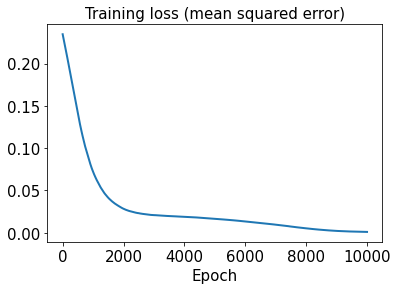

In [22]:
hist1 = history1.history
plt.plot(hist1['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

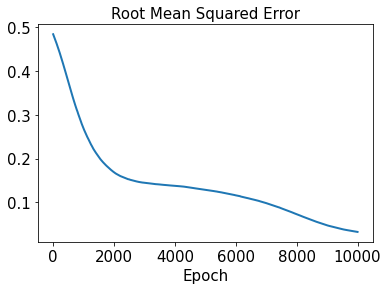

In [23]:
plt.plot(hist1['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [24]:
input_data = tf.keras.Input(shape=(n_sensors, 1))
reshape = tf.keras.layers.Reshape((n_sensors,))(input_data)

x_ = tf.keras.layers.Dense(units=128, activation='relu', name='firstHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(0.001))(reshape)
x_ = tf.keras.layers.Dense(units=128, activation='relu', name='secondHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(0.001))(x_)
x_ = tf.keras.layers.Dense(units=128, activation='relu', name='thirdHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(0.001))(x_)
output_data = tf.keras.layers.Dense(units=101*101, activation=None, name='outputLayer')(x_)
output_img = tf.keras.layers.Reshape((101,101))(output_data)
# Shallow Decoder (SD)
sd1 = tf.keras.Model(input_data, output_img)
sd2 = tf.keras.Model(input_data, output_img)
sd3 = tf.keras.Model(input_data, output_img)

In [25]:
sd1.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 16, 1)]           0         
                                                                 
 reshape_2 (Reshape)         (None, 16)                0         
                                                                 
 firstHiddenLayer (Dense)    (None, 128)               2176      
                                                                 
 secondHiddenLayer (Dense)   (None, 128)               16512     
                                                                 
 thirdHiddenLayer (Dense)    (None, 128)               16512     
                                                                 
 outputLayer (Dense)         (None, 10201)             1315929   
                                                                 
 reshape_3 (Reshape)         (None, 101, 101)          0   

In [26]:
sd1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
            loss = tf.keras.losses.MeanSquaredError(),
            metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [27]:
start1 = datetime.datetime.now()
history1 = sd1.fit(x_train1, y_train1, epochs=10000, shuffle=True)
end1 = datetime.datetime.now()

Epoch 1/10000
2/2 [==============================] - 0s 21ms/step - loss: 0.5042 - rmse: 0.4707
Epoch 2/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.5022 - rmse: 0.4697
Epoch 3/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.5002 - rmse: 0.4686
Epoch 4/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.4982 - rmse: 0.4676
Epoch 5/10000
2/2 [==============================] - 0s 19ms/step - loss: 0.4962 - rmse: 0.4666
Epoch 6/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.4942 - rmse: 0.4656
Epoch 7/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.4922 - rmse: 0.4646
Epoch 8/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.4902 - rmse: 0.4635
Epoch 9/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4881 - rmse: 0.4624
Epoch 10/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4860 - rmse: 0.4612
Epoch 11/10000
2/2 [======================

2/2 [==============================] - 0s 4ms/step - loss: 0.2184 - rmse: 0.0250
Epoch 87/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2176 - rmse: 0.0240
Epoch 88/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2169 - rmse: 0.0231
Epoch 89/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2162 - rmse: 0.0224
Epoch 90/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.2155 - rmse: 0.0217
Epoch 91/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2147 - rmse: 0.0211
Epoch 92/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2140 - rmse: 0.0206
Epoch 93/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2133 - rmse: 0.0203
Epoch 94/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2126 - rmse: 0.0200
Epoch 95/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2120 - rmse: 0.0198
Epoch 96/10000
2/2 [==============================] - 0

2/2 [==============================] - 0s 3ms/step - loss: 0.1665 - rmse: 0.0180
Epoch 171/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1660 - rmse: 0.0180
Epoch 172/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1654 - rmse: 0.0179
Epoch 173/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1649 - rmse: 0.0180
Epoch 174/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1644 - rmse: 0.0182
Epoch 175/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1639 - rmse: 0.0182
Epoch 176/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1633 - rmse: 0.0179
Epoch 177/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1628 - rmse: 0.0177
Epoch 178/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1623 - rmse: 0.0174
Epoch 179/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1617 - rmse: 0.0172
Epoch 180/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.1268 - rmse: 0.0167
Epoch 255/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1264 - rmse: 0.0167
Epoch 256/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1260 - rmse: 0.0167
Epoch 257/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1256 - rmse: 0.0167
Epoch 258/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1251 - rmse: 0.0167
Epoch 259/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1247 - rmse: 0.0167
Epoch 260/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1243 - rmse: 0.0167
Epoch 261/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1239 - rmse: 0.0168
Epoch 262/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1235 - rmse: 0.0170
Epoch 263/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1231 - rmse: 0.0170
Epoch 264/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.0963 - rmse: 0.0174
Epoch 339/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0960 - rmse: 0.0173
Epoch 340/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0957 - rmse: 0.0171
Epoch 341/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0954 - rmse: 0.0168
Epoch 342/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0951 - rmse: 0.0167
Epoch 343/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0947 - rmse: 0.0166
Epoch 344/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0944 - rmse: 0.0166
Epoch 345/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0941 - rmse: 0.0166
Epoch 346/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0938 - rmse: 0.0166
Epoch 347/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0935 - rmse: 0.0166
Epoch 348/10000
2/2 [=========================

2/2 [==============================] - 0s 5ms/step - loss: 0.0731 - rmse: 0.0173
Epoch 423/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0728 - rmse: 0.0170
Epoch 424/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0726 - rmse: 0.0167
Epoch 425/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0724 - rmse: 0.0164
Epoch 426/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0721 - rmse: 0.0163
Epoch 427/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0719 - rmse: 0.0163
Epoch 428/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0717 - rmse: 0.0163
Epoch 429/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0714 - rmse: 0.0162
Epoch 430/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0712 - rmse: 0.0163
Epoch 431/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0710 - rmse: 0.0162
Epoch 432/10000
2/2 [=========================

2/2 [==============================] - 0s 5ms/step - loss: 0.0555 - rmse: 0.0176
Epoch 507/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0554 - rmse: 0.0177
Epoch 508/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0552 - rmse: 0.0178
Epoch 509/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0550 - rmse: 0.0175
Epoch 510/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0548 - rmse: 0.0169
Epoch 511/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0546 - rmse: 0.0166
Epoch 512/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0544 - rmse: 0.0165
Epoch 513/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0543 - rmse: 0.0166
Epoch 514/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0541 - rmse: 0.0167
Epoch 515/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0539 - rmse: 0.0168
Epoch 516/10000
2/2 [=========================

2/2 [==============================] - 0s 6ms/step - loss: 0.0423 - rmse: 0.0153
Epoch 591/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0422 - rmse: 0.0153
Epoch 592/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0421 - rmse: 0.0154
Epoch 593/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0419 - rmse: 0.0155
Epoch 594/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0418 - rmse: 0.0157
Epoch 595/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0417 - rmse: 0.0162
Epoch 596/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0415 - rmse: 0.0165
Epoch 597/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0414 - rmse: 0.0164
Epoch 598/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0413 - rmse: 0.0159
Epoch 599/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0411 - rmse: 0.0154
Epoch 600/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.0325 - rmse: 0.0146
Epoch 675/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0324 - rmse: 0.0146
Epoch 676/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0323 - rmse: 0.0146
Epoch 677/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0322 - rmse: 0.0145
Epoch 678/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0321 - rmse: 0.0145
Epoch 679/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0320 - rmse: 0.0147
Epoch 680/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0319 - rmse: 0.0149
Epoch 681/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0318 - rmse: 0.0150
Epoch 682/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0317 - rmse: 0.0150
Epoch 683/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0316 - rmse: 0.0151
Epoch 684/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.0252 - rmse: 0.0138
Epoch 759/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0251 - rmse: 0.0138
Epoch 760/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0250 - rmse: 0.0139
Epoch 761/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0250 - rmse: 0.0145
Epoch 762/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0249 - rmse: 0.0151
Epoch 763/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0248 - rmse: 0.0150
Epoch 764/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0247 - rmse: 0.0145
Epoch 765/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0247 - rmse: 0.0140
Epoch 766/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0246 - rmse: 0.0138
Epoch 767/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0245 - rmse: 0.0137
Epoch 768/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.0198 - rmse: 0.0138
Epoch 843/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0197 - rmse: 0.0139
Epoch 844/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0197 - rmse: 0.0139
Epoch 845/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0196 - rmse: 0.0138
Epoch 846/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0196 - rmse: 0.0139
Epoch 847/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0195 - rmse: 0.0143
Epoch 848/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0195 - rmse: 0.0143
Epoch 849/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.0140
Epoch 850/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0193 - rmse: 0.0134
Epoch 851/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.0130
Epoch 852/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.0158 - rmse: 0.0133
Epoch 927/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0158 - rmse: 0.0146
Epoch 928/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0158 - rmse: 0.0159
Epoch 929/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0158 - rmse: 0.0171
Epoch 930/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0157 - rmse: 0.0178
Epoch 931/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0157 - rmse: 0.0181
Epoch 932/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0156 - rmse: 0.0168
Epoch 933/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0155 - rmse: 0.0144
Epoch 934/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0155 - rmse: 0.0126
Epoch 935/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0154 - rmse: 0.0121
Epoch 936/10000
2/2 [=========================

2/2 [==============================] - 0s 5ms/step - loss: 0.0128 - rmse: 0.0118
Epoch 1011/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0128 - rmse: 0.0115
Epoch 1012/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0128 - rmse: 0.0114
Epoch 1013/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0127 - rmse: 0.0114
Epoch 1014/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0127 - rmse: 0.0116
Epoch 1015/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0127 - rmse: 0.0118
Epoch 1016/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0126 - rmse: 0.0122
Epoch 1017/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0126 - rmse: 0.0128
Epoch 1018/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0126 - rmse: 0.0132
Epoch 1019/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0126 - rmse: 0.0131
Epoch 1020/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0106 - rmse: 0.0110
Epoch 1094/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0106 - rmse: 0.0115
Epoch 1095/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0106 - rmse: 0.0120
Epoch 1096/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0106 - rmse: 0.0121
Epoch 1097/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0105 - rmse: 0.0115
Epoch 1098/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0105 - rmse: 0.0111
Epoch 1099/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0105 - rmse: 0.0109
Epoch 1100/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0105 - rmse: 0.0107
Epoch 1101/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0104 - rmse: 0.0106
Epoch 1102/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0104 - rmse: 0.0106
Epoch 1103/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0090 - rmse: 0.0095
Epoch 1177/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0089 - rmse: 0.0094
Epoch 1178/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0089 - rmse: 0.0093
Epoch 1179/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0089 - rmse: 0.0093
Epoch 1180/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0089 - rmse: 0.0093
Epoch 1181/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0089 - rmse: 0.0095
Epoch 1182/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0088 - rmse: 0.0099
Epoch 1183/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0088 - rmse: 0.0105
Epoch 1184/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0088 - rmse: 0.0112
Epoch 1185/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0088 - rmse: 0.0117
Epoch 1186/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0077 - rmse: 0.0089
Epoch 1260/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0076 - rmse: 0.0089
Epoch 1261/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0076 - rmse: 0.0097
Epoch 1262/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0076 - rmse: 0.0100
Epoch 1263/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0076 - rmse: 0.0098
Epoch 1264/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0076 - rmse: 0.0098
Epoch 1265/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0076 - rmse: 0.0095
Epoch 1266/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0076 - rmse: 0.0093
Epoch 1267/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0075 - rmse: 0.0094
Epoch 1268/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0075 - rmse: 0.0097
Epoch 1269/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0067 - rmse: 0.0087
Epoch 1343/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0067 - rmse: 0.0091
Epoch 1344/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0067 - rmse: 0.0089
Epoch 1345/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0066 - rmse: 0.0085
Epoch 1346/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0087
Epoch 1347/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0066 - rmse: 0.0091
Epoch 1348/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0066 - rmse: 0.0092
Epoch 1349/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0093
Epoch 1350/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0066 - rmse: 0.0088
Epoch 1351/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0066 - rmse: 0.0084
Epoch 1352/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0078
Epoch 1426/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0059 - rmse: 0.0077
Epoch 1427/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0058 - rmse: 0.0078
Epoch 1428/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0058 - rmse: 0.0079
Epoch 1429/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0058 - rmse: 0.0083
Epoch 1430/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0058 - rmse: 0.0088
Epoch 1431/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0058 - rmse: 0.0095
Epoch 1432/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0058 - rmse: 0.0103
Epoch 1433/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0058 - rmse: 0.0109
Epoch 1434/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0058 - rmse: 0.0109
Epoch 1435/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0052 - rmse: 0.0075
Epoch 1509/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0079
Epoch 1510/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0085
Epoch 1511/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0052 - rmse: 0.0093
Epoch 1512/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0052 - rmse: 0.0089
Epoch 1513/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0078
Epoch 1514/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0052 - rmse: 0.0074
Epoch 1515/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0077
Epoch 1516/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0052 - rmse: 0.0080
Epoch 1517/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0052 - rmse: 0.0079
Epoch 1518/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0047 - rmse: 0.0081
Epoch 1592/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0047 - rmse: 0.0082
Epoch 1593/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0047 - rmse: 0.0079
Epoch 1594/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0047 - rmse: 0.0074
Epoch 1595/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0047 - rmse: 0.0072
Epoch 1596/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0047 - rmse: 0.0071
Epoch 1597/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0047 - rmse: 0.0070
Epoch 1598/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0071
Epoch 1599/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0073
Epoch 1600/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0047 - rmse: 0.0073
Epoch 1601/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0115
Epoch 1675/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0117
Epoch 1676/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0108
Epoch 1677/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0096
Epoch 1678/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0085
Epoch 1679/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0075
Epoch 1680/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0075
Epoch 1681/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0043 - rmse: 0.0078
Epoch 1682/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0075
Epoch 1683/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0043 - rmse: 0.0073
Epoch 1684/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0092
Epoch 1758/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0091
Epoch 1759/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0090
Epoch 1760/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0085
Epoch 1761/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0078
Epoch 1762/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0039 - rmse: 0.0076
Epoch 1763/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0073
Epoch 1764/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0071
Epoch 1765/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0071
Epoch 1766/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0074
Epoch 1767/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0037 - rmse: 0.0067
Epoch 1841/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0068
Epoch 1842/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0067
Epoch 1843/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0066
Epoch 1844/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0066
Epoch 1845/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0072
Epoch 1846/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0079
Epoch 1847/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0086
Epoch 1848/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0087
Epoch 1849/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0086
Epoch 1850/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0072
Epoch 1924/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0068
Epoch 1925/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0034 - rmse: 0.0066
Epoch 1926/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0065
Epoch 1927/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0034 - rmse: 0.0065
Epoch 1928/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0069
Epoch 1929/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0034 - rmse: 0.0075
Epoch 1930/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0034 - rmse: 0.0080
Epoch 1931/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0078
Epoch 1932/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0067
Epoch 1933/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0068
Epoch 2007/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0073
Epoch 2008/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0074
Epoch 2009/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0075
Epoch 2010/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0073
Epoch 2011/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0069
Epoch 2012/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0068
Epoch 2013/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0067
Epoch 2014/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0067
Epoch 2015/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0067
Epoch 2016/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0062
Epoch 2090/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0083
Epoch 2091/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0103
Epoch 2092/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0091
Epoch 2093/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0067
Epoch 2094/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0030 - rmse: 0.0060
Epoch 2095/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0062
Epoch 2096/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0063
Epoch 2097/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0030 - rmse: 0.0059
Epoch 2098/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0064
Epoch 2099/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0063
Epoch 2173/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0072
Epoch 2174/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0078
Epoch 2175/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0077
Epoch 2176/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0065
Epoch 2177/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0059
Epoch 2178/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0029 - rmse: 0.0070
Epoch 2179/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0076
Epoch 2180/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0068
Epoch 2181/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0061
Epoch 2182/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0028 - rmse: 0.0053
Epoch 2256/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0055
Epoch 2257/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0053
Epoch 2258/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0053
Epoch 2259/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0056
Epoch 2260/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0028 - rmse: 0.0058
Epoch 2261/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0058
Epoch 2262/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0060
Epoch 2263/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0028 - rmse: 0.0062
Epoch 2264/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0067
Epoch 2265/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0027 - rmse: 0.0062
Epoch 2339/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0059
Epoch 2340/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0055
Epoch 2341/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0065
Epoch 2342/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0027 - rmse: 0.0077
Epoch 2343/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0073
Epoch 2344/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0059
Epoch 2345/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0057
Epoch 2346/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0064
Epoch 2347/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0069
Epoch 2348/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0072
Epoch 2422/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0026 - rmse: 0.0063
Epoch 2423/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0057
Epoch 2424/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0065
Epoch 2425/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0078
Epoch 2426/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0073
Epoch 2427/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0025 - rmse: 0.0062
Epoch 2428/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0058
Epoch 2429/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0026 - rmse: 0.0060
Epoch 2430/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0063
Epoch 2431/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0075
Epoch 2505/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0074
Epoch 2506/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0075
Epoch 2507/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0063
Epoch 2508/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0058
Epoch 2509/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0065
Epoch 2510/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0065
Epoch 2511/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0058
Epoch 2512/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0063
Epoch 2513/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0082
Epoch 2514/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0078
Epoch 2588/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0059
Epoch 2589/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0088
Epoch 2590/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0092
Epoch 2591/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0069
Epoch 2592/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0054
Epoch 2593/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0061
Epoch 2594/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0075
Epoch 2595/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0086
Epoch 2596/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0089
Epoch 2597/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0074
Epoch 2671/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0072
Epoch 2672/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0066
Epoch 2673/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0062
Epoch 2674/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0059
Epoch 2675/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0058
Epoch 2676/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0057
Epoch 2677/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0058
Epoch 2678/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0060
Epoch 2679/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0057
Epoch 2680/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0053
Epoch 2754/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0023 - rmse: 0.0053
Epoch 2755/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0054
Epoch 2756/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0057
Epoch 2757/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0055
Epoch 2758/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0023 - rmse: 0.0052
Epoch 2759/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0052
Epoch 2760/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0052
Epoch 2761/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0052
Epoch 2762/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0054
Epoch 2763/10000
2/2 [=============

2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0060
Epoch 2837/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0022 - rmse: 0.0072
Epoch 2838/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0066
Epoch 2839/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0022 - rmse: 0.0054
Epoch 2840/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0051
Epoch 2841/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0050
Epoch 2842/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0052
Epoch 2843/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0057
Epoch 2844/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0066
Epoch 2845/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0076
Epoch 2846/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0051
Epoch 2920/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0055
Epoch 2921/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0055
Epoch 2922/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0057
Epoch 2923/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0058
Epoch 2924/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0060
Epoch 2925/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0061
Epoch 2926/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0061
Epoch 2927/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0055
Epoch 2928/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0050
Epoch 2929/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0063
Epoch 3003/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0063
Epoch 3004/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0057
Epoch 3005/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0056
Epoch 3006/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0055
Epoch 3007/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0060
Epoch 3008/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0064
Epoch 3009/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0065
Epoch 3010/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0057
Epoch 3011/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0056
Epoch 3012/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0065
Epoch 3086/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0052
Epoch 3087/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0058
Epoch 3088/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0060
Epoch 3089/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0052
Epoch 3090/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0059
Epoch 3091/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0079
Epoch 3092/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0082
Epoch 3093/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0059
Epoch 3094/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0055
Epoch 3095/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0059
Epoch 3169/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0054
Epoch 3170/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0051
Epoch 3171/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0059
Epoch 3172/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0061
Epoch 3173/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0052
Epoch 3174/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0055
Epoch 3175/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0070
Epoch 3176/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0072
Epoch 3177/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0066
Epoch 3178/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0082
Epoch 3252/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0065
Epoch 3253/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0054
Epoch 3254/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0051
Epoch 3255/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0057
Epoch 3256/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0059
Epoch 3257/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0053
Epoch 3258/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0055
Epoch 3259/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0074
Epoch 3260/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0093
Epoch 3261/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0055
Epoch 3335/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0053
Epoch 3336/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0053
Epoch 3337/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0053
Epoch 3338/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0054
Epoch 3339/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0058
Epoch 3340/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0054
Epoch 3341/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0051
Epoch 3342/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0052
Epoch 3343/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0052
Epoch 3344/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0069
Epoch 3418/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0074
Epoch 3419/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0062
Epoch 3420/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0053
Epoch 3421/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0062
Epoch 3422/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0072
Epoch 3423/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0065
Epoch 3424/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0052
Epoch 3425/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0071
Epoch 3426/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0019 - rmse: 0.0078
Epoch 3427/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0053
Epoch 3501/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0054
Epoch 3502/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0061
Epoch 3503/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0058
Epoch 3504/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0053
Epoch 3505/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0052
Epoch 3506/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0054
Epoch 3507/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0060
Epoch 3508/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0059
Epoch 3509/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0053
Epoch 3510/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0053
Epoch 3584/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0055
Epoch 3585/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0054
Epoch 3586/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0054
Epoch 3587/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0050
Epoch 3588/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0048
Epoch 3589/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0048
Epoch 3590/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0051
Epoch 3591/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0049
Epoch 3592/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0047
Epoch 3593/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0053
Epoch 3667/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0053
Epoch 3668/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0045
Epoch 3669/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0044
Epoch 3670/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0047
Epoch 3671/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0054
Epoch 3672/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0056
Epoch 3673/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0050
Epoch 3674/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0046
Epoch 3675/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0045
Epoch 3676/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0045
Epoch 3750/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0047
Epoch 3751/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0045
Epoch 3752/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0044
Epoch 3753/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0051
Epoch 3754/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0050
Epoch 3755/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0045
Epoch 3756/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0044
Epoch 3757/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0045
Epoch 3758/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0044
Epoch 3759/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0046
Epoch 3833/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0047
Epoch 3834/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0051
Epoch 3835/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0057
Epoch 3836/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0061
Epoch 3837/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0061
Epoch 3838/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0050
Epoch 3839/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0048
Epoch 3840/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0069
Epoch 3841/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0061
Epoch 3842/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0018 - rmse: 0.0068
Epoch 3916/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0059
Epoch 3917/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0042
Epoch 3918/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0041
Epoch 3919/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0018 - rmse: 0.0041
Epoch 3920/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0041
Epoch 3921/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0048
Epoch 3922/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0047
Epoch 3923/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0042
Epoch 3924/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0043
Epoch 3925/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0050
Epoch 3999/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0048
Epoch 4000/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0042
Epoch 4001/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0044
Epoch 4002/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0047
Epoch 4003/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0044
Epoch 4004/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0043
Epoch 4005/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0043
Epoch 4006/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0047
Epoch 4007/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0052
Epoch 4008/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0076
Epoch 4082/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0067
Epoch 4083/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0053
Epoch 4084/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0044
Epoch 4085/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0042
Epoch 4086/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0043
Epoch 4087/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0044
Epoch 4088/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0052
Epoch 4089/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0065
Epoch 4090/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0074
Epoch 4091/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0043
Epoch 4165/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0049
Epoch 4166/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0043
Epoch 4167/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0048
Epoch 4168/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0051
Epoch 4169/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0043
Epoch 4170/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0046
Epoch 4171/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0061
Epoch 4172/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0070
Epoch 4173/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0071
Epoch 4174/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0041
Epoch 4248/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0040
Epoch 4249/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0043
Epoch 4250/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0054
Epoch 4251/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0059
Epoch 4252/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0045
Epoch 4253/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0042
Epoch 4254/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0046
Epoch 4255/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0043
Epoch 4256/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0041
Epoch 4257/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0037
Epoch 4331/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0016 - rmse: 0.0036
Epoch 4332/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0038
Epoch 4333/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0037
Epoch 4334/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0016 - rmse: 0.0036
Epoch 4335/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0042
Epoch 4336/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0050
Epoch 4337/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0016 - rmse: 0.0045
Epoch 4338/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0036
Epoch 4339/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0036
Epoch 4340/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0016 - rmse: 0.0058
Epoch 4414/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0016 - rmse: 0.0046
Epoch 4415/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0016 - rmse: 0.0046
Epoch 4416/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0017 - rmse: 0.0070
Epoch 4417/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0017 - rmse: 0.0068
Epoch 4418/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0016 - rmse: 0.0044
Epoch 4419/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0016 - rmse: 0.0053
Epoch 4420/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0016 - rmse: 0.0075
Epoch 4421/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0017 - rmse: 0.0087
Epoch 4422/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0055
Epoch 4423/10000
2/2 [==============

2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0046
Epoch 4497/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0016 - rmse: 0.0043
Epoch 4498/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0016 - rmse: 0.0040
Epoch 4499/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0038
Epoch 4500/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0037
Epoch 4501/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0016 - rmse: 0.0038
Epoch 4502/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0040
Epoch 4503/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0049
Epoch 4504/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0059
Epoch 4505/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0050
Epoch 4506/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0063
Epoch 4580/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0016 - rmse: 0.0044
Epoch 4581/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0053
Epoch 4582/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0016 - rmse: 0.0060
Epoch 4583/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0016 - rmse: 0.0048
Epoch 4584/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0042
Epoch 4585/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0042
Epoch 4586/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0042
Epoch 4587/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0042
Epoch 4588/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0044
Epoch 4589/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0040
Epoch 4663/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0040
Epoch 4664/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0041
Epoch 4665/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0044
Epoch 4666/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0045
Epoch 4667/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0044
Epoch 4668/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0039
Epoch 4669/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0046
Epoch 4670/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0046
Epoch 4671/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0041
Epoch 4672/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0052
Epoch 4746/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0055
Epoch 4747/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0052
Epoch 4748/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0039
Epoch 4749/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0042
Epoch 4750/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0046
Epoch 4751/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0038
Epoch 4752/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0047
Epoch 4753/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0061
Epoch 4754/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0058
Epoch 4755/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0041
Epoch 4829/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0042
Epoch 4830/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0042
Epoch 4831/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0043
Epoch 4832/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0044
Epoch 4833/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0051
Epoch 4834/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0046
Epoch 4835/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0048
Epoch 4836/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0056
Epoch 4837/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0044
Epoch 4838/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0044
Epoch 4912/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0050
Epoch 4913/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0060
Epoch 4914/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0052
Epoch 4915/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0042
Epoch 4916/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0048
Epoch 4917/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0049
Epoch 4918/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0043
Epoch 4919/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0048
Epoch 4920/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0065
Epoch 4921/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0047
Epoch 4995/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0040
Epoch 4996/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0039
Epoch 4997/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0039
Epoch 4998/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0039
Epoch 4999/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0042
Epoch 5000/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0015 - rmse: 0.0046
Epoch 5001/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0047
Epoch 5002/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0050
Epoch 5003/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0056
Epoch 5004/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0036
Epoch 5078/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0041
Epoch 5079/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0035
Epoch 5080/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0041
Epoch 5081/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0051
Epoch 5082/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0037
Epoch 5083/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0041
Epoch 5084/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0043
Epoch 5085/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0033
Epoch 5086/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0046
Epoch 5087/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0055
Epoch 5161/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0041
Epoch 5162/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0037
Epoch 5163/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0041
Epoch 5164/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0040
Epoch 5165/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0039
Epoch 5166/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0046
Epoch 5167/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0039
Epoch 5168/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0044
Epoch 5169/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0049
Epoch 5170/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0037
Epoch 5244/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0041
Epoch 5245/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0040
Epoch 5246/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0036
Epoch 5247/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0041
Epoch 5248/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0042
Epoch 5249/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0037
Epoch 5250/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0047
Epoch 5251/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0044
Epoch 5252/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0037
Epoch 5253/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0052
Epoch 5327/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0048
Epoch 5328/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0034
Epoch 5329/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0042
Epoch 5330/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0043
Epoch 5331/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0035
Epoch 5332/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0033
Epoch 5333/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0037
Epoch 5334/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0038
Epoch 5335/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0034
Epoch 5336/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0042
Epoch 5410/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0052
Epoch 5411/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0039
Epoch 5412/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0037
Epoch 5413/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0064
Epoch 5414/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0069
Epoch 5415/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0045
Epoch 5416/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0039
Epoch 5417/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0062
Epoch 5418/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0054
Epoch 5419/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0033
Epoch 5493/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0035
Epoch 5494/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0014 - rmse: 0.0051
Epoch 5495/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0046
Epoch 5496/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0033
Epoch 5497/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0037
Epoch 5498/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0014 - rmse: 0.0032
Epoch 5499/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0035
Epoch 5500/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0014 - rmse: 0.0042
Epoch 5501/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0037
Epoch 5502/10000
2/2 [============

2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0037
Epoch 5576/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0035
Epoch 5577/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0014 - rmse: 0.0034
Epoch 5578/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0029
Epoch 5579/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0034
Epoch 5580/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0034
Epoch 5581/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0029
Epoch 5582/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0033
Epoch 5583/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0014 - rmse: 0.0048
Epoch 5584/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0050
Epoch 5585/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0014 - rmse: 0.0053
Epoch 5659/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0037
Epoch 5660/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0048
Epoch 5661/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0055
Epoch 5662/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0041
Epoch 5663/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0036
Epoch 5664/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0035
Epoch 5665/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0037
Epoch 5666/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0045
Epoch 5667/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0014 - rmse: 0.0055
Epoch 5668/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0035
Epoch 5742/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0035
Epoch 5743/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0035
Epoch 5744/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0037
Epoch 5745/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0041
Epoch 5746/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0036
Epoch 5747/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0036
Epoch 5748/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0035
Epoch 5749/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0042
Epoch 5750/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0050
Epoch 5751/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0036
Epoch 5825/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0033
Epoch 5826/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0034
Epoch 5827/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0036
Epoch 5828/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0034
Epoch 5829/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0042
Epoch 5830/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0050
Epoch 5831/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0052
Epoch 5832/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0049
Epoch 5833/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0034
Epoch 5834/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0030
Epoch 5908/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0014 - rmse: 0.0031
Epoch 5909/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0046
Epoch 5910/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0059
Epoch 5911/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0055
Epoch 5912/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0032
Epoch 5913/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0041
Epoch 5914/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0045
Epoch 5915/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0030
Epoch 5916/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0044
Epoch 5917/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0037
Epoch 5991/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0041
Epoch 5992/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0052
Epoch 5993/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0033
Epoch 5994/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0057
Epoch 5995/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0068
Epoch 5996/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0044
Epoch 5997/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0036
Epoch 5998/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0044
Epoch 5999/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0039
Epoch 6000/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0039
Epoch 6074/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0037
Epoch 6075/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0037
Epoch 6076/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0013 - rmse: 0.0045
Epoch 6077/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0056
Epoch 6078/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0061
Epoch 6079/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0054
Epoch 6080/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0040
Epoch 6081/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0040
Epoch 6082/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0044
Epoch 6083/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0046
Epoch 6157/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0077
Epoch 6158/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0086
Epoch 6159/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0061
Epoch 6160/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0039
Epoch 6161/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0058
Epoch 6162/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0049
Epoch 6163/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0038
Epoch 6164/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0013 - rmse: 0.0061
Epoch 6165/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0073
Epoch 6166/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0044
Epoch 6240/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0047
Epoch 6241/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0044
Epoch 6242/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0034
Epoch 6243/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0048
Epoch 6244/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0041
Epoch 6245/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0033
Epoch 6246/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0054
Epoch 6247/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0046
Epoch 6248/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0037
Epoch 6249/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0034
Epoch 6323/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0038
Epoch 6324/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0039
Epoch 6325/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0034
Epoch 6326/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0033
Epoch 6327/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0013 - rmse: 0.0034
Epoch 6328/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0042
Epoch 6329/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0050
Epoch 6330/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0044
Epoch 6331/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0034
Epoch 6332/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0053
Epoch 6406/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0041
Epoch 6407/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0044
Epoch 6408/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0068
Epoch 6409/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0057
Epoch 6410/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0037
Epoch 6411/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0041
Epoch 6412/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0038
Epoch 6413/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0038
Epoch 6414/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0054
Epoch 6415/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0033
Epoch 6489/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0035
Epoch 6490/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0042
Epoch 6491/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0042
Epoch 6492/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0035
Epoch 6493/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0034
Epoch 6494/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0041
Epoch 6495/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0052
Epoch 6496/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0055
Epoch 6497/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0042
Epoch 6498/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0032
Epoch 6572/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0047
Epoch 6573/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0062
Epoch 6574/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0058
Epoch 6575/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0041
Epoch 6576/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0034
Epoch 6577/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0055
Epoch 6578/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0044
Epoch 6579/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0034
Epoch 6580/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0058
Epoch 6581/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0052
Epoch 6655/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0044
Epoch 6656/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0033
Epoch 6657/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0039
Epoch 6658/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0042
Epoch 6659/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0013 - rmse: 0.0033
Epoch 6660/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0041
Epoch 6661/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0057
Epoch 6662/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0044
Epoch 6663/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0034
Epoch 6664/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0083
Epoch 6738/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0084
Epoch 6739/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0058
Epoch 6740/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0033
Epoch 6741/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0013 - rmse: 0.0047
Epoch 6742/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0044
Epoch 6743/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0035
Epoch 6744/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0041
Epoch 6745/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0013 - rmse: 0.0037
Epoch 6746/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0035
Epoch 6747/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0039
Epoch 6821/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0030
Epoch 6822/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0053
Epoch 6823/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0066
Epoch 6824/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0055
Epoch 6825/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0036
Epoch 6826/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0013 - rmse: 0.0032
Epoch 6827/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0032
Epoch 6828/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0032
Epoch 6829/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0033
Epoch 6830/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0046
Epoch 6904/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0058
Epoch 6905/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0037
Epoch 6906/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0048
Epoch 6907/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0050
Epoch 6908/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0031
Epoch 6909/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0044
Epoch 6910/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0048
Epoch 6911/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0033
Epoch 6912/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0029
Epoch 6913/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0029
Epoch 6987/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0042
Epoch 6988/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0046
Epoch 6989/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0029
Epoch 6990/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0038
Epoch 6991/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0062
Epoch 6992/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0048
Epoch 6993/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0029
Epoch 6994/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0036
Epoch 6995/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0035
Epoch 6996/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0040
Epoch 7070/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0053
Epoch 7071/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0054
Epoch 7072/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0045
Epoch 7073/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0038
Epoch 7074/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0035
Epoch 7075/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0042
Epoch 7076/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0037
Epoch 7077/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0034
Epoch 7078/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0035
Epoch 7079/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0038
Epoch 7153/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0060
Epoch 7154/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0045
Epoch 7155/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0037
Epoch 7156/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0048
Epoch 7157/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0039
Epoch 7158/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0034
Epoch 7159/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0031
Epoch 7160/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0030
Epoch 7161/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0030
Epoch 7162/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0033
Epoch 7236/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0056
Epoch 7237/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0059
Epoch 7238/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0031
Epoch 7239/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0037
Epoch 7240/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0046
Epoch 7241/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0030
Epoch 7242/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0023
Epoch 7243/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0026
Epoch 7244/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0028
Epoch 7245/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0029
Epoch 7319/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0027
Epoch 7320/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0031
Epoch 7321/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0035
Epoch 7322/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0012 - rmse: 0.0035
Epoch 7323/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0034
Epoch 7324/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0034
Epoch 7325/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0033
Epoch 7326/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0031
Epoch 7327/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0029
Epoch 7328/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0029
Epoch 7402/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0012 - rmse: 0.0029
Epoch 7403/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0012 - rmse: 0.0029
Epoch 7404/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0040
Epoch 7405/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0012 - rmse: 0.0042
Epoch 7406/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0033
Epoch 7407/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0030
Epoch 7408/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0012 - rmse: 0.0037
Epoch 7409/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0032
Epoch 7410/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0012 - rmse: 0.0032
Epoch 7411/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0045
Epoch 7485/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0026
Epoch 7486/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0033
Epoch 7487/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0036
Epoch 7488/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0024
Epoch 7489/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0026
Epoch 7490/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0022
Epoch 7491/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0029
Epoch 7492/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0033
Epoch 7493/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0025
Epoch 7494/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0032
Epoch 7568/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0035
Epoch 7569/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0045
Epoch 7570/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0045
Epoch 7571/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0033
Epoch 7572/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0031
Epoch 7573/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0031
Epoch 7574/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0036
Epoch 7575/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0042
Epoch 7576/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0031
Epoch 7577/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0035
Epoch 7651/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0035
Epoch 7652/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0026
Epoch 7653/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0026
Epoch 7654/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0026
Epoch 7655/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0030
Epoch 7656/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0034
Epoch 7657/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0031
Epoch 7658/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0025
Epoch 7659/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0035
Epoch 7660/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0063
Epoch 7734/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0036
Epoch 7735/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0050
Epoch 7736/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0057
Epoch 7737/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0031
Epoch 7738/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0051
Epoch 7739/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0055
Epoch 7740/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0031
Epoch 7741/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0029
Epoch 7742/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0012 - rmse: 0.0029
Epoch 7743/10000
2/2 [=============

2/2 [==============================] - 0s 3ms/step - loss: 0.0012 - rmse: 0.0049
Epoch 7817/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0039
Epoch 7818/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0035
Epoch 7819/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0036
Epoch 7820/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0036
Epoch 7821/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0034
Epoch 7822/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0040
Epoch 7823/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0035
Epoch 7824/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0046
Epoch 7825/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0058
Epoch 7826/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0012 - rmse: 0.0036
Epoch 7900/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0026
Epoch 7901/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0038
Epoch 7902/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0032
Epoch 7903/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0027
Epoch 7904/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0048
Epoch 7905/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0056
Epoch 7906/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0048
Epoch 7907/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0012 - rmse: 0.0032
Epoch 7908/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0027
Epoch 7909/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0048
Epoch 7983/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0061
Epoch 7984/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0038
Epoch 7985/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0034
Epoch 7986/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0040
Epoch 7987/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0027
Epoch 7988/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0031
Epoch 7989/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0028
Epoch 7990/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0026
Epoch 7991/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0029
Epoch 7992/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0027
Epoch 8066/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0045
Epoch 8067/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0039
Epoch 8068/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0026
Epoch 8069/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0028
Epoch 8070/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0026
Epoch 8071/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0029
Epoch 8072/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0042
Epoch 8073/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0032
Epoch 8074/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0029
Epoch 8075/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0055
Epoch 8149/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0028
Epoch 8150/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0051
Epoch 8151/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0050
Epoch 8152/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0035
Epoch 8153/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0027
Epoch 8154/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0044
Epoch 8155/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0036
Epoch 8156/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0028
Epoch 8157/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0050
Epoch 8158/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0041
Epoch 8232/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0038
Epoch 8233/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0033
Epoch 8234/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0044
Epoch 8235/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0052
Epoch 8236/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0041
Epoch 8237/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0035
Epoch 8238/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0035
Epoch 8239/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0035
Epoch 8240/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0044
Epoch 8241/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0034
Epoch 8315/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0047
Epoch 8316/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0043
Epoch 8317/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0025
Epoch 8318/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0042
Epoch 8319/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0035
Epoch 8320/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0025
Epoch 8321/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0037
Epoch 8322/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0030
Epoch 8323/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0023
Epoch 8324/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0063
Epoch 8398/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0048
Epoch 8399/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0028
Epoch 8400/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0041
Epoch 8401/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0038
Epoch 8402/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0029
Epoch 8403/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0051
Epoch 8404/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0051
Epoch 8405/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0030
Epoch 8406/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0041
Epoch 8407/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0042
Epoch 8481/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0033
Epoch 8482/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0027
Epoch 8483/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0041
Epoch 8484/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0037
Epoch 8485/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0027
Epoch 8486/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0050
Epoch 8487/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0067
Epoch 8488/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0059
Epoch 8489/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0032
Epoch 8490/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0038
Epoch 8564/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0059
Epoch 8565/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0046
Epoch 8566/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0029
Epoch 8567/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0040
Epoch 8568/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0030
Epoch 8569/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0035
Epoch 8570/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0060
Epoch 8571/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0050
Epoch 8572/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0030
Epoch 8573/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0038
Epoch 8647/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0056
Epoch 8648/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0052
Epoch 8649/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0029
Epoch 8650/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0028
Epoch 8651/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0029
Epoch 8652/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0025
Epoch 8653/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0041
Epoch 8654/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0053
Epoch 8655/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0048
Epoch 8656/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0029
Epoch 8730/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0030
Epoch 8731/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0034
Epoch 8732/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0040
Epoch 8733/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0039
Epoch 8734/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0035
Epoch 8735/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0032
Epoch 8736/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0030
Epoch 8737/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0032
Epoch 8738/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0036
Epoch 8739/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0040
Epoch 8813/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0025
Epoch 8814/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0030
Epoch 8815/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0026
Epoch 8816/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0031
Epoch 8817/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0046
Epoch 8818/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0048
Epoch 8819/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0037
Epoch 8820/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0030
Epoch 8821/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0028
Epoch 8822/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0028
Epoch 8896/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0029
Epoch 8897/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0030
Epoch 8898/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0032
Epoch 8899/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0038
Epoch 8900/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0040
Epoch 8901/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0038
Epoch 8902/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0033
Epoch 8903/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0030
Epoch 8904/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0032
Epoch 8905/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0042
Epoch 8979/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0067
Epoch 8980/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0052
Epoch 8981/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0031
Epoch 8982/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0068
Epoch 8983/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0049
Epoch 8984/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0033
Epoch 8985/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0049
Epoch 8986/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0026
Epoch 8987/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0038
Epoch 8988/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0044
Epoch 9062/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0039
Epoch 9063/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0025
Epoch 9064/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0029
Epoch 9065/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0036
Epoch 9066/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0025
Epoch 9067/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0034
Epoch 9068/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0050
Epoch 9069/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0041
Epoch 9070/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0026
Epoch 9071/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0021
Epoch 9145/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0033
Epoch 9146/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0044
Epoch 9147/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0036
Epoch 9148/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0021
Epoch 9149/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0031
Epoch 9150/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0028
Epoch 9151/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0022
Epoch 9152/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0025
Epoch 9153/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0036
Epoch 9154/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0032
Epoch 9228/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0032
Epoch 9229/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0048
Epoch 9230/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0048
Epoch 9231/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0032
Epoch 9232/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0034
Epoch 9233/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0030
Epoch 9234/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0044
Epoch 9235/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0050
Epoch 9236/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0030
Epoch 9237/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0032
Epoch 9311/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0030
Epoch 9312/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0033
Epoch 9313/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0034
Epoch 9314/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0031
Epoch 9315/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0046
Epoch 9316/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0035
Epoch 9317/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0035
Epoch 9318/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0038
Epoch 9319/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0025
Epoch 9320/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0040
Epoch 9394/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0025
Epoch 9395/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0043
Epoch 9396/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0038
Epoch 9397/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0023
Epoch 9398/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0028
Epoch 9399/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0022
Epoch 9400/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0021
Epoch 9401/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0021
Epoch 9402/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0021
Epoch 9403/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0028
Epoch 9477/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0029
Epoch 9478/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0030
Epoch 9479/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0034
Epoch 9480/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0038
Epoch 9481/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0037
Epoch 9482/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0030
Epoch 9483/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0029
Epoch 9484/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0034
Epoch 9485/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0028
Epoch 9486/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0032
Epoch 9560/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0046
Epoch 9561/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0043
Epoch 9562/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0030
Epoch 9563/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0028
Epoch 9564/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0030
Epoch 9565/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0034
Epoch 9566/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0028
Epoch 9567/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0041
Epoch 9568/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0034
Epoch 9569/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0047
Epoch 9643/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0030
Epoch 9644/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0044
Epoch 9645/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0042
Epoch 9646/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0025
Epoch 9647/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0041
Epoch 9648/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0050
Epoch 9649/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0037
Epoch 9650/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0026
Epoch 9651/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0035
Epoch 9652/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0048
Epoch 9726/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0042
Epoch 9727/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0030
Epoch 9728/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0024
Epoch 9729/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0024
Epoch 9730/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0028
Epoch 9731/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0032
Epoch 9732/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0033
Epoch 9733/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0036
Epoch 9734/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0026
Epoch 9735/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0025
Epoch 9809/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0034
Epoch 9810/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0037
Epoch 9811/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0032
Epoch 9812/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0024
Epoch 9813/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0024
Epoch 9814/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0010 - rmse: 0.0024
Epoch 9815/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0032
Epoch 9816/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0039
Epoch 9817/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0033
Epoch 9818/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0010 - rmse: 0.0040
Epoch 9892/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0034
Epoch 9893/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0053
Epoch 9894/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0036
Epoch 9895/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0037
Epoch 9896/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0034
Epoch 9897/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0028
Epoch 9898/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0030
Epoch 9899/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0025
Epoch 9900/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0036
Epoch 9901/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0026
Epoch 9975/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0027
Epoch 9976/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0026
Epoch 9977/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0029
Epoch 9978/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0038
Epoch 9979/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0038
Epoch 9980/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0026
Epoch 9981/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0038
Epoch 9982/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0030
Epoch 9983/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0010 - rmse: 0.0031
Epoch 9984/10000
2/2 [===============

In [28]:
time1 = end1 - start1
print("Training time (Case 1):", time1)

Training time (Case 1): 0:01:43.607184


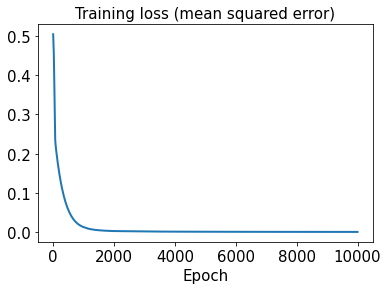

In [29]:
hist1 = history1.history
plt.plot(hist1['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

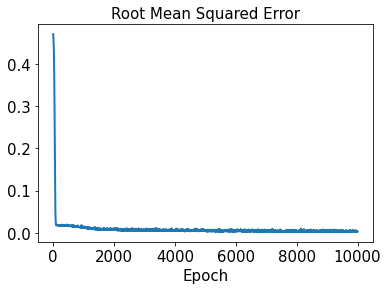

In [30]:
plt.plot(hist1['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [31]:
test_results1 = sd1.evaluate(x_test1)

1/1 [==============================] - 0s 85ms/step - loss: 0.0010 - rmse: 0.0000e+00


In [32]:
decoded_sensor_train1 = sensor_pred1.predict(t_train)

In [33]:
decoded_sensor_test1 = sensor_pred1.predict(t_test)

In [34]:
error_train_sensor1 = np.abs(decoded_sensor_train1 - x_train1)

In [35]:
error_train_sensor1

array([[[2.91920547e-02],
        [1.23606484e-03],
        [1.02363243e-02],
        [4.25798879e-02],
        [1.72673031e-02],
        [2.91792806e-02],
        [1.52886943e-02],
        [7.09537877e-02],
        [3.88181196e-02],
        [3.61879035e-02],
        [5.01282756e-02],
        [1.82382180e-02],
        [1.43942223e-02],
        [4.31241379e-02],
        [1.72325359e-02],
        [8.03953961e-03]],

       [[3.07144920e-03],
        [8.48549880e-03],
        [2.59407081e-02],
        [1.77205287e-02],
        [7.49456606e-03],
        [4.59198733e-02],
        [2.00468627e-02],
        [7.92339363e-02],
        [1.45523034e-02],
        [2.39661606e-02],
        [2.02032546e-02],
        [8.40955697e-03],
        [5.45351881e-03],
        [1.81828819e-02],
        [2.16752616e-02],
        [2.77707358e-02]],

       [[1.36114811e-02],
        [3.48227947e-03],
        [1.47179410e-02],
        [2.55141809e-02],
        [1.05232623e-02],
        [3.07560707e-02],
        

In [36]:
l2_error_sensor_train1 = np.sqrt(np.sum((decoded_sensor_train1 - x_train1)**2) / np.sum(x_train1**2))
print(l2_error_sensor_train1)

0.06610305062914755


In [37]:
l2_error_sensor_test1 = np.sqrt(np.sum((decoded_sensor_test1 - x_test1)**2) / np.sum(x_test1**2))
print(l2_error_sensor_test1)

0.07984553802302602


In [38]:
decoded_sensor_test1 = sensor_pred1.predict(t_test)

In [39]:
decoded_train1 = sd1.predict(decoded_sensor_train1)

In [40]:
decoded_test1 = sd1.predict(decoded_sensor_test1)

In [41]:
error_train_abs1 = np.abs(decoded_train1 - y_train1)

In [42]:
error_test_abs1 = np.abs(decoded_test1 - y_test1)

In [43]:
l2_error_sensor_train1 = np.sqrt(np.sum((decoded_sensor_train1 - x_train1)**2) / np.sum(x_train1**2))
print(l2_error_sensor_train1)

0.06610305062914755


In [44]:
l2_error_sensor_test1 = np.sqrt(np.sum((decoded_sensor_test1 - x_test1)**2) / np.sum(x_test1**2))
print(l2_error_sensor_test1)

0.07984553802302602


In [45]:
l2_error_train1 = np.sqrt(np.sum((decoded_train1 - y_train1)**2) / np.sum(y_train1**2))
print(l2_error_train1)

0.03772826824991789


In [46]:
l2_error_test1 = np.sqrt(np.sum((decoded_test1 - y_test1)**2) / np.sum(y_test1**2))
print(l2_error_test1)

0.06224948471462568


In [47]:
l2_error_train_list1 = []
for i in range(0, len(x_train1)):
    l2_error_train_data1 = np.sqrt(np.sum((decoded_train1[i] - y_train1[i])**2) / np.sum(y_train1[i]**2))
    l2_error_train_list1.append(l2_error_train_data1)
print(l2_error_train_list1)

[0.017437009461295023, 0.016624096000319784, 0.0041670943868909556, 0.012050446851339857, 0.023597767065034077, 0.0005977815746384313, 0.020554651093869582, 0.007606831279020466, 0.022357703789816646, 0.07524262414703603, 0.04869653327036841, 0.05694280288561599, 0.0021150285505491897, 0.022648960520713836, 0.008272317106734046, 0.04958652893468625, 0.020093402379820716, 0.022321407952643493, 0.04246219415023687, 0.012151589024463883, 0.13037003419926266, 0.03558626487974932, 0.10246162731736379, 0.01748072116673745, 0.02766425052141357, 0.004066101309548582, 0.02028016789282926, 0.02424571647436392, 0.023640048920859746, 0.01092087218649574, 0.018217773882085127, 0.009260595979047034, 0.1589850899536662]


In [48]:
l2_error_test_list1 = []
for i in range(0, len(x_test1)):
    l2_error_test_data1 = np.sqrt(np.sum((decoded_test1[i] - y_test1[i])**2) / np.sum(y_test1[i]**2))
    l2_error_test_list1.append(l2_error_test_data1)
print(l2_error_test_list1)

[0.013886168135151327, 0.015374114191386963, 0.005560527630788573, 0.00945930125759923, 0.028975869306105198, 0.2184070661831503, 0.024270406135039883, 0.188324688022228]


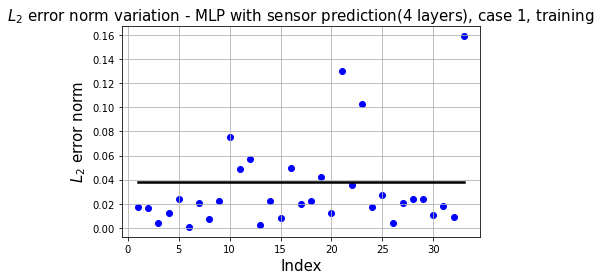

In [141]:
plt.plot(np.linspace(1, x_train1.shape[0], x_train1.shape[0]), l2_error_train1*np.ones(x_train1.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train1.shape[0], x_train1.shape[0]), l2_error_train_list1, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP with sensor prediction(4 layers), case 1, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

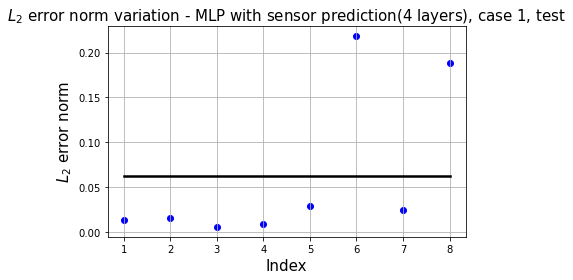

In [142]:
plt.plot(np.linspace(1, x_test1.shape[0], x_test1.shape[0]), l2_error_test1*np.ones(x_test1.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test1.shape[0], x_test1.shape[0]), l2_error_test_list1, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP with sensor prediction(4 layers), case 1, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

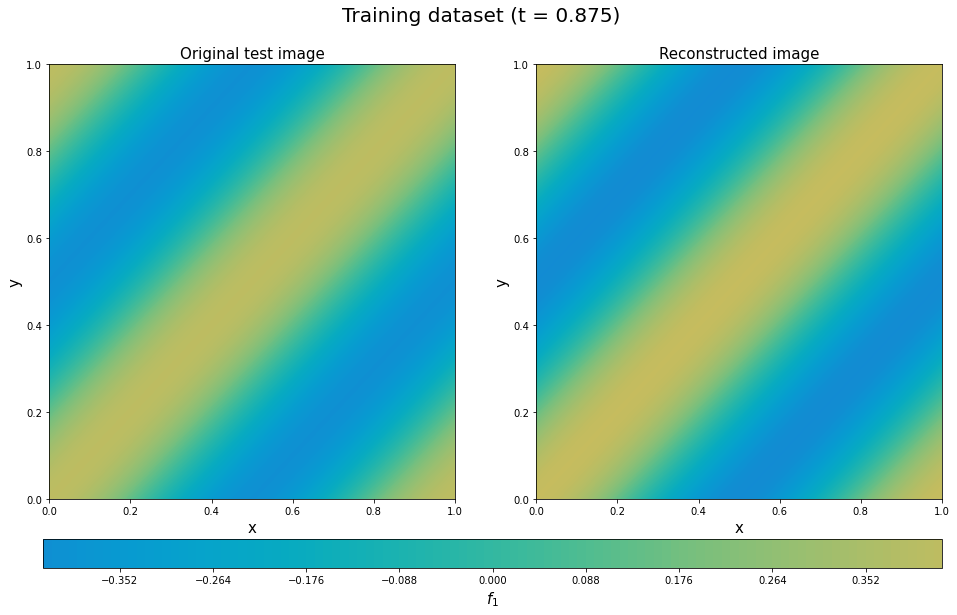

In [51]:
plt.figure(figsize=(16, 8))
y_train1_9_rotate = y_train1[9].T.reshape(101,101)
decoded_rotate1 = decoded_train1[9].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train1_9_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate1, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-1.0,1.0)
a2.set_clim(-1.0,1.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_1$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[35]),fontsize=20)
plt.show()

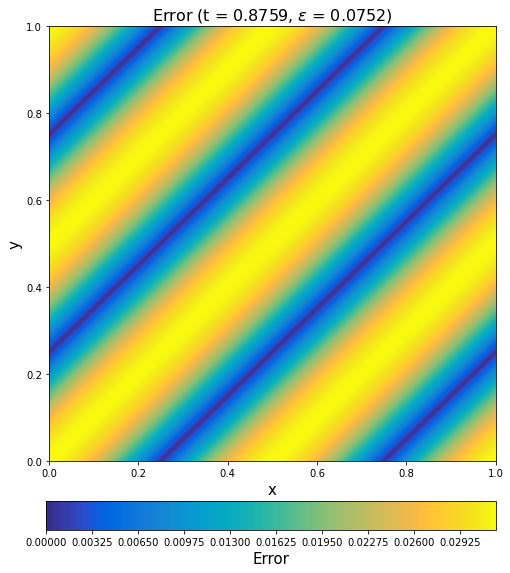

In [52]:
error_train_abs1_rotate9 = error_train_abs1[9].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs1_rotate9, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.8759, $\epsilon$ = %.4f)' %(l2_error_train_list1[9]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

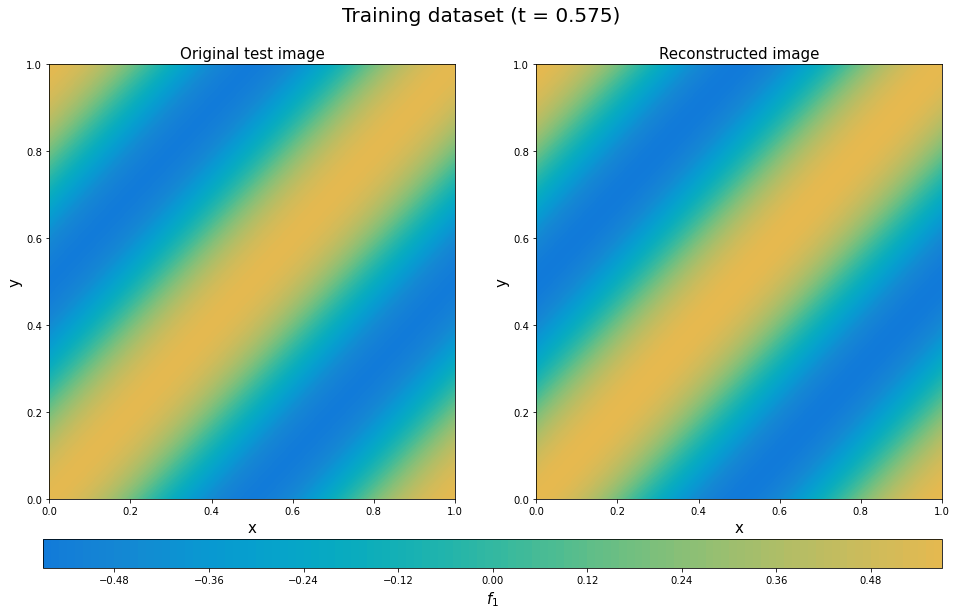

In [53]:
plt.figure(figsize=(16, 8))
y_train1_23_rotate = y_train1[23].T.reshape(101,101)
decoded_rotate1 = decoded_train1[23].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train1_23_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate1, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-1.0,1.0)
a2.set_clim(-1.0,1.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_1$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[23]), fontsize=20)
plt.show()

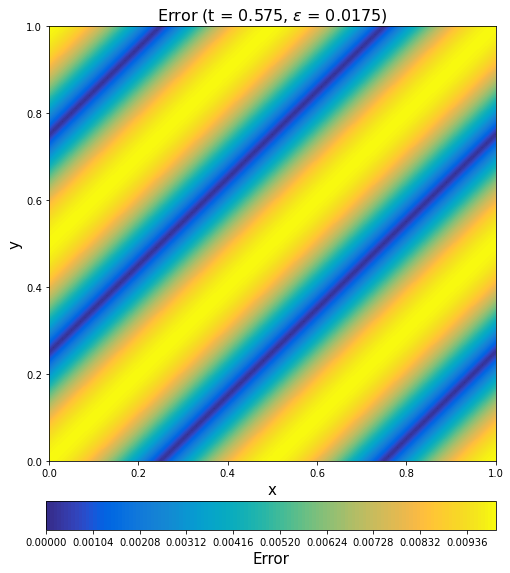

In [54]:
error_train_abs1_rotate23 = error_train_abs1[23].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs1_rotate23, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.575, $\epsilon$ = %.4f)' %(l2_error_train_list1[23]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

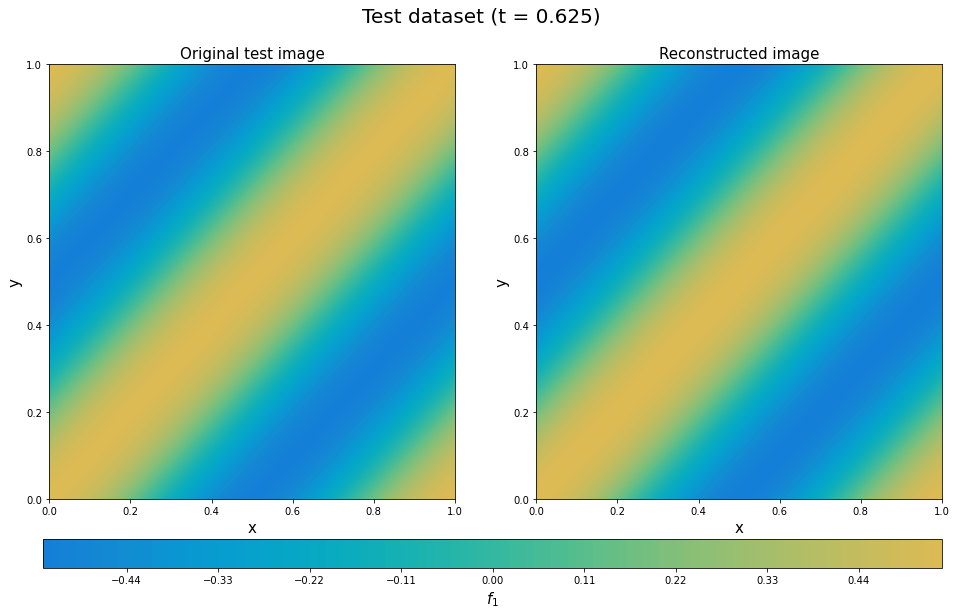

In [55]:
plt.figure(figsize=(16, 8))
y_test1_3_rotate = y_test1[3].T.reshape(101,101)
decoded_rotate1 = decoded_test1[3].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test1_3_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate1, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-1.0,1.0)
a2.set_clim(-1.0,1.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_1$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)'  %(t[25]),fontsize=20)
plt.show()

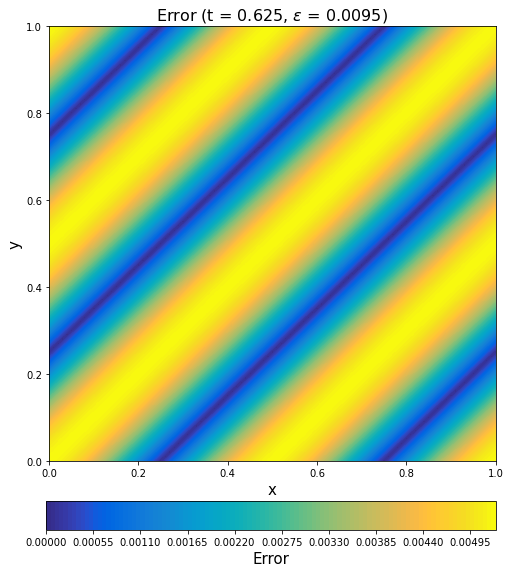

In [56]:
error_test_abs1_rotate3 = error_test_abs1[3].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs1_rotate3, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.625, $\epsilon$ = %.4f)' %(l2_error_test_list1[3]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

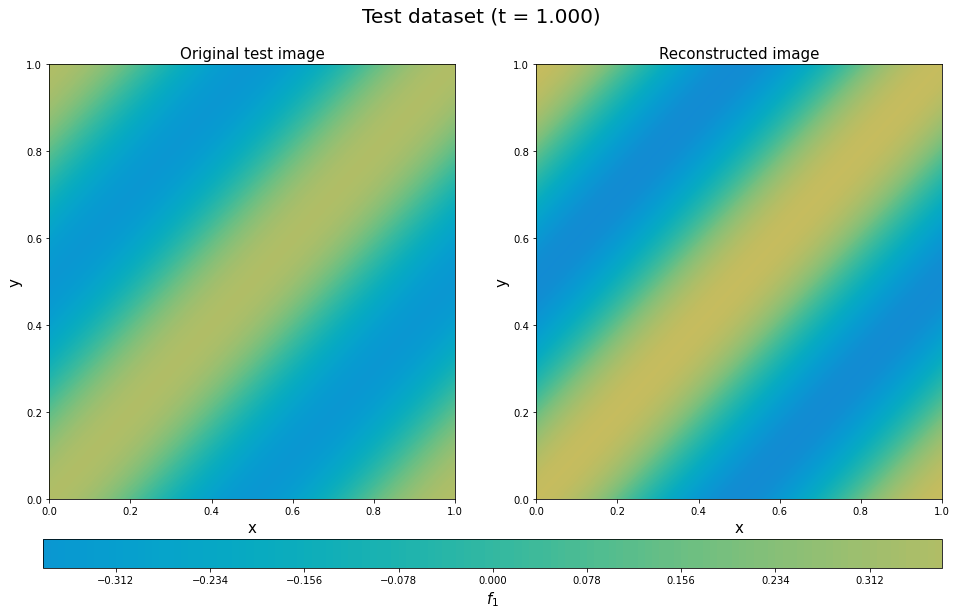

In [57]:
plt.figure(figsize=(16, 8))
y_test1_5_rotate = y_test1[5].T.reshape(101,101)
decoded_rotate1 = decoded_test1[5].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test1_5_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate1, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-1.0,1.0)
a2.set_clim(-1.0,1.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_1$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)'  %(t[40]),fontsize=20)
plt.show()

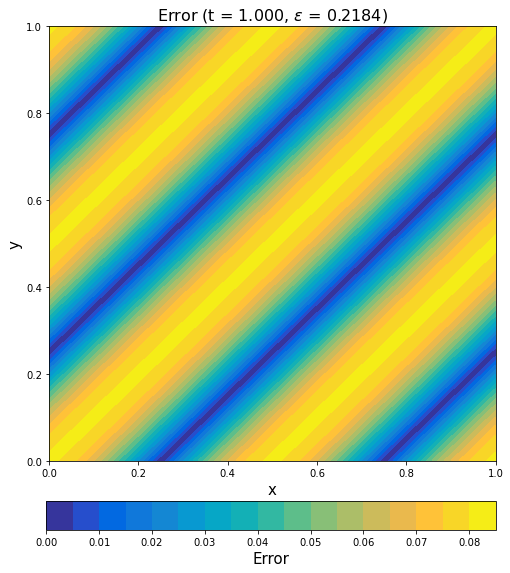

In [58]:
error_test_abs1_rotate5 = error_test_abs1[5].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs1_rotate5, levels=16, cmap=parula_map)
ax5.set_title(r'Error (t = 1.000, $\epsilon$ = %.4f)' %(l2_error_test_list1[5]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

Case 2: f2

In [59]:
out2 = np.zeros((41, 101, 101))
for i in range(0, 41):
    for j in range(0, 101):
        for k in range(0, 101):
            out2[i, j, k] = x[j] + y[k] + t[i]

In [60]:
sensor2 = np.zeros((41, 4, 4))
for i in range(0, len(t)):
    for j in range(0, 4):
        for k in range(0, 4):
            sensor2[i, j, k] = out2[i, 20*(j+1)+1, 20*(k+1)+1]

In [61]:
sensor2 = sensor2.reshape((41, 16, 1))

In [62]:
sensor2.shape

(41, 16, 1)

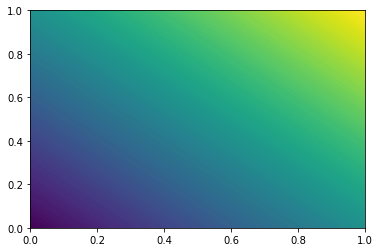

In [63]:
plt.contourf(xmesh, ymesh, out2[0,:,:], levels=128)

In [64]:
x_train2, x_test2, y_train2, y_test2, t_train, t_test = train_test_split(sensor2, out2, t.reshape((41, 1)), test_size=0.18, random_state=42)

In [65]:
x_train2

array([[[1.145],
        [1.345],
        [1.545],
        [1.745],
        [1.345],
        [1.545],
        [1.745],
        [1.945],
        [1.545],
        [1.745],
        [1.945],
        [2.145],
        [1.745],
        [1.945],
        [2.145],
        [2.345]],

       [[0.57 ],
        [0.77 ],
        [0.97 ],
        [1.17 ],
        [0.77 ],
        [0.97 ],
        [1.17 ],
        [1.37 ],
        [0.97 ],
        [1.17 ],
        [1.37 ],
        [1.57 ],
        [1.17 ],
        [1.37 ],
        [1.57 ],
        [1.77 ]],

       [[1.07 ],
        [1.27 ],
        [1.47 ],
        [1.67 ],
        [1.27 ],
        [1.47 ],
        [1.67 ],
        [1.87 ],
        [1.47 ],
        [1.67 ],
        [1.87 ],
        [2.07 ],
        [1.67 ],
        [1.87 ],
        [2.07 ],
        [2.27 ]],

       [[0.72 ],
        [0.92 ],
        [1.12 ],
        [1.32 ],
        [0.92 ],
        [1.12 ],
        [1.32 ],
        [1.52 ],
        [1.12 ],
        [1.32 ],
        

In [66]:
x_test2

array([[[1.02 ],
        [1.22 ],
        [1.42 ],
        [1.62 ],
        [1.22 ],
        [1.42 ],
        [1.62 ],
        [1.82 ],
        [1.42 ],
        [1.62 ],
        [1.82 ],
        [2.02 ],
        [1.62 ],
        [1.82 ],
        [2.02 ],
        [2.22 ]],

       [[0.745],
        [0.945],
        [1.145],
        [1.345],
        [0.945],
        [1.145],
        [1.345],
        [1.545],
        [1.145],
        [1.345],
        [1.545],
        [1.745],
        [1.345],
        [1.545],
        [1.745],
        [1.945]],

       [[0.62 ],
        [0.82 ],
        [1.02 ],
        [1.22 ],
        [0.82 ],
        [1.02 ],
        [1.22 ],
        [1.42 ],
        [1.02 ],
        [1.22 ],
        [1.42 ],
        [1.62 ],
        [1.22 ],
        [1.42 ],
        [1.62 ],
        [1.82 ]],

       [[1.045],
        [1.245],
        [1.445],
        [1.645],
        [1.245],
        [1.445],
        [1.645],
        [1.845],
        [1.445],
        [1.645],
        

In [67]:
sensor_pred2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
                     loss = tf.keras.losses.MeanSquaredError(),
                     metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [68]:
start2 = datetime.datetime.now()
history2 = sensor_pred2.fit(t_train, x_train2, epochs=10000, shuffle=True)
end2 = datetime.datetime.now()

Epoch 1/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.5879 - rmse: 1.6087
Epoch 2/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.5864 - rmse: 1.6082
Epoch 3/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.5849 - rmse: 1.6078
Epoch 4/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.5834 - rmse: 1.6073
Epoch 5/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.5820 - rmse: 1.6069
Epoch 6/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.5805 - rmse: 1.6064
Epoch 7/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.5791 - rmse: 1.6059
Epoch 8/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.5776 - rmse: 1.6055
Epoch 9/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.5761 - rmse: 1.6050
Epoch 10/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.5747 - rmse: 1.6046
Epoch 11/10000
2/2 [=============================

2/2 [==============================] - 0s 4ms/step - loss: 2.4766 - rmse: 1.5737
Epoch 87/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.4754 - rmse: 1.5734
Epoch 88/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.4742 - rmse: 1.5730
Epoch 89/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.4731 - rmse: 1.5726
Epoch 90/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4719 - rmse: 1.5722
Epoch 91/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4707 - rmse: 1.5718
Epoch 92/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4695 - rmse: 1.5715
Epoch 93/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.4683 - rmse: 1.5711
Epoch 94/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.4671 - rmse: 1.5707
Epoch 95/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4660 - rmse: 1.5703
Epoch 96/10000
2/2 [==============================] - 0

2/2 [==============================] - 0s 4ms/step - loss: 2.3873 - rmse: 1.5451
Epoch 171/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.3863 - rmse: 1.5448
Epoch 172/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.3853 - rmse: 1.5444
Epoch 173/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3843 - rmse: 1.5441
Epoch 174/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.3833 - rmse: 1.5438
Epoch 175/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.3824 - rmse: 1.5435
Epoch 176/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3814 - rmse: 1.5432
Epoch 177/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.3804 - rmse: 1.5429
Epoch 178/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.3795 - rmse: 1.5426
Epoch 179/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3785 - rmse: 1.5422
Epoch 180/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 2.3094 - rmse: 1.5197
Epoch 255/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.3085 - rmse: 1.5194
Epoch 256/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.3076 - rmse: 1.5191
Epoch 257/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3068 - rmse: 1.5188
Epoch 258/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3059 - rmse: 1.5185
Epoch 259/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.3050 - rmse: 1.5182
Epoch 260/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.3041 - rmse: 1.5179
Epoch 261/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3033 - rmse: 1.5177
Epoch 262/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.3024 - rmse: 1.5174
Epoch 263/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.3016 - rmse: 1.5171
Epoch 264/10000
2/2 [=========================

2/2 [==============================] - 0s 5ms/step - loss: 2.2390 - rmse: 1.4963
Epoch 339/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2382 - rmse: 1.4961
Epoch 340/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.2374 - rmse: 1.4958
Epoch 341/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2366 - rmse: 1.4955
Epoch 342/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.2357 - rmse: 1.4952
Epoch 343/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.2349 - rmse: 1.4950
Epoch 344/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2341 - rmse: 1.4947
Epoch 345/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.2333 - rmse: 1.4944
Epoch 346/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.2325 - rmse: 1.4942
Epoch 347/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2317 - rmse: 1.4939
Epoch 348/10000
2/2 [=========================

2/2 [==============================] - 0s 15ms/step - loss: 2.1721 - rmse: 1.4738
Epoch 423/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1713 - rmse: 1.4735
Epoch 424/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.1705 - rmse: 1.4733
Epoch 425/10000
2/2 [==============================] - 0s 14ms/step - loss: 2.1698 - rmse: 1.4730
Epoch 426/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1690 - rmse: 1.4727
Epoch 427/10000
2/2 [==============================] - 0s 14ms/step - loss: 2.1682 - rmse: 1.4725
Epoch 428/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.1674 - rmse: 1.4722
Epoch 429/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.1666 - rmse: 1.4719
Epoch 430/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.1658 - rmse: 1.4717
Epoch 431/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.1651 - rmse: 1.4714
Epoch 432/10000
2/2 [===================

2/2 [==============================] - 0s 4ms/step - loss: 2.1066 - rmse: 1.4514
Epoch 507/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1058 - rmse: 1.4511
Epoch 508/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1050 - rmse: 1.4509
Epoch 509/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.1043 - rmse: 1.4506
Epoch 510/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.1035 - rmse: 1.4503
Epoch 511/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1027 - rmse: 1.4501
Epoch 512/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.1019 - rmse: 1.4498
Epoch 513/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.1011 - rmse: 1.4495
Epoch 514/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.1003 - rmse: 1.4492
Epoch 515/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.0995 - rmse: 1.4490
Epoch 516/10000
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 2.0388 - rmse: 1.4279
Epoch 591/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0379 - rmse: 1.4276
Epoch 592/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0371 - rmse: 1.4273
Epoch 593/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0363 - rmse: 1.4270
Epoch 594/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0355 - rmse: 1.4267
Epoch 595/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.0346 - rmse: 1.4264
Epoch 596/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0338 - rmse: 1.4261
Epoch 597/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0329 - rmse: 1.4258
Epoch 598/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0321 - rmse: 1.4255
Epoch 599/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.0312 - rmse: 1.4252
Epoch 600/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 1.9682 - rmse: 1.4029
Epoch 675/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.9674 - rmse: 1.4026
Epoch 676/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9665 - rmse: 1.4023
Epoch 677/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9657 - rmse: 1.4020
Epoch 678/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9649 - rmse: 1.4017
Epoch 679/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9641 - rmse: 1.4014
Epoch 680/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.9632 - rmse: 1.4011
Epoch 681/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9624 - rmse: 1.4008
Epoch 682/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9615 - rmse: 1.4005
Epoch 683/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.9606 - rmse: 1.4002
Epoch 684/10000
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 1.8943 - rmse: 1.3763
Epoch 759/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8934 - rmse: 1.3760
Epoch 760/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8925 - rmse: 1.3757
Epoch 761/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.8916 - rmse: 1.3754
Epoch 762/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8907 - rmse: 1.3750
Epoch 763/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.8899 - rmse: 1.3747
Epoch 764/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.8889 - rmse: 1.3744
Epoch 765/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8880 - rmse: 1.3741
Epoch 766/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8871 - rmse: 1.3737
Epoch 767/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8862 - rmse: 1.3734
Epoch 768/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 1.8178 - rmse: 1.3483
Epoch 843/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.8169 - rmse: 1.3479
Epoch 844/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.8159 - rmse: 1.3476
Epoch 845/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.8150 - rmse: 1.3472
Epoch 846/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8141 - rmse: 1.3469
Epoch 847/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.8131 - rmse: 1.3465
Epoch 848/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8121 - rmse: 1.3462
Epoch 849/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.8112 - rmse: 1.3458
Epoch 850/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8102 - rmse: 1.3454
Epoch 851/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.8092 - rmse: 1.3451
Epoch 852/10000
2/2 [=========================

2/2 [==============================] - 0s 5ms/step - loss: 1.7352 - rmse: 1.3173
Epoch 927/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7342 - rmse: 1.3169
Epoch 928/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7332 - rmse: 1.3165
Epoch 929/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.7322 - rmse: 1.3161
Epoch 930/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.7312 - rmse: 1.3157
Epoch 931/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.7302 - rmse: 1.3154
Epoch 932/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.7291 - rmse: 1.3150
Epoch 933/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.7281 - rmse: 1.3146
Epoch 934/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.7271 - rmse: 1.3142
Epoch 935/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7261 - rmse: 1.3138
Epoch 936/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 1.6499 - rmse: 1.2845
Epoch 1011/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6489 - rmse: 1.2841
Epoch 1012/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.6478 - rmse: 1.2837
Epoch 1013/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6468 - rmse: 1.2833
Epoch 1014/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6458 - rmse: 1.2829
Epoch 1015/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.6448 - rmse: 1.2825
Epoch 1016/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6437 - rmse: 1.2821
Epoch 1017/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6427 - rmse: 1.2817
Epoch 1018/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.6416 - rmse: 1.2813
Epoch 1019/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.6406 - rmse: 1.2809
Epoch 1020/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 1.5643 - rmse: 1.2507
Epoch 1094/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5632 - rmse: 1.2503
Epoch 1095/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5622 - rmse: 1.2499
Epoch 1096/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.5612 - rmse: 1.2495
Epoch 1097/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5601 - rmse: 1.2490
Epoch 1098/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5590 - rmse: 1.2486
Epoch 1099/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.5580 - rmse: 1.2482
Epoch 1100/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5569 - rmse: 1.2478
Epoch 1101/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5559 - rmse: 1.2474
Epoch 1102/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.5549 - rmse: 1.2470
Epoch 1103/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 1.4776 - rmse: 1.2155
Epoch 1177/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.4764 - rmse: 1.2151
Epoch 1178/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4754 - rmse: 1.2146
Epoch 1179/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4743 - rmse: 1.2142
Epoch 1180/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.4732 - rmse: 1.2138
Epoch 1181/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4722 - rmse: 1.2133
Epoch 1182/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4712 - rmse: 1.2129
Epoch 1183/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.4701 - rmse: 1.2125
Epoch 1184/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4691 - rmse: 1.2121
Epoch 1185/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4682 - rmse: 1.2117
Epoch 1186/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 1.3888 - rmse: 1.1785
Epoch 1260/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3878 - rmse: 1.1781
Epoch 1261/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3869 - rmse: 1.1777
Epoch 1262/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3859 - rmse: 1.1772
Epoch 1263/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3849 - rmse: 1.1768
Epoch 1264/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3839 - rmse: 1.1764
Epoch 1265/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3829 - rmse: 1.1760
Epoch 1266/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3819 - rmse: 1.1755
Epoch 1267/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3809 - rmse: 1.1751
Epoch 1268/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.3799 - rmse: 1.1747
Epoch 1269/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 1.2972 - rmse: 1.1390
Epoch 1343/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2961 - rmse: 1.1385
Epoch 1344/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2950 - rmse: 1.1380
Epoch 1345/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2938 - rmse: 1.1375
Epoch 1346/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.2927 - rmse: 1.1370
Epoch 1347/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2915 - rmse: 1.1365
Epoch 1348/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2904 - rmse: 1.1359
Epoch 1349/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2892 - rmse: 1.1354
Epoch 1350/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2881 - rmse: 1.1349
Epoch 1351/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2870 - rmse: 1.1345
Epoch 1352/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 1.2119 - rmse: 1.1009
Epoch 1426/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2110 - rmse: 1.1005
Epoch 1427/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.2101 - rmse: 1.1001
Epoch 1428/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2091 - rmse: 1.0996
Epoch 1429/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2081 - rmse: 1.0992
Epoch 1430/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2072 - rmse: 1.0987
Epoch 1431/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2062 - rmse: 1.0983
Epoch 1432/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2052 - rmse: 1.0978
Epoch 1433/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2042 - rmse: 1.0974
Epoch 1434/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2033 - rmse: 1.0969
Epoch 1435/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 1.1297 - rmse: 1.0629
Epoch 1509/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1288 - rmse: 1.0624
Epoch 1510/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1279 - rmse: 1.0620
Epoch 1511/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1270 - rmse: 1.0616
Epoch 1512/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1260 - rmse: 1.0611
Epoch 1513/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1250 - rmse: 1.0607
Epoch 1514/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1239 - rmse: 1.0602
Epoch 1515/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1229 - rmse: 1.0597
Epoch 1516/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1219 - rmse: 1.0592
Epoch 1517/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1208 - rmse: 1.0587
Epoch 1518/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 1.0517 - rmse: 1.0255
Epoch 1592/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0507 - rmse: 1.0250
Epoch 1593/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.0497 - rmse: 1.0245
Epoch 1594/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0487 - rmse: 1.0241
Epoch 1595/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0478 - rmse: 1.0236
Epoch 1596/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.0469 - rmse: 1.0232
Epoch 1597/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0460 - rmse: 1.0228
Epoch 1598/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0452 - rmse: 1.0223
Epoch 1599/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.0442 - rmse: 1.0219
Epoch 1600/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.0433 - rmse: 1.0214
Epoch 1601/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.9775 - rmse: 0.9887
Epoch 1675/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.9767 - rmse: 0.9883
Epoch 1676/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.9758 - rmse: 0.9878
Epoch 1677/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.9750 - rmse: 0.9874
Epoch 1678/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.9741 - rmse: 0.9870
Epoch 1679/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.9733 - rmse: 0.9865
Epoch 1680/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.9724 - rmse: 0.9861
Epoch 1681/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.9715 - rmse: 0.9857
Epoch 1682/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.9707 - rmse: 0.9852
Epoch 1683/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.9698 - rmse: 0.9848
Epoch 1684/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.9102 - rmse: 0.9541
Epoch 1758/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.9096 - rmse: 0.9537
Epoch 1759/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.9089 - rmse: 0.9534
Epoch 1760/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.9083 - rmse: 0.9530
Epoch 1761/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.9076 - rmse: 0.9527
Epoch 1762/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.9068 - rmse: 0.9523
Epoch 1763/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.9061 - rmse: 0.9519
Epoch 1764/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.9054 - rmse: 0.9515
Epoch 1765/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.9046 - rmse: 0.9511
Epoch 1766/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.9039 - rmse: 0.9507
Epoch 1767/10000
2/2 [===============

2/2 [==============================] - 0s 9ms/step - loss: 0.8436 - rmse: 0.9185
Epoch 1841/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.8428 - rmse: 0.9180
Epoch 1842/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.8420 - rmse: 0.9176
Epoch 1843/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.8412 - rmse: 0.9172
Epoch 1844/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.8405 - rmse: 0.9168
Epoch 1845/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.8397 - rmse: 0.9164
Epoch 1846/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.8389 - rmse: 0.9159
Epoch 1847/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.8381 - rmse: 0.9155
Epoch 1848/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.8373 - rmse: 0.9151
Epoch 1849/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.8366 - rmse: 0.9146
Epoch 1850/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.7790 - rmse: 0.8826
Epoch 1924/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.7783 - rmse: 0.8822
Epoch 1925/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.7776 - rmse: 0.8818
Epoch 1926/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.7769 - rmse: 0.8814
Epoch 1927/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.7762 - rmse: 0.8810
Epoch 1928/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.7756 - rmse: 0.8807
Epoch 1929/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.7749 - rmse: 0.8803
Epoch 1930/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.7743 - rmse: 0.8799
Epoch 1931/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.7736 - rmse: 0.8796
Epoch 1932/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.7730 - rmse: 0.8792
Epoch 1933/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.7216 - rmse: 0.8494
Epoch 2007/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.7209 - rmse: 0.8491
Epoch 2008/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.7203 - rmse: 0.8487
Epoch 2009/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.7197 - rmse: 0.8483
Epoch 2010/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.7190 - rmse: 0.8479
Epoch 2011/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.7184 - rmse: 0.8476
Epoch 2012/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.7177 - rmse: 0.8472
Epoch 2013/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.7171 - rmse: 0.8468
Epoch 2014/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.7166 - rmse: 0.8465
Epoch 2015/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.7160 - rmse: 0.8461
Epoch 2016/10000
2/2 [===============

2/2 [==============================] - 0s 10ms/step - loss: 0.6673 - rmse: 0.8169
Epoch 2090/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.6667 - rmse: 0.8165
Epoch 2091/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.6660 - rmse: 0.8161
Epoch 2092/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.6654 - rmse: 0.8157
Epoch 2093/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.6647 - rmse: 0.8153
Epoch 2094/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.6641 - rmse: 0.8149
Epoch 2095/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.6634 - rmse: 0.8145
Epoch 2096/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.6627 - rmse: 0.8141
Epoch 2097/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.6620 - rmse: 0.8137
Epoch 2098/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.6614 - rmse: 0.8133
Epoch 2099/10000
2/2 [=============

2/2 [==============================] - 0s 4ms/step - loss: 0.6137 - rmse: 0.7834
Epoch 2173/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.6131 - rmse: 0.7830
Epoch 2174/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6125 - rmse: 0.7826
Epoch 2175/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.6119 - rmse: 0.7823
Epoch 2176/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.6113 - rmse: 0.7819
Epoch 2177/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6107 - rmse: 0.7815
Epoch 2178/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.6101 - rmse: 0.7811
Epoch 2179/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.6094 - rmse: 0.7807
Epoch 2180/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.6088 - rmse: 0.7802
Epoch 2181/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.6082 - rmse: 0.7798
Epoch 2182/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.5644 - rmse: 0.7513
Epoch 2256/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.5638 - rmse: 0.7509
Epoch 2257/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.5632 - rmse: 0.7505
Epoch 2258/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.5627 - rmse: 0.7501
Epoch 2259/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5621 - rmse: 0.7498
Epoch 2260/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.5616 - rmse: 0.7494
Epoch 2261/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.5611 - rmse: 0.7491
Epoch 2262/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5606 - rmse: 0.7487
Epoch 2263/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.5600 - rmse: 0.7483
Epoch 2264/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.5594 - rmse: 0.7480
Epoch 2265/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.5182 - rmse: 0.7198
Epoch 2339/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.5176 - rmse: 0.7195
Epoch 2340/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.5171 - rmse: 0.7191
Epoch 2341/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.5165 - rmse: 0.7187
Epoch 2342/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.5160 - rmse: 0.7183
Epoch 2343/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5155 - rmse: 0.7180
Epoch 2344/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.5150 - rmse: 0.7176
Epoch 2345/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.5145 - rmse: 0.7173
Epoch 2346/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.5140 - rmse: 0.7169
Epoch 2347/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.5135 - rmse: 0.7166
Epoch 2348/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.4755 - rmse: 0.6896
Epoch 2422/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.4750 - rmse: 0.6892
Epoch 2423/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.4745 - rmse: 0.6889
Epoch 2424/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4741 - rmse: 0.6885
Epoch 2425/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4736 - rmse: 0.6882
Epoch 2426/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.4731 - rmse: 0.6878
Epoch 2427/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4726 - rmse: 0.6875
Epoch 2428/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4721 - rmse: 0.6871
Epoch 2429/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.4716 - rmse: 0.6868
Epoch 2430/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4711 - rmse: 0.6864
Epoch 2431/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.4347 - rmse: 0.6593
Epoch 2505/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4342 - rmse: 0.6589
Epoch 2506/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4337 - rmse: 0.6586
Epoch 2507/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4333 - rmse: 0.6582
Epoch 2508/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.4328 - rmse: 0.6579
Epoch 2509/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4323 - rmse: 0.6575
Epoch 2510/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.4319 - rmse: 0.6572
Epoch 2511/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.4314 - rmse: 0.6568
Epoch 2512/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4309 - rmse: 0.6564
Epoch 2513/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.4304 - rmse: 0.6561
Epoch 2514/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.3974 - rmse: 0.6304
Epoch 2588/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3970 - rmse: 0.6301
Epoch 2589/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3965 - rmse: 0.6297
Epoch 2590/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.3961 - rmse: 0.6294
Epoch 2591/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3956 - rmse: 0.6290
Epoch 2592/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.3952 - rmse: 0.6287
Epoch 2593/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.3948 - rmse: 0.6283
Epoch 2594/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.3944 - rmse: 0.6280
Epoch 2595/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.3941 - rmse: 0.6277
Epoch 2596/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3937 - rmse: 0.6274
Epoch 2597/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.3639 - rmse: 0.6033
Epoch 2671/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3635 - rmse: 0.6029
Epoch 2672/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.3631 - rmse: 0.6025
Epoch 2673/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.3626 - rmse: 0.6021
Epoch 2674/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3621 - rmse: 0.6018
Epoch 2675/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3617 - rmse: 0.6014
Epoch 2676/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.3613 - rmse: 0.6011
Epoch 2677/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3609 - rmse: 0.6008
Epoch 2678/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3605 - rmse: 0.6005
Epoch 2679/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3601 - rmse: 0.6001
Epoch 2680/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.3305 - rmse: 0.5749
Epoch 2754/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.3301 - rmse: 0.5746
Epoch 2755/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.3298 - rmse: 0.5742
Epoch 2756/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3294 - rmse: 0.5739
Epoch 2757/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3290 - rmse: 0.5736
Epoch 2758/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3286 - rmse: 0.5733
Epoch 2759/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3283 - rmse: 0.5729
Epoch 2760/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.3279 - rmse: 0.5726
Epoch 2761/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3275 - rmse: 0.5723
Epoch 2762/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.3272 - rmse: 0.5720
Epoch 2763/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.2999 - rmse: 0.5476
Epoch 2837/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2995 - rmse: 0.5473
Epoch 2838/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.2992 - rmse: 0.5470
Epoch 2839/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.2988 - rmse: 0.5466
Epoch 2840/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2985 - rmse: 0.5463
Epoch 2841/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2981 - rmse: 0.5460
Epoch 2842/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.2977 - rmse: 0.5456
Epoch 2843/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2974 - rmse: 0.5453
Epoch 2844/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2970 - rmse: 0.5450
Epoch 2845/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.2966 - rmse: 0.5446
Epoch 2846/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 0.2722 - rmse: 0.5217
Epoch 2920/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2719 - rmse: 0.5214
Epoch 2921/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2716 - rmse: 0.5211
Epoch 2922/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2713 - rmse: 0.5208
Epoch 2923/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2709 - rmse: 0.5205
Epoch 2924/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2706 - rmse: 0.5202
Epoch 2925/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.2702 - rmse: 0.5198
Epoch 2926/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.2699 - rmse: 0.5195
Epoch 2927/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2695 - rmse: 0.5192
Epoch 2928/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.2692 - rmse: 0.5188
Epoch 2929/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.2464 - rmse: 0.4963
Epoch 3003/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2460 - rmse: 0.4960
Epoch 3004/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.2457 - rmse: 0.4957
Epoch 3005/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.2454 - rmse: 0.4954
Epoch 3006/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.2451 - rmse: 0.4951
Epoch 3007/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2448 - rmse: 0.4948
Epoch 3008/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2445 - rmse: 0.4945
Epoch 3009/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.2442 - rmse: 0.4942
Epoch 3010/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.2439 - rmse: 0.4939
Epoch 3011/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2436 - rmse: 0.4936
Epoch 3012/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.2236 - rmse: 0.4729
Epoch 3086/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2234 - rmse: 0.4727
Epoch 3087/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.2232 - rmse: 0.4724
Epoch 3088/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2229 - rmse: 0.4722
Epoch 3089/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.2227 - rmse: 0.4719
Epoch 3090/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.2225 - rmse: 0.4717
Epoch 3091/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.2223 - rmse: 0.4714
Epoch 3092/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2220 - rmse: 0.4712
Epoch 3093/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.2218 - rmse: 0.4709
Epoch 3094/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2216 - rmse: 0.4707
Epoch 3095/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.2039 - rmse: 0.4516
Epoch 3169/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.2037 - rmse: 0.4513
Epoch 3170/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.2035 - rmse: 0.4511
Epoch 3171/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.2033 - rmse: 0.4509
Epoch 3172/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.2031 - rmse: 0.4506
Epoch 3173/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2029 - rmse: 0.4504
Epoch 3174/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.2026 - rmse: 0.4502
Epoch 3175/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.2024 - rmse: 0.4499
Epoch 3176/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2022 - rmse: 0.4496
Epoch 3177/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2019 - rmse: 0.4494
Epoch 3178/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.1858 - rmse: 0.4310
Epoch 3252/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1855 - rmse: 0.4307
Epoch 3253/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.1853 - rmse: 0.4305
Epoch 3254/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1851 - rmse: 0.4302
Epoch 3255/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1849 - rmse: 0.4300
Epoch 3256/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1847 - rmse: 0.4298
Epoch 3257/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1846 - rmse: 0.4296
Epoch 3258/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1844 - rmse: 0.4294
Epoch 3259/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1841 - rmse: 0.4291
Epoch 3260/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.1839 - rmse: 0.4289
Epoch 3261/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.1689 - rmse: 0.4110
Epoch 3335/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1687 - rmse: 0.4108
Epoch 3336/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1686 - rmse: 0.4106
Epoch 3337/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1684 - rmse: 0.4103
Epoch 3338/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1682 - rmse: 0.4101
Epoch 3339/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1680 - rmse: 0.4099
Epoch 3340/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1678 - rmse: 0.4097
Epoch 3341/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1676 - rmse: 0.4094
Epoch 3342/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1675 - rmse: 0.4092
Epoch 3343/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1673 - rmse: 0.4090
Epoch 3344/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.1550 - rmse: 0.3938
Epoch 3418/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1549 - rmse: 0.3936
Epoch 3419/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1547 - rmse: 0.3934
Epoch 3420/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1546 - rmse: 0.3932
Epoch 3421/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1544 - rmse: 0.3929
Epoch 3422/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1542 - rmse: 0.3927
Epoch 3423/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.1541 - rmse: 0.3925
Epoch 3424/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.1539 - rmse: 0.3923
Epoch 3425/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1537 - rmse: 0.3921
Epoch 3426/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1536 - rmse: 0.3919
Epoch 3427/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.1439 - rmse: 0.3794
Epoch 3501/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1438 - rmse: 0.3792
Epoch 3502/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1437 - rmse: 0.3791
Epoch 3503/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1436 - rmse: 0.3789
Epoch 3504/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1434 - rmse: 0.3787
Epoch 3505/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.1433 - rmse: 0.3785
Epoch 3506/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1431 - rmse: 0.3783
Epoch 3507/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1430 - rmse: 0.3781
Epoch 3508/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1428 - rmse: 0.3779
Epoch 3509/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1426 - rmse: 0.3777
Epoch 3510/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.1333 - rmse: 0.3652
Epoch 3584/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1332 - rmse: 0.3650
Epoch 3585/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1331 - rmse: 0.3648
Epoch 3586/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.1329 - rmse: 0.3646
Epoch 3587/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1328 - rmse: 0.3644
Epoch 3588/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1327 - rmse: 0.3642
Epoch 3589/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1325 - rmse: 0.3641
Epoch 3590/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.1324 - rmse: 0.3639
Epoch 3591/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1323 - rmse: 0.3637
Epoch 3592/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1321 - rmse: 0.3635
Epoch 3593/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.1243 - rmse: 0.3526
Epoch 3667/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1242 - rmse: 0.3524
Epoch 3668/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1241 - rmse: 0.3523
Epoch 3669/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1240 - rmse: 0.3521
Epoch 3670/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1239 - rmse: 0.3519
Epoch 3671/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1238 - rmse: 0.3518
Epoch 3672/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1236 - rmse: 0.3516
Epoch 3673/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1235 - rmse: 0.3515
Epoch 3674/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1234 - rmse: 0.3513
Epoch 3675/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.1233 - rmse: 0.3511
Epoch 3676/10000
2/2 [==============

2/2 [==============================] - 0s 4ms/step - loss: 0.1160 - rmse: 0.3406
Epoch 3750/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1159 - rmse: 0.3404
Epoch 3751/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1158 - rmse: 0.3403
Epoch 3752/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1157 - rmse: 0.3402
Epoch 3753/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1156 - rmse: 0.3400
Epoch 3754/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1155 - rmse: 0.3399
Epoch 3755/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1155 - rmse: 0.3398
Epoch 3756/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1154 - rmse: 0.3397
Epoch 3757/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1153 - rmse: 0.3395
Epoch 3758/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1152 - rmse: 0.3394
Epoch 3759/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.1100 - rmse: 0.3316
Epoch 3833/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1099 - rmse: 0.3316
Epoch 3834/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1099 - rmse: 0.3315
Epoch 3835/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1098 - rmse: 0.3314
Epoch 3836/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1097 - rmse: 0.3312
Epoch 3837/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1097 - rmse: 0.3312
Epoch 3838/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1096 - rmse: 0.3310
Epoch 3839/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1095 - rmse: 0.3309
Epoch 3840/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.1094 - rmse: 0.3308
Epoch 3841/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.1093 - rmse: 0.3307
Epoch 3842/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.1047 - rmse: 0.3236
Epoch 3916/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1047 - rmse: 0.3236
Epoch 3917/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.1047 - rmse: 0.3235
Epoch 3918/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1046 - rmse: 0.3235
Epoch 3919/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1046 - rmse: 0.3234
Epoch 3920/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.1045 - rmse: 0.3233
Epoch 3921/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1045 - rmse: 0.3232
Epoch 3922/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1044 - rmse: 0.3231
Epoch 3923/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.1043 - rmse: 0.3230
Epoch 3924/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1043 - rmse: 0.3229
Epoch 3925/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.1000 - rmse: 0.3162
Epoch 3999/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0999 - rmse: 0.3161
Epoch 4000/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0999 - rmse: 0.3161
Epoch 4001/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0998 - rmse: 0.3160
Epoch 4002/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0998 - rmse: 0.3159
Epoch 4003/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0997 - rmse: 0.3158
Epoch 4004/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0997 - rmse: 0.3158
Epoch 4005/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0997 - rmse: 0.3157
Epoch 4006/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0996 - rmse: 0.3156
Epoch 4007/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0996 - rmse: 0.3156
Epoch 4008/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0963 - rmse: 0.3103
Epoch 4082/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0962 - rmse: 0.3102
Epoch 4083/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0962 - rmse: 0.3101
Epoch 4084/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0961 - rmse: 0.3100
Epoch 4085/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0960 - rmse: 0.3099
Epoch 4086/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0960 - rmse: 0.3098
Epoch 4087/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0959 - rmse: 0.3097
Epoch 4088/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0959 - rmse: 0.3097
Epoch 4089/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0958 - rmse: 0.3096
Epoch 4090/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0958 - rmse: 0.3095
Epoch 4091/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 0.0929 - rmse: 0.3049
Epoch 4165/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0929 - rmse: 0.3048
Epoch 4166/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0929 - rmse: 0.3047
Epoch 4167/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0928 - rmse: 0.3046
Epoch 4168/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0928 - rmse: 0.3046
Epoch 4169/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0927 - rmse: 0.3045
Epoch 4170/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0927 - rmse: 0.3044
Epoch 4171/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0926 - rmse: 0.3043
Epoch 4172/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0926 - rmse: 0.3042
Epoch 4173/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0925 - rmse: 0.3042
Epoch 4174/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0900 - rmse: 0.3000
Epoch 4248/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0899 - rmse: 0.2999
Epoch 4249/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0899 - rmse: 0.2998
Epoch 4250/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0899 - rmse: 0.2998
Epoch 4251/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0898 - rmse: 0.2997
Epoch 4252/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0898 - rmse: 0.2996
Epoch 4253/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0898 - rmse: 0.2996
Epoch 4254/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0897 - rmse: 0.2995
Epoch 4255/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0897 - rmse: 0.2995
Epoch 4256/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0897 - rmse: 0.2994
Epoch 4257/10000
2/2 [===============

2/2 [==============================] - 0s 9ms/step - loss: 0.0874 - rmse: 0.2957
Epoch 4331/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0874 - rmse: 0.2956
Epoch 4332/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0874 - rmse: 0.2956
Epoch 4333/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0873 - rmse: 0.2955
Epoch 4334/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0873 - rmse: 0.2955
Epoch 4335/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0873 - rmse: 0.2954
Epoch 4336/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0872 - rmse: 0.2954
Epoch 4337/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0872 - rmse: 0.2953
Epoch 4338/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0872 - rmse: 0.2953
Epoch 4339/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0872 - rmse: 0.2952
Epoch 4340/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0854 - rmse: 0.2923
Epoch 4414/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0854 - rmse: 0.2923
Epoch 4415/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0854 - rmse: 0.2923
Epoch 4416/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0854 - rmse: 0.2922
Epoch 4417/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0854 - rmse: 0.2922
Epoch 4418/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0854 - rmse: 0.2921
Epoch 4419/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0853 - rmse: 0.2921
Epoch 4420/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0853 - rmse: 0.2921
Epoch 4421/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0853 - rmse: 0.2920
Epoch 4422/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0853 - rmse: 0.2920
Epoch 4423/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0835 - rmse: 0.2889
Epoch 4497/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0835 - rmse: 0.2889
Epoch 4498/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0834 - rmse: 0.2889
Epoch 4499/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0834 - rmse: 0.2888
Epoch 4500/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0834 - rmse: 0.2888
Epoch 4501/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0834 - rmse: 0.2888
Epoch 4502/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0834 - rmse: 0.2888
Epoch 4503/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0834 - rmse: 0.2887
Epoch 4504/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0834 - rmse: 0.2887
Epoch 4505/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0833 - rmse: 0.2887
Epoch 4506/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0818 - rmse: 0.2861
Epoch 4580/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0818 - rmse: 0.2860
Epoch 4581/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0818 - rmse: 0.2860
Epoch 4582/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0818 - rmse: 0.2859
Epoch 4583/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0817 - rmse: 0.2859
Epoch 4584/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0817 - rmse: 0.2859
Epoch 4585/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0817 - rmse: 0.2859
Epoch 4586/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0817 - rmse: 0.2858
Epoch 4587/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0817 - rmse: 0.2858
Epoch 4588/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0816 - rmse: 0.2857
Epoch 4589/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0808 - rmse: 0.2843
Epoch 4663/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0808 - rmse: 0.2843
Epoch 4664/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0808 - rmse: 0.2842
Epoch 4665/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0807 - rmse: 0.2841
Epoch 4666/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0807 - rmse: 0.2840
Epoch 4667/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0806 - rmse: 0.2839
Epoch 4668/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0806 - rmse: 0.2838
Epoch 4669/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0805 - rmse: 0.2837
Epoch 4670/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0805 - rmse: 0.2836
Epoch 4671/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0804 - rmse: 0.2836
Epoch 4672/10000
2/2 [===============

2/2 [==============================] - 0s 12ms/step - loss: 0.0789 - rmse: 0.2810
Epoch 4746/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0789 - rmse: 0.2809
Epoch 4747/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0789 - rmse: 0.2809
Epoch 4748/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0789 - rmse: 0.2808
Epoch 4749/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0788 - rmse: 0.2808
Epoch 4750/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0788 - rmse: 0.2807
Epoch 4751/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0788 - rmse: 0.2807
Epoch 4752/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0788 - rmse: 0.2807
Epoch 4753/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0788 - rmse: 0.2806
Epoch 4754/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0787 - rmse: 0.2806
Epoch 4755/10000
2/2 [=============

2/2 [==============================] - 0s 5ms/step - loss: 0.0772 - rmse: 0.2779
Epoch 4829/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0772 - rmse: 0.2778
Epoch 4830/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0772 - rmse: 0.2778
Epoch 4831/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0771 - rmse: 0.2778
Epoch 4832/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0771 - rmse: 0.2777
Epoch 4833/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0771 - rmse: 0.2776
Epoch 4834/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0770 - rmse: 0.2776
Epoch 4835/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0770 - rmse: 0.2775
Epoch 4836/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0770 - rmse: 0.2774
Epoch 4837/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0769 - rmse: 0.2773
Epoch 4838/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0757 - rmse: 0.2751
Epoch 4912/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0756 - rmse: 0.2750
Epoch 4913/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0756 - rmse: 0.2750
Epoch 4914/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0756 - rmse: 0.2749
Epoch 4915/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0756 - rmse: 0.2749
Epoch 4916/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0755 - rmse: 0.2748
Epoch 4917/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0755 - rmse: 0.2748
Epoch 4918/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0755 - rmse: 0.2748
Epoch 4919/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0755 - rmse: 0.2747
Epoch 4920/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0755 - rmse: 0.2747
Epoch 4921/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0742 - rmse: 0.2723
Epoch 4995/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0742 - rmse: 0.2723
Epoch 4996/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0741 - rmse: 0.2723
Epoch 4997/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0741 - rmse: 0.2723
Epoch 4998/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0741 - rmse: 0.2722
Epoch 4999/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0741 - rmse: 0.2722
Epoch 5000/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0741 - rmse: 0.2722
Epoch 5001/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0741 - rmse: 0.2722
Epoch 5002/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0741 - rmse: 0.2721
Epoch 5003/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0740 - rmse: 0.2721
Epoch 5004/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0727 - rmse: 0.2696
Epoch 5078/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0727 - rmse: 0.2696
Epoch 5079/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0727 - rmse: 0.2696
Epoch 5080/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0727 - rmse: 0.2695
Epoch 5081/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0726 - rmse: 0.2695
Epoch 5082/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0726 - rmse: 0.2695
Epoch 5083/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0726 - rmse: 0.2695
Epoch 5084/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0726 - rmse: 0.2695
Epoch 5085/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0726 - rmse: 0.2694
Epoch 5086/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0726 - rmse: 0.2695
Epoch 5087/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0715 - rmse: 0.2674
Epoch 5161/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0715 - rmse: 0.2673
Epoch 5162/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0715 - rmse: 0.2673
Epoch 5163/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0715 - rmse: 0.2673
Epoch 5164/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0714 - rmse: 0.2673
Epoch 5165/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0714 - rmse: 0.2672
Epoch 5166/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0714 - rmse: 0.2672
Epoch 5167/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0714 - rmse: 0.2671
Epoch 5168/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0713 - rmse: 0.2671
Epoch 5169/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0713 - rmse: 0.2670
Epoch 5170/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0705 - rmse: 0.2656
Epoch 5244/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0705 - rmse: 0.2656
Epoch 5245/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0705 - rmse: 0.2655
Epoch 5246/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0705 - rmse: 0.2655
Epoch 5247/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0705 - rmse: 0.2655
Epoch 5248/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0705 - rmse: 0.2655
Epoch 5249/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0704 - rmse: 0.2654
Epoch 5250/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0704 - rmse: 0.2654
Epoch 5251/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0704 - rmse: 0.2653
Epoch 5252/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0704 - rmse: 0.2653
Epoch 5253/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0689 - rmse: 0.2624
Epoch 5327/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0689 - rmse: 0.2624
Epoch 5328/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0688 - rmse: 0.2624
Epoch 5329/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0688 - rmse: 0.2624
Epoch 5330/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0688 - rmse: 0.2623
Epoch 5331/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0688 - rmse: 0.2623
Epoch 5332/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0688 - rmse: 0.2623
Epoch 5333/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0688 - rmse: 0.2623
Epoch 5334/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0688 - rmse: 0.2623
Epoch 5335/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0688 - rmse: 0.2622
Epoch 5336/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0677 - rmse: 0.2601
Epoch 5410/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0677 - rmse: 0.2601
Epoch 5411/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0676 - rmse: 0.2601
Epoch 5412/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0676 - rmse: 0.2600
Epoch 5413/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0676 - rmse: 0.2600
Epoch 5414/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0676 - rmse: 0.2600
Epoch 5415/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0676 - rmse: 0.2600
Epoch 5416/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0676 - rmse: 0.2599
Epoch 5417/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0676 - rmse: 0.2599
Epoch 5418/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0675 - rmse: 0.2599
Epoch 5419/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0665 - rmse: 0.2579
Epoch 5493/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0665 - rmse: 0.2578
Epoch 5494/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0665 - rmse: 0.2578
Epoch 5495/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0664 - rmse: 0.2578
Epoch 5496/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0664 - rmse: 0.2577
Epoch 5497/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0664 - rmse: 0.2577
Epoch 5498/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0664 - rmse: 0.2577
Epoch 5499/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0664 - rmse: 0.2577
Epoch 5500/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0664 - rmse: 0.2576
Epoch 5501/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0664 - rmse: 0.2576
Epoch 5502/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0652 - rmse: 0.2554
Epoch 5576/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0652 - rmse: 0.2554
Epoch 5577/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0652 - rmse: 0.2554
Epoch 5578/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0652 - rmse: 0.2554
Epoch 5579/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0652 - rmse: 0.2553
Epoch 5580/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0652 - rmse: 0.2553
Epoch 5581/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0652 - rmse: 0.2553
Epoch 5582/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0652 - rmse: 0.2553
Epoch 5583/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0651 - rmse: 0.2552
Epoch 5584/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0651 - rmse: 0.2552
Epoch 5585/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0640 - rmse: 0.2530
Epoch 5659/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0640 - rmse: 0.2530
Epoch 5660/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0640 - rmse: 0.2529
Epoch 5661/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0640 - rmse: 0.2529
Epoch 5662/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0640 - rmse: 0.2529
Epoch 5663/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0640 - rmse: 0.2529
Epoch 5664/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0639 - rmse: 0.2529
Epoch 5665/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0639 - rmse: 0.2529
Epoch 5666/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0639 - rmse: 0.2529
Epoch 5667/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0639 - rmse: 0.2528
Epoch 5668/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0630 - rmse: 0.2510
Epoch 5742/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0630 - rmse: 0.2509
Epoch 5743/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0629 - rmse: 0.2508
Epoch 5744/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0629 - rmse: 0.2508
Epoch 5745/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0629 - rmse: 0.2507
Epoch 5746/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0628 - rmse: 0.2507
Epoch 5747/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0628 - rmse: 0.2507
Epoch 5748/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0628 - rmse: 0.2506
Epoch 5749/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0628 - rmse: 0.2506
Epoch 5750/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0628 - rmse: 0.2506
Epoch 5751/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0619 - rmse: 0.2487
Epoch 5825/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0618 - rmse: 0.2487
Epoch 5826/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0618 - rmse: 0.2487
Epoch 5827/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0618 - rmse: 0.2487
Epoch 5828/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0618 - rmse: 0.2487
Epoch 5829/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0618 - rmse: 0.2487
Epoch 5830/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0619 - rmse: 0.2487
Epoch 5831/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0619 - rmse: 0.2487
Epoch 5832/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0619 - rmse: 0.2487
Epoch 5833/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0619 - rmse: 0.2487
Epoch 5834/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0608 - rmse: 0.2466
Epoch 5908/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0608 - rmse: 0.2466
Epoch 5909/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0608 - rmse: 0.2465
Epoch 5910/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0607 - rmse: 0.2464
Epoch 5911/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0607 - rmse: 0.2464
Epoch 5912/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0606 - rmse: 0.2462
Epoch 5913/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0606 - rmse: 0.2461
Epoch 5914/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0605 - rmse: 0.2460
Epoch 5915/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0605 - rmse: 0.2459
Epoch 5916/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0604 - rmse: 0.2458
Epoch 5917/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0592 - rmse: 0.2434
Epoch 5991/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0592 - rmse: 0.2434
Epoch 5992/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0592 - rmse: 0.2434
Epoch 5993/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0592 - rmse: 0.2433
Epoch 5994/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0592 - rmse: 0.2433
Epoch 5995/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0592 - rmse: 0.2432
Epoch 5996/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0591 - rmse: 0.2432
Epoch 5997/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0591 - rmse: 0.2432
Epoch 5998/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0591 - rmse: 0.2431
Epoch 5999/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0591 - rmse: 0.2431
Epoch 6000/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0581 - rmse: 0.2410
Epoch 6074/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0581 - rmse: 0.2410
Epoch 6075/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0581 - rmse: 0.2410
Epoch 6076/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0580 - rmse: 0.2409
Epoch 6077/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0580 - rmse: 0.2409
Epoch 6078/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0580 - rmse: 0.2409
Epoch 6079/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0580 - rmse: 0.2408
Epoch 6080/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0580 - rmse: 0.2408
Epoch 6081/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0580 - rmse: 0.2408
Epoch 6082/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0579 - rmse: 0.2407
Epoch 6083/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0568 - rmse: 0.2383
Epoch 6157/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0568 - rmse: 0.2382
Epoch 6158/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0567 - rmse: 0.2382
Epoch 6159/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0567 - rmse: 0.2382
Epoch 6160/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0567 - rmse: 0.2381
Epoch 6161/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0567 - rmse: 0.2381
Epoch 6162/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0567 - rmse: 0.2381
Epoch 6163/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0567 - rmse: 0.2381
Epoch 6164/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0567 - rmse: 0.2381
Epoch 6165/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0567 - rmse: 0.2380
Epoch 6166/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0556 - rmse: 0.2357
Epoch 6240/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0555 - rmse: 0.2357
Epoch 6241/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0555 - rmse: 0.2357
Epoch 6242/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0555 - rmse: 0.2357
Epoch 6243/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0555 - rmse: 0.2357
Epoch 6244/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0555 - rmse: 0.2356
Epoch 6245/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0555 - rmse: 0.2356
Epoch 6246/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0555 - rmse: 0.2356
Epoch 6247/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0555 - rmse: 0.2356
Epoch 6248/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0555 - rmse: 0.2356
Epoch 6249/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0544 - rmse: 0.2332
Epoch 6323/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0544 - rmse: 0.2332
Epoch 6324/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0544 - rmse: 0.2332
Epoch 6325/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0544 - rmse: 0.2332
Epoch 6326/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0544 - rmse: 0.2331
Epoch 6327/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0543 - rmse: 0.2331
Epoch 6328/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0543 - rmse: 0.2331
Epoch 6329/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0543 - rmse: 0.2330
Epoch 6330/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0543 - rmse: 0.2330
Epoch 6331/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0543 - rmse: 0.2330
Epoch 6332/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0535 - rmse: 0.2313
Epoch 6406/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0535 - rmse: 0.2313
Epoch 6407/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0535 - rmse: 0.2313
Epoch 6408/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0535 - rmse: 0.2312
Epoch 6409/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0534 - rmse: 0.2311
Epoch 6410/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0534 - rmse: 0.2311
Epoch 6411/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0534 - rmse: 0.2310
Epoch 6412/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0534 - rmse: 0.2310
Epoch 6413/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0533 - rmse: 0.2310
Epoch 6414/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0533 - rmse: 0.2310
Epoch 6415/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0520 - rmse: 0.2281
Epoch 6489/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0520 - rmse: 0.2281
Epoch 6490/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0520 - rmse: 0.2281
Epoch 6491/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0520 - rmse: 0.2280
Epoch 6492/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0520 - rmse: 0.2280
Epoch 6493/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0520 - rmse: 0.2279
Epoch 6494/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0519 - rmse: 0.2279
Epoch 6495/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0519 - rmse: 0.2279
Epoch 6496/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0519 - rmse: 0.2278
Epoch 6497/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0519 - rmse: 0.2278
Epoch 6498/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0509 - rmse: 0.2257
Epoch 6572/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0509 - rmse: 0.2257
Epoch 6573/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0509 - rmse: 0.2257
Epoch 6574/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0509 - rmse: 0.2256
Epoch 6575/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0509 - rmse: 0.2256
Epoch 6576/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0509 - rmse: 0.2256
Epoch 6577/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0509 - rmse: 0.2256
Epoch 6578/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0509 - rmse: 0.2255
Epoch 6579/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0509 - rmse: 0.2255
Epoch 6580/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0509 - rmse: 0.2255
Epoch 6581/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0499 - rmse: 0.2234
Epoch 6655/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0499 - rmse: 0.2233
Epoch 6656/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0499 - rmse: 0.2233
Epoch 6657/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0498 - rmse: 0.2233
Epoch 6658/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0498 - rmse: 0.2232
Epoch 6659/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0498 - rmse: 0.2232
Epoch 6660/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0498 - rmse: 0.2231
Epoch 6661/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0498 - rmse: 0.2230
Epoch 6662/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0497 - rmse: 0.2230
Epoch 6663/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0497 - rmse: 0.2229
Epoch 6664/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0486 - rmse: 0.2205
Epoch 6738/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0486 - rmse: 0.2204
Epoch 6739/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0486 - rmse: 0.2204
Epoch 6740/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0486 - rmse: 0.2204
Epoch 6741/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0486 - rmse: 0.2204
Epoch 6742/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0485 - rmse: 0.2203
Epoch 6743/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0485 - rmse: 0.2203
Epoch 6744/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0485 - rmse: 0.2203
Epoch 6745/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0485 - rmse: 0.2202
Epoch 6746/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0485 - rmse: 0.2202
Epoch 6747/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0475 - rmse: 0.2179
Epoch 6821/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0475 - rmse: 0.2179
Epoch 6822/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0474 - rmse: 0.2178
Epoch 6823/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0474 - rmse: 0.2178
Epoch 6824/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0474 - rmse: 0.2178
Epoch 6825/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0474 - rmse: 0.2177
Epoch 6826/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0474 - rmse: 0.2177
Epoch 6827/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0474 - rmse: 0.2177
Epoch 6828/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0474 - rmse: 0.2176
Epoch 6829/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0473 - rmse: 0.2176
Epoch 6830/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0464 - rmse: 0.2154
Epoch 6904/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0464 - rmse: 0.2153
Epoch 6905/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0463 - rmse: 0.2153
Epoch 6906/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0463 - rmse: 0.2152
Epoch 6907/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0463 - rmse: 0.2152
Epoch 6908/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.0463 - rmse: 0.2151
Epoch 6909/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0463 - rmse: 0.2151
Epoch 6910/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.0463 - rmse: 0.2151
Epoch 6911/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0462 - rmse: 0.2150
Epoch 6912/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0462 - rmse: 0.2150
Epoch 6913/10000
2/2 [========

2/2 [==============================] - 0s 4ms/step - loss: 0.0457 - rmse: 0.2138
Epoch 6987/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0457 - rmse: 0.2137
Epoch 6988/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0456 - rmse: 0.2136
Epoch 6989/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0456 - rmse: 0.2135
Epoch 6990/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0455 - rmse: 0.2134
Epoch 6991/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0455 - rmse: 0.2134
Epoch 6992/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0455 - rmse: 0.2133
Epoch 6993/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0455 - rmse: 0.2132
Epoch 6994/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0454 - rmse: 0.2132
Epoch 6995/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0454 - rmse: 0.2131
Epoch 6996/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0441 - rmse: 0.2099
Epoch 7070/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0441 - rmse: 0.2099
Epoch 7071/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0441 - rmse: 0.2100
Epoch 7072/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0441 - rmse: 0.2099
Epoch 7073/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0441 - rmse: 0.2099
Epoch 7074/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0440 - rmse: 0.2099
Epoch 7075/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0440 - rmse: 0.2098
Epoch 7076/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0440 - rmse: 0.2098
Epoch 7077/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0440 - rmse: 0.2097
Epoch 7078/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0440 - rmse: 0.2097
Epoch 7079/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0430 - rmse: 0.2074
Epoch 7153/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0430 - rmse: 0.2073
Epoch 7154/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0430 - rmse: 0.2073
Epoch 7155/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0430 - rmse: 0.2073
Epoch 7156/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0430 - rmse: 0.2073
Epoch 7157/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0429 - rmse: 0.2072
Epoch 7158/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0429 - rmse: 0.2072
Epoch 7159/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0429 - rmse: 0.2072
Epoch 7160/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0429 - rmse: 0.2071
Epoch 7161/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0429 - rmse: 0.2071
Epoch 7162/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0419 - rmse: 0.2046
Epoch 7236/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0419 - rmse: 0.2046
Epoch 7237/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0419 - rmse: 0.2046
Epoch 7238/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0419 - rmse: 0.2047
Epoch 7239/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0419 - rmse: 0.2047
Epoch 7240/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0419 - rmse: 0.2047
Epoch 7241/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0419 - rmse: 0.2047
Epoch 7242/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0419 - rmse: 0.2047
Epoch 7243/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0419 - rmse: 0.2047
Epoch 7244/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0419 - rmse: 0.2047
Epoch 7245/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0406 - rmse: 0.2015
Epoch 7319/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0406 - rmse: 0.2015
Epoch 7320/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0406 - rmse: 0.2014
Epoch 7321/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0406 - rmse: 0.2014
Epoch 7322/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0406 - rmse: 0.2014
Epoch 7323/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0405 - rmse: 0.2013
Epoch 7324/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0405 - rmse: 0.2013
Epoch 7325/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0405 - rmse: 0.2013
Epoch 7326/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0405 - rmse: 0.2013
Epoch 7327/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0405 - rmse: 0.2012
Epoch 7328/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0395 - rmse: 0.1988
Epoch 7402/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0395 - rmse: 0.1987
Epoch 7403/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0395 - rmse: 0.1987
Epoch 7404/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0395 - rmse: 0.1987
Epoch 7405/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0395 - rmse: 0.1987
Epoch 7406/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0394 - rmse: 0.1986
Epoch 7407/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0394 - rmse: 0.1986
Epoch 7408/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0394 - rmse: 0.1985
Epoch 7409/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0394 - rmse: 0.1985
Epoch 7410/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0394 - rmse: 0.1984
Epoch 7411/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0385 - rmse: 0.1963
Epoch 7485/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0385 - rmse: 0.1962
Epoch 7486/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0385 - rmse: 0.1962
Epoch 7487/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0385 - rmse: 0.1961
Epoch 7488/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0384 - rmse: 0.1961
Epoch 7489/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0384 - rmse: 0.1960
Epoch 7490/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0384 - rmse: 0.1960
Epoch 7491/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0384 - rmse: 0.1960
Epoch 7492/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0384 - rmse: 0.1959
Epoch 7493/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0384 - rmse: 0.1959
Epoch 7494/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0374 - rmse: 0.1934
Epoch 7568/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0374 - rmse: 0.1933
Epoch 7569/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0374 - rmse: 0.1933
Epoch 7570/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0374 - rmse: 0.1933
Epoch 7571/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0374 - rmse: 0.1933
Epoch 7572/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0373 - rmse: 0.1932
Epoch 7573/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0373 - rmse: 0.1932
Epoch 7574/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0373 - rmse: 0.1932
Epoch 7575/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0373 - rmse: 0.1931
Epoch 7576/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0373 - rmse: 0.1931
Epoch 7577/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0364 - rmse: 0.1909
Epoch 7651/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0364 - rmse: 0.1908
Epoch 7652/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0364 - rmse: 0.1908
Epoch 7653/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0364 - rmse: 0.1907
Epoch 7654/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0364 - rmse: 0.1907
Epoch 7655/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0363 - rmse: 0.1906
Epoch 7656/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0363 - rmse: 0.1906
Epoch 7657/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0363 - rmse: 0.1905
Epoch 7658/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0363 - rmse: 0.1905
Epoch 7659/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0363 - rmse: 0.1905
Epoch 7660/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0353 - rmse: 0.1878
Epoch 7734/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0353 - rmse: 0.1878
Epoch 7735/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0353 - rmse: 0.1878
Epoch 7736/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0352 - rmse: 0.1877
Epoch 7737/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0352 - rmse: 0.1877
Epoch 7738/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0352 - rmse: 0.1876
Epoch 7739/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0352 - rmse: 0.1876
Epoch 7740/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0352 - rmse: 0.1876
Epoch 7741/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0352 - rmse: 0.1875
Epoch 7742/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0352 - rmse: 0.1875
Epoch 7743/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0342 - rmse: 0.1850
Epoch 7817/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0342 - rmse: 0.1850
Epoch 7818/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0342 - rmse: 0.1850
Epoch 7819/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0342 - rmse: 0.1849
Epoch 7820/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0342 - rmse: 0.1849
Epoch 7821/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0342 - rmse: 0.1848
Epoch 7822/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0342 - rmse: 0.1848
Epoch 7823/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0341 - rmse: 0.1848
Epoch 7824/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0341 - rmse: 0.1847
Epoch 7825/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0341 - rmse: 0.1847
Epoch 7826/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0335 - rmse: 0.1830
Epoch 7900/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0335 - rmse: 0.1830
Epoch 7901/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0335 - rmse: 0.1829
Epoch 7902/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0335 - rmse: 0.1829
Epoch 7903/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0335 - rmse: 0.1829
Epoch 7904/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0335 - rmse: 0.1829
Epoch 7905/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0334 - rmse: 0.1829
Epoch 7906/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0334 - rmse: 0.1829
Epoch 7907/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0334 - rmse: 0.1828
Epoch 7908/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0334 - rmse: 0.1828
Epoch 7909/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0322 - rmse: 0.1795
Epoch 7983/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0322 - rmse: 0.1795
Epoch 7984/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0322 - rmse: 0.1794
Epoch 7985/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0322 - rmse: 0.1794
Epoch 7986/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0322 - rmse: 0.1793
Epoch 7987/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0321 - rmse: 0.1793
Epoch 7988/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0321 - rmse: 0.1793
Epoch 7989/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0321 - rmse: 0.1792
Epoch 7990/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0321 - rmse: 0.1792
Epoch 7991/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0321 - rmse: 0.1791
Epoch 7992/10000
2/2 [===============

2/2 [==============================] - 0s 11ms/step - loss: 0.0315 - rmse: 0.1774
Epoch 8066/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0314 - rmse: 0.1773
Epoch 8067/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0314 - rmse: 0.1772
Epoch 8068/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0314 - rmse: 0.1771
Epoch 8069/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0313 - rmse: 0.1770
Epoch 8070/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0313 - rmse: 0.1769
Epoch 8071/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0313 - rmse: 0.1768
Epoch 8072/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0313 - rmse: 0.1768
Epoch 8073/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0312 - rmse: 0.1767
Epoch 8074/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0312 - rmse: 0.1766
Epoch 8075/10000
2/2 [==========

2/2 [==============================] - 0s 4ms/step - loss: 0.0302 - rmse: 0.1737
Epoch 8149/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0301 - rmse: 0.1736
Epoch 8150/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0301 - rmse: 0.1735
Epoch 8151/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0301 - rmse: 0.1735
Epoch 8152/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0301 - rmse: 0.1734
Epoch 8153/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0301 - rmse: 0.1734
Epoch 8154/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0301 - rmse: 0.1734
Epoch 8155/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0300 - rmse: 0.1733
Epoch 8156/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0300 - rmse: 0.1733
Epoch 8157/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0300 - rmse: 0.1733
Epoch 8158/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0291 - rmse: 0.1707
Epoch 8232/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0291 - rmse: 0.1707
Epoch 8233/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0291 - rmse: 0.1707
Epoch 8234/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0291 - rmse: 0.1706
Epoch 8235/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0291 - rmse: 0.1706
Epoch 8236/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0291 - rmse: 0.1706
Epoch 8237/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0291 - rmse: 0.1706
Epoch 8238/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0291 - rmse: 0.1705
Epoch 8239/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0291 - rmse: 0.1705
Epoch 8240/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0291 - rmse: 0.1705
Epoch 8241/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0282 - rmse: 0.1679
Epoch 8315/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0282 - rmse: 0.1679
Epoch 8316/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0282 - rmse: 0.1678
Epoch 8317/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0282 - rmse: 0.1678
Epoch 8318/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0282 - rmse: 0.1678
Epoch 8319/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0282 - rmse: 0.1678
Epoch 8320/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0282 - rmse: 0.1679
Epoch 8321/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0282 - rmse: 0.1679
Epoch 8322/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0282 - rmse: 0.1678
Epoch 8323/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0281 - rmse: 0.1678
Epoch 8324/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0271 - rmse: 0.1645
Epoch 8398/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0271 - rmse: 0.1645
Epoch 8399/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0270 - rmse: 0.1644
Epoch 8400/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0270 - rmse: 0.1644
Epoch 8401/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0270 - rmse: 0.1644
Epoch 8402/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0270 - rmse: 0.1643
Epoch 8403/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0270 - rmse: 0.1643
Epoch 8404/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0270 - rmse: 0.1643
Epoch 8405/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0270 - rmse: 0.1642
Epoch 8406/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0270 - rmse: 0.1642
Epoch 8407/10000
2/2 [==============

2/2 [==============================] - 0s 7ms/step - loss: 0.0261 - rmse: 0.1615
Epoch 8481/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0261 - rmse: 0.1615
Epoch 8482/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0261 - rmse: 0.1614
Epoch 8483/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0261 - rmse: 0.1614
Epoch 8484/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0260 - rmse: 0.1614
Epoch 8485/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0260 - rmse: 0.1613
Epoch 8486/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0260 - rmse: 0.1613
Epoch 8487/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0260 - rmse: 0.1613
Epoch 8488/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0260 - rmse: 0.1612
Epoch 8489/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0260 - rmse: 0.1612
Epoch 8490/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0251 - rmse: 0.1584
Epoch 8564/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0251 - rmse: 0.1584
Epoch 8565/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0251 - rmse: 0.1584
Epoch 8566/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0251 - rmse: 0.1583
Epoch 8567/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0251 - rmse: 0.1583
Epoch 8568/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0250 - rmse: 0.1583
Epoch 8569/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0251 - rmse: 0.1583
Epoch 8570/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0250 - rmse: 0.1582
Epoch 8571/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0250 - rmse: 0.1582
Epoch 8572/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0250 - rmse: 0.1582
Epoch 8573/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 0.0242 - rmse: 0.1557
Epoch 8647/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0242 - rmse: 0.1557
Epoch 8648/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0242 - rmse: 0.1556
Epoch 8649/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0242 - rmse: 0.1556
Epoch 8650/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0242 - rmse: 0.1555
Epoch 8651/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0242 - rmse: 0.1555
Epoch 8652/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0242 - rmse: 0.1554
Epoch 8653/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0241 - rmse: 0.1554
Epoch 8654/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0241 - rmse: 0.1553
Epoch 8655/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0241 - rmse: 0.1553
Epoch 8656/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0233 - rmse: 0.1526
Epoch 8730/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0233 - rmse: 0.1525
Epoch 8731/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0233 - rmse: 0.1525
Epoch 8732/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0232 - rmse: 0.1525
Epoch 8733/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0232 - rmse: 0.1524
Epoch 8734/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0232 - rmse: 0.1524
Epoch 8735/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0232 - rmse: 0.1524
Epoch 8736/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0232 - rmse: 0.1523
Epoch 8737/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0232 - rmse: 0.1523
Epoch 8738/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0232 - rmse: 0.1523
Epoch 8739/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0224 - rmse: 0.1496
Epoch 8813/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0224 - rmse: 0.1496
Epoch 8814/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0224 - rmse: 0.1495
Epoch 8815/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0223 - rmse: 0.1495
Epoch 8816/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0223 - rmse: 0.1495
Epoch 8817/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0223 - rmse: 0.1494
Epoch 8818/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0223 - rmse: 0.1494
Epoch 8819/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0223 - rmse: 0.1494
Epoch 8820/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0223 - rmse: 0.1494
Epoch 8821/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0223 - rmse: 0.1493
Epoch 8822/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0215 - rmse: 0.1468
Epoch 8896/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0215 - rmse: 0.1467
Epoch 8897/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0215 - rmse: 0.1467
Epoch 8898/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0215 - rmse: 0.1466
Epoch 8899/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0215 - rmse: 0.1466
Epoch 8900/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0215 - rmse: 0.1465
Epoch 8901/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0215 - rmse: 0.1465
Epoch 8902/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0214 - rmse: 0.1465
Epoch 8903/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0214 - rmse: 0.1464
Epoch 8904/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0214 - rmse: 0.1464
Epoch 8905/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0206 - rmse: 0.1436
Epoch 8979/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0206 - rmse: 0.1436
Epoch 8980/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0206 - rmse: 0.1436
Epoch 8981/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0206 - rmse: 0.1435
Epoch 8982/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0206 - rmse: 0.1435
Epoch 8983/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0206 - rmse: 0.1434
Epoch 8984/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0206 - rmse: 0.1434
Epoch 8985/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0206 - rmse: 0.1434
Epoch 8986/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0205 - rmse: 0.1433
Epoch 8987/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0205 - rmse: 0.1433
Epoch 8988/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0199 - rmse: 0.1412
Epoch 9062/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0199 - rmse: 0.1411
Epoch 9063/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0199 - rmse: 0.1411
Epoch 9064/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0199 - rmse: 0.1411
Epoch 9065/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0199 - rmse: 0.1411
Epoch 9066/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0199 - rmse: 0.1411
Epoch 9067/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0199 - rmse: 0.1411
Epoch 9068/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0199 - rmse: 0.1411
Epoch 9069/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0199 - rmse: 0.1410
Epoch 9070/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0199 - rmse: 0.1409
Epoch 9071/10000
2/2 [===============

2/2 [==============================] - 0s 9ms/step - loss: 0.0189 - rmse: 0.1373
Epoch 9145/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0189 - rmse: 0.1373
Epoch 9146/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0188 - rmse: 0.1372
Epoch 9147/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0188 - rmse: 0.1372
Epoch 9148/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0188 - rmse: 0.1372
Epoch 9149/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0188 - rmse: 0.1371
Epoch 9150/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0188 - rmse: 0.1371
Epoch 9151/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0188 - rmse: 0.1371
Epoch 9152/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0188 - rmse: 0.1370
Epoch 9153/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0188 - rmse: 0.1370
Epoch 9154/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0181 - rmse: 0.1347
Epoch 9228/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0181 - rmse: 0.1346
Epoch 9229/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0181 - rmse: 0.1346
Epoch 9230/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0181 - rmse: 0.1346
Epoch 9231/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0181 - rmse: 0.1346
Epoch 9232/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0181 - rmse: 0.1345
Epoch 9233/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0181 - rmse: 0.1345
Epoch 9234/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0181 - rmse: 0.1345
Epoch 9235/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0181 - rmse: 0.1344
Epoch 9236/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0181 - rmse: 0.1344
Epoch 9237/10000
2/2 [===============

2/2 [==============================] - 0s 9ms/step - loss: 0.0174 - rmse: 0.1318
Epoch 9311/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0174 - rmse: 0.1319
Epoch 9312/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0174 - rmse: 0.1320
Epoch 9313/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0174 - rmse: 0.1320
Epoch 9314/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0174 - rmse: 0.1320
Epoch 9315/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0174 - rmse: 0.1320
Epoch 9316/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0174 - rmse: 0.1319
Epoch 9317/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0174 - rmse: 0.1319
Epoch 9318/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0174 - rmse: 0.1318
Epoch 9319/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0174 - rmse: 0.1317
Epoch 9320/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0165 - rmse: 0.1286
Epoch 9394/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0165 - rmse: 0.1285
Epoch 9395/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0165 - rmse: 0.1285
Epoch 9396/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0165 - rmse: 0.1284
Epoch 9397/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0165 - rmse: 0.1284
Epoch 9398/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0165 - rmse: 0.1283
Epoch 9399/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0164 - rmse: 0.1282
Epoch 9400/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0164 - rmse: 0.1281
Epoch 9401/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0164 - rmse: 0.1281
Epoch 9402/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0164 - rmse: 0.1280
Epoch 9403/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0157 - rmse: 0.1251
Epoch 9477/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0156 - rmse: 0.1251
Epoch 9478/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0156 - rmse: 0.1250
Epoch 9479/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0156 - rmse: 0.1250
Epoch 9480/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0156 - rmse: 0.1249
Epoch 9481/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0156 - rmse: 0.1249
Epoch 9482/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0156 - rmse: 0.1249
Epoch 9483/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0156 - rmse: 0.1248
Epoch 9484/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0156 - rmse: 0.1248
Epoch 9485/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0156 - rmse: 0.1248
Epoch 9486/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0149 - rmse: 0.1222
Epoch 9560/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0149 - rmse: 0.1221
Epoch 9561/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0149 - rmse: 0.1221
Epoch 9562/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0149 - rmse: 0.1221
Epoch 9563/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0149 - rmse: 0.1221
Epoch 9564/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0149 - rmse: 0.1220
Epoch 9565/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0149 - rmse: 0.1220
Epoch 9566/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0149 - rmse: 0.1220
Epoch 9567/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0149 - rmse: 0.1220
Epoch 9568/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0149 - rmse: 0.1220
Epoch 9569/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0143 - rmse: 0.1195
Epoch 9643/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0143 - rmse: 0.1194
Epoch 9644/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0142 - rmse: 0.1193
Epoch 9645/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0142 - rmse: 0.1193
Epoch 9646/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0142 - rmse: 0.1192
Epoch 9647/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0142 - rmse: 0.1192
Epoch 9648/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0142 - rmse: 0.1192
Epoch 9649/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0142 - rmse: 0.1191
Epoch 9650/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0142 - rmse: 0.1191
Epoch 9651/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0142 - rmse: 0.1190
Epoch 9652/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0136 - rmse: 0.1167
Epoch 9726/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0136 - rmse: 0.1167
Epoch 9727/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0136 - rmse: 0.1167
Epoch 9728/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0136 - rmse: 0.1167
Epoch 9729/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0136 - rmse: 0.1166
Epoch 9730/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0136 - rmse: 0.1166
Epoch 9731/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0136 - rmse: 0.1165
Epoch 9732/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0136 - rmse: 0.1165
Epoch 9733/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0136 - rmse: 0.1165
Epoch 9734/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0136 - rmse: 0.1164
Epoch 9735/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0129 - rmse: 0.1138
Epoch 9809/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0129 - rmse: 0.1137
Epoch 9810/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0129 - rmse: 0.1136
Epoch 9811/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0129 - rmse: 0.1135
Epoch 9812/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0129 - rmse: 0.1135
Epoch 9813/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0129 - rmse: 0.1134
Epoch 9814/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0129 - rmse: 0.1134
Epoch 9815/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0129 - rmse: 0.1134
Epoch 9816/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0128 - rmse: 0.1134
Epoch 9817/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0128 - rmse: 0.1133
Epoch 9818/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0123 - rmse: 0.1108
Epoch 9892/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0123 - rmse: 0.1107
Epoch 9893/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0122 - rmse: 0.1107
Epoch 9894/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0122 - rmse: 0.1106
Epoch 9895/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0122 - rmse: 0.1106
Epoch 9896/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0122 - rmse: 0.1106
Epoch 9897/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0122 - rmse: 0.1106
Epoch 9898/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0122 - rmse: 0.1106
Epoch 9899/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0122 - rmse: 0.1106
Epoch 9900/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0122 - rmse: 0.1106
Epoch 9901/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0116 - rmse: 0.1076
Epoch 9975/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0116 - rmse: 0.1075
Epoch 9976/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0116 - rmse: 0.1075
Epoch 9977/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0115 - rmse: 0.1075
Epoch 9978/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0115 - rmse: 0.1074
Epoch 9979/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0115 - rmse: 0.1074
Epoch 9980/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0115 - rmse: 0.1073
Epoch 9981/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0115 - rmse: 0.1073
Epoch 9982/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0115 - rmse: 0.1073
Epoch 9983/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0115 - rmse: 0.1073
Epoch 9984/10000
2/2 [===============

In [69]:
time2_sensor = end2 - start2
print("Training time (Case 2, sensor prediction):", time2_sensor)

Training time (Case 2, sensor prediction): 0:01:49.455033


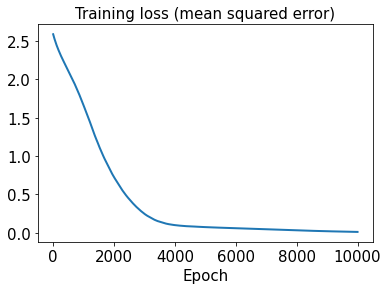

In [70]:
hist2 = history2.history
plt.plot(hist2['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

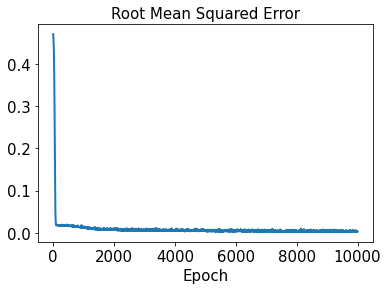

In [71]:
plt.plot(hist1['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [72]:
sd2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
            loss = tf.keras.losses.MeanSquaredError(),
            metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [73]:
start2 = datetime.datetime.now()
history2 = sd2.fit(x_train2, y_train2, epochs=10000, shuffle=True)
end2 = datetime.datetime.now()

Epoch 1/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.4996 - rmse: 1.5807
Epoch 2/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.4954 - rmse: 1.5794
Epoch 3/10000
2/2 [==============================] - 0s 15ms/step - loss: 2.4916 - rmse: 1.5782
Epoch 4/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.4882 - rmse: 1.5771
Epoch 5/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.4853 - rmse: 1.5762
Epoch 6/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.4827 - rmse: 1.5753
Epoch 7/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.4805 - rmse: 1.5746
Epoch 8/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.4785 - rmse: 1.5740
Epoch 9/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.4768 - rmse: 1.5735
Epoch 10/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.4753 - rmse: 1.5730
Epoch 11/10000
2/2 [======================

2/2 [==============================] - 0s 4ms/step - loss: 2.3568 - rmse: 1.5348
Epoch 87/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3515 - rmse: 1.5331
Epoch 88/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.3458 - rmse: 1.5312
Epoch 89/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3397 - rmse: 1.5292
Epoch 90/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3331 - rmse: 1.5270
Epoch 91/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3260 - rmse: 1.5247
Epoch 92/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3184 - rmse: 1.5222
Epoch 93/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3104 - rmse: 1.5196
Epoch 94/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3020 - rmse: 1.5168
Epoch 95/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.2932 - rmse: 1.5139
Epoch 96/10000
2/2 [==============================] - 0

2/2 [==============================] - 0s 4ms/step - loss: 0.6314 - rmse: 0.7923
Epoch 171/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.6064 - rmse: 0.7764
Epoch 172/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.5824 - rmse: 0.7607
Epoch 173/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.5589 - rmse: 0.7451
Epoch 174/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.5354 - rmse: 0.7291
Epoch 175/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.5129 - rmse: 0.7135
Epoch 176/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.4906 - rmse: 0.6977
Epoch 177/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4686 - rmse: 0.6817
Epoch 178/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4480 - rmse: 0.6664
Epoch 179/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4283 - rmse: 0.6514
Epoch 180/10000
2/2 [=========================

2/2 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1181
Epoch 255/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0187 - rmse: 0.1170
Epoch 256/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0184 - rmse: 0.1158
Epoch 257/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0182 - rmse: 0.1148
Epoch 258/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0179 - rmse: 0.1137
Epoch 259/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0177 - rmse: 0.1127
Epoch 260/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0174 - rmse: 0.1115
Epoch 261/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0172 - rmse: 0.1104
Epoch 262/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0170 - rmse: 0.1094
Epoch 263/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0168 - rmse: 0.1085
Epoch 264/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.0116 - rmse: 0.0811
Epoch 339/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0116 - rmse: 0.0809
Epoch 340/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0116 - rmse: 0.0808
Epoch 341/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0115 - rmse: 0.0808
Epoch 342/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0115 - rmse: 0.0807
Epoch 343/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0115 - rmse: 0.0806
Epoch 344/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0115 - rmse: 0.0805
Epoch 345/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0115 - rmse: 0.0805
Epoch 346/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0115 - rmse: 0.0805
Epoch 347/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0115 - rmse: 0.0804
Epoch 348/10000
2/2 [=========================

2/2 [==============================] - 0s 5ms/step - loss: 0.0112 - rmse: 0.0788
Epoch 423/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0112 - rmse: 0.0788
Epoch 424/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0112 - rmse: 0.0787
Epoch 425/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0112 - rmse: 0.0787
Epoch 426/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0112 - rmse: 0.0787
Epoch 427/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0112 - rmse: 0.0787
Epoch 428/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0112 - rmse: 0.0787
Epoch 429/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0112 - rmse: 0.0787
Epoch 430/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0112 - rmse: 0.0787
Epoch 431/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0112 - rmse: 0.0787
Epoch 432/10000
2/2 [=========================

2/2 [==============================] - 0s 5ms/step - loss: 0.0111 - rmse: 0.0783
Epoch 507/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0111 - rmse: 0.0783
Epoch 508/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0111 - rmse: 0.0783
Epoch 509/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0111 - rmse: 0.0783
Epoch 510/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0111 - rmse: 0.0783
Epoch 511/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0111 - rmse: 0.0783
Epoch 512/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0111 - rmse: 0.0784
Epoch 513/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0111 - rmse: 0.0784
Epoch 514/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0111 - rmse: 0.0783
Epoch 515/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0111 - rmse: 0.0783
Epoch 516/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.0111 - rmse: 0.0786
Epoch 591/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0111 - rmse: 0.0786
Epoch 592/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0111 - rmse: 0.0786
Epoch 593/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0111 - rmse: 0.0786
Epoch 594/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0111 - rmse: 0.0787
Epoch 595/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0111 - rmse: 0.0788
Epoch 596/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0111 - rmse: 0.0787
Epoch 597/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0111 - rmse: 0.0786
Epoch 598/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0111 - rmse: 0.0786
Epoch 599/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0111 - rmse: 0.0785
Epoch 600/10000
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 0.0110 - rmse: 0.0782
Epoch 675/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0110 - rmse: 0.0781
Epoch 676/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0110 - rmse: 0.0781
Epoch 677/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0110 - rmse: 0.0781
Epoch 678/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0110 - rmse: 0.0780
Epoch 679/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0110 - rmse: 0.0780
Epoch 680/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0110 - rmse: 0.0780
Epoch 681/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0110 - rmse: 0.0780
Epoch 682/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0110 - rmse: 0.0780
Epoch 683/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0110 - rmse: 0.0780
Epoch 684/10000
2/2 [=========================

2/2 [==============================] - 0s 5ms/step - loss: 0.0110 - rmse: 0.0784
Epoch 759/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0110 - rmse: 0.0784
Epoch 760/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0110 - rmse: 0.0785
Epoch 761/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0110 - rmse: 0.0784
Epoch 762/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0110 - rmse: 0.0782
Epoch 763/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0110 - rmse: 0.0782
Epoch 764/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0110 - rmse: 0.0782
Epoch 765/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0110 - rmse: 0.0783
Epoch 766/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0110 - rmse: 0.0782
Epoch 767/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0110 - rmse: 0.0781
Epoch 768/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.0109 - rmse: 0.0780
Epoch 843/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0109 - rmse: 0.0782
Epoch 844/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0110 - rmse: 0.0784
Epoch 845/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0110 - rmse: 0.0786
Epoch 846/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0110 - rmse: 0.0789
Epoch 847/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0111 - rmse: 0.0791
Epoch 848/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0111 - rmse: 0.0793
Epoch 849/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0111 - rmse: 0.0795
Epoch 850/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0111 - rmse: 0.0795
Epoch 851/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0111 - rmse: 0.0793
Epoch 852/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.0108 - rmse: 0.0777
Epoch 927/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0108 - rmse: 0.0777
Epoch 928/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0108 - rmse: 0.0777
Epoch 929/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0108 - rmse: 0.0777
Epoch 930/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0108 - rmse: 0.0776
Epoch 931/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0108 - rmse: 0.0776
Epoch 932/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0108 - rmse: 0.0776
Epoch 933/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0108 - rmse: 0.0776
Epoch 934/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0108 - rmse: 0.0775
Epoch 935/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0108 - rmse: 0.0775
Epoch 936/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.0107 - rmse: 0.0773
Epoch 1011/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0107 - rmse: 0.0773
Epoch 1012/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0107 - rmse: 0.0773
Epoch 1013/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0107 - rmse: 0.0773
Epoch 1014/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0107 - rmse: 0.0773
Epoch 1015/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0108 - rmse: 0.0774
Epoch 1016/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0108 - rmse: 0.0774
Epoch 1017/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0108 - rmse: 0.0774
Epoch 1018/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0108 - rmse: 0.0774
Epoch 1019/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0108 - rmse: 0.0775
Epoch 1020/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0107 - rmse: 0.0770
Epoch 1094/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0107 - rmse: 0.0770
Epoch 1095/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0107 - rmse: 0.0770
Epoch 1096/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0107 - rmse: 0.0771
Epoch 1097/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0107 - rmse: 0.0771
Epoch 1098/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0107 - rmse: 0.0771
Epoch 1099/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0107 - rmse: 0.0770
Epoch 1100/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0107 - rmse: 0.0770
Epoch 1101/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0106 - rmse: 0.0770
Epoch 1102/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0107 - rmse: 0.0770
Epoch 1103/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0106 - rmse: 0.0769
Epoch 1177/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0106 - rmse: 0.0768
Epoch 1178/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0106 - rmse: 0.0768
Epoch 1179/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0106 - rmse: 0.0768
Epoch 1180/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0106 - rmse: 0.0768
Epoch 1181/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0106 - rmse: 0.0768
Epoch 1182/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0106 - rmse: 0.0768
Epoch 1183/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0106 - rmse: 0.0768
Epoch 1184/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0106 - rmse: 0.0768
Epoch 1185/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0106 - rmse: 0.0768
Epoch 1186/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0105 - rmse: 0.0766
Epoch 1260/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0105 - rmse: 0.0766
Epoch 1261/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0105 - rmse: 0.0766
Epoch 1262/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0105 - rmse: 0.0765
Epoch 1263/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0105 - rmse: 0.0765
Epoch 1264/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0105 - rmse: 0.0766
Epoch 1265/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0106 - rmse: 0.0768
Epoch 1266/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0106 - rmse: 0.0768
Epoch 1267/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0106 - rmse: 0.0768
Epoch 1268/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0106 - rmse: 0.0768
Epoch 1269/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0105 - rmse: 0.0766
Epoch 1343/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0105 - rmse: 0.0766
Epoch 1344/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0105 - rmse: 0.0766
Epoch 1345/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0105 - rmse: 0.0765
Epoch 1346/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0105 - rmse: 0.0764
Epoch 1347/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0105 - rmse: 0.0764
Epoch 1348/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0105 - rmse: 0.0764
Epoch 1349/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0104 - rmse: 0.0763
Epoch 1350/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0104 - rmse: 0.0763
Epoch 1351/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0104 - rmse: 0.0763
Epoch 1352/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0104 - rmse: 0.0761
Epoch 1426/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0104 - rmse: 0.0762
Epoch 1427/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0104 - rmse: 0.0762
Epoch 1428/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0104 - rmse: 0.0761
Epoch 1429/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0104 - rmse: 0.0760
Epoch 1430/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0104 - rmse: 0.0760
Epoch 1431/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0104 - rmse: 0.0760
Epoch 1432/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0104 - rmse: 0.0760
Epoch 1433/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0104 - rmse: 0.0761
Epoch 1434/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0104 - rmse: 0.0762
Epoch 1435/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0103 - rmse: 0.0757
Epoch 1509/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0103 - rmse: 0.0757
Epoch 1510/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0103 - rmse: 0.0758
Epoch 1511/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0103 - rmse: 0.0759
Epoch 1512/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0103 - rmse: 0.0758
Epoch 1513/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0103 - rmse: 0.0758
Epoch 1514/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0103 - rmse: 0.0758
Epoch 1515/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0103 - rmse: 0.0758
Epoch 1516/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0103 - rmse: 0.0758
Epoch 1517/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0103 - rmse: 0.0758
Epoch 1518/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0103 - rmse: 0.0761
Epoch 1592/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0103 - rmse: 0.0762
Epoch 1593/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0103 - rmse: 0.0762
Epoch 1594/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0103 - rmse: 0.0761
Epoch 1595/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0103 - rmse: 0.0760
Epoch 1596/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0103 - rmse: 0.0759
Epoch 1597/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0103 - rmse: 0.0758
Epoch 1598/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0102 - rmse: 0.0757
Epoch 1599/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0102 - rmse: 0.0756
Epoch 1600/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0102 - rmse: 0.0755
Epoch 1601/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0101 - rmse: 0.0754
Epoch 1675/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0101 - rmse: 0.0754
Epoch 1676/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0101 - rmse: 0.0754
Epoch 1677/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0101 - rmse: 0.0754
Epoch 1678/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0101 - rmse: 0.0754
Epoch 1679/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0102 - rmse: 0.0754
Epoch 1680/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0102 - rmse: 0.0755
Epoch 1681/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0101 - rmse: 0.0754
Epoch 1682/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0101 - rmse: 0.0753
Epoch 1683/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0101 - rmse: 0.0752
Epoch 1684/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0101 - rmse: 0.0751
Epoch 1758/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0101 - rmse: 0.0750
Epoch 1759/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0100 - rmse: 0.0750
Epoch 1760/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0100 - rmse: 0.0749
Epoch 1761/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0100 - rmse: 0.0749
Epoch 1762/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0100 - rmse: 0.0748
Epoch 1763/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0100 - rmse: 0.0749
Epoch 1764/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0100 - rmse: 0.0750
Epoch 1765/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0101 - rmse: 0.0751
Epoch 1766/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0101 - rmse: 0.0752
Epoch 1767/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0100 - rmse: 0.0747
Epoch 1841/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0100 - rmse: 0.0746
Epoch 1842/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0099 - rmse: 0.0746
Epoch 1843/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0099 - rmse: 0.0745
Epoch 1844/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0099 - rmse: 0.0745
Epoch 1845/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0099 - rmse: 0.0745
Epoch 1846/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0099 - rmse: 0.0745
Epoch 1847/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0099 - rmse: 0.0746
Epoch 1848/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0099 - rmse: 0.0746
Epoch 1849/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0099 - rmse: 0.0746
Epoch 1850/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0099 - rmse: 0.0745
Epoch 1924/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0099 - rmse: 0.0744
Epoch 1925/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0099 - rmse: 0.0743
Epoch 1926/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0099 - rmse: 0.0743
Epoch 1927/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0099 - rmse: 0.0743
Epoch 1928/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0099 - rmse: 0.0744
Epoch 1929/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0099 - rmse: 0.0746
Epoch 1930/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0099 - rmse: 0.0746
Epoch 1931/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0099 - rmse: 0.0746
Epoch 1932/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0099 - rmse: 0.0747
Epoch 1933/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0099 - rmse: 0.0748
Epoch 2007/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0099 - rmse: 0.0750
Epoch 2008/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0100 - rmse: 0.0753
Epoch 2009/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0100 - rmse: 0.0755
Epoch 2010/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0100 - rmse: 0.0756
Epoch 2011/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0100 - rmse: 0.0757
Epoch 2012/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0100 - rmse: 0.0758
Epoch 2013/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0101 - rmse: 0.0759
Epoch 2014/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0100 - rmse: 0.0758
Epoch 2015/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0100 - rmse: 0.0757
Epoch 2016/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0097 - rmse: 0.0738
Epoch 2090/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0097 - rmse: 0.0738
Epoch 2091/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0097 - rmse: 0.0738
Epoch 2092/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0097 - rmse: 0.0737
Epoch 2093/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0097 - rmse: 0.0737
Epoch 2094/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0097 - rmse: 0.0736
Epoch 2095/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0097 - rmse: 0.0736
Epoch 2096/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0097 - rmse: 0.0736
Epoch 2097/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0097 - rmse: 0.0736
Epoch 2098/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0097 - rmse: 0.0737
Epoch 2099/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0096 - rmse: 0.0736
Epoch 2173/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0096 - rmse: 0.0735
Epoch 2174/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0096 - rmse: 0.0735
Epoch 2175/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0096 - rmse: 0.0734
Epoch 2176/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0096 - rmse: 0.0733
Epoch 2177/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0096 - rmse: 0.0733
Epoch 2178/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0096 - rmse: 0.0734
Epoch 2179/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0096 - rmse: 0.0737
Epoch 2180/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0097 - rmse: 0.0741
Epoch 2181/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0097 - rmse: 0.0742
Epoch 2182/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0096 - rmse: 0.0739
Epoch 2256/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0097 - rmse: 0.0741
Epoch 2257/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0097 - rmse: 0.0743
Epoch 2258/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0097 - rmse: 0.0744
Epoch 2259/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0097 - rmse: 0.0744
Epoch 2260/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0097 - rmse: 0.0745
Epoch 2261/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0097 - rmse: 0.0745
Epoch 2262/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0097 - rmse: 0.0743
Epoch 2263/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0097 - rmse: 0.0741
Epoch 2264/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0096 - rmse: 0.0738
Epoch 2265/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0095 - rmse: 0.0730
Epoch 2339/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0095 - rmse: 0.0730
Epoch 2340/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0095 - rmse: 0.0731
Epoch 2341/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0095 - rmse: 0.0731
Epoch 2342/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0095 - rmse: 0.0731
Epoch 2343/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0095 - rmse: 0.0733
Epoch 2344/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0095 - rmse: 0.0734
Epoch 2345/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0095 - rmse: 0.0735
Epoch 2346/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0095 - rmse: 0.0735
Epoch 2347/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0095 - rmse: 0.0734
Epoch 2348/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0093 - rmse: 0.0725
Epoch 2422/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0093 - rmse: 0.0724
Epoch 2423/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0093 - rmse: 0.0724
Epoch 2424/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0093 - rmse: 0.0724
Epoch 2425/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0093 - rmse: 0.0723
Epoch 2426/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0093 - rmse: 0.0723
Epoch 2427/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0093 - rmse: 0.0722
Epoch 2428/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0093 - rmse: 0.0722
Epoch 2429/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0093 - rmse: 0.0722
Epoch 2430/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0093 - rmse: 0.0722
Epoch 2431/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0093 - rmse: 0.0724
Epoch 2505/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0093 - rmse: 0.0726
Epoch 2506/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0093 - rmse: 0.0727
Epoch 2507/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0093 - rmse: 0.0728
Epoch 2508/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0094 - rmse: 0.0728
Epoch 2509/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0094 - rmse: 0.0729
Epoch 2510/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0094 - rmse: 0.0729
Epoch 2511/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0094 - rmse: 0.0729
Epoch 2512/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0094 - rmse: 0.0728
Epoch 2513/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0093 - rmse: 0.0728
Epoch 2514/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0092 - rmse: 0.0718
Epoch 2588/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0091 - rmse: 0.0717
Epoch 2589/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0091 - rmse: 0.0716
Epoch 2590/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0091 - rmse: 0.0715
Epoch 2591/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0091 - rmse: 0.0715
Epoch 2592/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0091 - rmse: 0.0714
Epoch 2593/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0091 - rmse: 0.0714
Epoch 2594/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0091 - rmse: 0.0714
Epoch 2595/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0091 - rmse: 0.0715
Epoch 2596/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0091 - rmse: 0.0715
Epoch 2597/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0091 - rmse: 0.0713
Epoch 2671/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0090 - rmse: 0.0712
Epoch 2672/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0090 - rmse: 0.0712
Epoch 2673/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0090 - rmse: 0.0713
Epoch 2674/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0091 - rmse: 0.0714
Epoch 2675/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0091 - rmse: 0.0714
Epoch 2676/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0090 - rmse: 0.0713
Epoch 2677/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0090 - rmse: 0.0712
Epoch 2678/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0091 - rmse: 0.0714
Epoch 2679/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0091 - rmse: 0.0716
Epoch 2680/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0090 - rmse: 0.0712
Epoch 2754/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0090 - rmse: 0.0711
Epoch 2755/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0090 - rmse: 0.0711
Epoch 2756/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0090 - rmse: 0.0710
Epoch 2757/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0090 - rmse: 0.0710
Epoch 2758/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0090 - rmse: 0.0709
Epoch 2759/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0089 - rmse: 0.0709
Epoch 2760/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0089 - rmse: 0.0708
Epoch 2761/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0089 - rmse: 0.0708
Epoch 2762/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0089 - rmse: 0.0708
Epoch 2763/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0089 - rmse: 0.0711
Epoch 2837/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0089 - rmse: 0.0708
Epoch 2838/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0089 - rmse: 0.0707
Epoch 2839/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0089 - rmse: 0.0707
Epoch 2840/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0089 - rmse: 0.0706
Epoch 2841/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0089 - rmse: 0.0706
Epoch 2842/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0089 - rmse: 0.0705
Epoch 2843/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0089 - rmse: 0.0705
Epoch 2844/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0089 - rmse: 0.0705
Epoch 2845/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0088 - rmse: 0.0704
Epoch 2846/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0087 - rmse: 0.0698
Epoch 2920/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0087 - rmse: 0.0697
Epoch 2921/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0087 - rmse: 0.0697
Epoch 2922/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0087 - rmse: 0.0697
Epoch 2923/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0087 - rmse: 0.0698
Epoch 2924/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0087 - rmse: 0.0697
Epoch 2925/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0087 - rmse: 0.0698
Epoch 2926/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0087 - rmse: 0.0699
Epoch 2927/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0087 - rmse: 0.0699
Epoch 2928/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0087 - rmse: 0.0698
Epoch 2929/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0086 - rmse: 0.0693
Epoch 3003/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0086 - rmse: 0.0693
Epoch 3004/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0086 - rmse: 0.0693
Epoch 3005/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0086 - rmse: 0.0693
Epoch 3006/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0086 - rmse: 0.0692
Epoch 3007/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0086 - rmse: 0.0693
Epoch 3008/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0086 - rmse: 0.0692
Epoch 3009/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0086 - rmse: 0.0692
Epoch 3010/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0086 - rmse: 0.0693
Epoch 3011/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0086 - rmse: 0.0694
Epoch 3012/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0086 - rmse: 0.0692
Epoch 3086/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0086 - rmse: 0.0691
Epoch 3087/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0086 - rmse: 0.0691
Epoch 3088/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0086 - rmse: 0.0690
Epoch 3089/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0085 - rmse: 0.0690
Epoch 3090/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0085 - rmse: 0.0690
Epoch 3091/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0085 - rmse: 0.0690
Epoch 3092/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0085 - rmse: 0.0688
Epoch 3093/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0085 - rmse: 0.0689
Epoch 3094/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0085 - rmse: 0.0689
Epoch 3095/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0086 - rmse: 0.0695
Epoch 3169/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0086 - rmse: 0.0697
Epoch 3170/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0086 - rmse: 0.0698
Epoch 3171/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0086 - rmse: 0.0698
Epoch 3172/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0086 - rmse: 0.0696
Epoch 3173/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0086 - rmse: 0.0694
Epoch 3174/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0086 - rmse: 0.0693
Epoch 3175/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0086 - rmse: 0.0695
Epoch 3176/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0086 - rmse: 0.0695
Epoch 3177/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0085 - rmse: 0.0693
Epoch 3178/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0083 - rmse: 0.0680
Epoch 3252/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0083 - rmse: 0.0680
Epoch 3253/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0083 - rmse: 0.0681
Epoch 3254/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0084 - rmse: 0.0681
Epoch 3255/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0084 - rmse: 0.0682
Epoch 3256/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0084 - rmse: 0.0682
Epoch 3257/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0084 - rmse: 0.0682
Epoch 3258/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0084 - rmse: 0.0682
Epoch 3259/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0083 - rmse: 0.0681
Epoch 3260/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0083 - rmse: 0.0680
Epoch 3261/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0084 - rmse: 0.0685
Epoch 3335/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0084 - rmse: 0.0684
Epoch 3336/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0084 - rmse: 0.0683
Epoch 3337/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0083 - rmse: 0.0682
Epoch 3338/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0083 - rmse: 0.0681
Epoch 3339/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0083 - rmse: 0.0678
Epoch 3340/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0083 - rmse: 0.0678
Epoch 3341/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0083 - rmse: 0.0677
Epoch 3342/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0083 - rmse: 0.0676
Epoch 3343/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0082 - rmse: 0.0675
Epoch 3344/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0081 - rmse: 0.0670
Epoch 3418/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0082 - rmse: 0.0671
Epoch 3419/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0081 - rmse: 0.0671
Epoch 3420/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0081 - rmse: 0.0670
Epoch 3421/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0081 - rmse: 0.0670
Epoch 3422/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0081 - rmse: 0.0670
Epoch 3423/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0082 - rmse: 0.0671
Epoch 3424/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0082 - rmse: 0.0671
Epoch 3425/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0081 - rmse: 0.0671
Epoch 3426/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0082 - rmse: 0.0671
Epoch 3427/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0081 - rmse: 0.0670
Epoch 3501/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0081 - rmse: 0.0671
Epoch 3502/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0082 - rmse: 0.0673
Epoch 3503/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0082 - rmse: 0.0676
Epoch 3504/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0082 - rmse: 0.0678
Epoch 3505/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0083 - rmse: 0.0680
Epoch 3506/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0083 - rmse: 0.0682
Epoch 3507/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0083 - rmse: 0.0684
Epoch 3508/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0083 - rmse: 0.0684
Epoch 3509/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0083 - rmse: 0.0684
Epoch 3510/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0080 - rmse: 0.0661
Epoch 3584/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0080 - rmse: 0.0661
Epoch 3585/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0080 - rmse: 0.0662
Epoch 3586/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0080 - rmse: 0.0662
Epoch 3587/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0080 - rmse: 0.0662
Epoch 3588/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0080 - rmse: 0.0663
Epoch 3589/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0080 - rmse: 0.0664
Epoch 3590/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0080 - rmse: 0.0664
Epoch 3591/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0080 - rmse: 0.0665
Epoch 3592/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0080 - rmse: 0.0665
Epoch 3593/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0080 - rmse: 0.0662
Epoch 3667/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0080 - rmse: 0.0663
Epoch 3668/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0080 - rmse: 0.0665
Epoch 3669/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0080 - rmse: 0.0664
Epoch 3670/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0079 - rmse: 0.0661
Epoch 3671/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0079 - rmse: 0.0659
Epoch 3672/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0079 - rmse: 0.0658
Epoch 3673/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0079 - rmse: 0.0657
Epoch 3674/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0079 - rmse: 0.0657
Epoch 3675/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0079 - rmse: 0.0656
Epoch 3676/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0078 - rmse: 0.0653
Epoch 3750/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0078 - rmse: 0.0653
Epoch 3751/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0078 - rmse: 0.0652
Epoch 3752/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0078 - rmse: 0.0651
Epoch 3753/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0078 - rmse: 0.0651
Epoch 3754/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0078 - rmse: 0.0652
Epoch 3755/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0078 - rmse: 0.0651
Epoch 3756/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0078 - rmse: 0.0651
Epoch 3757/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0078 - rmse: 0.0652
Epoch 3758/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0078 - rmse: 0.0651
Epoch 3759/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0077 - rmse: 0.0647
Epoch 3833/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0077 - rmse: 0.0647
Epoch 3834/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0077 - rmse: 0.0647
Epoch 3835/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0077 - rmse: 0.0647
Epoch 3836/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0077 - rmse: 0.0647
Epoch 3837/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0077 - rmse: 0.0647
Epoch 3838/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0077 - rmse: 0.0647
Epoch 3839/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0077 - rmse: 0.0646
Epoch 3840/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0077 - rmse: 0.0646
Epoch 3841/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0077 - rmse: 0.0646
Epoch 3842/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0077 - rmse: 0.0649
Epoch 3916/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0077 - rmse: 0.0646
Epoch 3917/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0077 - rmse: 0.0646
Epoch 3918/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0077 - rmse: 0.0645
Epoch 3919/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0076 - rmse: 0.0643
Epoch 3920/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0076 - rmse: 0.0643
Epoch 3921/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0076 - rmse: 0.0644
Epoch 3922/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0076 - rmse: 0.0644
Epoch 3923/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0076 - rmse: 0.0644
Epoch 3924/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0076 - rmse: 0.0643
Epoch 3925/10000
2/2 [=============

2/2 [==============================] - 0s 4ms/step - loss: 0.0076 - rmse: 0.0639
Epoch 3999/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0075 - rmse: 0.0638
Epoch 4000/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0076 - rmse: 0.0639
Epoch 4001/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0075 - rmse: 0.0639
Epoch 4002/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0075 - rmse: 0.0637
Epoch 4003/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0075 - rmse: 0.0637
Epoch 4004/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0075 - rmse: 0.0637
Epoch 4005/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0075 - rmse: 0.0636
Epoch 4006/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0075 - rmse: 0.0636
Epoch 4007/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0075 - rmse: 0.0637
Epoch 4008/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0075 - rmse: 0.0638
Epoch 4082/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0075 - rmse: 0.0637
Epoch 4083/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0075 - rmse: 0.0635
Epoch 4084/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0075 - rmse: 0.0633
Epoch 4085/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0075 - rmse: 0.0633
Epoch 4086/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0633
Epoch 4087/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0074 - rmse: 0.0632
Epoch 4088/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0632
Epoch 4089/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0074 - rmse: 0.0632
Epoch 4090/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0631
Epoch 4091/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0628
Epoch 4165/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0628
Epoch 4166/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0628
Epoch 4167/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0074 - rmse: 0.0628
Epoch 4168/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0074 - rmse: 0.0628
Epoch 4169/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0627
Epoch 4170/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0074 - rmse: 0.0629
Epoch 4171/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0074 - rmse: 0.0629
Epoch 4172/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0074 - rmse: 0.0627
Epoch 4173/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0629
Epoch 4174/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0074 - rmse: 0.0635
Epoch 4248/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0074 - rmse: 0.0636
Epoch 4249/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0636
Epoch 4250/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0636
Epoch 4251/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0074 - rmse: 0.0634
Epoch 4252/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0635
Epoch 4253/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0075 - rmse: 0.0637
Epoch 4254/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0075 - rmse: 0.0638
Epoch 4255/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0075 - rmse: 0.0637
Epoch 4256/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0074 - rmse: 0.0636
Epoch 4257/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0072 - rmse: 0.0616
Epoch 4331/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0072 - rmse: 0.0616
Epoch 4332/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0072 - rmse: 0.0617
Epoch 4333/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0072 - rmse: 0.0616
Epoch 4334/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0072 - rmse: 0.0617
Epoch 4335/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0072 - rmse: 0.0617
Epoch 4336/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0072 - rmse: 0.0617
Epoch 4337/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0072 - rmse: 0.0617
Epoch 4338/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0072 - rmse: 0.0616
Epoch 4339/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0072 - rmse: 0.0616
Epoch 4340/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0071 - rmse: 0.0611
Epoch 4414/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0071 - rmse: 0.0611
Epoch 4415/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0071 - rmse: 0.0612
Epoch 4416/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0071 - rmse: 0.0612
Epoch 4417/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0071 - rmse: 0.0612
Epoch 4418/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0071 - rmse: 0.0613
Epoch 4419/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0071 - rmse: 0.0613
Epoch 4420/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0071 - rmse: 0.0613
Epoch 4421/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0071 - rmse: 0.0613
Epoch 4422/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0071 - rmse: 0.0613
Epoch 4423/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0070 - rmse: 0.0607
Epoch 4497/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0070 - rmse: 0.0605
Epoch 4498/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0070 - rmse: 0.0605
Epoch 4499/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0070 - rmse: 0.0605
Epoch 4500/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0070 - rmse: 0.0605
Epoch 4501/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0070 - rmse: 0.0606
Epoch 4502/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0070 - rmse: 0.0606
Epoch 4503/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0070 - rmse: 0.0605
Epoch 4504/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0070 - rmse: 0.0606
Epoch 4505/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0070 - rmse: 0.0605
Epoch 4506/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0069 - rmse: 0.0602
Epoch 4580/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0069 - rmse: 0.0601
Epoch 4581/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0070 - rmse: 0.0604
Epoch 4582/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0069 - rmse: 0.0600
Epoch 4583/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0069 - rmse: 0.0599
Epoch 4584/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0069 - rmse: 0.0600
Epoch 4585/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0069 - rmse: 0.0599
Epoch 4586/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0069 - rmse: 0.0599
Epoch 4587/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0069 - rmse: 0.0599
Epoch 4588/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0069 - rmse: 0.0599
Epoch 4589/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0069 - rmse: 0.0603
Epoch 4663/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0069 - rmse: 0.0601
Epoch 4664/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0069 - rmse: 0.0599
Epoch 4665/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0069 - rmse: 0.0598
Epoch 4666/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0069 - rmse: 0.0596
Epoch 4667/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0069 - rmse: 0.0596
Epoch 4668/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0069 - rmse: 0.0596
Epoch 4669/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0069 - rmse: 0.0596
Epoch 4670/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0069 - rmse: 0.0596
Epoch 4671/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0069 - rmse: 0.0596
Epoch 4672/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0068 - rmse: 0.0594
Epoch 4746/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0068 - rmse: 0.0593
Epoch 4747/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0068 - rmse: 0.0593
Epoch 4748/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0068 - rmse: 0.0593
Epoch 4749/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0068 - rmse: 0.0591
Epoch 4750/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0068 - rmse: 0.0592
Epoch 4751/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0068 - rmse: 0.0591
Epoch 4752/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0068 - rmse: 0.0590
Epoch 4753/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0068 - rmse: 0.0593
Epoch 4754/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0068 - rmse: 0.0593
Epoch 4755/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0067 - rmse: 0.0586
Epoch 4829/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0067 - rmse: 0.0585
Epoch 4830/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0067 - rmse: 0.0584
Epoch 4831/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0067 - rmse: 0.0584
Epoch 4832/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0067 - rmse: 0.0584
Epoch 4833/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0067 - rmse: 0.0583
Epoch 4834/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0067 - rmse: 0.0585
Epoch 4835/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0067 - rmse: 0.0585
Epoch 4836/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0067 - rmse: 0.0583
Epoch 4837/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0067 - rmse: 0.0584
Epoch 4838/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0067 - rmse: 0.0588
Epoch 4912/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0067 - rmse: 0.0588
Epoch 4913/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0067 - rmse: 0.0588
Epoch 4914/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0067 - rmse: 0.0586
Epoch 4915/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0067 - rmse: 0.0585
Epoch 4916/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0067 - rmse: 0.0584
Epoch 4917/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0067 - rmse: 0.0584
Epoch 4918/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0067 - rmse: 0.0584
Epoch 4919/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0067 - rmse: 0.0585
Epoch 4920/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0067 - rmse: 0.0586
Epoch 4921/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0065 - rmse: 0.0575
Epoch 4995/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0065 - rmse: 0.0574
Epoch 4996/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0066 - rmse: 0.0576
Epoch 4997/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0065 - rmse: 0.0575
Epoch 4998/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0065 - rmse: 0.0574
Epoch 4999/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0065 - rmse: 0.0575
Epoch 5000/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0065 - rmse: 0.0574
Epoch 5001/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0065 - rmse: 0.0575
Epoch 5002/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0066 - rmse: 0.0578
Epoch 5003/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0577
Epoch 5004/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0065 - rmse: 0.0569
Epoch 5078/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0065 - rmse: 0.0570
Epoch 5079/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0065 - rmse: 0.0571
Epoch 5080/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0065 - rmse: 0.0569
Epoch 5081/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0065 - rmse: 0.0569
Epoch 5082/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0570
Epoch 5083/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0065 - rmse: 0.0568
Epoch 5084/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0065 - rmse: 0.0568
Epoch 5085/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0065 - rmse: 0.0568
Epoch 5086/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0064 - rmse: 0.0568
Epoch 5087/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0064 - rmse: 0.0564
Epoch 5161/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0064 - rmse: 0.0564
Epoch 5162/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0064 - rmse: 0.0564
Epoch 5163/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0064 - rmse: 0.0565
Epoch 5164/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0064 - rmse: 0.0567
Epoch 5165/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0064 - rmse: 0.0564
Epoch 5166/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0064 - rmse: 0.0564
Epoch 5167/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0064 - rmse: 0.0565
Epoch 5168/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0064 - rmse: 0.0564
Epoch 5169/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0064 - rmse: 0.0563
Epoch 5170/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0560
Epoch 5244/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0560
Epoch 5245/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0561
Epoch 5246/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0559
Epoch 5247/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0559
Epoch 5248/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0063 - rmse: 0.0561
Epoch 5249/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0558
Epoch 5250/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0560
Epoch 5251/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0064 - rmse: 0.0563
Epoch 5252/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0559
Epoch 5253/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0063 - rmse: 0.0555
Epoch 5327/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0556
Epoch 5328/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0063 - rmse: 0.0556
Epoch 5329/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0063 - rmse: 0.0557
Epoch 5330/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0063 - rmse: 0.0558
Epoch 5331/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0063 - rmse: 0.0558
Epoch 5332/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0559
Epoch 5333/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0560
Epoch 5334/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0063 - rmse: 0.0557
Epoch 5335/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0556
Epoch 5336/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0062 - rmse: 0.0550
Epoch 5410/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0062 - rmse: 0.0550
Epoch 5411/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0062 - rmse: 0.0552
Epoch 5412/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0062 - rmse: 0.0551
Epoch 5413/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0062 - rmse: 0.0551
Epoch 5414/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0062 - rmse: 0.0551
Epoch 5415/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0062 - rmse: 0.0550
Epoch 5416/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0062 - rmse: 0.0551
Epoch 5417/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0062 - rmse: 0.0549
Epoch 5418/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0062 - rmse: 0.0549
Epoch 5419/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0543
Epoch 5493/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0061 - rmse: 0.0544
Epoch 5494/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0545
Epoch 5495/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0061 - rmse: 0.0547
Epoch 5496/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0061 - rmse: 0.0546
Epoch 5497/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0547
Epoch 5498/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0546
Epoch 5499/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0061 - rmse: 0.0545
Epoch 5500/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0544
Epoch 5501/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0061 - rmse: 0.0543
Epoch 5502/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0539
Epoch 5576/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0060 - rmse: 0.0540
Epoch 5577/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0061 - rmse: 0.0543
Epoch 5578/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0061 - rmse: 0.0544
Epoch 5579/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0061 - rmse: 0.0544
Epoch 5580/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0061 - rmse: 0.0545
Epoch 5581/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0061 - rmse: 0.0545
Epoch 5582/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0544
Epoch 5583/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0543
Epoch 5584/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0061 - rmse: 0.0542
Epoch 5585/10000
2/2 [===============

2/2 [==============================] - 0s 14ms/step - loss: 0.0060 - rmse: 0.0535
Epoch 5659/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0060 - rmse: 0.0535
Epoch 5660/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0060 - rmse: 0.0537
Epoch 5661/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0060 - rmse: 0.0534
Epoch 5662/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0059 - rmse: 0.0534
Epoch 5663/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0060 - rmse: 0.0536
Epoch 5664/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0059 - rmse: 0.0534
Epoch 5665/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0059 - rmse: 0.0532
Epoch 5666/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0059 - rmse: 0.0533
Epoch 5667/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0059 - rmse: 0.0533
Epoch 5668/10000
2/2 [=============

2/2 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0533
Epoch 5742/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0533
Epoch 5743/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0532
Epoch 5744/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0531
Epoch 5745/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0059 - rmse: 0.0529
Epoch 5746/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0059 - rmse: 0.0529
Epoch 5747/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0059 - rmse: 0.0528
Epoch 5748/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0527
Epoch 5749/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0059 - rmse: 0.0527
Epoch 5750/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0527
Epoch 5751/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0058 - rmse: 0.0524
Epoch 5825/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0059 - rmse: 0.0527
Epoch 5826/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0528
Epoch 5827/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0058 - rmse: 0.0523
Epoch 5828/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0058 - rmse: 0.0525
Epoch 5829/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0058 - rmse: 0.0524
Epoch 5830/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0058 - rmse: 0.0523
Epoch 5831/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0058 - rmse: 0.0527
Epoch 5832/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0058 - rmse: 0.0525
Epoch 5833/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0058 - rmse: 0.0524
Epoch 5834/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0517
Epoch 5908/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0518
Epoch 5909/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0519
Epoch 5910/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0057 - rmse: 0.0518
Epoch 5911/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0057 - rmse: 0.0518
Epoch 5912/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0519
Epoch 5913/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0057 - rmse: 0.0517
Epoch 5914/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0519
Epoch 5915/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0519
Epoch 5916/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0057 - rmse: 0.0517
Epoch 5917/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0057 - rmse: 0.0513
Epoch 5991/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0057 - rmse: 0.0513
Epoch 5992/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0057 - rmse: 0.0513
Epoch 5993/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0057 - rmse: 0.0513
Epoch 5994/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0513
Epoch 5995/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0513
Epoch 5996/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0057 - rmse: 0.0513
Epoch 5997/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0512
Epoch 5998/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0512
Epoch 5999/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0057 - rmse: 0.0512
Epoch 6000/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0509
Epoch 6074/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0056 - rmse: 0.0509
Epoch 6075/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0056 - rmse: 0.0508
Epoch 6076/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0056 - rmse: 0.0509
Epoch 6077/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0508
Epoch 6078/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0509
Epoch 6079/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0056 - rmse: 0.0509
Epoch 6080/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0508
Epoch 6081/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0508
Epoch 6082/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0508
Epoch 6083/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0056 - rmse: 0.0507
Epoch 6157/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0056 - rmse: 0.0506
Epoch 6158/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0505
Epoch 6159/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0505
Epoch 6160/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0056 - rmse: 0.0505
Epoch 6161/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0056 - rmse: 0.0504
Epoch 6162/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0056 - rmse: 0.0504
Epoch 6163/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0056 - rmse: 0.0505
Epoch 6164/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0055 - rmse: 0.0503
Epoch 6165/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0055 - rmse: 0.0502
Epoch 6166/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0055 - rmse: 0.0505
Epoch 6240/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0055 - rmse: 0.0503
Epoch 6241/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0055 - rmse: 0.0502
Epoch 6242/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0055 - rmse: 0.0500
Epoch 6243/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0055 - rmse: 0.0499
Epoch 6244/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0055 - rmse: 0.0498
Epoch 6245/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0055 - rmse: 0.0497
Epoch 6246/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0055 - rmse: 0.0497
Epoch 6247/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0055 - rmse: 0.0499
Epoch 6248/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0055 - rmse: 0.0501
Epoch 6249/10000
2/2 [==============

2/2 [==============================] - 0s 4ms/step - loss: 0.0054 - rmse: 0.0493
Epoch 6323/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0054 - rmse: 0.0495
Epoch 6324/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0055 - rmse: 0.0496
Epoch 6325/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0054 - rmse: 0.0495
Epoch 6326/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0054 - rmse: 0.0496
Epoch 6327/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0055 - rmse: 0.0497
Epoch 6328/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0055 - rmse: 0.0500
Epoch 6329/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0055 - rmse: 0.0503
Epoch 6330/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0055 - rmse: 0.0503
Epoch 6331/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0055 - rmse: 0.0505
Epoch 6332/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0054 - rmse: 0.0492
Epoch 6406/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0054 - rmse: 0.0492
Epoch 6407/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0054 - rmse: 0.0492
Epoch 6408/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0054 - rmse: 0.0493
Epoch 6409/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0054 - rmse: 0.0490
Epoch 6410/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0054 - rmse: 0.0489
Epoch 6411/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0054 - rmse: 0.0489
Epoch 6412/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0054 - rmse: 0.0490
Epoch 6413/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0054 - rmse: 0.0490
Epoch 6414/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0054 - rmse: 0.0490
Epoch 6415/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0053 - rmse: 0.0485
Epoch 6489/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0053 - rmse: 0.0484
Epoch 6490/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0053 - rmse: 0.0484
Epoch 6491/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0053 - rmse: 0.0484
Epoch 6492/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0053 - rmse: 0.0483
Epoch 6493/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0053 - rmse: 0.0483
Epoch 6494/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0053 - rmse: 0.0484
Epoch 6495/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0053 - rmse: 0.0484
Epoch 6496/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0053 - rmse: 0.0482
Epoch 6497/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0053 - rmse: 0.0483
Epoch 6498/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0477
Epoch 6572/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0477
Epoch 6573/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0477
Epoch 6574/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0052 - rmse: 0.0478
Epoch 6575/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0478
Epoch 6576/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0478
Epoch 6577/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0052 - rmse: 0.0478
Epoch 6578/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0479
Epoch 6579/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0478
Epoch 6580/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0478
Epoch 6581/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0052 - rmse: 0.0479
Epoch 6655/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0481
Epoch 6656/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0481
Epoch 6657/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0482
Epoch 6658/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0483
Epoch 6659/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0052 - rmse: 0.0483
Epoch 6660/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0052 - rmse: 0.0483
Epoch 6661/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0482
Epoch 6662/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0052 - rmse: 0.0480
Epoch 6663/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0479
Epoch 6664/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0051 - rmse: 0.0468
Epoch 6738/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0471
Epoch 6739/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0472
Epoch 6740/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0051 - rmse: 0.0469
Epoch 6741/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0051 - rmse: 0.0469
Epoch 6742/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0051 - rmse: 0.0471
Epoch 6743/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0051 - rmse: 0.0468
Epoch 6744/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0469
Epoch 6745/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0471
Epoch 6746/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0467
Epoch 6747/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0051 - rmse: 0.0468
Epoch 6821/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0468
Epoch 6822/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0469
Epoch 6823/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0051 - rmse: 0.0469
Epoch 6824/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0468
Epoch 6825/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0467
Epoch 6826/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0465
Epoch 6827/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0465
Epoch 6828/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0464
Epoch 6829/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0463
Epoch 6830/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0050 - rmse: 0.0459
Epoch 6904/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0463
Epoch 6905/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0463
Epoch 6906/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0050 - rmse: 0.0459
Epoch 6907/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0461
Epoch 6908/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0050 - rmse: 0.0460
Epoch 6909/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0461
Epoch 6910/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0466
Epoch 6911/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0466
Epoch 6912/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0464
Epoch 6913/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0456
Epoch 6987/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0049 - rmse: 0.0454
Epoch 6988/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0453
Epoch 6989/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0049 - rmse: 0.0453
Epoch 6990/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0453
Epoch 6991/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0454
Epoch 6992/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0453
Epoch 6993/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0453
Epoch 6994/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0049 - rmse: 0.0453
Epoch 6995/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0452
Epoch 6996/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0451
Epoch 7070/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0049 - rmse: 0.0450
Epoch 7071/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0448
Epoch 7072/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0049 - rmse: 0.0448
Epoch 7073/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0049 - rmse: 0.0448
Epoch 7074/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0048 - rmse: 0.0448
Epoch 7075/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0049 - rmse: 0.0448
Epoch 7076/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0449
Epoch 7077/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0449
Epoch 7078/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0049 - rmse: 0.0449
Epoch 7079/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0444
Epoch 7153/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0048 - rmse: 0.0447
Epoch 7154/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0048 - rmse: 0.0444
Epoch 7155/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0444
Epoch 7156/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0048 - rmse: 0.0445
Epoch 7157/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0048 - rmse: 0.0443
Epoch 7158/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0443
Epoch 7159/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0444
Epoch 7160/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0446
Epoch 7161/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0447
Epoch 7162/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0048 - rmse: 0.0445
Epoch 7236/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0443
Epoch 7237/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0445
Epoch 7238/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0048 - rmse: 0.0447
Epoch 7239/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0444
Epoch 7240/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0443
Epoch 7241/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0048 - rmse: 0.0445
Epoch 7242/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0441
Epoch 7243/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0441
Epoch 7244/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0447
Epoch 7245/10000
2/2 [===============

2/2 [==============================] - 0s 10ms/step - loss: 0.0047 - rmse: 0.0435
Epoch 7319/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0047 - rmse: 0.0434
Epoch 7320/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0047 - rmse: 0.0434
Epoch 7321/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0047 - rmse: 0.0434
Epoch 7322/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0047 - rmse: 0.0433
Epoch 7323/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0047 - rmse: 0.0434
Epoch 7324/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0435
Epoch 7325/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0047 - rmse: 0.0433
Epoch 7326/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0434
Epoch 7327/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0434
Epoch 7328/10000
2/2 [==============

2/2 [==============================] - 0s 3ms/step - loss: 0.0047 - rmse: 0.0432
Epoch 7402/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0432
Epoch 7403/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0433
Epoch 7404/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0432
Epoch 7405/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0431
Epoch 7406/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0434
Epoch 7407/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0433
Epoch 7408/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0047 - rmse: 0.0433
Epoch 7409/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0047 - rmse: 0.0434
Epoch 7410/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0434
Epoch 7411/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0426
Epoch 7485/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0425
Epoch 7486/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0425
Epoch 7487/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0046 - rmse: 0.0425
Epoch 7488/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0046 - rmse: 0.0424
Epoch 7489/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0424
Epoch 7490/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0424
Epoch 7491/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0423
Epoch 7492/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0423
Epoch 7493/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0423
Epoch 7494/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0420
Epoch 7568/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0419
Epoch 7569/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0045 - rmse: 0.0419
Epoch 7570/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0045 - rmse: 0.0419
Epoch 7571/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0045 - rmse: 0.0419
Epoch 7572/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0045 - rmse: 0.0418
Epoch 7573/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0045 - rmse: 0.0418
Epoch 7574/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0418
Epoch 7575/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0419
Epoch 7576/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0045 - rmse: 0.0418
Epoch 7577/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0415
Epoch 7651/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0416
Epoch 7652/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0045 - rmse: 0.0415
Epoch 7653/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0414
Epoch 7654/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0045 - rmse: 0.0413
Epoch 7655/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0045 - rmse: 0.0413
Epoch 7656/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0045 - rmse: 0.0414
Epoch 7657/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0045 - rmse: 0.0414
Epoch 7658/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0414
Epoch 7659/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0414
Epoch 7660/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0044 - rmse: 0.0410
Epoch 7734/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0044 - rmse: 0.0409
Epoch 7735/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0044 - rmse: 0.0409
Epoch 7736/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0044 - rmse: 0.0410
Epoch 7737/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0044 - rmse: 0.0411
Epoch 7738/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0044 - rmse: 0.0411
Epoch 7739/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0412
Epoch 7740/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0045 - rmse: 0.0414
Epoch 7741/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0412
Epoch 7742/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0411
Epoch 7743/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0044 - rmse: 0.0409
Epoch 7817/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0044 - rmse: 0.0407
Epoch 7818/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0044 - rmse: 0.0406
Epoch 7819/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0044 - rmse: 0.0410
Epoch 7820/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0044 - rmse: 0.0404
Epoch 7821/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0044 - rmse: 0.0404
Epoch 7822/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0044 - rmse: 0.0403
Epoch 7823/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0044 - rmse: 0.0404
Epoch 7824/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0044 - rmse: 0.0404
Epoch 7825/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0044 - rmse: 0.0404
Epoch 7826/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0043 - rmse: 0.0399
Epoch 7900/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0401
Epoch 7901/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0399
Epoch 7902/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0399
Epoch 7903/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0403
Epoch 7904/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0402
Epoch 7905/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0043 - rmse: 0.0399
Epoch 7906/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0404
Epoch 7907/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0400
Epoch 7908/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0401
Epoch 7909/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0394
Epoch 7983/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0394
Epoch 7984/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0394
Epoch 7985/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0395
Epoch 7986/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0396
Epoch 7987/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0043 - rmse: 0.0395
Epoch 7988/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0043 - rmse: 0.0394
Epoch 7989/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0043 - rmse: 0.0394
Epoch 7990/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0395
Epoch 7991/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0395
Epoch 7992/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0392
Epoch 8066/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0042 - rmse: 0.0389
Epoch 8067/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0393
Epoch 8068/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0042 - rmse: 0.0391
Epoch 8069/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0390
Epoch 8070/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0043 - rmse: 0.0394
Epoch 8071/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0042 - rmse: 0.0390
Epoch 8072/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0392
Epoch 8073/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0397
Epoch 8074/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0392
Epoch 8075/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0385
Epoch 8149/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0389
Epoch 8150/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0042 - rmse: 0.0386
Epoch 8151/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0042 - rmse: 0.0385
Epoch 8152/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0386
Epoch 8153/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0385
Epoch 8154/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0042 - rmse: 0.0384
Epoch 8155/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0385
Epoch 8156/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0042 - rmse: 0.0385
Epoch 8157/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0384
Epoch 8158/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0041 - rmse: 0.0381
Epoch 8232/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0041 - rmse: 0.0380
Epoch 8233/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0380
Epoch 8234/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0380
Epoch 8235/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0041 - rmse: 0.0380
Epoch 8236/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0041 - rmse: 0.0383
Epoch 8237/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0041 - rmse: 0.0382
Epoch 8238/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0041 - rmse: 0.0381
Epoch 8239/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0041 - rmse: 0.0384
Epoch 8240/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0041 - rmse: 0.0381
Epoch 8241/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0041 - rmse: 0.0376
Epoch 8315/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0377
Epoch 8316/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0041 - rmse: 0.0377
Epoch 8317/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0378
Epoch 8318/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0377
Epoch 8319/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0041 - rmse: 0.0378
Epoch 8320/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0378
Epoch 8321/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0377
Epoch 8322/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0041 - rmse: 0.0380
Epoch 8323/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0380
Epoch 8324/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0041 - rmse: 0.0378
Epoch 8398/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0374
Epoch 8399/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0373
Epoch 8400/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0378
Epoch 8401/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0373
Epoch 8402/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0041 - rmse: 0.0378
Epoch 8403/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0377
Epoch 8404/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0374
Epoch 8405/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0041 - rmse: 0.0382
Epoch 8406/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0378
Epoch 8407/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0370
Epoch 8481/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0040 - rmse: 0.0370
Epoch 8482/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0366
Epoch 8483/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0367
Epoch 8484/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0040 - rmse: 0.0366
Epoch 8485/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0366
Epoch 8486/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0366
Epoch 8487/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0365
Epoch 8488/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0366
Epoch 8489/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0367
Epoch 8490/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0369
Epoch 8564/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0363
Epoch 8565/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0039 - rmse: 0.0363
Epoch 8566/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0039 - rmse: 0.0363
Epoch 8567/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0362
Epoch 8568/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0039 - rmse: 0.0363
Epoch 8569/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0362
Epoch 8570/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0362
Epoch 8571/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0362
Epoch 8572/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0361
Epoch 8573/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0358
Epoch 8647/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0039 - rmse: 0.0357
Epoch 8648/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0039 - rmse: 0.0357
Epoch 8649/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0357
Epoch 8650/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0356
Epoch 8651/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0039 - rmse: 0.0357
Epoch 8652/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0039 - rmse: 0.0358
Epoch 8653/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0357
Epoch 8654/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0039 - rmse: 0.0356
Epoch 8655/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0356
Epoch 8656/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0353
Epoch 8730/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0354
Epoch 8731/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0355
Epoch 8732/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0353
Epoch 8733/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0352
Epoch 8734/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0353
Epoch 8735/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0352
Epoch 8736/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0352
Epoch 8737/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0038 - rmse: 0.0353
Epoch 8738/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0352
Epoch 8739/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0348
Epoch 8813/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0347
Epoch 8814/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0347
Epoch 8815/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0347
Epoch 8816/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0348
Epoch 8817/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0348
Epoch 8818/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0348
Epoch 8819/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0038 - rmse: 0.0349
Epoch 8820/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0350
Epoch 8821/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0348
Epoch 8822/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0038 - rmse: 0.0345
Epoch 8896/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0038 - rmse: 0.0345
Epoch 8897/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0038 - rmse: 0.0344
Epoch 8898/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0038 - rmse: 0.0344
Epoch 8899/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0038 - rmse: 0.0344
Epoch 8900/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0038 - rmse: 0.0344
Epoch 8901/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0038 - rmse: 0.0344
Epoch 8902/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0038 - rmse: 0.0343
Epoch 8903/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0037 - rmse: 0.0343
Epoch 8904/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0343
Epoch 8905/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0346
Epoch 8979/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0346
Epoch 8980/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0344
Epoch 8981/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0343
Epoch 8982/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0037 - rmse: 0.0344
Epoch 8983/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0345
Epoch 8984/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0341
Epoch 8985/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0344
Epoch 8986/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0342
Epoch 8987/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0340
Epoch 8988/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0337
Epoch 9062/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0336
Epoch 9063/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0336
Epoch 9064/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0037 - rmse: 0.0335
Epoch 9065/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0335
Epoch 9066/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0334
Epoch 9067/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0335
Epoch 9068/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0334
Epoch 9069/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0337
Epoch 9070/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0037 - rmse: 0.0335
Epoch 9071/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0331
Epoch 9145/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0331
Epoch 9146/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0330
Epoch 9147/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0330
Epoch 9148/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0329
Epoch 9149/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0330
Epoch 9150/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0331
Epoch 9151/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0330
Epoch 9152/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0329
Epoch 9153/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0331
Epoch 9154/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0327
Epoch 9228/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0327
Epoch 9229/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0328
Epoch 9230/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0327
Epoch 9231/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0036 - rmse: 0.0329
Epoch 9232/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0327
Epoch 9233/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0327
Epoch 9234/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0326
Epoch 9235/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0326
Epoch 9236/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0326
Epoch 9237/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0326
Epoch 9311/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0321
Epoch 9312/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0324
Epoch 9313/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0324
Epoch 9314/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0035 - rmse: 0.0321
Epoch 9315/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0323
Epoch 9316/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0321
Epoch 9317/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0035 - rmse: 0.0320
Epoch 9318/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0320
Epoch 9319/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0320
Epoch 9320/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0035 - rmse: 0.0316
Epoch 9394/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0035 - rmse: 0.0315
Epoch 9395/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0035 - rmse: 0.0316
Epoch 9396/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0319
Epoch 9397/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0317
Epoch 9398/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0035 - rmse: 0.0315
Epoch 9399/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0316
Epoch 9400/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0035 - rmse: 0.0315
Epoch 9401/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0318
Epoch 9402/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0320
Epoch 9403/10000
2/2 [============

2/2 [==============================] - 0s 3ms/step - loss: 0.0035 - rmse: 0.0314
Epoch 9477/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0311
Epoch 9478/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0314
Epoch 9479/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0314
Epoch 9480/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0310
Epoch 9481/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0311
Epoch 9482/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0310
Epoch 9483/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0312
Epoch 9484/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0314
Epoch 9485/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0311
Epoch 9486/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0034 - rmse: 0.0307
Epoch 9560/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0307
Epoch 9561/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0306
Epoch 9562/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0306
Epoch 9563/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0034 - rmse: 0.0306
Epoch 9564/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0306
Epoch 9565/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0307
Epoch 9566/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0306
Epoch 9567/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0305
Epoch 9568/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0306
Epoch 9569/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0034 - rmse: 0.0301
Epoch 9643/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0301
Epoch 9644/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0301
Epoch 9645/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0034 - rmse: 0.0302
Epoch 9646/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0034 - rmse: 0.0302
Epoch 9647/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0300
Epoch 9648/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0300
Epoch 9649/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0300
Epoch 9650/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0034 - rmse: 0.0301
Epoch 9651/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0034 - rmse: 0.0302
Epoch 9652/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0297
Epoch 9726/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0033 - rmse: 0.0298
Epoch 9727/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0300
Epoch 9728/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0300
Epoch 9729/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0301
Epoch 9730/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0301
Epoch 9731/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0034 - rmse: 0.0302
Epoch 9732/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0302
Epoch 9733/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0034 - rmse: 0.0301
Epoch 9734/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0034 - rmse: 0.0300
Epoch 9735/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0296
Epoch 9809/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0298
Epoch 9810/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0293
Epoch 9811/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0295
Epoch 9812/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0294
Epoch 9813/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0297
Epoch 9814/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0301
Epoch 9815/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0296
Epoch 9816/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0301
Epoch 9817/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0298
Epoch 9818/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0287
Epoch 9892/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0033 - rmse: 0.0287
Epoch 9893/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0287
Epoch 9894/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0033 - rmse: 0.0287
Epoch 9895/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0033 - rmse: 0.0287
Epoch 9896/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0288
Epoch 9897/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0287
Epoch 9898/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0288
Epoch 9899/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0288
Epoch 9900/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0286
Epoch 9901/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0283
Epoch 9975/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0283
Epoch 9976/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0283
Epoch 9977/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0283
Epoch 9978/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0032 - rmse: 0.0282
Epoch 9979/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0283
Epoch 9980/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0283
Epoch 9981/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0032 - rmse: 0.0282
Epoch 9982/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0282
Epoch 9983/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0032 - rmse: 0.0282
Epoch 9984/10000
2/2 [===============

In [74]:
time2 = end2 - start2
print("Training time (Case 2):", time2)

Training time (Case 2): 0:01:44.925067


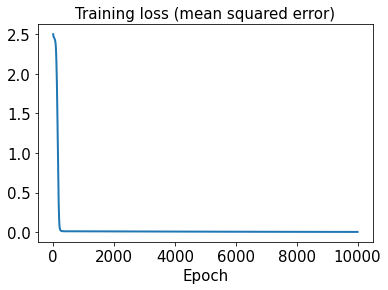

In [75]:
hist2 = history2.history
plt.plot(hist2['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

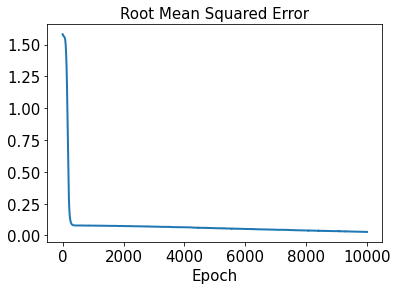

In [76]:
plt.plot(hist2['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [77]:
test_results2 = sd2.evaluate(x_test2)

1/1 [==============================] - 0s 62ms/step - loss: 0.0024 - rmse: 0.0000e+00


In [78]:
decoded_sensor_train2 = sensor_pred2.predict(t_train)

In [79]:
decoded_sensor_test2 = sensor_pred2.predict(t_test)

In [80]:
decoded_train2 = sd2.predict(decoded_sensor_train2)

In [81]:
decoded_test2 = sd2.predict(decoded_sensor_test2)

In [82]:
error_train_abs2 = np.abs(decoded_train2 - y_train2)

In [83]:
error_test_abs2 = np.abs(decoded_test2 - y_test2)

In [84]:
l2_error_sensor_train2 = np.sqrt(np.sum((decoded_sensor_train2 - x_train2)**2) / np.sum(x_train2**2))
print(l2_error_sensor_train2)

0.0679260017091961


In [85]:
l2_error_sensor_test2 = np.sqrt(np.sum((decoded_sensor_test2 - x_test2)**2) / np.sum(x_test2**2))
print(l2_error_sensor_test2)

0.06997297084105307


In [86]:
l2_error_train2 = np.sqrt(np.sum((decoded_train2 - y_train2)**2) / np.sum(y_train2**2))
print(l2_error_train2)

0.06514525603972408


In [87]:
l2_error_test2 = np.sqrt(np.sum((decoded_test2 - y_test2)**2) / np.sum(y_test2**2))
print(l2_error_test2)

0.06660976168428696


In [88]:
l2_error_train_list2 = []
for i in range(0, len(x_train2)):
    l2_error_train_data2 = np.sqrt(np.sum((decoded_train2[i] - y_train2[i])**2) / np.sum(y_train2[i]**2))
    l2_error_train_list2.append(l2_error_train_data2)
print(l2_error_train_list2)

[0.03727042163671486, 0.10965262764634938, 0.02353821848203274, 0.05997190032767375, 0.025841955042538584, 0.08346013177058315, 0.03881080257320188, 0.04992021005032974, 0.032219272822436355, 0.06160460378907171, 0.057810418906816895, 0.17208192367568034, 0.02824347018551139, 0.11906084372156385, 0.06752559907412285, 0.16060472742412854, 0.0416013613594701, 0.0025419139014890135, 0.14958827375998882, 0.045816411212728884, 0.06890940897870207, 0.13900747989613693, 0.06530310483841983, 0.008619668775675098, 0.05391682289576929, 0.07535023490793344, 0.003465853274423509, 0.0196710102017334, 0.007941091500161248, 0.10059488265996827, 0.04562627817206451, 0.03281942650461617, 0.07242680496119402]


In [89]:
l2_error_test_list2 = []
for i in range(0, len(x_test2)):
    l2_error_test_data2 = np.sqrt(np.sum((decoded_test2[i] - y_test2[i])**2) / np.sum(y_test2[i]**2))
    l2_error_test_list2.append(l2_error_test_data2)
print(l2_error_test_list2)

[0.013724412975813647, 0.05267609563817471, 0.09186964043118458, 0.01869931714075746, 0.12883902801327476, 0.07920755169527471, 0.013701490052715717, 0.07585851877309184]


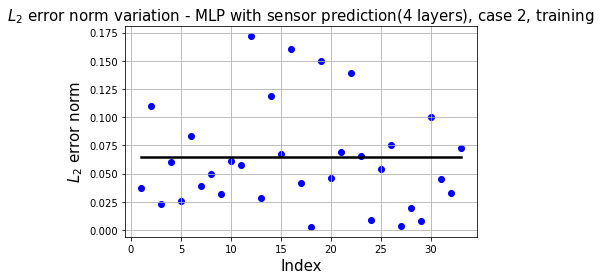

In [139]:
plt.plot(np.linspace(1, x_train2.shape[0], x_train2.shape[0]), l2_error_train2*np.ones(x_train2.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train2.shape[0], x_train2.shape[0]), l2_error_train_list2, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP with sensor prediction(4 layers), case 2, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

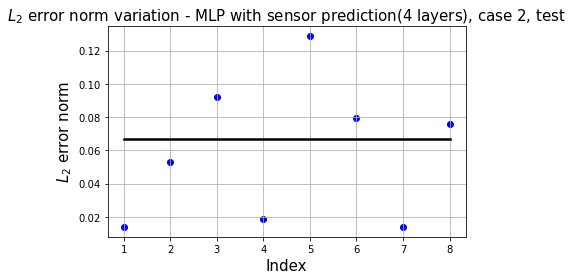

In [140]:
plt.plot(np.linspace(1, x_test2.shape[0], x_test2.shape[0]), l2_error_test2*np.ones(x_test2.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test2.shape[0], x_test2.shape[0]), l2_error_test_list2, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP with sensor prediction(4 layers), case 2, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

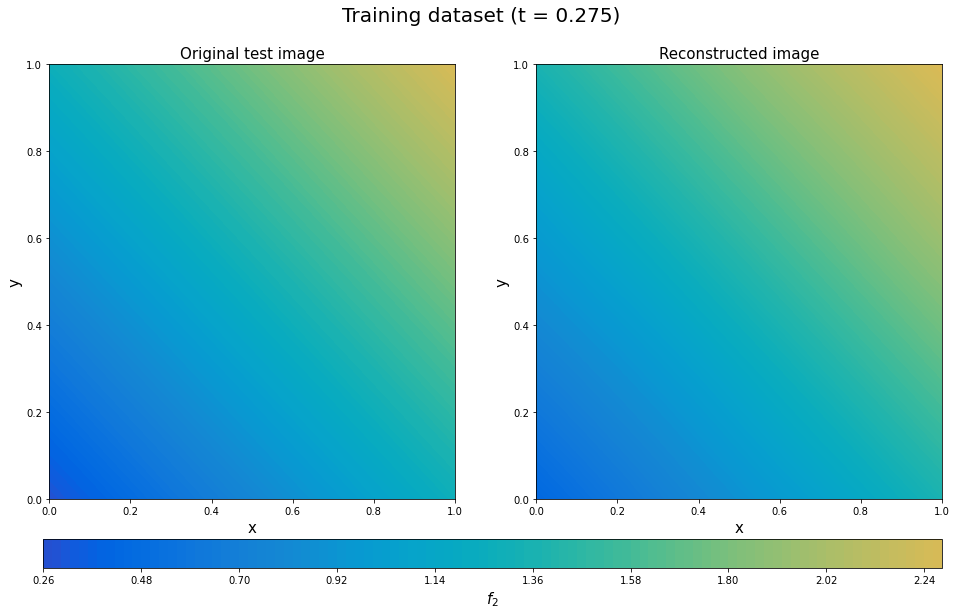

In [92]:
plt.figure(figsize=(16, 8))
y_train2_14_rotate = y_train2[14].T.reshape(101,101)
decoded_rotate2 = decoded_train2[14].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train2_14_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate2, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(0.0,3.0)
a2.set_clim(0.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_2$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[11]),fontsize=20)
plt.show()

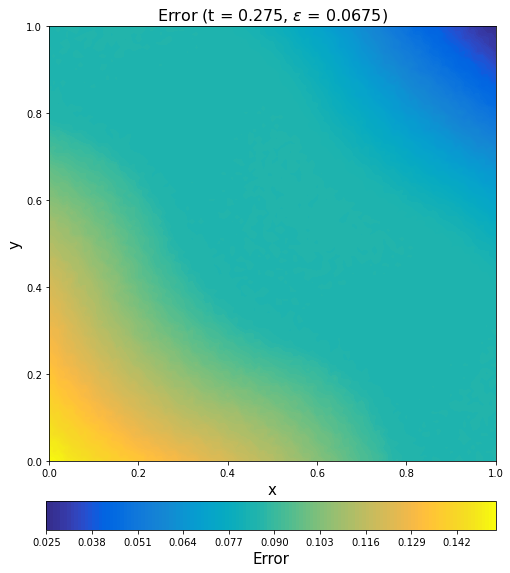

In [93]:
error_train_abs2_rotate14 = error_train_abs2[14].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs2_rotate14, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.275, $\epsilon$ = %.4f)' %(l2_error_train_list2[14]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

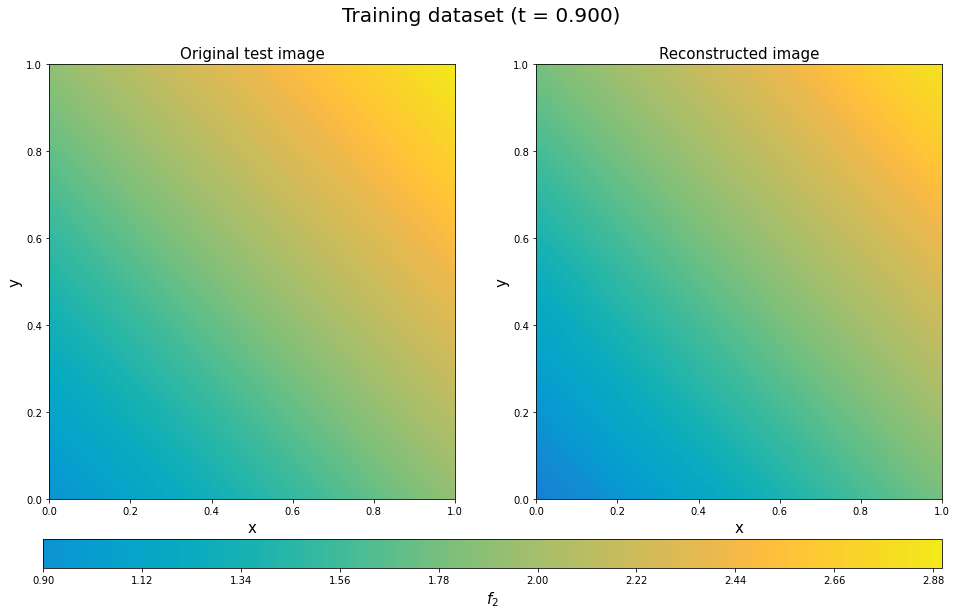

In [94]:
plt.figure(figsize=(16, 8))
y_train2_22_rotate = y_train2[22].T.reshape(101,101)
decoded_rotate2 = decoded_train2[22].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train2_22_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate2, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(0.0,3.0)
a2.set_clim(0.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_2$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[36]), fontsize=20)
plt.show()

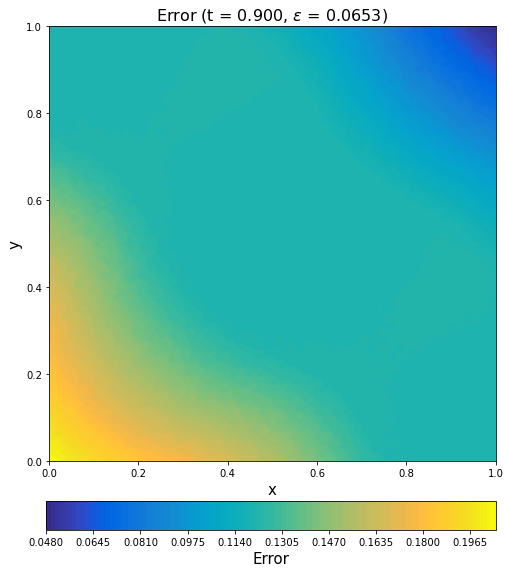

In [95]:
error_train_abs2_rotate22 = error_train_abs2[22].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs2_rotate22, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.900, $\epsilon$ = %.4f)' %(l2_error_train_list2[22]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

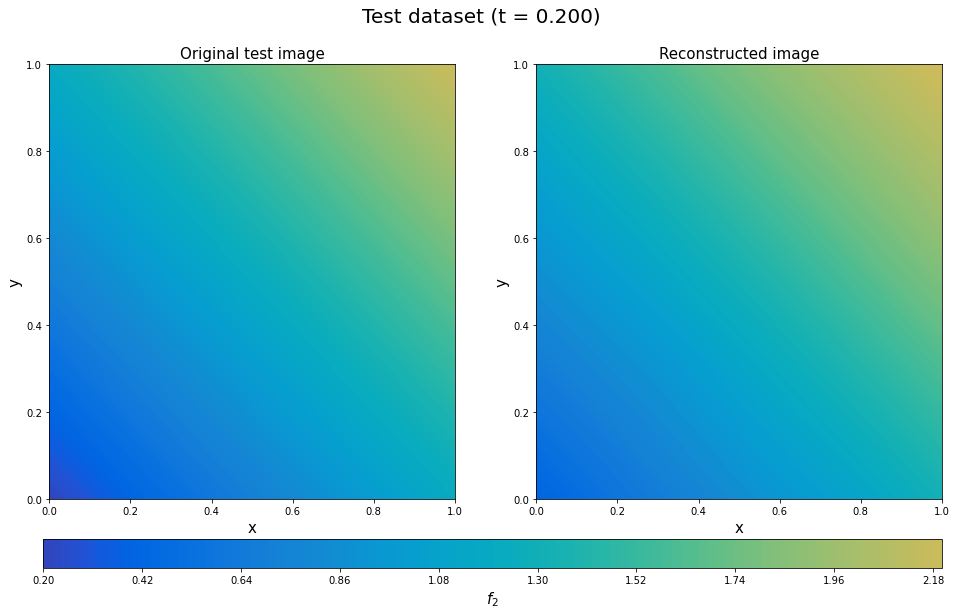

In [96]:
plt.figure(figsize=(16, 8))
y_test2_2_rotate = y_test2[2].T.reshape(101,101)
decoded_rotate2 = decoded_test2[2].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test2_2_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate2, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(0.0,3.0)
a2.set_clim(0.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_2$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)' %(t[8]),fontsize=20)
plt.show()

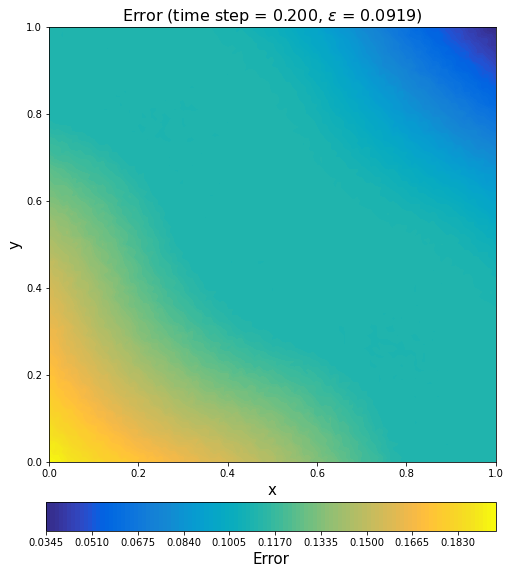

In [97]:
error_test_abs2_rotate2 = error_test_abs2[2].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs2_rotate2, levels=128, cmap=parula_map)
ax5.set_title(r'Error (time step = 0.200, $\epsilon$ = %.4f)' %(l2_error_test_list2[2]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

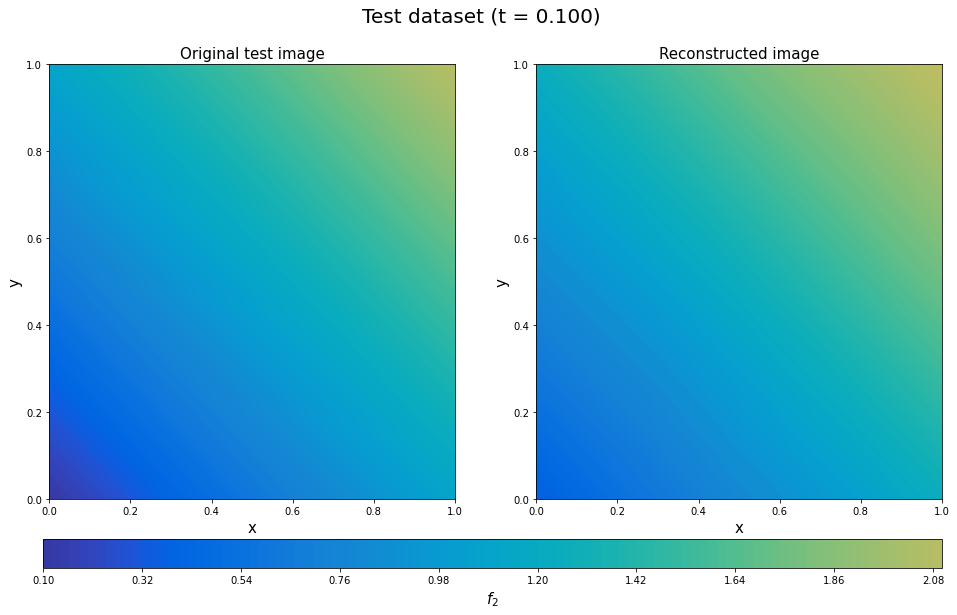

In [98]:
plt.figure(figsize=(16, 8))
y_test2_4_rotate = y_test2[4].T.reshape(101,101)
decoded_rotate2 = decoded_test2[4].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test2_4_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate2, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(0.0,3.0)
a2.set_clim(0.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_2$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)' %(t[4]),fontsize=20)
plt.show()

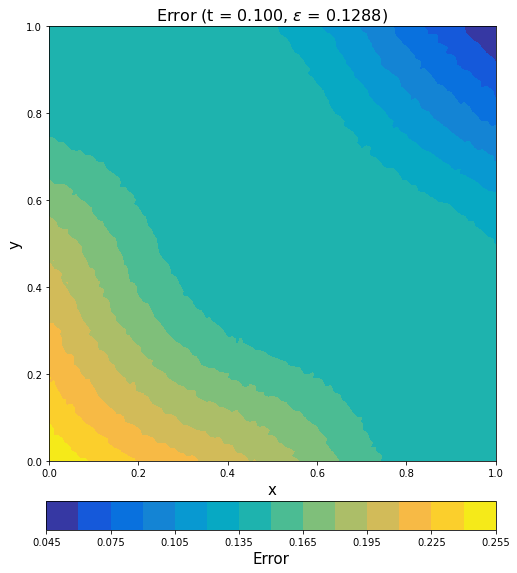

In [99]:
error_test_abs2_rotate4 = error_test_abs2[4].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs2_rotate4, levels=16, cmap=parula_map)
ax5.set_title(r'Error (t = 0.100, $\epsilon$ = %.4f)' %(l2_error_test_list2[4]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

Case 3: f3

In [100]:
out3 = np.zeros((41, 101, 101))
for i in range(0, 41):
    for j in range(0, 101):
        for k in range(0, 101):
            out3[i, j, k] = np.exp(-t[i])*(2*np.sin(2*np.pi*x[j]) + np.sin(2*np.pi*x[j])*np.cos(2*np.pi*y[k]))

In [101]:
sensor3 = np.zeros((41, 4, 4))
for i in range(0, len(t)):
    for j in range(0, 4):
        for k in range(0, 4):
            sensor3[i, j, k] = out3[i, 20*(j+1)+1, 20*(k+1)+1]

In [102]:
sensor3 = sensor3.reshape((41, 16, 1))

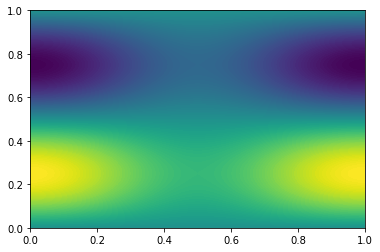

In [103]:
plt.contourf(xmesh, ymesh, out3[0,:,:], levels=128)

In [104]:
x_train3, x_test3, y_train3, y_test3, t_train, t_test = train_test_split(sensor3, out3, t.reshape((41, 1)), test_size=0.18, random_state=42)

In [105]:
x_test3

array([[[ 1.19533543],
        [ 0.61432027],
        [ 0.65355792],
        [ 1.25882328],
        [ 0.66126769],
        [ 0.33984615],
        [ 0.36155269],
        [ 0.6963896 ],
        [-0.78664952],
        [-0.4042838 ],
        [-0.43010607],
        [-0.82843084],
        [-1.14744383],
        [-0.58970728],
        [-0.62737286],
        [-1.20838802]],

       [[ 1.57369576],
        [ 0.80877148],
        [ 0.86042905],
        [ 1.65727946],
        [ 0.8705792 ],
        [ 0.44741788],
        [ 0.4759952 ],
        [ 0.91681827],
        [-1.03564822],
        [-0.53225202],
        [-0.56624783],
        [-1.09065461],
        [-1.510645  ],
        [-0.77636772],
        [-0.82595561],
        [-1.59087989]],

       [[ 1.78323092],
        [ 0.91645815],
        [ 0.97499384],
        [ 1.87794366],
        [ 0.98649548],
        [ 0.50699088],
        [ 0.53937323],
        [ 1.03889121],
        [-1.17354318],
        [-0.60312055],
        [-0.64164286],
       

In [106]:
sensor_pred3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
                     loss = tf.keras.losses.MeanSquaredError(),
                     metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [107]:
start3 = datetime.datetime.now()
history3 = sensor_pred3.fit(t_train, x_train3, epochs=10000, shuffle=True)
end3 = datetime.datetime.now()

Epoch 1/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.8002 - rmse: 1.9494
Epoch 2/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.7920 - rmse: 1.9473
Epoch 3/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.7839 - rmse: 1.9452
Epoch 4/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.7756 - rmse: 1.9431
Epoch 5/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.7674 - rmse: 1.9410
Epoch 6/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.7591 - rmse: 1.9388
Epoch 7/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.7508 - rmse: 1.9367
Epoch 8/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.7425 - rmse: 1.9346
Epoch 9/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.7343 - rmse: 1.9324
Epoch 10/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.7261 - rmse: 1.9303
Epoch 11/10000
2/2 [============================

2/2 [==============================] - 0s 6ms/step - loss: 3.1911 - rmse: 1.7864
Epoch 87/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1849 - rmse: 1.7846
Epoch 88/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1786 - rmse: 1.7829
Epoch 89/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.1723 - rmse: 1.7811
Epoch 90/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.1660 - rmse: 1.7793
Epoch 91/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1598 - rmse: 1.7776
Epoch 92/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.1537 - rmse: 1.7759
Epoch 93/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1477 - rmse: 1.7742
Epoch 94/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.1416 - rmse: 1.7725
Epoch 95/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.1355 - rmse: 1.7707
Epoch 96/10000
2/2 [==============================] - 0

2/2 [==============================] - 0s 4ms/step - loss: 2.7445 - rmse: 1.6566
Epoch 171/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.7400 - rmse: 1.6553
Epoch 172/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.7355 - rmse: 1.6539
Epoch 173/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.7311 - rmse: 1.6526
Epoch 174/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7266 - rmse: 1.6513
Epoch 175/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.7222 - rmse: 1.6499
Epoch 176/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.7179 - rmse: 1.6486
Epoch 177/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7135 - rmse: 1.6473
Epoch 178/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.7092 - rmse: 1.6460
Epoch 179/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7049 - rmse: 1.6446
Epoch 180/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 2.4000 - rmse: 1.5492
Epoch 255/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.3964 - rmse: 1.5480
Epoch 256/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.3929 - rmse: 1.5469
Epoch 257/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.3893 - rmse: 1.5457
Epoch 258/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3857 - rmse: 1.5446
Epoch 259/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.3821 - rmse: 1.5434
Epoch 260/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.3785 - rmse: 1.5423
Epoch 261/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3750 - rmse: 1.5411
Epoch 262/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.3715 - rmse: 1.5400
Epoch 263/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.3680 - rmse: 1.5388
Epoch 264/10000
2/2 [=========================

2/2 [==============================] - 0s 5ms/step - loss: 2.1267 - rmse: 1.4583
Epoch 339/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.1238 - rmse: 1.4573
Epoch 340/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.1208 - rmse: 1.4563
Epoch 341/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1179 - rmse: 1.4553
Epoch 342/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1150 - rmse: 1.4543
Epoch 343/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.1121 - rmse: 1.4533
Epoch 344/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.1093 - rmse: 1.4523
Epoch 345/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.1065 - rmse: 1.4514
Epoch 346/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.1037 - rmse: 1.4504
Epoch 347/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.1009 - rmse: 1.4494
Epoch 348/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 1.9081 - rmse: 1.3814
Epoch 423/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.9057 - rmse: 1.3805
Epoch 424/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.9033 - rmse: 1.3796
Epoch 425/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.9009 - rmse: 1.3787
Epoch 426/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.8985 - rmse: 1.3778
Epoch 427/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8961 - rmse: 1.3770
Epoch 428/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.8937 - rmse: 1.3761
Epoch 429/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.8914 - rmse: 1.3753
Epoch 430/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8892 - rmse: 1.3745
Epoch 431/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.8869 - rmse: 1.3737
Epoch 432/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 1.7282 - rmse: 1.3146
Epoch 507/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.7262 - rmse: 1.3139
Epoch 508/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7243 - rmse: 1.3131
Epoch 509/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.7223 - rmse: 1.3124
Epoch 510/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.7203 - rmse: 1.3116
Epoch 511/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.7183 - rmse: 1.3108
Epoch 512/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.7163 - rmse: 1.3101
Epoch 513/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.7144 - rmse: 1.3093
Epoch 514/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7124 - rmse: 1.3086
Epoch 515/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.7104 - rmse: 1.3078
Epoch 516/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 1.5776 - rmse: 1.2560
Epoch 591/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.5760 - rmse: 1.2554
Epoch 592/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.5744 - rmse: 1.2547
Epoch 593/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5728 - rmse: 1.2541
Epoch 594/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.5711 - rmse: 1.2534
Epoch 595/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.5695 - rmse: 1.2528
Epoch 596/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.5679 - rmse: 1.2521
Epoch 597/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.5663 - rmse: 1.2515
Epoch 598/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5646 - rmse: 1.2509
Epoch 599/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5630 - rmse: 1.2502
Epoch 600/10000
2/2 [=========================

2/2 [==============================] - 0s 5ms/step - loss: 1.4513 - rmse: 1.2047
Epoch 675/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.4499 - rmse: 1.2041
Epoch 676/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4485 - rmse: 1.2036
Epoch 677/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4472 - rmse: 1.2030
Epoch 678/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.4458 - rmse: 1.2024
Epoch 679/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.4444 - rmse: 1.2018
Epoch 680/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4430 - rmse: 1.2013
Epoch 681/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.4417 - rmse: 1.2007
Epoch 682/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4403 - rmse: 1.2001
Epoch 683/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.4389 - rmse: 1.1995
Epoch 684/10000
2/2 [=========================

2/2 [==============================] - 0s 5ms/step - loss: 1.3445 - rmse: 1.1595
Epoch 759/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.3433 - rmse: 1.1590
Epoch 760/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3422 - rmse: 1.1585
Epoch 761/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.3410 - rmse: 1.1580
Epoch 762/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.3398 - rmse: 1.1575
Epoch 763/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3387 - rmse: 1.1570
Epoch 764/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.3375 - rmse: 1.1565
Epoch 765/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.3363 - rmse: 1.1560
Epoch 766/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3352 - rmse: 1.1555
Epoch 767/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.3340 - rmse: 1.1550
Epoch 768/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 1.2526 - rmse: 1.1192
Epoch 843/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.2516 - rmse: 1.1187
Epoch 844/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.2506 - rmse: 1.1183
Epoch 845/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.2496 - rmse: 1.1178
Epoch 846/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.2486 - rmse: 1.1174
Epoch 847/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2476 - rmse: 1.1169
Epoch 848/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.2466 - rmse: 1.1165
Epoch 849/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.2456 - rmse: 1.1161
Epoch 850/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2446 - rmse: 1.1156
Epoch 851/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2436 - rmse: 1.1152
Epoch 852/10000
2/2 [=========================

2/2 [==============================] - 0s 6ms/step - loss: 1.1726 - rmse: 1.0829
Epoch 927/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1717 - rmse: 1.0825
Epoch 928/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1708 - rmse: 1.0820
Epoch 929/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1699 - rmse: 1.0816
Epoch 930/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1690 - rmse: 1.0812
Epoch 931/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1682 - rmse: 1.0808
Epoch 932/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1673 - rmse: 1.0804
Epoch 933/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1664 - rmse: 1.0800
Epoch 934/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1655 - rmse: 1.0796
Epoch 935/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1646 - rmse: 1.0792
Epoch 936/10000
2/2 [=========================

2/2 [==============================] - 0s 6ms/step - loss: 1.1027 - rmse: 1.0501
Epoch 1011/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1019 - rmse: 1.0497
Epoch 1012/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1011 - rmse: 1.0493
Epoch 1013/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1003 - rmse: 1.0490
Epoch 1014/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.0996 - rmse: 1.0486
Epoch 1015/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.0988 - rmse: 1.0482
Epoch 1016/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0980 - rmse: 1.0479
Epoch 1017/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0973 - rmse: 1.0475
Epoch 1018/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.0965 - rmse: 1.0471
Epoch 1019/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.0957 - rmse: 1.0468
Epoch 1020/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 1.0417 - rmse: 1.0206
Epoch 1094/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0410 - rmse: 1.0203
Epoch 1095/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.0403 - rmse: 1.0200
Epoch 1096/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0396 - rmse: 1.0196
Epoch 1097/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0389 - rmse: 1.0193
Epoch 1098/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.0383 - rmse: 1.0189
Epoch 1099/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.0376 - rmse: 1.0186
Epoch 1100/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0369 - rmse: 1.0183
Epoch 1101/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.0362 - rmse: 1.0179
Epoch 1102/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0355 - rmse: 1.0176
Epoch 1103/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.9874 - rmse: 0.9937
Epoch 1177/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.9868 - rmse: 0.9934
Epoch 1178/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.9861 - rmse: 0.9930
Epoch 1179/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.9855 - rmse: 0.9927
Epoch 1180/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.9849 - rmse: 0.9924
Epoch 1181/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.9843 - rmse: 0.9921
Epoch 1182/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.9837 - rmse: 0.9918
Epoch 1183/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.9831 - rmse: 0.9915
Epoch 1184/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.9824 - rmse: 0.9912
Epoch 1185/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.9818 - rmse: 0.9909
Epoch 1186/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.9387 - rmse: 0.9689
Epoch 1260/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.9381 - rmse: 0.9686
Epoch 1261/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.9376 - rmse: 0.9683
Epoch 1262/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.9370 - rmse: 0.9680
Epoch 1263/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.9364 - rmse: 0.9677
Epoch 1264/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.9359 - rmse: 0.9674
Epoch 1265/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.9353 - rmse: 0.9671
Epoch 1266/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.9348 - rmse: 0.9668
Epoch 1267/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.9342 - rmse: 0.9666
Epoch 1268/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.9337 - rmse: 0.9663
Epoch 1269/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.8947 - rmse: 0.9459
Epoch 1343/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.8942 - rmse: 0.9456
Epoch 1344/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.8937 - rmse: 0.9453
Epoch 1345/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.8932 - rmse: 0.9451
Epoch 1346/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.8927 - rmse: 0.9448
Epoch 1347/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.8921 - rmse: 0.9445
Epoch 1348/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.8916 - rmse: 0.9443
Epoch 1349/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.8912 - rmse: 0.9440
Epoch 1350/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.8907 - rmse: 0.9437
Epoch 1351/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.8902 - rmse: 0.9435
Epoch 1352/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.8550 - rmse: 0.9247
Epoch 1426/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.8546 - rmse: 0.9244
Epoch 1427/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.8541 - rmse: 0.9242
Epoch 1428/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.8537 - rmse: 0.9240
Epoch 1429/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.8532 - rmse: 0.9237
Epoch 1430/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.8528 - rmse: 0.9235
Epoch 1431/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.8523 - rmse: 0.9232
Epoch 1432/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.8519 - rmse: 0.9230
Epoch 1433/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.8514 - rmse: 0.9227
Epoch 1434/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.8510 - rmse: 0.9225
Epoch 1435/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.8190 - rmse: 0.9050
Epoch 1509/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.8186 - rmse: 0.9048
Epoch 1510/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.8182 - rmse: 0.9045
Epoch 1511/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.8177 - rmse: 0.9043
Epoch 1512/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.8173 - rmse: 0.9041
Epoch 1513/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.8169 - rmse: 0.9038
Epoch 1514/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.8165 - rmse: 0.9036
Epoch 1515/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.8161 - rmse: 0.9034
Epoch 1516/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.8157 - rmse: 0.9031
Epoch 1517/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.8153 - rmse: 0.9029
Epoch 1518/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.7859 - rmse: 0.8865
Epoch 1592/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.7855 - rmse: 0.8863
Epoch 1593/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.7851 - rmse: 0.8861
Epoch 1594/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.7847 - rmse: 0.8859
Epoch 1595/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.7843 - rmse: 0.8856
Epoch 1596/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.7840 - rmse: 0.8854
Epoch 1597/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.7836 - rmse: 0.8852
Epoch 1598/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.7832 - rmse: 0.8850
Epoch 1599/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.7828 - rmse: 0.8848
Epoch 1600/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.7825 - rmse: 0.8846
Epoch 1601/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.7557 - rmse: 0.8693
Epoch 1675/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.7554 - rmse: 0.8691
Epoch 1676/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.7550 - rmse: 0.8689
Epoch 1677/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.7547 - rmse: 0.8687
Epoch 1678/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.7543 - rmse: 0.8685
Epoch 1679/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.7540 - rmse: 0.8683
Epoch 1680/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.7536 - rmse: 0.8681
Epoch 1681/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.7533 - rmse: 0.8679
Epoch 1682/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.7529 - rmse: 0.8677
Epoch 1683/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.7526 - rmse: 0.8675
Epoch 1684/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.7277 - rmse: 0.8530
Epoch 1758/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.7273 - rmse: 0.8528
Epoch 1759/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.7270 - rmse: 0.8527
Epoch 1760/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.7267 - rmse: 0.8525
Epoch 1761/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.7264 - rmse: 0.8523
Epoch 1762/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.7261 - rmse: 0.8521
Epoch 1763/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.7257 - rmse: 0.8519
Epoch 1764/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.7254 - rmse: 0.8517
Epoch 1765/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.7251 - rmse: 0.8515
Epoch 1766/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.7247 - rmse: 0.8513
Epoch 1767/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.7017 - rmse: 0.8377
Epoch 1841/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.7014 - rmse: 0.8375
Epoch 1842/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.7011 - rmse: 0.8373
Epoch 1843/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.7008 - rmse: 0.8371
Epoch 1844/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.7005 - rmse: 0.8370
Epoch 1845/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.7002 - rmse: 0.8368
Epoch 1846/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.6999 - rmse: 0.8366
Epoch 1847/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.6996 - rmse: 0.8364
Epoch 1848/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.6993 - rmse: 0.8362
Epoch 1849/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.6990 - rmse: 0.8361
Epoch 1850/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.6776 - rmse: 0.8231
Epoch 1924/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.6773 - rmse: 0.8230
Epoch 1925/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.6770 - rmse: 0.8228
Epoch 1926/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.6767 - rmse: 0.8226
Epoch 1927/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.6764 - rmse: 0.8224
Epoch 1928/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.6761 - rmse: 0.8223
Epoch 1929/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.6759 - rmse: 0.8221
Epoch 1930/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.6756 - rmse: 0.8219
Epoch 1931/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.6753 - rmse: 0.8218
Epoch 1932/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.6751 - rmse: 0.8216
Epoch 1933/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.6548 - rmse: 0.8092
Epoch 2007/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.6545 - rmse: 0.8090
Epoch 2008/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.6542 - rmse: 0.8088
Epoch 2009/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.6540 - rmse: 0.8087
Epoch 2010/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.6537 - rmse: 0.8085
Epoch 2011/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.6534 - rmse: 0.8084
Epoch 2012/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.6532 - rmse: 0.8082
Epoch 2013/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.6529 - rmse: 0.8080
Epoch 2014/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.6527 - rmse: 0.8079
Epoch 2015/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.6524 - rmse: 0.8077
Epoch 2016/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.6330 - rmse: 0.7956
Epoch 2090/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.6328 - rmse: 0.7955
Epoch 2091/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.6325 - rmse: 0.7953
Epoch 2092/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.6322 - rmse: 0.7951
Epoch 2093/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.6320 - rmse: 0.7950
Epoch 2094/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.6317 - rmse: 0.7948
Epoch 2095/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.6315 - rmse: 0.7947
Epoch 2096/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.6312 - rmse: 0.7945
Epoch 2097/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.6310 - rmse: 0.7943
Epoch 2098/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.6307 - rmse: 0.7942
Epoch 2099/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.6127 - rmse: 0.7828
Epoch 2173/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.6125 - rmse: 0.7826
Epoch 2174/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.6123 - rmse: 0.7825
Epoch 2175/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.6120 - rmse: 0.7823
Epoch 2176/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.6118 - rmse: 0.7822
Epoch 2177/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.6115 - rmse: 0.7820
Epoch 2178/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.6113 - rmse: 0.7819
Epoch 2179/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.6111 - rmse: 0.7817
Epoch 2180/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.6108 - rmse: 0.7816
Epoch 2181/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.6106 - rmse: 0.7814
Epoch 2182/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.5929 - rmse: 0.7700
Epoch 2256/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.5927 - rmse: 0.7699
Epoch 2257/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.5925 - rmse: 0.7697
Epoch 2258/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.5922 - rmse: 0.7696
Epoch 2259/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.5920 - rmse: 0.7694
Epoch 2260/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.5918 - rmse: 0.7693
Epoch 2261/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.5916 - rmse: 0.7691
Epoch 2262/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.5913 - rmse: 0.7690
Epoch 2263/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.5911 - rmse: 0.7688
Epoch 2264/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.5908 - rmse: 0.7687
Epoch 2265/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.5739 - rmse: 0.7576
Epoch 2339/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.5737 - rmse: 0.7574
Epoch 2340/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.5734 - rmse: 0.7573
Epoch 2341/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.5732 - rmse: 0.7571
Epoch 2342/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.5730 - rmse: 0.7569
Epoch 2343/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.5727 - rmse: 0.7568
Epoch 2344/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.5725 - rmse: 0.7567
Epoch 2345/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.5723 - rmse: 0.7565
Epoch 2346/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.5721 - rmse: 0.7564
Epoch 2347/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.5719 - rmse: 0.7562
Epoch 2348/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.5557 - rmse: 0.7455
Epoch 2422/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.5555 - rmse: 0.7453
Epoch 2423/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.5553 - rmse: 0.7452
Epoch 2424/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.5551 - rmse: 0.7450
Epoch 2425/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.5549 - rmse: 0.7449
Epoch 2426/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.5547 - rmse: 0.7448
Epoch 2427/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.5545 - rmse: 0.7446
Epoch 2428/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.5543 - rmse: 0.7445
Epoch 2429/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.5541 - rmse: 0.7443
Epoch 2430/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.5539 - rmse: 0.7442
Epoch 2431/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.5383 - rmse: 0.7337
Epoch 2505/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.5381 - rmse: 0.7335
Epoch 2506/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.5379 - rmse: 0.7334
Epoch 2507/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.5377 - rmse: 0.7333
Epoch 2508/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.5375 - rmse: 0.7331
Epoch 2509/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.5373 - rmse: 0.7330
Epoch 2510/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.5371 - rmse: 0.7328
Epoch 2511/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.5369 - rmse: 0.7327
Epoch 2512/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.5367 - rmse: 0.7326
Epoch 2513/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.5365 - rmse: 0.7324
Epoch 2514/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.5216 - rmse: 0.7222
Epoch 2588/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.5214 - rmse: 0.7221
Epoch 2589/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.5212 - rmse: 0.7220
Epoch 2590/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.5210 - rmse: 0.7218
Epoch 2591/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.5208 - rmse: 0.7217
Epoch 2592/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.5206 - rmse: 0.7215
Epoch 2593/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.5204 - rmse: 0.7214
Epoch 2594/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.5202 - rmse: 0.7213
Epoch 2595/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.5200 - rmse: 0.7211
Epoch 2596/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.5198 - rmse: 0.7210
Epoch 2597/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.5052 - rmse: 0.7108
Epoch 2671/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.5050 - rmse: 0.7106
Epoch 2672/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.5048 - rmse: 0.7105
Epoch 2673/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.5046 - rmse: 0.7103
Epoch 2674/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.5044 - rmse: 0.7102
Epoch 2675/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.5042 - rmse: 0.7100
Epoch 2676/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.5040 - rmse: 0.7099
Epoch 2677/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.5038 - rmse: 0.7098
Epoch 2678/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.5036 - rmse: 0.7096
Epoch 2679/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.5034 - rmse: 0.7095
Epoch 2680/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.4891 - rmse: 0.6994
Epoch 2754/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.4889 - rmse: 0.6992
Epoch 2755/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4887 - rmse: 0.6991
Epoch 2756/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.4885 - rmse: 0.6989
Epoch 2757/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.4883 - rmse: 0.6988
Epoch 2758/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.4881 - rmse: 0.6986
Epoch 2759/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.4879 - rmse: 0.6985
Epoch 2760/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.4877 - rmse: 0.6983
Epoch 2761/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.4875 - rmse: 0.6982
Epoch 2762/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.4873 - rmse: 0.6980
Epoch 2763/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.4728 - rmse: 0.6876
Epoch 2837/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.4726 - rmse: 0.6875
Epoch 2838/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.4724 - rmse: 0.6873
Epoch 2839/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4722 - rmse: 0.6872
Epoch 2840/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.4720 - rmse: 0.6871
Epoch 2841/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.4719 - rmse: 0.6869
Epoch 2842/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.4717 - rmse: 0.6868
Epoch 2843/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.4715 - rmse: 0.6867
Epoch 2844/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.4713 - rmse: 0.6865
Epoch 2845/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.4711 - rmse: 0.6864
Epoch 2846/10000
2/2 [===============

2/2 [==============================] - 0s 19ms/step - loss: 0.4571 - rmse: 0.6761
Epoch 2920/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.4569 - rmse: 0.6760
Epoch 2921/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.4567 - rmse: 0.6758
Epoch 2922/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.4565 - rmse: 0.6757
Epoch 2923/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.4564 - rmse: 0.6755
Epoch 2924/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4562 - rmse: 0.6754
Epoch 2925/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.4560 - rmse: 0.6753
Epoch 2926/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4558 - rmse: 0.6751
Epoch 2927/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4556 - rmse: 0.6750
Epoch 2928/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.4554 - rmse: 0.6749
Epoch 2929/10000
2/2 [============

2/2 [==============================] - 0s 4ms/step - loss: 0.4415 - rmse: 0.6645
Epoch 3003/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4413 - rmse: 0.6643
Epoch 3004/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4411 - rmse: 0.6642
Epoch 3005/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4410 - rmse: 0.6640
Epoch 3006/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.4408 - rmse: 0.6639
Epoch 3007/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4406 - rmse: 0.6638
Epoch 3008/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4404 - rmse: 0.6636
Epoch 3009/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4402 - rmse: 0.6635
Epoch 3010/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4400 - rmse: 0.6634
Epoch 3011/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4399 - rmse: 0.6632
Epoch 3012/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.4263 - rmse: 0.6529
Epoch 3086/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4261 - rmse: 0.6528
Epoch 3087/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4259 - rmse: 0.6526
Epoch 3088/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.4257 - rmse: 0.6525
Epoch 3089/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.4256 - rmse: 0.6523
Epoch 3090/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4254 - rmse: 0.6522
Epoch 3091/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.4252 - rmse: 0.6521
Epoch 3092/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4250 - rmse: 0.6519
Epoch 3093/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4248 - rmse: 0.6518
Epoch 3094/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4246 - rmse: 0.6516
Epoch 3095/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.4112 - rmse: 0.6413
Epoch 3169/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.4111 - rmse: 0.6411
Epoch 3170/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.4109 - rmse: 0.6410
Epoch 3171/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.4107 - rmse: 0.6408
Epoch 3172/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4105 - rmse: 0.6407
Epoch 3173/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.4103 - rmse: 0.6405
Epoch 3174/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.4101 - rmse: 0.6404
Epoch 3175/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4099 - rmse: 0.6403
Epoch 3176/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.4098 - rmse: 0.6401
Epoch 3177/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.4096 - rmse: 0.6400
Epoch 3178/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.3959 - rmse: 0.6292
Epoch 3252/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.3957 - rmse: 0.6290
Epoch 3253/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.3955 - rmse: 0.6289
Epoch 3254/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3953 - rmse: 0.6287
Epoch 3255/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.3951 - rmse: 0.6286
Epoch 3256/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.3949 - rmse: 0.6284
Epoch 3257/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.3947 - rmse: 0.6282
Epoch 3258/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3945 - rmse: 0.6281
Epoch 3259/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.3943 - rmse: 0.6279
Epoch 3260/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3941 - rmse: 0.6278
Epoch 3261/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.3815 - rmse: 0.6176
Epoch 3335/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.3813 - rmse: 0.6175
Epoch 3336/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3811 - rmse: 0.6173
Epoch 3337/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.3809 - rmse: 0.6172
Epoch 3338/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.3807 - rmse: 0.6170
Epoch 3339/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.3806 - rmse: 0.6169
Epoch 3340/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.3804 - rmse: 0.6167
Epoch 3341/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.3802 - rmse: 0.6166
Epoch 3342/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.3800 - rmse: 0.6164
Epoch 3343/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.3798 - rmse: 0.6163
Epoch 3344/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.3669 - rmse: 0.6057
Epoch 3418/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.3667 - rmse: 0.6056
Epoch 3419/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.3666 - rmse: 0.6055
Epoch 3420/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3664 - rmse: 0.6053
Epoch 3421/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.3663 - rmse: 0.6052
Epoch 3422/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.3661 - rmse: 0.6051
Epoch 3423/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3660 - rmse: 0.6050
Epoch 3424/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.3658 - rmse: 0.6048
Epoch 3425/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.3657 - rmse: 0.6047
Epoch 3426/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3655 - rmse: 0.6046
Epoch 3427/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.3527 - rmse: 0.5939
Epoch 3501/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3525 - rmse: 0.5937
Epoch 3502/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.3524 - rmse: 0.5936
Epoch 3503/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.3522 - rmse: 0.5935
Epoch 3504/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.3520 - rmse: 0.5933
Epoch 3505/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.3519 - rmse: 0.5932
Epoch 3506/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3517 - rmse: 0.5930
Epoch 3507/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.3515 - rmse: 0.5929
Epoch 3508/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.3513 - rmse: 0.5927
Epoch 3509/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3511 - rmse: 0.5925
Epoch 3510/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.3385 - rmse: 0.5818
Epoch 3584/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.3383 - rmse: 0.5817
Epoch 3585/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3382 - rmse: 0.5815
Epoch 3586/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.3380 - rmse: 0.5814
Epoch 3587/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3379 - rmse: 0.5813
Epoch 3588/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3377 - rmse: 0.5811
Epoch 3589/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.3376 - rmse: 0.5810
Epoch 3590/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.3374 - rmse: 0.5809
Epoch 3591/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.3372 - rmse: 0.5807
Epoch 3592/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.3371 - rmse: 0.5806
Epoch 3593/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.3249 - rmse: 0.5700
Epoch 3667/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.3248 - rmse: 0.5699
Epoch 3668/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3246 - rmse: 0.5697
Epoch 3669/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.3244 - rmse: 0.5695
Epoch 3670/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.3242 - rmse: 0.5694
Epoch 3671/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.3240 - rmse: 0.5692
Epoch 3672/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.3238 - rmse: 0.5690
Epoch 3673/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.3236 - rmse: 0.5689
Epoch 3674/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3235 - rmse: 0.5687
Epoch 3675/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.3233 - rmse: 0.5686
Epoch 3676/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.3108 - rmse: 0.5575
Epoch 3750/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3107 - rmse: 0.5574
Epoch 3751/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3105 - rmse: 0.5573
Epoch 3752/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.3104 - rmse: 0.5571
Epoch 3753/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.3102 - rmse: 0.5570
Epoch 3754/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3101 - rmse: 0.5568
Epoch 3755/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.3099 - rmse: 0.5567
Epoch 3756/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.3097 - rmse: 0.5565
Epoch 3757/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3096 - rmse: 0.5564
Epoch 3758/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.3094 - rmse: 0.5562
Epoch 3759/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.2976 - rmse: 0.5456
Epoch 3833/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.2975 - rmse: 0.5454
Epoch 3834/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.2973 - rmse: 0.5453
Epoch 3835/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.2971 - rmse: 0.5451
Epoch 3836/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.2970 - rmse: 0.5450
Epoch 3837/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.2968 - rmse: 0.5448
Epoch 3838/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2967 - rmse: 0.5447
Epoch 3839/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.2965 - rmse: 0.5445
Epoch 3840/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.2963 - rmse: 0.5443
Epoch 3841/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.2961 - rmse: 0.5442
Epoch 3842/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.2832 - rmse: 0.5321
Epoch 3916/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2830 - rmse: 0.5320
Epoch 3917/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.2828 - rmse: 0.5318
Epoch 3918/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.2826 - rmse: 0.5316
Epoch 3919/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2825 - rmse: 0.5315
Epoch 3920/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.2823 - rmse: 0.5313
Epoch 3921/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.2821 - rmse: 0.5312
Epoch 3922/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2820 - rmse: 0.5310
Epoch 3923/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.2818 - rmse: 0.5309
Epoch 3924/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2817 - rmse: 0.5307
Epoch 3925/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.2701 - rmse: 0.5197
Epoch 3999/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2700 - rmse: 0.5196
Epoch 4000/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.2698 - rmse: 0.5194
Epoch 4001/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2696 - rmse: 0.5193
Epoch 4002/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2695 - rmse: 0.5191
Epoch 4003/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.2693 - rmse: 0.5190
Epoch 4004/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.2692 - rmse: 0.5188
Epoch 4005/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2690 - rmse: 0.5187
Epoch 4006/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.2689 - rmse: 0.5186
Epoch 4007/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2688 - rmse: 0.5184
Epoch 4008/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.2570 - rmse: 0.5070
Epoch 4082/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2569 - rmse: 0.5068
Epoch 4083/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.2567 - rmse: 0.5067
Epoch 4084/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.2566 - rmse: 0.5065
Epoch 4085/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2564 - rmse: 0.5064
Epoch 4086/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.2562 - rmse: 0.5062
Epoch 4087/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.2561 - rmse: 0.5060
Epoch 4088/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.2559 - rmse: 0.5059
Epoch 4089/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2557 - rmse: 0.5057
Epoch 4090/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.2556 - rmse: 0.5056
Epoch 4091/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.2451 - rmse: 0.4950
Epoch 4165/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.2449 - rmse: 0.4949
Epoch 4166/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2447 - rmse: 0.4947
Epoch 4167/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.2446 - rmse: 0.4945
Epoch 4168/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.2444 - rmse: 0.4944
Epoch 4169/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.2442 - rmse: 0.4942
Epoch 4170/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.2441 - rmse: 0.4940
Epoch 4171/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.2439 - rmse: 0.4938
Epoch 4172/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2437 - rmse: 0.4937
Epoch 4173/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.2435 - rmse: 0.4935
Epoch 4174/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.2316 - rmse: 0.4813
Epoch 4248/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2315 - rmse: 0.4811
Epoch 4249/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.2313 - rmse: 0.4810
Epoch 4250/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.2312 - rmse: 0.4808
Epoch 4251/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.2311 - rmse: 0.4807
Epoch 4252/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.2309 - rmse: 0.4806
Epoch 4253/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.2308 - rmse: 0.4804
Epoch 4254/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.2307 - rmse: 0.4803
Epoch 4255/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.2305 - rmse: 0.4802
Epoch 4256/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.2304 - rmse: 0.4800
Epoch 4257/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.2193 - rmse: 0.4682
Epoch 4331/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.2191 - rmse: 0.4681
Epoch 4332/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.2190 - rmse: 0.4679
Epoch 4333/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2188 - rmse: 0.4678
Epoch 4334/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.2187 - rmse: 0.4676
Epoch 4335/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.2185 - rmse: 0.4675
Epoch 4336/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2184 - rmse: 0.4673
Epoch 4337/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.2182 - rmse: 0.4672
Epoch 4338/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.2181 - rmse: 0.4670
Epoch 4339/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2180 - rmse: 0.4669
Epoch 4340/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.2086 - rmse: 0.4567
Epoch 4414/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.2084 - rmse: 0.4565
Epoch 4415/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.2083 - rmse: 0.4564
Epoch 4416/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.2082 - rmse: 0.4562
Epoch 4417/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.2080 - rmse: 0.4561
Epoch 4418/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2079 - rmse: 0.4560
Epoch 4419/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.2078 - rmse: 0.4558
Epoch 4420/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.2076 - rmse: 0.4557
Epoch 4421/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.2075 - rmse: 0.4555
Epoch 4422/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.2074 - rmse: 0.4554
Epoch 4423/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.1977 - rmse: 0.4446
Epoch 4497/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1976 - rmse: 0.4445
Epoch 4498/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1975 - rmse: 0.4444
Epoch 4499/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1974 - rmse: 0.4443
Epoch 4500/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1973 - rmse: 0.4441
Epoch 4501/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1971 - rmse: 0.4440
Epoch 4502/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1970 - rmse: 0.4439
Epoch 4503/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1969 - rmse: 0.4437
Epoch 4504/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1968 - rmse: 0.4436
Epoch 4505/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1967 - rmse: 0.4435
Epoch 4506/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.1866 - rmse: 0.4320
Epoch 4580/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1865 - rmse: 0.4318
Epoch 4581/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1863 - rmse: 0.4317
Epoch 4582/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1862 - rmse: 0.4315
Epoch 4583/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1861 - rmse: 0.4314
Epoch 4584/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1860 - rmse: 0.4312
Epoch 4585/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1858 - rmse: 0.4311
Epoch 4586/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1857 - rmse: 0.4309
Epoch 4587/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1856 - rmse: 0.4308
Epoch 4588/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1855 - rmse: 0.4306
Epoch 4589/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.1769 - rmse: 0.4206
Epoch 4663/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1768 - rmse: 0.4204
Epoch 4664/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1766 - rmse: 0.4203
Epoch 4665/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1765 - rmse: 0.4201
Epoch 4666/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1764 - rmse: 0.4200
Epoch 4667/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1763 - rmse: 0.4198
Epoch 4668/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1761 - rmse: 0.4197
Epoch 4669/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1760 - rmse: 0.4196
Epoch 4670/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1759 - rmse: 0.4194
Epoch 4671/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1758 - rmse: 0.4193
Epoch 4672/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.1674 - rmse: 0.4092
Epoch 4746/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.1673 - rmse: 0.4090
Epoch 4747/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1672 - rmse: 0.4089
Epoch 4748/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1670 - rmse: 0.4087
Epoch 4749/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.1669 - rmse: 0.4086
Epoch 4750/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1668 - rmse: 0.4084
Epoch 4751/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1667 - rmse: 0.4083
Epoch 4752/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.1666 - rmse: 0.4082
Epoch 4753/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1665 - rmse: 0.4080
Epoch 4754/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1664 - rmse: 0.4079
Epoch 4755/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.1582 - rmse: 0.3978
Epoch 4829/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1582 - rmse: 0.3977
Epoch 4830/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1581 - rmse: 0.3976
Epoch 4831/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.1580 - rmse: 0.3975
Epoch 4832/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1579 - rmse: 0.3974
Epoch 4833/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1578 - rmse: 0.3973
Epoch 4834/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.1577 - rmse: 0.3972
Epoch 4835/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1577 - rmse: 0.3971
Epoch 4836/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1576 - rmse: 0.3970
Epoch 4837/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.1575 - rmse: 0.3969
Epoch 4838/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.1504 - rmse: 0.3878
Epoch 4912/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1502 - rmse: 0.3876
Epoch 4913/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1501 - rmse: 0.3875
Epoch 4914/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1500 - rmse: 0.3873
Epoch 4915/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.1499 - rmse: 0.3872
Epoch 4916/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1498 - rmse: 0.3870
Epoch 4917/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1497 - rmse: 0.3869
Epoch 4918/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.1496 - rmse: 0.3868
Epoch 4919/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1495 - rmse: 0.3867
Epoch 4920/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1494 - rmse: 0.3866
Epoch 4921/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.1430 - rmse: 0.3782
Epoch 4995/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1429 - rmse: 0.3781
Epoch 4996/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.1428 - rmse: 0.3780
Epoch 4997/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1428 - rmse: 0.3778
Epoch 4998/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1427 - rmse: 0.3777
Epoch 4999/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.1426 - rmse: 0.3776
Epoch 5000/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1425 - rmse: 0.3775
Epoch 5001/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1424 - rmse: 0.3774
Epoch 5002/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.1423 - rmse: 0.3772
Epoch 5003/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1422 - rmse: 0.3771
Epoch 5004/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.1353 - rmse: 0.3679
Epoch 5078/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1353 - rmse: 0.3678
Epoch 5079/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1352 - rmse: 0.3676
Epoch 5080/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.1351 - rmse: 0.3675
Epoch 5081/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1350 - rmse: 0.3674
Epoch 5082/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1349 - rmse: 0.3673
Epoch 5083/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.1348 - rmse: 0.3672
Epoch 5084/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1347 - rmse: 0.3671
Epoch 5085/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1347 - rmse: 0.3670
Epoch 5086/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.1346 - rmse: 0.3669
Epoch 5087/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.1290 - rmse: 0.3592
Epoch 5161/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1290 - rmse: 0.3591
Epoch 5162/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.1289 - rmse: 0.3590
Epoch 5163/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1288 - rmse: 0.3589
Epoch 5164/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1287 - rmse: 0.3588
Epoch 5165/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.1286 - rmse: 0.3587
Epoch 5166/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1286 - rmse: 0.3586
Epoch 5167/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1285 - rmse: 0.3585
Epoch 5168/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.1284 - rmse: 0.3584
Epoch 5169/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1284 - rmse: 0.3583
Epoch 5170/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.1236 - rmse: 0.3516
Epoch 5244/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1236 - rmse: 0.3515
Epoch 5245/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1235 - rmse: 0.3514
Epoch 5246/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1234 - rmse: 0.3513
Epoch 5247/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.1233 - rmse: 0.3512
Epoch 5248/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1233 - rmse: 0.3511
Epoch 5249/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1232 - rmse: 0.3510
Epoch 5250/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1231 - rmse: 0.3509
Epoch 5251/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1231 - rmse: 0.3508
Epoch 5252/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1230 - rmse: 0.3507
Epoch 5253/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.1182 - rmse: 0.3438
Epoch 5327/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.1181 - rmse: 0.3437
Epoch 5328/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1181 - rmse: 0.3436
Epoch 5329/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1180 - rmse: 0.3435
Epoch 5330/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.1179 - rmse: 0.3434
Epoch 5331/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1178 - rmse: 0.3432
Epoch 5332/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1177 - rmse: 0.3431
Epoch 5333/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1176 - rmse: 0.3430
Epoch 5334/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1176 - rmse: 0.3429
Epoch 5335/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1175 - rmse: 0.3427
Epoch 5336/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.1133 - rmse: 0.3366
Epoch 5410/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1132 - rmse: 0.3365
Epoch 5411/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1132 - rmse: 0.3364
Epoch 5412/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1131 - rmse: 0.3363
Epoch 5413/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1130 - rmse: 0.3362
Epoch 5414/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1130 - rmse: 0.3361
Epoch 5415/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1129 - rmse: 0.3360
Epoch 5416/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.1128 - rmse: 0.3359
Epoch 5417/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1127 - rmse: 0.3358
Epoch 5418/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1127 - rmse: 0.3356
Epoch 5419/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.1084 - rmse: 0.3293
Epoch 5493/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1084 - rmse: 0.3292
Epoch 5494/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1083 - rmse: 0.3291
Epoch 5495/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1083 - rmse: 0.3291
Epoch 5496/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1082 - rmse: 0.3290
Epoch 5497/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.1082 - rmse: 0.3289
Epoch 5498/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1081 - rmse: 0.3289
Epoch 5499/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1081 - rmse: 0.3288
Epoch 5500/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1081 - rmse: 0.3287
Epoch 5501/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1080 - rmse: 0.3287
Epoch 5502/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.1043 - rmse: 0.3230
Epoch 5576/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1043 - rmse: 0.3229
Epoch 5577/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1042 - rmse: 0.3229
Epoch 5578/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1042 - rmse: 0.3228
Epoch 5579/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1041 - rmse: 0.3227
Epoch 5580/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.1041 - rmse: 0.3226
Epoch 5581/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1040 - rmse: 0.3225
Epoch 5582/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1040 - rmse: 0.3225
Epoch 5583/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1039 - rmse: 0.3224
Epoch 5584/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1039 - rmse: 0.3223
Epoch 5585/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.1007 - rmse: 0.3173
Epoch 5659/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1006 - rmse: 0.3172
Epoch 5660/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1006 - rmse: 0.3171
Epoch 5661/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1005 - rmse: 0.3171
Epoch 5662/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1005 - rmse: 0.3170
Epoch 5663/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1005 - rmse: 0.3169
Epoch 5664/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1004 - rmse: 0.3169
Epoch 5665/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1004 - rmse: 0.3168
Epoch 5666/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1003 - rmse: 0.3167
Epoch 5667/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1003 - rmse: 0.3167
Epoch 5668/10000
2/2 [=============

2/2 [==============================] - 0s 4ms/step - loss: 0.0974 - rmse: 0.3121
Epoch 5742/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0974 - rmse: 0.3120
Epoch 5743/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0973 - rmse: 0.3120
Epoch 5744/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0973 - rmse: 0.3119
Epoch 5745/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0973 - rmse: 0.3119
Epoch 5746/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0972 - rmse: 0.3118
Epoch 5747/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0972 - rmse: 0.3117
Epoch 5748/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0971 - rmse: 0.3117
Epoch 5749/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0971 - rmse: 0.3116
Epoch 5750/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0971 - rmse: 0.3116
Epoch 5751/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0947 - rmse: 0.3078
Epoch 5825/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0947 - rmse: 0.3077
Epoch 5826/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0947 - rmse: 0.3077
Epoch 5827/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0947 - rmse: 0.3077
Epoch 5828/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0946 - rmse: 0.3076
Epoch 5829/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0946 - rmse: 0.3076
Epoch 5830/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0946 - rmse: 0.3076
Epoch 5831/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0945 - rmse: 0.3075
Epoch 5832/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0945 - rmse: 0.3074
Epoch 5833/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0945 - rmse: 0.3074
Epoch 5834/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0923 - rmse: 0.3037
Epoch 5908/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0922 - rmse: 0.3037
Epoch 5909/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0922 - rmse: 0.3036
Epoch 5910/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0922 - rmse: 0.3036
Epoch 5911/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0921 - rmse: 0.3035
Epoch 5912/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0921 - rmse: 0.3035
Epoch 5913/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0921 - rmse: 0.3034
Epoch 5914/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0920 - rmse: 0.3034
Epoch 5915/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0920 - rmse: 0.3033
Epoch 5916/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0920 - rmse: 0.3033
Epoch 5917/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 0.0897 - rmse: 0.2996
Epoch 5991/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0897 - rmse: 0.2995
Epoch 5992/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0897 - rmse: 0.2995
Epoch 5993/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0896 - rmse: 0.2994
Epoch 5994/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0896 - rmse: 0.2994
Epoch 5995/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0896 - rmse: 0.2993
Epoch 5996/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0896 - rmse: 0.2992
Epoch 5997/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0895 - rmse: 0.2992
Epoch 5998/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0895 - rmse: 0.2991
Epoch 5999/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0895 - rmse: 0.2991
Epoch 6000/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 0.0877 - rmse: 0.2961
Epoch 6074/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0877 - rmse: 0.2961
Epoch 6075/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0877 - rmse: 0.2961
Epoch 6076/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0877 - rmse: 0.2961
Epoch 6077/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0876 - rmse: 0.2960
Epoch 6078/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0876 - rmse: 0.2960
Epoch 6079/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0876 - rmse: 0.2959
Epoch 6080/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0875 - rmse: 0.2959
Epoch 6081/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0875 - rmse: 0.2958
Epoch 6082/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0875 - rmse: 0.2958
Epoch 6083/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0859 - rmse: 0.2931
Epoch 6157/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0859 - rmse: 0.2930
Epoch 6158/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0858 - rmse: 0.2930
Epoch 6159/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0858 - rmse: 0.2929
Epoch 6160/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0858 - rmse: 0.2929
Epoch 6161/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0858 - rmse: 0.2928
Epoch 6162/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0857 - rmse: 0.2928
Epoch 6163/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0857 - rmse: 0.2927
Epoch 6164/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0857 - rmse: 0.2927
Epoch 6165/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0856 - rmse: 0.2926
Epoch 6166/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0839 - rmse: 0.2896
Epoch 6240/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0839 - rmse: 0.2896
Epoch 6241/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0839 - rmse: 0.2896
Epoch 6242/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0839 - rmse: 0.2896
Epoch 6243/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0838 - rmse: 0.2895
Epoch 6244/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0838 - rmse: 0.2895
Epoch 6245/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0838 - rmse: 0.2895
Epoch 6246/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0838 - rmse: 0.2894
Epoch 6247/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0837 - rmse: 0.2894
Epoch 6248/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0837 - rmse: 0.2893
Epoch 6249/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0823 - rmse: 0.2870
Epoch 6323/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0823 - rmse: 0.2869
Epoch 6324/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0823 - rmse: 0.2869
Epoch 6325/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0823 - rmse: 0.2868
Epoch 6326/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0822 - rmse: 0.2868
Epoch 6327/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0822 - rmse: 0.2867
Epoch 6328/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0822 - rmse: 0.2867
Epoch 6329/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0822 - rmse: 0.2866
Epoch 6330/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0821 - rmse: 0.2866
Epoch 6331/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0821 - rmse: 0.2865
Epoch 6332/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0806 - rmse: 0.2840
Epoch 6406/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0806 - rmse: 0.2839
Epoch 6407/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0806 - rmse: 0.2839
Epoch 6408/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0806 - rmse: 0.2838
Epoch 6409/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0805 - rmse: 0.2838
Epoch 6410/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0805 - rmse: 0.2838
Epoch 6411/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0805 - rmse: 0.2837
Epoch 6412/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0805 - rmse: 0.2837
Epoch 6413/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0805 - rmse: 0.2837
Epoch 6414/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0804 - rmse: 0.2836
Epoch 6415/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0792 - rmse: 0.2814
Epoch 6489/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0791 - rmse: 0.2813
Epoch 6490/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0791 - rmse: 0.2813
Epoch 6491/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0791 - rmse: 0.2813
Epoch 6492/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0791 - rmse: 0.2812
Epoch 6493/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0791 - rmse: 0.2812
Epoch 6494/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0791 - rmse: 0.2812
Epoch 6495/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0790 - rmse: 0.2812
Epoch 6496/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0790 - rmse: 0.2811
Epoch 6497/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0790 - rmse: 0.2811
Epoch 6498/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0778 - rmse: 0.2790
Epoch 6572/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0778 - rmse: 0.2789
Epoch 6573/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0778 - rmse: 0.2789
Epoch 6574/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0778 - rmse: 0.2789
Epoch 6575/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0778 - rmse: 0.2789
Epoch 6576/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0777 - rmse: 0.2788
Epoch 6577/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0777 - rmse: 0.2788
Epoch 6578/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0777 - rmse: 0.2788
Epoch 6579/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0777 - rmse: 0.2787
Epoch 6580/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0777 - rmse: 0.2787
Epoch 6581/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0767 - rmse: 0.2769
Epoch 6655/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0766 - rmse: 0.2768
Epoch 6656/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0766 - rmse: 0.2768
Epoch 6657/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0766 - rmse: 0.2768
Epoch 6658/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0766 - rmse: 0.2768
Epoch 6659/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0766 - rmse: 0.2767
Epoch 6660/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0766 - rmse: 0.2767
Epoch 6661/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0766 - rmse: 0.2767
Epoch 6662/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0765 - rmse: 0.2767
Epoch 6663/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0765 - rmse: 0.2766
Epoch 6664/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0755 - rmse: 0.2747
Epoch 6738/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0755 - rmse: 0.2747
Epoch 6739/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0755 - rmse: 0.2747
Epoch 6740/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0755 - rmse: 0.2747
Epoch 6741/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0754 - rmse: 0.2747
Epoch 6742/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0754 - rmse: 0.2746
Epoch 6743/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0754 - rmse: 0.2746
Epoch 6744/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0754 - rmse: 0.2746
Epoch 6745/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0754 - rmse: 0.2746
Epoch 6746/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0754 - rmse: 0.2746
Epoch 6747/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0744 - rmse: 0.2728
Epoch 6821/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0744 - rmse: 0.2727
Epoch 6822/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0744 - rmse: 0.2727
Epoch 6823/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0744 - rmse: 0.2727
Epoch 6824/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0743 - rmse: 0.2727
Epoch 6825/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0743 - rmse: 0.2727
Epoch 6826/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0743 - rmse: 0.2726
Epoch 6827/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0743 - rmse: 0.2726
Epoch 6828/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0743 - rmse: 0.2726
Epoch 6829/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0743 - rmse: 0.2725
Epoch 6830/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0734 - rmse: 0.2709
Epoch 6904/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0734 - rmse: 0.2709
Epoch 6905/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0734 - rmse: 0.2709
Epoch 6906/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0734 - rmse: 0.2709
Epoch 6907/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0734 - rmse: 0.2708
Epoch 6908/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0733 - rmse: 0.2708
Epoch 6909/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0733 - rmse: 0.2708
Epoch 6910/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0733 - rmse: 0.2708
Epoch 6911/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0733 - rmse: 0.2707
Epoch 6912/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0733 - rmse: 0.2707
Epoch 6913/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0724 - rmse: 0.2692
Epoch 6987/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0724 - rmse: 0.2691
Epoch 6988/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0724 - rmse: 0.2691
Epoch 6989/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0724 - rmse: 0.2691
Epoch 6990/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0724 - rmse: 0.2691
Epoch 6991/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0724 - rmse: 0.2691
Epoch 6992/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0724 - rmse: 0.2690
Epoch 6993/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0724 - rmse: 0.2690
Epoch 6994/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0724 - rmse: 0.2690
Epoch 6995/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0724 - rmse: 0.2690
Epoch 6996/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0716 - rmse: 0.2675
Epoch 7070/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0716 - rmse: 0.2675
Epoch 7071/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0716 - rmse: 0.2675
Epoch 7072/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0716 - rmse: 0.2675
Epoch 7073/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0716 - rmse: 0.2675
Epoch 7074/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0715 - rmse: 0.2675
Epoch 7075/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0715 - rmse: 0.2675
Epoch 7076/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0715 - rmse: 0.2674
Epoch 7077/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0715 - rmse: 0.2674
Epoch 7078/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0715 - rmse: 0.2674
Epoch 7079/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0706 - rmse: 0.2658
Epoch 7153/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0706 - rmse: 0.2658
Epoch 7154/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0706 - rmse: 0.2657
Epoch 7155/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0706 - rmse: 0.2657
Epoch 7156/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0706 - rmse: 0.2657
Epoch 7157/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0706 - rmse: 0.2657
Epoch 7158/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0706 - rmse: 0.2657
Epoch 7159/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0706 - rmse: 0.2656
Epoch 7160/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0706 - rmse: 0.2656
Epoch 7161/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0706 - rmse: 0.2656
Epoch 7162/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0698 - rmse: 0.2642
Epoch 7236/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0698 - rmse: 0.2642
Epoch 7237/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0698 - rmse: 0.2641
Epoch 7238/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0698 - rmse: 0.2641
Epoch 7239/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0698 - rmse: 0.2641
Epoch 7240/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0697 - rmse: 0.2641
Epoch 7241/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0697 - rmse: 0.2641
Epoch 7242/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0697 - rmse: 0.2641
Epoch 7243/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0697 - rmse: 0.2640
Epoch 7244/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0697 - rmse: 0.2640
Epoch 7245/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0689 - rmse: 0.2625
Epoch 7319/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0689 - rmse: 0.2624
Epoch 7320/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0689 - rmse: 0.2624
Epoch 7321/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0688 - rmse: 0.2624
Epoch 7322/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0688 - rmse: 0.2624
Epoch 7323/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0688 - rmse: 0.2624
Epoch 7324/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0688 - rmse: 0.2623
Epoch 7325/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0688 - rmse: 0.2623
Epoch 7326/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0688 - rmse: 0.2623
Epoch 7327/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0688 - rmse: 0.2623
Epoch 7328/10000
2/2 [==============

2/2 [==============================] - 0s 4ms/step - loss: 0.0680 - rmse: 0.2609
Epoch 7402/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0680 - rmse: 0.2608
Epoch 7403/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0680 - rmse: 0.2608
Epoch 7404/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0680 - rmse: 0.2608
Epoch 7405/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0680 - rmse: 0.2608
Epoch 7406/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0680 - rmse: 0.2608
Epoch 7407/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0680 - rmse: 0.2607
Epoch 7408/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0680 - rmse: 0.2607
Epoch 7409/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0680 - rmse: 0.2607
Epoch 7410/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0680 - rmse: 0.2607
Epoch 7411/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0672 - rmse: 0.2592
Epoch 7485/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0672 - rmse: 0.2592
Epoch 7486/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0672 - rmse: 0.2592
Epoch 7487/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0672 - rmse: 0.2592
Epoch 7488/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0672 - rmse: 0.2592
Epoch 7489/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0672 - rmse: 0.2591
Epoch 7490/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0672 - rmse: 0.2591
Epoch 7491/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0671 - rmse: 0.2591
Epoch 7492/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0671 - rmse: 0.2591
Epoch 7493/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0671 - rmse: 0.2591
Epoch 7494/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0663 - rmse: 0.2575
Epoch 7568/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0663 - rmse: 0.2575
Epoch 7569/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0663 - rmse: 0.2575
Epoch 7570/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0663 - rmse: 0.2575
Epoch 7571/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0663 - rmse: 0.2575
Epoch 7572/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0663 - rmse: 0.2574
Epoch 7573/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0663 - rmse: 0.2574
Epoch 7574/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0662 - rmse: 0.2574
Epoch 7575/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0662 - rmse: 0.2574
Epoch 7576/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0662 - rmse: 0.2573
Epoch 7577/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0655 - rmse: 0.2559
Epoch 7651/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0655 - rmse: 0.2558
Epoch 7652/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0654 - rmse: 0.2558
Epoch 7653/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0654 - rmse: 0.2558
Epoch 7654/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0654 - rmse: 0.2558
Epoch 7655/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0654 - rmse: 0.2558
Epoch 7656/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0654 - rmse: 0.2557
Epoch 7657/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0654 - rmse: 0.2557
Epoch 7658/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0654 - rmse: 0.2557
Epoch 7659/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0654 - rmse: 0.2557
Epoch 7660/10000
2/2 [==============

2/2 [==============================] - 0s 4ms/step - loss: 0.0647 - rmse: 0.2544
Epoch 7734/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0647 - rmse: 0.2543
Epoch 7735/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0647 - rmse: 0.2543
Epoch 7736/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0647 - rmse: 0.2543
Epoch 7737/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0646 - rmse: 0.2542
Epoch 7738/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0646 - rmse: 0.2542
Epoch 7739/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0646 - rmse: 0.2542
Epoch 7740/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0646 - rmse: 0.2541
Epoch 7741/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0646 - rmse: 0.2541
Epoch 7742/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0646 - rmse: 0.2541
Epoch 7743/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0637 - rmse: 0.2524
Epoch 7817/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0637 - rmse: 0.2523
Epoch 7818/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0637 - rmse: 0.2523
Epoch 7819/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0637 - rmse: 0.2523
Epoch 7820/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0636 - rmse: 0.2523
Epoch 7821/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0636 - rmse: 0.2522
Epoch 7822/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0636 - rmse: 0.2522
Epoch 7823/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0636 - rmse: 0.2522
Epoch 7824/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0636 - rmse: 0.2522
Epoch 7825/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0636 - rmse: 0.2521
Epoch 7826/10000
2/2 [==============

2/2 [==============================] - 0s 11ms/step - loss: 0.0628 - rmse: 0.2505
Epoch 7900/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0628 - rmse: 0.2505
Epoch 7901/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0627 - rmse: 0.2505
Epoch 7902/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0627 - rmse: 0.2505
Epoch 7903/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0627 - rmse: 0.2505
Epoch 7904/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0627 - rmse: 0.2504
Epoch 7905/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0627 - rmse: 0.2504
Epoch 7906/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0627 - rmse: 0.2504
Epoch 7907/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0627 - rmse: 0.2504
Epoch 7908/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0627 - rmse: 0.2504
Epoch 7909/10000
2/2 [=============

2/2 [==============================] - 0s 4ms/step - loss: 0.0619 - rmse: 0.2488
Epoch 7983/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0619 - rmse: 0.2488
Epoch 7984/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0619 - rmse: 0.2488
Epoch 7985/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0619 - rmse: 0.2487
Epoch 7986/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0619 - rmse: 0.2487
Epoch 7987/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0619 - rmse: 0.2487
Epoch 7988/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0618 - rmse: 0.2487
Epoch 7989/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0618 - rmse: 0.2487
Epoch 7990/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0618 - rmse: 0.2486
Epoch 7991/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0618 - rmse: 0.2486
Epoch 7992/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0610 - rmse: 0.2469
Epoch 8066/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0610 - rmse: 0.2469
Epoch 8067/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0609 - rmse: 0.2469
Epoch 8068/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0609 - rmse: 0.2468
Epoch 8069/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0609 - rmse: 0.2468
Epoch 8070/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0609 - rmse: 0.2468
Epoch 8071/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0609 - rmse: 0.2467
Epoch 8072/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0609 - rmse: 0.2467
Epoch 8073/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0608 - rmse: 0.2467
Epoch 8074/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0608 - rmse: 0.2466
Epoch 8075/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0599 - rmse: 0.2448
Epoch 8149/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0599 - rmse: 0.2448
Epoch 8150/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0599 - rmse: 0.2448
Epoch 8151/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0599 - rmse: 0.2447
Epoch 8152/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0599 - rmse: 0.2447
Epoch 8153/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0598 - rmse: 0.2446
Epoch 8154/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0598 - rmse: 0.2446
Epoch 8155/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0598 - rmse: 0.2446
Epoch 8156/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0598 - rmse: 0.2445
Epoch 8157/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0598 - rmse: 0.2445
Epoch 8158/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0590 - rmse: 0.2429
Epoch 8232/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0590 - rmse: 0.2428
Epoch 8233/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0590 - rmse: 0.2429
Epoch 8234/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0590 - rmse: 0.2428
Epoch 8235/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0590 - rmse: 0.2428
Epoch 8236/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0589 - rmse: 0.2428
Epoch 8237/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0589 - rmse: 0.2428
Epoch 8238/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0589 - rmse: 0.2428
Epoch 8239/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0589 - rmse: 0.2427
Epoch 8240/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0589 - rmse: 0.2427
Epoch 8241/10000
2/2 [==============

2/2 [==============================] - 0s 4ms/step - loss: 0.0580 - rmse: 0.2408
Epoch 8315/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0580 - rmse: 0.2408
Epoch 8316/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0580 - rmse: 0.2408
Epoch 8317/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0580 - rmse: 0.2408
Epoch 8318/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0580 - rmse: 0.2408
Epoch 8319/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0580 - rmse: 0.2408
Epoch 8320/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0580 - rmse: 0.2408
Epoch 8321/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0580 - rmse: 0.2408
Epoch 8322/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0580 - rmse: 0.2408
Epoch 8323/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0580 - rmse: 0.2408
Epoch 8324/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0574 - rmse: 0.2396
Epoch 8398/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0574 - rmse: 0.2395
Epoch 8399/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0574 - rmse: 0.2395
Epoch 8400/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0574 - rmse: 0.2395
Epoch 8401/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0573 - rmse: 0.2395
Epoch 8402/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0573 - rmse: 0.2394
Epoch 8403/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0573 - rmse: 0.2394
Epoch 8404/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0573 - rmse: 0.2394
Epoch 8405/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0573 - rmse: 0.2394
Epoch 8406/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0573 - rmse: 0.2394
Epoch 8407/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0565 - rmse: 0.2376
Epoch 8481/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0564 - rmse: 0.2376
Epoch 8482/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0564 - rmse: 0.2376
Epoch 8483/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0564 - rmse: 0.2376
Epoch 8484/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0564 - rmse: 0.2376
Epoch 8485/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0564 - rmse: 0.2375
Epoch 8486/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0564 - rmse: 0.2375
Epoch 8487/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0564 - rmse: 0.2374
Epoch 8488/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0563 - rmse: 0.2373
Epoch 8489/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0563 - rmse: 0.2373
Epoch 8490/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0548 - rmse: 0.2341
Epoch 8564/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0548 - rmse: 0.2340
Epoch 8565/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0548 - rmse: 0.2340
Epoch 8566/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0547 - rmse: 0.2339
Epoch 8567/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0547 - rmse: 0.2339
Epoch 8568/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0547 - rmse: 0.2339
Epoch 8569/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0547 - rmse: 0.2338
Epoch 8570/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0547 - rmse: 0.2338
Epoch 8571/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0546 - rmse: 0.2338
Epoch 8572/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0546 - rmse: 0.2337
Epoch 8573/10000
2/2 [=============

2/2 [==============================] - 0s 7ms/step - loss: 0.0536 - rmse: 0.2315
Epoch 8647/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0536 - rmse: 0.2314
Epoch 8648/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0535 - rmse: 0.2314
Epoch 8649/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0535 - rmse: 0.2314
Epoch 8650/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0535 - rmse: 0.2313
Epoch 8651/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0535 - rmse: 0.2313
Epoch 8652/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0535 - rmse: 0.2312
Epoch 8653/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0535 - rmse: 0.2312
Epoch 8654/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0534 - rmse: 0.2312
Epoch 8655/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0534 - rmse: 0.2312
Epoch 8656/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0522 - rmse: 0.2285
Epoch 8730/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0522 - rmse: 0.2285
Epoch 8731/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0522 - rmse: 0.2285
Epoch 8732/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0522 - rmse: 0.2284
Epoch 8733/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0522 - rmse: 0.2284
Epoch 8734/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0521 - rmse: 0.2284
Epoch 8735/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0521 - rmse: 0.2283
Epoch 8736/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0521 - rmse: 0.2283
Epoch 8737/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0521 - rmse: 0.2282
Epoch 8738/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0521 - rmse: 0.2282
Epoch 8739/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0508 - rmse: 0.2254
Epoch 8813/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0508 - rmse: 0.2253
Epoch 8814/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0508 - rmse: 0.2253
Epoch 8815/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0507 - rmse: 0.2253
Epoch 8816/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0507 - rmse: 0.2252
Epoch 8817/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0507 - rmse: 0.2252
Epoch 8818/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0507 - rmse: 0.2252
Epoch 8819/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0507 - rmse: 0.2251
Epoch 8820/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0507 - rmse: 0.2251
Epoch 8821/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0506 - rmse: 0.2250
Epoch 8822/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0495 - rmse: 0.2224
Epoch 8896/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0495 - rmse: 0.2224
Epoch 8897/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0494 - rmse: 0.2224
Epoch 8898/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0494 - rmse: 0.2223
Epoch 8899/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0494 - rmse: 0.2223
Epoch 8900/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0494 - rmse: 0.2223
Epoch 8901/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0494 - rmse: 0.2222
Epoch 8902/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0494 - rmse: 0.2222
Epoch 8903/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0494 - rmse: 0.2222
Epoch 8904/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0493 - rmse: 0.2221
Epoch 8905/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0479 - rmse: 0.2188
Epoch 8979/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0478 - rmse: 0.2187
Epoch 8980/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0478 - rmse: 0.2187
Epoch 8981/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0478 - rmse: 0.2186
Epoch 8982/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0478 - rmse: 0.2186
Epoch 8983/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0478 - rmse: 0.2185
Epoch 8984/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0477 - rmse: 0.2185
Epoch 8985/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0477 - rmse: 0.2184
Epoch 8986/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0477 - rmse: 0.2184
Epoch 8987/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0477 - rmse: 0.2183
Epoch 8988/10000
2/2 [============

2/2 [==============================] - 0s 4ms/step - loss: 0.0464 - rmse: 0.2153
Epoch 9062/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0463 - rmse: 0.2153
Epoch 9063/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0463 - rmse: 0.2152
Epoch 9064/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0463 - rmse: 0.2152
Epoch 9065/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0463 - rmse: 0.2152
Epoch 9066/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0463 - rmse: 0.2151
Epoch 9067/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0463 - rmse: 0.2151
Epoch 9068/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0463 - rmse: 0.2151
Epoch 9069/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0462 - rmse: 0.2150
Epoch 9070/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0462 - rmse: 0.2150
Epoch 9071/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0447 - rmse: 0.2114
Epoch 9145/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0447 - rmse: 0.2114
Epoch 9146/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0447 - rmse: 0.2113
Epoch 9147/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0446 - rmse: 0.2113
Epoch 9148/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0446 - rmse: 0.2113
Epoch 9149/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0446 - rmse: 0.2112
Epoch 9150/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0446 - rmse: 0.2112
Epoch 9151/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0446 - rmse: 0.2111
Epoch 9152/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0446 - rmse: 0.2111
Epoch 9153/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0445 - rmse: 0.2110
Epoch 9154/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0432 - rmse: 0.2078
Epoch 9228/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0432 - rmse: 0.2077
Epoch 9229/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0431 - rmse: 0.2077
Epoch 9230/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0431 - rmse: 0.2077
Epoch 9231/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0431 - rmse: 0.2076
Epoch 9232/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0431 - rmse: 0.2076
Epoch 9233/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0431 - rmse: 0.2076
Epoch 9234/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0431 - rmse: 0.2075
Epoch 9235/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0431 - rmse: 0.2075
Epoch 9236/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0430 - rmse: 0.2075
Epoch 9237/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0416 - rmse: 0.2040
Epoch 9311/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0416 - rmse: 0.2040
Epoch 9312/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0416 - rmse: 0.2039
Epoch 9313/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0416 - rmse: 0.2039
Epoch 9314/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0415 - rmse: 0.2038
Epoch 9315/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0415 - rmse: 0.2038
Epoch 9316/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0415 - rmse: 0.2037
Epoch 9317/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0415 - rmse: 0.2037
Epoch 9318/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0415 - rmse: 0.2036
Epoch 9319/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0414 - rmse: 0.2036
Epoch 9320/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0399 - rmse: 0.1998
Epoch 9394/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0399 - rmse: 0.1997
Epoch 9395/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0399 - rmse: 0.1997
Epoch 9396/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0398 - rmse: 0.1996
Epoch 9397/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0398 - rmse: 0.1996
Epoch 9398/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0398 - rmse: 0.1995
Epoch 9399/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0398 - rmse: 0.1995
Epoch 9400/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0398 - rmse: 0.1994
Epoch 9401/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0397 - rmse: 0.1994
Epoch 9402/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0397 - rmse: 0.1993
Epoch 9403/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0383 - rmse: 0.1957
Epoch 9477/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0383 - rmse: 0.1956
Epoch 9478/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0382 - rmse: 0.1956
Epoch 9479/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0382 - rmse: 0.1955
Epoch 9480/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0382 - rmse: 0.1954
Epoch 9481/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0382 - rmse: 0.1954
Epoch 9482/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0382 - rmse: 0.1953
Epoch 9483/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0381 - rmse: 0.1953
Epoch 9484/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0381 - rmse: 0.1952
Epoch 9485/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0381 - rmse: 0.1952
Epoch 9486/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0365 - rmse: 0.1910
Epoch 9560/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0365 - rmse: 0.1910
Epoch 9561/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0364 - rmse: 0.1909
Epoch 9562/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0364 - rmse: 0.1909
Epoch 9563/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0364 - rmse: 0.1908
Epoch 9564/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0364 - rmse: 0.1907
Epoch 9565/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0364 - rmse: 0.1907
Epoch 9566/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0363 - rmse: 0.1906
Epoch 9567/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0363 - rmse: 0.1905
Epoch 9568/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0363 - rmse: 0.1905
Epoch 9569/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0349 - rmse: 0.1868
Epoch 9643/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0349 - rmse: 0.1867
Epoch 9644/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0348 - rmse: 0.1867
Epoch 9645/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0348 - rmse: 0.1866
Epoch 9646/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0348 - rmse: 0.1866
Epoch 9647/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0348 - rmse: 0.1865
Epoch 9648/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0348 - rmse: 0.1865
Epoch 9649/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0348 - rmse: 0.1864
Epoch 9650/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0347 - rmse: 0.1864
Epoch 9651/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0347 - rmse: 0.1863
Epoch 9652/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0332 - rmse: 0.1821
Epoch 9726/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0332 - rmse: 0.1821
Epoch 9727/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0331 - rmse: 0.1820
Epoch 9728/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0331 - rmse: 0.1820
Epoch 9729/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0331 - rmse: 0.1819
Epoch 9730/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0331 - rmse: 0.1819
Epoch 9731/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0331 - rmse: 0.1819
Epoch 9732/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0331 - rmse: 0.1818
Epoch 9733/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0330 - rmse: 0.1817
Epoch 9734/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0330 - rmse: 0.1817
Epoch 9735/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0314 - rmse: 0.1773
Epoch 9809/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0314 - rmse: 0.1772
Epoch 9810/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0314 - rmse: 0.1772
Epoch 9811/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0314 - rmse: 0.1771
Epoch 9812/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0313 - rmse: 0.1771
Epoch 9813/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0313 - rmse: 0.1770
Epoch 9814/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0313 - rmse: 0.1769
Epoch 9815/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0313 - rmse: 0.1769
Epoch 9816/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0313 - rmse: 0.1768
Epoch 9817/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0312 - rmse: 0.1768
Epoch 9818/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0299 - rmse: 0.1728
Epoch 9892/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0298 - rmse: 0.1727
Epoch 9893/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0298 - rmse: 0.1726
Epoch 9894/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0298 - rmse: 0.1726
Epoch 9895/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0298 - rmse: 0.1725
Epoch 9896/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0297 - rmse: 0.1724
Epoch 9897/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0297 - rmse: 0.1724
Epoch 9898/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0297 - rmse: 0.1723
Epoch 9899/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0297 - rmse: 0.1722
Epoch 9900/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0297 - rmse: 0.1722
Epoch 9901/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0284 - rmse: 0.1684
Epoch 9975/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0283 - rmse: 0.1683
Epoch 9976/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0283 - rmse: 0.1682
Epoch 9977/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0283 - rmse: 0.1681
Epoch 9978/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0282 - rmse: 0.1681
Epoch 9979/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0282 - rmse: 0.1680
Epoch 9980/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0282 - rmse: 0.1679
Epoch 9981/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0282 - rmse: 0.1678
Epoch 9982/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0281 - rmse: 0.1678
Epoch 9983/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0281 - rmse: 0.1677
Epoch 9984/10000
2/2 [===============

In [108]:
time3_sensor = end3 - start3
print("Training time (Case 3, sensor prediction):", time3_sensor)

Training time (Case 3, sensor prediction): 0:01:49.491318


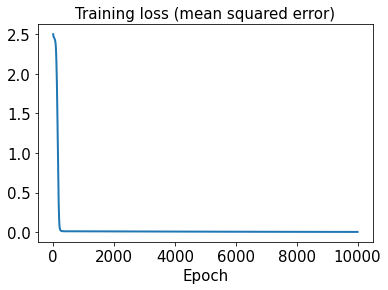

In [109]:
hist3 = history3.history
plt.plot(hist2['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

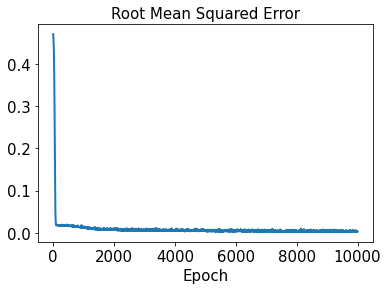

In [110]:
plt.plot(hist1['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [111]:
sd3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
            loss = tf.keras.losses.MeanSquaredError(),
            metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [112]:
start3 = datetime.datetime.now()
history3 = sd3.fit(x_train3, y_train3, epochs=10000, shuffle=True)
end3 = datetime.datetime.now()

Epoch 1/10000
2/2 [==============================] - 0s 14ms/step - loss: 1.3508 - rmse: 1.1612
Epoch 2/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.3498 - rmse: 1.1608
Epoch 3/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.3489 - rmse: 1.1604
Epoch 4/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.3480 - rmse: 1.1600
Epoch 5/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.3472 - rmse: 1.1597
Epoch 6/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.3463 - rmse: 1.1593
Epoch 7/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.3455 - rmse: 1.1590
Epoch 8/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.3447 - rmse: 1.1586
Epoch 9/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3439 - rmse: 1.1583
Epoch 10/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.3430 - rmse: 1.1579
Epoch 11/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 1.2840 - rmse: 1.1326
Epoch 87/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2831 - rmse: 1.1322
Epoch 88/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2823 - rmse: 1.1318
Epoch 89/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2814 - rmse: 1.1314
Epoch 90/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2805 - rmse: 1.1310
Epoch 91/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2796 - rmse: 1.1306
Epoch 92/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2787 - rmse: 1.1302
Epoch 93/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2778 - rmse: 1.1298
Epoch 94/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2769 - rmse: 1.1294
Epoch 95/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2760 - rmse: 1.1290
Epoch 96/10000
2/2 [==============================] - 0

2/2 [==============================] - 0s 4ms/step - loss: 1.1535 - rmse: 1.0734
Epoch 171/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1506 - rmse: 1.0721
Epoch 172/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1477 - rmse: 1.0707
Epoch 173/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1447 - rmse: 1.0693
Epoch 174/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1416 - rmse: 1.0679
Epoch 175/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1384 - rmse: 1.0664
Epoch 176/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1351 - rmse: 1.0648
Epoch 177/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1317 - rmse: 1.0632
Epoch 178/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1281 - rmse: 1.0615
Epoch 179/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1245 - rmse: 1.0598
Epoch 180/10000
2/2 [=========================

2/2 [==============================] - 0s 5ms/step - loss: 0.6694 - rmse: 0.8169
Epoch 255/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.6621 - rmse: 0.8124
Epoch 256/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.6547 - rmse: 0.8078
Epoch 257/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.6472 - rmse: 0.8032
Epoch 258/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.6392 - rmse: 0.7981
Epoch 259/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.6310 - rmse: 0.7930
Epoch 260/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.6228 - rmse: 0.7878
Epoch 261/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.6148 - rmse: 0.7827
Epoch 262/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.6069 - rmse: 0.7776
Epoch 263/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.5989 - rmse: 0.7724
Epoch 264/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.1174 - rmse: 0.3376
Epoch 339/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1147 - rmse: 0.3336
Epoch 340/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1121 - rmse: 0.3297
Epoch 341/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1095 - rmse: 0.3256
Epoch 342/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1068 - rmse: 0.3215
Epoch 343/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1041 - rmse: 0.3172
Epoch 344/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1016 - rmse: 0.3131
Epoch 345/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0991 - rmse: 0.3092
Epoch 346/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0968 - rmse: 0.3054
Epoch 347/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0946 - rmse: 0.3018
Epoch 348/10000
2/2 [=========================

2/2 [==============================] - 0s 5ms/step - loss: 0.0253 - rmse: 0.1459
Epoch 423/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0250 - rmse: 0.1449
Epoch 424/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0247 - rmse: 0.1439
Epoch 425/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0244 - rmse: 0.1429
Epoch 426/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0241 - rmse: 0.1418
Epoch 427/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0238 - rmse: 0.1406
Epoch 428/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0234 - rmse: 0.1394
Epoch 429/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0231 - rmse: 0.1381
Epoch 430/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0228 - rmse: 0.1370
Epoch 431/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0225 - rmse: 0.1359
Epoch 432/10000
2/2 [=========================

2/2 [==============================] - 0s 5ms/step - loss: 0.0116 - rmse: 0.0868
Epoch 507/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0115 - rmse: 0.0865
Epoch 508/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0115 - rmse: 0.0861
Epoch 509/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0114 - rmse: 0.0857
Epoch 510/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0113 - rmse: 0.0853
Epoch 511/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0113 - rmse: 0.0849
Epoch 512/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0112 - rmse: 0.0845
Epoch 513/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0112 - rmse: 0.0842
Epoch 514/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0111 - rmse: 0.0839
Epoch 515/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0110 - rmse: 0.0835
Epoch 516/10000
2/2 [=========================

2/2 [==============================] - 0s 5ms/step - loss: 0.0088 - rmse: 0.0687
Epoch 591/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0088 - rmse: 0.0685
Epoch 592/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0087 - rmse: 0.0683
Epoch 593/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0087 - rmse: 0.0682
Epoch 594/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0087 - rmse: 0.0681
Epoch 595/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0087 - rmse: 0.0681
Epoch 596/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0087 - rmse: 0.0680
Epoch 597/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0087 - rmse: 0.0679
Epoch 598/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0086 - rmse: 0.0677
Epoch 599/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0086 - rmse: 0.0676
Epoch 600/10000
2/2 [=========================

2/2 [==============================] - 0s 7ms/step - loss: 0.0080 - rmse: 0.0628
Epoch 675/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0080 - rmse: 0.0627
Epoch 676/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0080 - rmse: 0.0627
Epoch 677/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0080 - rmse: 0.0626
Epoch 678/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0080 - rmse: 0.0626
Epoch 679/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0080 - rmse: 0.0626
Epoch 680/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0080 - rmse: 0.0627
Epoch 681/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0080 - rmse: 0.0627
Epoch 682/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0080 - rmse: 0.0627
Epoch 683/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0080 - rmse: 0.0626
Epoch 684/10000
2/2 [=========================

2/2 [==============================] - 0s 6ms/step - loss: 0.0079 - rmse: 0.0620
Epoch 759/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0079 - rmse: 0.0621
Epoch 760/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0079 - rmse: 0.0622
Epoch 761/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0079 - rmse: 0.0624
Epoch 762/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0079 - rmse: 0.0625
Epoch 763/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0079 - rmse: 0.0626
Epoch 764/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0079 - rmse: 0.0626
Epoch 765/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0079 - rmse: 0.0625
Epoch 766/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0079 - rmse: 0.0622
Epoch 767/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0079 - rmse: 0.0620
Epoch 768/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.0076 - rmse: 0.0604
Epoch 843/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0077 - rmse: 0.0605
Epoch 844/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0077 - rmse: 0.0606
Epoch 845/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0077 - rmse: 0.0605
Epoch 846/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0076 - rmse: 0.0604
Epoch 847/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0076 - rmse: 0.0603
Epoch 848/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0076 - rmse: 0.0602
Epoch 849/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0076 - rmse: 0.0601
Epoch 850/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0076 - rmse: 0.0600
Epoch 851/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0076 - rmse: 0.0601
Epoch 852/10000
2/2 [=========================

2/2 [==============================] - 0s 5ms/step - loss: 0.0075 - rmse: 0.0592
Epoch 927/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0075 - rmse: 0.0592
Epoch 928/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0075 - rmse: 0.0592
Epoch 929/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0075 - rmse: 0.0593
Epoch 930/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0075 - rmse: 0.0593
Epoch 931/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0075 - rmse: 0.0593
Epoch 932/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0075 - rmse: 0.0593
Epoch 933/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0075 - rmse: 0.0593
Epoch 934/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0075 - rmse: 0.0593
Epoch 935/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0075 - rmse: 0.0593
Epoch 936/10000
2/2 [=========================

2/2 [==============================] - 0s 5ms/step - loss: 0.0074 - rmse: 0.0588
Epoch 1011/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0589
Epoch 1012/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0589
Epoch 1013/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0074 - rmse: 0.0589
Epoch 1014/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0074 - rmse: 0.0589
Epoch 1015/10000
2/2 [==============================] - ETA: 0s - loss: 0.0074 - rmse: 0.05 - 0s 6ms/step - loss: 0.0074 - rmse: 0.0589
Epoch 1016/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0074 - rmse: 0.0590
Epoch 1017/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0074 - rmse: 0.0590
Epoch 1018/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0074 - rmse: 0.0590
Epoch 1019/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0074 - rmse: 0.0591

2/2 [==============================] - 0s 4ms/step - loss: 0.0073 - rmse: 0.0586
Epoch 1094/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0073 - rmse: 0.0586
Epoch 1095/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0073 - rmse: 0.0585
Epoch 1096/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0073 - rmse: 0.0585
Epoch 1097/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0073 - rmse: 0.0585
Epoch 1098/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0073 - rmse: 0.0584
Epoch 1099/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0073 - rmse: 0.0584
Epoch 1100/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0073 - rmse: 0.0584
Epoch 1101/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0073 - rmse: 0.0584
Epoch 1102/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0073 - rmse: 0.0584
Epoch 1103/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0072 - rmse: 0.0579
Epoch 1177/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0072 - rmse: 0.0579
Epoch 1178/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0072 - rmse: 0.0579
Epoch 1179/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0072 - rmse: 0.0579
Epoch 1180/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0072 - rmse: 0.0579
Epoch 1181/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0072 - rmse: 0.0579
Epoch 1182/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0072 - rmse: 0.0579
Epoch 1183/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0072 - rmse: 0.0579
Epoch 1184/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0072 - rmse: 0.0579
Epoch 1185/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0072 - rmse: 0.0580
Epoch 1186/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0071 - rmse: 0.0575
Epoch 1260/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0071 - rmse: 0.0575
Epoch 1261/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0071 - rmse: 0.0575
Epoch 1262/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0071 - rmse: 0.0575
Epoch 1263/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0071 - rmse: 0.0576
Epoch 1264/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0071 - rmse: 0.0576
Epoch 1265/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0071 - rmse: 0.0576
Epoch 1266/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0071 - rmse: 0.0576
Epoch 1267/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0071 - rmse: 0.0576
Epoch 1268/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0071 - rmse: 0.0575
Epoch 1269/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0071 - rmse: 0.0571
Epoch 1343/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0071 - rmse: 0.0572
Epoch 1344/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0071 - rmse: 0.0573
Epoch 1345/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0071 - rmse: 0.0574
Epoch 1346/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0071 - rmse: 0.0575
Epoch 1347/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0071 - rmse: 0.0577
Epoch 1348/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0071 - rmse: 0.0577
Epoch 1349/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0071 - rmse: 0.0576
Epoch 1350/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0071 - rmse: 0.0575
Epoch 1351/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0071 - rmse: 0.0573
Epoch 1352/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0070 - rmse: 0.0568
Epoch 1426/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0070 - rmse: 0.0569
Epoch 1427/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0070 - rmse: 0.0569
Epoch 1428/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0070 - rmse: 0.0569
Epoch 1429/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0070 - rmse: 0.0568
Epoch 1430/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0070 - rmse: 0.0567
Epoch 1431/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0070 - rmse: 0.0566
Epoch 1432/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0070 - rmse: 0.0566
Epoch 1433/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0070 - rmse: 0.0566
Epoch 1434/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0070 - rmse: 0.0566
Epoch 1435/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0069 - rmse: 0.0562
Epoch 1509/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0069 - rmse: 0.0563
Epoch 1510/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0070 - rmse: 0.0564
Epoch 1511/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0069 - rmse: 0.0563
Epoch 1512/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0069 - rmse: 0.0563
Epoch 1513/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0069 - rmse: 0.0562
Epoch 1514/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0069 - rmse: 0.0562
Epoch 1515/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0069 - rmse: 0.0561
Epoch 1516/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0069 - rmse: 0.0561
Epoch 1517/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0069 - rmse: 0.0561
Epoch 1518/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0068 - rmse: 0.0556
Epoch 1592/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0068 - rmse: 0.0555
Epoch 1593/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0068 - rmse: 0.0555
Epoch 1594/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0068 - rmse: 0.0555
Epoch 1595/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0068 - rmse: 0.0555
Epoch 1596/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0068 - rmse: 0.0555
Epoch 1597/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0068 - rmse: 0.0555
Epoch 1598/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0068 - rmse: 0.0554
Epoch 1599/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0068 - rmse: 0.0554
Epoch 1600/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0068 - rmse: 0.0554
Epoch 1601/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0068 - rmse: 0.0556
Epoch 1675/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0068 - rmse: 0.0556
Epoch 1676/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0068 - rmse: 0.0557
Epoch 1677/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0068 - rmse: 0.0557
Epoch 1678/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0068 - rmse: 0.0556
Epoch 1679/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0068 - rmse: 0.0556
Epoch 1680/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0068 - rmse: 0.0555
Epoch 1681/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0068 - rmse: 0.0555
Epoch 1682/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0068 - rmse: 0.0555
Epoch 1683/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0068 - rmse: 0.0554
Epoch 1684/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0067 - rmse: 0.0544
Epoch 1758/10000
2/2 [==============================] - 0s 19ms/step - loss: 0.0067 - rmse: 0.0544
Epoch 1759/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0067 - rmse: 0.0544
Epoch 1760/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0067 - rmse: 0.0545
Epoch 1761/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0067 - rmse: 0.0546
Epoch 1762/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0067 - rmse: 0.0547
Epoch 1763/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0067 - rmse: 0.0548
Epoch 1764/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0067 - rmse: 0.0549
Epoch 1765/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0067 - rmse: 0.0549
Epoch 1766/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0067 - rmse: 0.0549
Epoch 1767/10000
2/2 [==========

2/2 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0541
Epoch 1841/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0066 - rmse: 0.0541
Epoch 1842/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0541
Epoch 1843/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0541
Epoch 1844/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0540
Epoch 1845/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0539
Epoch 1846/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0066 - rmse: 0.0539
Epoch 1847/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0539
Epoch 1848/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0539
Epoch 1849/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0066 - rmse: 0.0538
Epoch 1850/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0065 - rmse: 0.0536
Epoch 1924/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0065 - rmse: 0.0536
Epoch 1925/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0065 - rmse: 0.0535
Epoch 1926/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0065 - rmse: 0.0535
Epoch 1927/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0065 - rmse: 0.0534
Epoch 1928/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0065 - rmse: 0.0534
Epoch 1929/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0065 - rmse: 0.0533
Epoch 1930/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0065 - rmse: 0.0533
Epoch 1931/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0065 - rmse: 0.0533
Epoch 1932/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0065 - rmse: 0.0533
Epoch 1933/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0064 - rmse: 0.0526
Epoch 2007/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0064 - rmse: 0.0526
Epoch 2008/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0064 - rmse: 0.0526
Epoch 2009/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0064 - rmse: 0.0526
Epoch 2010/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0064 - rmse: 0.0526
Epoch 2011/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0064 - rmse: 0.0526
Epoch 2012/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0064 - rmse: 0.0526
Epoch 2013/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0064 - rmse: 0.0526
Epoch 2014/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0064 - rmse: 0.0526
Epoch 2015/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0064 - rmse: 0.0526
Epoch 2016/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0521
Epoch 2090/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0521
Epoch 2091/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0063 - rmse: 0.0521
Epoch 2092/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0063 - rmse: 0.0521
Epoch 2093/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0521
Epoch 2094/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0520
Epoch 2095/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0520
Epoch 2096/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0520
Epoch 2097/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0063 - rmse: 0.0520
Epoch 2098/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0521
Epoch 2099/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0062 - rmse: 0.0515
Epoch 2173/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0062 - rmse: 0.0515
Epoch 2174/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0062 - rmse: 0.0515
Epoch 2175/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0062 - rmse: 0.0516
Epoch 2176/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0062 - rmse: 0.0515
Epoch 2177/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0062 - rmse: 0.0515
Epoch 2178/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0062 - rmse: 0.0515
Epoch 2179/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0062 - rmse: 0.0515
Epoch 2180/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0062 - rmse: 0.0515
Epoch 2181/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0062 - rmse: 0.0515
Epoch 2182/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0510
Epoch 2256/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0509
Epoch 2257/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0061 - rmse: 0.0509
Epoch 2258/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0061 - rmse: 0.0509
Epoch 2259/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0509
Epoch 2260/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0061 - rmse: 0.0509
Epoch 2261/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0061 - rmse: 0.0509
Epoch 2262/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0509
Epoch 2263/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0061 - rmse: 0.0509
Epoch 2264/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0510
Epoch 2265/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 0.0061 - rmse: 0.0507
Epoch 2339/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0506
Epoch 2340/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0061 - rmse: 0.0506
Epoch 2341/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0061 - rmse: 0.0506
Epoch 2342/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0061 - rmse: 0.0506
Epoch 2343/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0061 - rmse: 0.0506
Epoch 2344/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0061 - rmse: 0.0504
Epoch 2345/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0061 - rmse: 0.0503
Epoch 2346/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0060 - rmse: 0.0502
Epoch 2347/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0060 - rmse: 0.0502
Epoch 2348/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0498
Epoch 2422/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0498
Epoch 2423/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0498
Epoch 2424/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0498
Epoch 2425/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0497
Epoch 2426/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0498
Epoch 2427/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0497
Epoch 2428/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0060 - rmse: 0.0497
Epoch 2429/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0497
Epoch 2430/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0497
Epoch 2431/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0059 - rmse: 0.0491
Epoch 2505/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0491
Epoch 2506/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0491
Epoch 2507/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0490
Epoch 2508/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0490
Epoch 2509/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0490
Epoch 2510/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0059 - rmse: 0.0490
Epoch 2511/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0490
Epoch 2512/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0490
Epoch 2513/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0059 - rmse: 0.0489
Epoch 2514/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0058 - rmse: 0.0488
Epoch 2588/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0058 - rmse: 0.0488
Epoch 2589/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0058 - rmse: 0.0487
Epoch 2590/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0058 - rmse: 0.0487
Epoch 2591/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0058 - rmse: 0.0488
Epoch 2592/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0490
Epoch 2593/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0491
Epoch 2594/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0059 - rmse: 0.0490
Epoch 2595/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0058 - rmse: 0.0489
Epoch 2596/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0058 - rmse: 0.0488
Epoch 2597/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0479
Epoch 2671/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0479
Epoch 2672/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0479
Epoch 2673/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0479
Epoch 2674/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0478
Epoch 2675/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0057 - rmse: 0.0478
Epoch 2676/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0478
Epoch 2677/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0478
Epoch 2678/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0057 - rmse: 0.0478
Epoch 2679/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0477
Epoch 2680/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0471
Epoch 2754/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0471
Epoch 2755/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0056 - rmse: 0.0471
Epoch 2756/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0471
Epoch 2757/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0471
Epoch 2758/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0470
Epoch 2759/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0470
Epoch 2760/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0056 - rmse: 0.0470
Epoch 2761/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0056 - rmse: 0.0470
Epoch 2762/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0469
Epoch 2763/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0055 - rmse: 0.0463
Epoch 2837/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0055 - rmse: 0.0463
Epoch 2838/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0055 - rmse: 0.0463
Epoch 2839/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0055 - rmse: 0.0463
Epoch 2840/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0055 - rmse: 0.0462
Epoch 2841/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0055 - rmse: 0.0462
Epoch 2842/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0055 - rmse: 0.0462
Epoch 2843/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0055 - rmse: 0.0462
Epoch 2844/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0055 - rmse: 0.0462
Epoch 2845/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0055 - rmse: 0.0463
Epoch 2846/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0054 - rmse: 0.0457
Epoch 2920/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0054 - rmse: 0.0456
Epoch 2921/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0054 - rmse: 0.0456
Epoch 2922/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0054 - rmse: 0.0456
Epoch 2923/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0054 - rmse: 0.0456
Epoch 2924/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0054 - rmse: 0.0456
Epoch 2925/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0054 - rmse: 0.0456
Epoch 2926/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0054 - rmse: 0.0456
Epoch 2927/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0054 - rmse: 0.0455
Epoch 2928/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0054 - rmse: 0.0455
Epoch 2929/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0054 - rmse: 0.0458
Epoch 3003/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0054 - rmse: 0.0457
Epoch 3004/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0054 - rmse: 0.0455
Epoch 3005/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0054 - rmse: 0.0455
Epoch 3006/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0054 - rmse: 0.0454
Epoch 3007/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0054 - rmse: 0.0454
Epoch 3008/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0054 - rmse: 0.0454
Epoch 3009/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0054 - rmse: 0.0453
Epoch 3010/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0054 - rmse: 0.0453
Epoch 3011/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0054 - rmse: 0.0454
Epoch 3012/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0053 - rmse: 0.0443
Epoch 3086/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0053 - rmse: 0.0443
Epoch 3087/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0053 - rmse: 0.0443
Epoch 3088/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0053 - rmse: 0.0442
Epoch 3089/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0442
Epoch 3090/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0443
Epoch 3091/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0443
Epoch 3092/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0052 - rmse: 0.0442
Epoch 3093/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0052 - rmse: 0.0442
Epoch 3094/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0442
Epoch 3095/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0052 - rmse: 0.0435
Epoch 3169/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0435
Epoch 3170/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0434
Epoch 3171/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0435
Epoch 3172/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0435
Epoch 3173/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0434
Epoch 3174/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0434
Epoch 3175/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0434
Epoch 3176/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0434
Epoch 3177/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0434
Epoch 3178/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0428
Epoch 3252/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0428
Epoch 3253/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0051 - rmse: 0.0428
Epoch 3254/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0051 - rmse: 0.0428
Epoch 3255/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0051 - rmse: 0.0428
Epoch 3256/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0051 - rmse: 0.0427
Epoch 3257/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0051 - rmse: 0.0428
Epoch 3258/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0428
Epoch 3259/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0051 - rmse: 0.0427
Epoch 3260/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0427
Epoch 3261/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0050 - rmse: 0.0419
Epoch 3335/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0419
Epoch 3336/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0050 - rmse: 0.0419
Epoch 3337/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0050 - rmse: 0.0418
Epoch 3338/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0418
Epoch 3339/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0418
Epoch 3340/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0050 - rmse: 0.0418
Epoch 3341/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0418
Epoch 3342/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0418
Epoch 3343/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0050 - rmse: 0.0418
Epoch 3344/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0412
Epoch 3418/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0049 - rmse: 0.0412
Epoch 3419/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0049 - rmse: 0.0412
Epoch 3420/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0412
Epoch 3421/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0411
Epoch 3422/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0049 - rmse: 0.0411
Epoch 3423/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0049 - rmse: 0.0411
Epoch 3424/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0049 - rmse: 0.0411
Epoch 3425/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0411
Epoch 3426/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0410
Epoch 3427/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0404
Epoch 3501/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0048 - rmse: 0.0404
Epoch 3502/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0048 - rmse: 0.0404
Epoch 3503/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0048 - rmse: 0.0404
Epoch 3504/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0404
Epoch 3505/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0048 - rmse: 0.0404
Epoch 3506/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0048 - rmse: 0.0404
Epoch 3507/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0404
Epoch 3508/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0404
Epoch 3509/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0048 - rmse: 0.0404
Epoch 3510/10000
2/2 [==============

2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0396
Epoch 3584/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0047 - rmse: 0.0396
Epoch 3585/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0396
Epoch 3586/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0396
Epoch 3587/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0396
Epoch 3588/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0047 - rmse: 0.0396
Epoch 3589/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0396
Epoch 3590/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0047 - rmse: 0.0396
Epoch 3591/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0395
Epoch 3592/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0395
Epoch 3593/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0389
Epoch 3667/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0388
Epoch 3668/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0387
Epoch 3669/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0387
Epoch 3670/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0046 - rmse: 0.0387
Epoch 3671/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0047 - rmse: 0.0387
Epoch 3672/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0387
Epoch 3673/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0046 - rmse: 0.0386
Epoch 3674/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0386
Epoch 3675/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0387
Epoch 3676/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0046 - rmse: 0.0380
Epoch 3750/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0381
Epoch 3751/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0046 - rmse: 0.0381
Epoch 3752/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0382
Epoch 3753/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0382
Epoch 3754/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0381
Epoch 3755/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0381
Epoch 3756/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0046 - rmse: 0.0380
Epoch 3757/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0046 - rmse: 0.0380
Epoch 3758/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0046 - rmse: 0.0379
Epoch 3759/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0369
Epoch 3833/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0369
Epoch 3834/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0370
Epoch 3835/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0371
Epoch 3836/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0370
Epoch 3837/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0045 - rmse: 0.0370
Epoch 3838/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0045 - rmse: 0.0369
Epoch 3839/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0045 - rmse: 0.0370
Epoch 3840/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0369
Epoch 3841/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0369
Epoch 3842/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0362
Epoch 3916/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0044 - rmse: 0.0361
Epoch 3917/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0360
Epoch 3918/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0044 - rmse: 0.0360
Epoch 3919/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0360
Epoch 3920/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0360
Epoch 3921/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0044 - rmse: 0.0359
Epoch 3922/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0044 - rmse: 0.0359
Epoch 3923/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0360
Epoch 3924/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0361
Epoch 3925/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0044 - rmse: 0.0357
Epoch 3999/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0357
Epoch 4000/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0044 - rmse: 0.0356
Epoch 4001/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0355
Epoch 4002/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0355
Epoch 4003/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0044 - rmse: 0.0354
Epoch 4004/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0354
Epoch 4005/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0043 - rmse: 0.0353
Epoch 4006/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0043 - rmse: 0.0353
Epoch 4007/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0043 - rmse: 0.0353
Epoch 4008/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0043 - rmse: 0.0344
Epoch 4082/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0043 - rmse: 0.0344
Epoch 4083/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0043 - rmse: 0.0344
Epoch 4084/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0043 - rmse: 0.0344
Epoch 4085/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0344
Epoch 4086/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0345
Epoch 4087/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0345
Epoch 4088/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0346
Epoch 4089/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0344
Epoch 4090/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0043 - rmse: 0.0343
Epoch 4091/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0042 - rmse: 0.0339
Epoch 4165/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0339
Epoch 4166/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0337
Epoch 4167/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0336
Epoch 4168/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0336
Epoch 4169/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0042 - rmse: 0.0335
Epoch 4170/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0042 - rmse: 0.0334
Epoch 4171/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0333
Epoch 4172/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0042 - rmse: 0.0332
Epoch 4173/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0332
Epoch 4174/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0041 - rmse: 0.0326
Epoch 4248/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0041 - rmse: 0.0325
Epoch 4249/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0323
Epoch 4250/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0322
Epoch 4251/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0322
Epoch 4252/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0322
Epoch 4253/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0322
Epoch 4254/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0041 - rmse: 0.0321
Epoch 4255/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0322
Epoch 4256/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0322
Epoch 4257/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0313
Epoch 4331/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0040 - rmse: 0.0314
Epoch 4332/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0314
Epoch 4333/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0312
Epoch 4334/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0312
Epoch 4335/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0040 - rmse: 0.0313
Epoch 4336/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0312
Epoch 4337/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0312
Epoch 4338/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0040 - rmse: 0.0312
Epoch 4339/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0313
Epoch 4340/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0040 - rmse: 0.0306
Epoch 4414/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0308
Epoch 4415/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0040 - rmse: 0.0307
Epoch 4416/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0307
Epoch 4417/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0308
Epoch 4418/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0309
Epoch 4419/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0309
Epoch 4420/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0040 - rmse: 0.0309
Epoch 4421/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0308
Epoch 4422/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0040 - rmse: 0.0308
Epoch 4423/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0293
Epoch 4497/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0039 - rmse: 0.0292
Epoch 4498/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0292
Epoch 4499/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0291
Epoch 4500/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0291
Epoch 4501/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0292
Epoch 4502/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0292
Epoch 4503/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0039 - rmse: 0.0291
Epoch 4504/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0291
Epoch 4505/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0291
Epoch 4506/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0038 - rmse: 0.0283
Epoch 4580/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0283
Epoch 4581/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0282
Epoch 4582/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0038 - rmse: 0.0281
Epoch 4583/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0282
Epoch 4584/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0283
Epoch 4585/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0282
Epoch 4586/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0281
Epoch 4587/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0038 - rmse: 0.0281
Epoch 4588/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0281
Epoch 4589/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0277
Epoch 4663/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0278
Epoch 4664/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0279
Epoch 4665/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0280
Epoch 4666/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0280
Epoch 4667/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0279
Epoch 4668/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0279
Epoch 4669/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0278
Epoch 4670/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0277
Epoch 4671/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0276
Epoch 4672/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0266
Epoch 4746/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0037 - rmse: 0.0266
Epoch 4747/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0267
Epoch 4748/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0267
Epoch 4749/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0037 - rmse: 0.0267
Epoch 4750/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0266
Epoch 4751/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0037 - rmse: 0.0266
Epoch 4752/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0037 - rmse: 0.0267
Epoch 4753/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0267
Epoch 4754/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0266
Epoch 4755/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0255
Epoch 4829/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0036 - rmse: 0.0255
Epoch 4830/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0254
Epoch 4831/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0254
Epoch 4832/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0036 - rmse: 0.0254
Epoch 4833/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0254
Epoch 4834/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0253
Epoch 4835/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0253
Epoch 4836/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0253
Epoch 4837/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0036 - rmse: 0.0252
Epoch 4838/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0243
Epoch 4912/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0243
Epoch 4913/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0242
Epoch 4914/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0035 - rmse: 0.0242
Epoch 4915/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0243
Epoch 4916/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0244
Epoch 4917/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0243
Epoch 4918/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0035 - rmse: 0.0242
Epoch 4919/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0241
Epoch 4920/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0242
Epoch 4921/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0234
Epoch 4995/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0234
Epoch 4996/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0233
Epoch 4997/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0234
Epoch 4998/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0235
Epoch 4999/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0035 - rmse: 0.0234
Epoch 5000/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0232
Epoch 5001/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0233
Epoch 5002/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0233
Epoch 5003/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0232
Epoch 5004/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0227
Epoch 5078/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0227
Epoch 5079/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0227
Epoch 5080/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0035 - rmse: 0.0228
Epoch 5081/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0228
Epoch 5082/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0227
Epoch 5083/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0035 - rmse: 0.0225
Epoch 5084/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0224
Epoch 5085/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0223
Epoch 5086/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0223
Epoch 5087/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0034 - rmse: 0.0213
Epoch 5161/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0213
Epoch 5162/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0213
Epoch 5163/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0034 - rmse: 0.0212
Epoch 5164/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0212
Epoch 5165/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0212
Epoch 5166/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0034 - rmse: 0.0213
Epoch 5167/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0212
Epoch 5168/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0212
Epoch 5169/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0034 - rmse: 0.0212
Epoch 5170/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0206
Epoch 5244/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0207
Epoch 5245/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0204
Epoch 5246/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0203
Epoch 5247/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0203
Epoch 5248/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0203
Epoch 5249/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0203
Epoch 5250/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0204
Epoch 5251/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0205
Epoch 5252/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0205
Epoch 5253/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0195
Epoch 5327/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0194
Epoch 5328/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0194
Epoch 5329/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0194
Epoch 5330/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0194
Epoch 5331/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0193
Epoch 5332/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0193
Epoch 5333/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0193
Epoch 5334/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0193
Epoch 5335/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0194
Epoch 5336/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0187
Epoch 5410/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0187
Epoch 5411/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0188
Epoch 5412/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0188
Epoch 5413/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0190
Epoch 5414/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0033 - rmse: 0.0192
Epoch 5415/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0194
Epoch 5416/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0196
Epoch 5417/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0193
Epoch 5418/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0191
Epoch 5419/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0179
Epoch 5493/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0179
Epoch 5494/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0176
Epoch 5495/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0176
Epoch 5496/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0177
Epoch 5497/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0177
Epoch 5498/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0175
Epoch 5499/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0177
Epoch 5500/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0177
Epoch 5501/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0032 - rmse: 0.0175
Epoch 5502/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0169
Epoch 5576/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0167
Epoch 5577/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0166
Epoch 5578/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0166
Epoch 5579/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0031 - rmse: 0.0167
Epoch 5580/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0031 - rmse: 0.0167
Epoch 5581/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0031 - rmse: 0.0167
Epoch 5582/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0031 - rmse: 0.0167
Epoch 5583/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0031 - rmse: 0.0167
Epoch 5584/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0031 - rmse: 0.0167
Epoch 5585/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0159
Epoch 5659/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0158
Epoch 5660/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0159
Epoch 5661/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0160
Epoch 5662/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0162
Epoch 5663/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0159
Epoch 5664/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0031 - rmse: 0.0158
Epoch 5665/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0159
Epoch 5666/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0031 - rmse: 0.0159
Epoch 5667/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0158
Epoch 5668/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0151
Epoch 5742/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0149
Epoch 5743/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0151
Epoch 5744/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0151
Epoch 5745/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0150
Epoch 5746/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0150
Epoch 5747/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0151
Epoch 5748/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0152
Epoch 5749/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0153
Epoch 5750/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0153
Epoch 5751/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0143
Epoch 5825/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0143
Epoch 5826/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0142
Epoch 5827/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0142
Epoch 5828/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0143
Epoch 5829/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0142
Epoch 5830/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0141
Epoch 5831/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0141
Epoch 5832/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0141
Epoch 5833/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0141
Epoch 5834/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0134
Epoch 5908/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0135
Epoch 5909/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0136
Epoch 5910/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0136
Epoch 5911/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0135
Epoch 5912/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0135
Epoch 5913/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0135
Epoch 5914/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0135
Epoch 5915/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0030 - rmse: 0.0136
Epoch 5916/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0135
Epoch 5917/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0128
Epoch 5991/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0030 - rmse: 0.0128
Epoch 5992/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0128
Epoch 5993/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0129
Epoch 5994/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0130
Epoch 5995/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0131
Epoch 5996/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0131
Epoch 5997/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0130
Epoch 5998/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0129
Epoch 5999/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0129
Epoch 6000/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0119
Epoch 6074/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0120
Epoch 6075/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0119
Epoch 6076/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0119
Epoch 6077/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0122
Epoch 6078/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0120
Epoch 6079/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0118
Epoch 6080/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0121
Epoch 6081/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0123
Epoch 6082/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0119
Epoch 6083/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0113
Epoch 6157/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0113
Epoch 6158/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0113
Epoch 6159/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0029 - rmse: 0.0113
Epoch 6160/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0112
Epoch 6161/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0113
Epoch 6162/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0116
Epoch 6163/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0117
Epoch 6164/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0113
Epoch 6165/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0114
Epoch 6166/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0108
Epoch 6240/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0107
Epoch 6241/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0029 - rmse: 0.0107
Epoch 6242/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0029 - rmse: 0.0107
Epoch 6243/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0106
Epoch 6244/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0106
Epoch 6245/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0029 - rmse: 0.0106
Epoch 6246/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0029 - rmse: 0.0106
Epoch 6247/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0105
Epoch 6248/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0106
Epoch 6249/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0100
Epoch 6323/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0100
Epoch 6324/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0100
Epoch 6325/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0101
Epoch 6326/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0101
Epoch 6327/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0100
Epoch 6328/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0028 - rmse: 0.0101
Epoch 6329/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0103
Epoch 6330/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0029 - rmse: 0.0103
Epoch 6331/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0102
Epoch 6332/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0095
Epoch 6406/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0096
Epoch 6407/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0094
Epoch 6408/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0092
Epoch 6409/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0096
Epoch 6410/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0099
Epoch 6411/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0094
Epoch 6412/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0092
Epoch 6413/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0093
Epoch 6414/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0092
Epoch 6415/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0087
Epoch 6489/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0092
Epoch 6490/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0093
Epoch 6491/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0089
Epoch 6492/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0087
Epoch 6493/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0089
Epoch 6494/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0090
Epoch 6495/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0088
Epoch 6496/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0087
Epoch 6497/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0089
Epoch 6498/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0028 - rmse: 0.0083
Epoch 6572/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0083
Epoch 6573/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0081
Epoch 6574/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0082
Epoch 6575/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0082
Epoch 6576/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0081
Epoch 6577/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0085
Epoch 6578/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0089
Epoch 6579/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0086
Epoch 6580/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0083
Epoch 6581/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0082
Epoch 6655/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0077
Epoch 6656/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0079
Epoch 6657/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0081
Epoch 6658/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0078
Epoch 6659/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0077
Epoch 6660/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0083
Epoch 6661/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0090
Epoch 6662/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0090
Epoch 6663/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0085
Epoch 6664/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0027 - rmse: 0.0090
Epoch 6738/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0088
Epoch 6739/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0080
Epoch 6740/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0077
Epoch 6741/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0079
Epoch 6742/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0079
Epoch 6743/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0077
Epoch 6744/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0076
Epoch 6745/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0075
Epoch 6746/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0075
Epoch 6747/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0072
Epoch 6821/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0070
Epoch 6822/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0027 - rmse: 0.0071
Epoch 6823/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0027 - rmse: 0.0070
Epoch 6824/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0070
Epoch 6825/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0071
Epoch 6826/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0074
Epoch 6827/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0074
Epoch 6828/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0071
Epoch 6829/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0071
Epoch 6830/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0067
Epoch 6904/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0069
Epoch 6905/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0071
Epoch 6906/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0068
Epoch 6907/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0067
Epoch 6908/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0068
Epoch 6909/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0069
Epoch 6910/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0070
Epoch 6911/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0069
Epoch 6912/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0068
Epoch 6913/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0063
Epoch 6987/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0066
Epoch 6988/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0065
Epoch 6989/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0063
Epoch 6990/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0063
Epoch 6991/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0026 - rmse: 0.0063
Epoch 6992/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0062
Epoch 6993/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0063
Epoch 6994/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0070
Epoch 6995/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0075
Epoch 6996/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0062
Epoch 7070/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0062
Epoch 7071/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0061
Epoch 7072/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0063
Epoch 7073/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0067
Epoch 7074/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0063
Epoch 7075/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0061
Epoch 7076/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0065
Epoch 7077/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0062
Epoch 7078/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0026 - rmse: 0.0060
Epoch 7079/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0060
Epoch 7153/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0059
Epoch 7154/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0060
Epoch 7155/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0059
Epoch 7156/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0060
Epoch 7157/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0060
Epoch 7158/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0058
Epoch 7159/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0058
Epoch 7160/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0058
Epoch 7161/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0059
Epoch 7162/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0067
Epoch 7236/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0057
Epoch 7237/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0064
Epoch 7238/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0069
Epoch 7239/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0061
Epoch 7240/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0057
Epoch 7241/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0071
Epoch 7242/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0072
Epoch 7243/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0058
Epoch 7244/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0060
Epoch 7245/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0054
Epoch 7319/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0063
Epoch 7320/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0076
Epoch 7321/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0079
Epoch 7322/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0061
Epoch 7323/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0059
Epoch 7324/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0069
Epoch 7325/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0063
Epoch 7326/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0054
Epoch 7327/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0060
Epoch 7328/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0052
Epoch 7402/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0054
Epoch 7403/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0052
Epoch 7404/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0052
Epoch 7405/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0025 - rmse: 0.0056
Epoch 7406/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0060
Epoch 7407/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0058
Epoch 7408/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0025 - rmse: 0.0052
Epoch 7409/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0052
Epoch 7410/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0053
Epoch 7411/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0056
Epoch 7485/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0051
Epoch 7486/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0052
Epoch 7487/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0053
Epoch 7488/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0051
Epoch 7489/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0052
Epoch 7490/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0055
Epoch 7491/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0056
Epoch 7492/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0055
Epoch 7493/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0052
Epoch 7494/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0053
Epoch 7568/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0025 - rmse: 0.0052
Epoch 7569/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0052
Epoch 7570/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0053
Epoch 7571/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0025 - rmse: 0.0055
Epoch 7572/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0056
Epoch 7573/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0054
Epoch 7574/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0025 - rmse: 0.0052
Epoch 7575/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0053
Epoch 7576/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0052
Epoch 7577/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0050
Epoch 7651/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0049
Epoch 7652/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0050
Epoch 7653/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0050
Epoch 7654/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0048
Epoch 7655/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0048
Epoch 7656/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0048
Epoch 7657/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0049
Epoch 7658/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0051
Epoch 7659/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0050
Epoch 7660/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0053
Epoch 7734/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0054
Epoch 7735/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0050
Epoch 7736/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0052
Epoch 7737/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0051
Epoch 7738/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0048
Epoch 7739/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0049
Epoch 7740/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0056
Epoch 7741/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0057
Epoch 7742/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0049
Epoch 7743/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0045
Epoch 7817/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0045
Epoch 7818/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0051
Epoch 7819/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0049
Epoch 7820/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0044
Epoch 7821/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0043
Epoch 7822/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0043
Epoch 7823/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0043
Epoch 7824/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0047
Epoch 7825/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0049
Epoch 7826/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0052
Epoch 7900/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0066
Epoch 7901/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0069
Epoch 7902/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0063
Epoch 7903/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0054
Epoch 7904/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0049
Epoch 7905/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0048
Epoch 7906/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0055
Epoch 7907/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0053
Epoch 7908/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0046
Epoch 7909/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0042
Epoch 7983/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0044
Epoch 7984/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0053
Epoch 7985/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0058
Epoch 7986/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0055
Epoch 7987/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0047
Epoch 7988/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0043
Epoch 7989/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0044
Epoch 7990/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0044
Epoch 7991/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0045
Epoch 7992/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0054
Epoch 8066/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0051
Epoch 8067/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0041
Epoch 8068/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0044
Epoch 8069/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0051
Epoch 8070/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0044
Epoch 8071/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0042
Epoch 8072/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0054
Epoch 8073/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0049
Epoch 8074/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0040
Epoch 8075/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0045
Epoch 8149/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0043
Epoch 8150/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0050
Epoch 8151/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0044
Epoch 8152/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0039
Epoch 8153/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0045
Epoch 8154/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0050
Epoch 8155/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0040
Epoch 8156/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0045
Epoch 8157/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0048
Epoch 8158/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0023 - rmse: 0.0056
Epoch 8232/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0050
Epoch 8233/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0042
Epoch 8234/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0040
Epoch 8235/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0041
Epoch 8236/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0041
Epoch 8237/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0041
Epoch 8238/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0041
Epoch 8239/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0042
Epoch 8240/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0047
Epoch 8241/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0041
Epoch 8315/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0042
Epoch 8316/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0023 - rmse: 0.0043
Epoch 8317/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0041
Epoch 8318/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0040
Epoch 8319/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0040
Epoch 8320/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0041
Epoch 8321/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0043
Epoch 8322/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0047
Epoch 8323/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0047
Epoch 8324/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0044
Epoch 8398/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0023 - rmse: 0.0040
Epoch 8399/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0038
Epoch 8400/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0045
Epoch 8401/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0044
Epoch 8402/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0037
Epoch 8403/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0044
Epoch 8404/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0044
Epoch 8405/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0037
Epoch 8406/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0041
Epoch 8407/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0048
Epoch 8481/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0048
Epoch 8482/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0046
Epoch 8483/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0043
Epoch 8484/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0041
Epoch 8485/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0041
Epoch 8486/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0041
Epoch 8487/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0041
Epoch 8488/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0041
Epoch 8489/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0040
Epoch 8490/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0037
Epoch 8564/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0036
Epoch 8565/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0038
Epoch 8566/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0044
Epoch 8567/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0046
Epoch 8568/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0044
Epoch 8569/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0040
Epoch 8570/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0038
Epoch 8571/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0038
Epoch 8572/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0040
Epoch 8573/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0036
Epoch 8647/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0035
Epoch 8648/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0037
Epoch 8649/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0037
Epoch 8650/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0035
Epoch 8651/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0034
Epoch 8652/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0035
Epoch 8653/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0038
Epoch 8654/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0039
Epoch 8655/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0040
Epoch 8656/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0039
Epoch 8730/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0038
Epoch 8731/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0034
Epoch 8732/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0034
Epoch 8733/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0035
Epoch 8734/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0034
Epoch 8735/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0035
Epoch 8736/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0039
Epoch 8737/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0039
Epoch 8738/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0035
Epoch 8739/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0048
Epoch 8813/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0043
Epoch 8814/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0038
Epoch 8815/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0037
Epoch 8816/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0037
Epoch 8817/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0039
Epoch 8818/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0039
Epoch 8819/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0036
Epoch 8820/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0022 - rmse: 0.0037
Epoch 8821/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0041
Epoch 8822/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0040
Epoch 8896/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0021 - rmse: 0.0041
Epoch 8897/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0037
Epoch 8898/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0034
Epoch 8899/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0035
Epoch 8900/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0037
Epoch 8901/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0034
Epoch 8902/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0040
Epoch 8903/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0021 - rmse: 0.0051
Epoch 8904/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0047
Epoch 8905/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0035
Epoch 8979/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0033
Epoch 8980/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0033
Epoch 8981/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0034
Epoch 8982/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0034
Epoch 8983/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0033
Epoch 8984/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0032
Epoch 8985/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0035
Epoch 8986/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0038
Epoch 8987/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0036
Epoch 8988/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0037
Epoch 9062/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0037
Epoch 9063/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0033
Epoch 9064/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0037
Epoch 9065/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0043
Epoch 9066/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0035
Epoch 9067/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0037
Epoch 9068/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0043
Epoch 9069/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0035
Epoch 9070/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0033
Epoch 9071/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0032
Epoch 9145/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0033
Epoch 9146/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0035
Epoch 9147/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0039
Epoch 9148/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0043
Epoch 9149/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0038
Epoch 9150/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0034
Epoch 9151/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0034
Epoch 9152/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0034
Epoch 9153/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0038
Epoch 9154/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0037
Epoch 9228/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0033
Epoch 9229/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0034
Epoch 9230/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0033
Epoch 9231/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0032
Epoch 9232/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0036
Epoch 9233/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0041
Epoch 9234/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0044
Epoch 9235/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0042
Epoch 9236/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0033
Epoch 9237/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0032
Epoch 9311/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0032
Epoch 9312/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0032
Epoch 9313/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0039
Epoch 9314/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0045
Epoch 9315/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0034
Epoch 9316/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0036
Epoch 9317/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0039
Epoch 9318/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0032
Epoch 9319/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0033
Epoch 9320/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0030
Epoch 9394/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0020 - rmse: 0.0040
Epoch 9395/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0045
Epoch 9396/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0020 - rmse: 0.0035
Epoch 9397/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0020 - rmse: 0.0030
Epoch 9398/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0032
Epoch 9399/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0020 - rmse: 0.0031
Epoch 9400/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0020 - rmse: 0.0029
Epoch 9401/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0020 - rmse: 0.0029
Epoch 9402/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0020 - rmse: 0.0032
Epoch 9403/10000
2/2 [=============

2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0029
Epoch 9477/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0029
Epoch 9478/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0031
Epoch 9479/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0029
Epoch 9480/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0030
Epoch 9481/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0029
Epoch 9482/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0029
Epoch 9483/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0029
Epoch 9484/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0031
Epoch 9485/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0039
Epoch 9486/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0032
Epoch 9560/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0020 - rmse: 0.0031
Epoch 9561/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0031
Epoch 9562/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0030
Epoch 9563/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0031
Epoch 9564/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0032
Epoch 9565/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0030
Epoch 9566/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0031
Epoch 9567/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0037
Epoch 9568/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0031
Epoch 9569/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0035
Epoch 9643/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0035
Epoch 9644/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0029
Epoch 9645/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0033
Epoch 9646/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0031
Epoch 9647/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0030
Epoch 9648/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0035
Epoch 9649/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0043
Epoch 9650/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0040
Epoch 9651/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0031
Epoch 9652/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0059
Epoch 9726/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0054
Epoch 9727/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0039
Epoch 9728/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0031
Epoch 9729/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0039
Epoch 9730/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0042
Epoch 9731/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0031
Epoch 9732/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0043
Epoch 9733/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0054
Epoch 9734/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0039
Epoch 9735/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0041
Epoch 9809/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0045
Epoch 9810/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0034
Epoch 9811/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0030
Epoch 9812/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0032
Epoch 9813/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0029
Epoch 9814/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0033
Epoch 9815/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0035
Epoch 9816/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0033
Epoch 9817/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0031
Epoch 9818/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0031
Epoch 9892/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0036
Epoch 9893/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0039
Epoch 9894/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0029
Epoch 9895/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0044
Epoch 9896/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0047
Epoch 9897/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0030
Epoch 9898/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0038
Epoch 9899/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0041
Epoch 9900/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0030
Epoch 9901/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0030
Epoch 9975/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0029
Epoch 9976/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0029
Epoch 9977/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0019 - rmse: 0.0032
Epoch 9978/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0019 - rmse: 0.0037
Epoch 9979/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0033
Epoch 9980/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0019 - rmse: 0.0029
Epoch 9981/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0029
Epoch 9982/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0019 - rmse: 0.0029
Epoch 9983/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0019 - rmse: 0.0031
Epoch 9984/10000
2/2 [==========

In [113]:
time3 = end3 - start3
print("Training time (Case 3):", time3)

Training time (Case 3): 0:01:43.272830


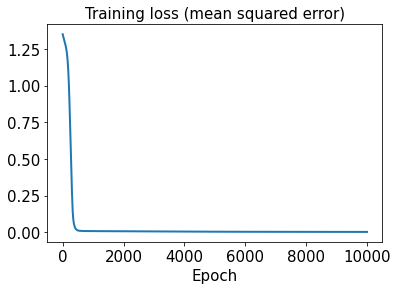

In [114]:
hist3 = history3.history
plt.plot(hist3['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

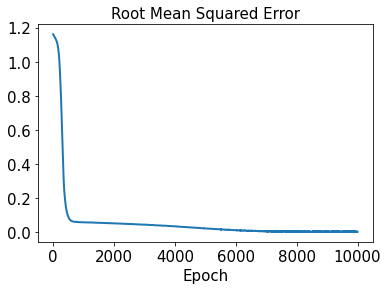

In [115]:
plt.plot(hist3['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [116]:
test_results3 = sd3.evaluate(x_test3)

1/1 [==============================] - 0s 63ms/step - loss: 0.0019 - rmse: 0.0000e+00


In [117]:
decoded_sensor_train3 = sensor_pred3.predict(t_train)

In [118]:
decoded_sensor_test3 = sensor_pred3.predict(t_test)

In [119]:
decoded_train3 = sd3.predict(decoded_sensor_train3)

In [120]:
decoded_test3 = sd3.predict(decoded_sensor_test3)

In [121]:
error_train_abs3 = np.abs(decoded_train3 - y_train3)

In [122]:
error_test_abs3 = np.abs(decoded_test3 - y_test3)

In [123]:
l2_error_sensor_train3 = np.sqrt(np.sum((decoded_sensor_train3 - x_train3)**2) / np.sum(x_train3**2))
print(l2_error_sensor_train3)

0.1723519164331685


In [124]:
l2_error_sensor_test3 = np.sqrt(np.sum((decoded_sensor_test3 - x_test3)**2) / np.sum(x_test3**2))
print(l2_error_sensor_test3)

0.18063672306572398


In [125]:
l2_error_train3 = np.sqrt(np.sum((decoded_train3 - y_train3)**2) / np.sum(y_train3**2))
print(l2_error_train3)

0.16929919107388203


In [126]:
l2_error_test3 = np.sqrt(np.sum((decoded_test3 - y_test3)**2) / np.sum(y_test3**2))
print(l2_error_test3)

0.17791670900072928


In [127]:
l2_error_train_list3 = []
for i in range(0, len(x_train3)):
    l2_error_train_data3 = np.sqrt(np.sum((decoded_train3[i] - y_train3[i])**2) / np.sum(y_train3[i]**2))
    l2_error_train_list3.append(l2_error_train_data3)
print(l2_error_train_list3)

[0.20198325428006259, 0.14801986574062964, 0.1528990874067331, 0.06336906554321521, 0.011088155913802963, 0.10635531141819281, 0.019110123892955175, 0.2517199238867871, 0.004098776334924018, 0.31501120184349773, 0.2904251113498602, 0.22726127244365824, 0.1691771861135167, 0.1616081033889616, 0.07784208051013271, 0.21443779121085169, 0.21849871680098418, 0.072979140888334, 0.20146027608760664, 0.2350799931105012, 0.36949960497573014, 0.18832911860434942, 0.3400151084471688, 0.10463280986645164, 0.2684110035301747, 0.0921713718665772, 0.08875050274342071, 0.026372510399458135, 0.05732286440849688, 0.1342808190062368, 0.0340004325988302, 0.18554055030708697, 0.4021109677281819]


In [128]:
l2_error_test_list3 = []
for i in range(0, len(x_test3)):
    l2_error_test_data3 = np.sqrt(np.sum((decoded_test3[i] - y_test3[i])**2) / np.sum(y_test3[i]**2))
    l2_error_test_list3.append(l2_error_test_data3)
print(l2_error_test_list3)

[0.12062170964283506, 0.04875453088935074, 0.1203922458458162, 0.13671211048420748, 0.1750447909445773, 0.46967294560155276, 0.04178598433607101, 0.43549616268260233]


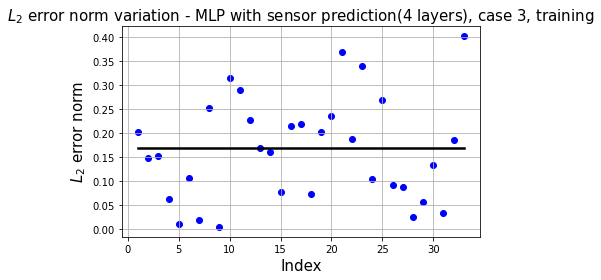

In [143]:
plt.plot(np.linspace(1, x_train3.shape[0], x_train3.shape[0]), l2_error_train3*np.ones(x_train3.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train3.shape[0], x_train3.shape[0]), l2_error_train_list3, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP with sensor prediction(4 layers), case 3, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

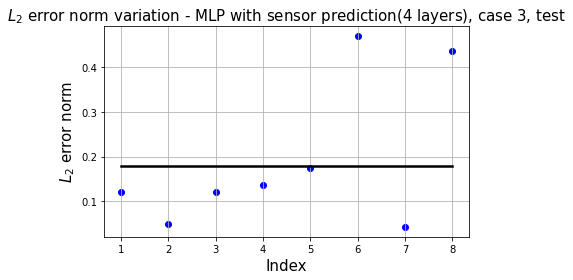

In [144]:
plt.plot(np.linspace(1, x_test3.shape[0], x_test3.shape[0]), l2_error_test3*np.ones(x_test3.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test3.shape[0], x_test3.shape[0]), l2_error_test_list3, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP with sensor prediction(4 layers), case 3, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

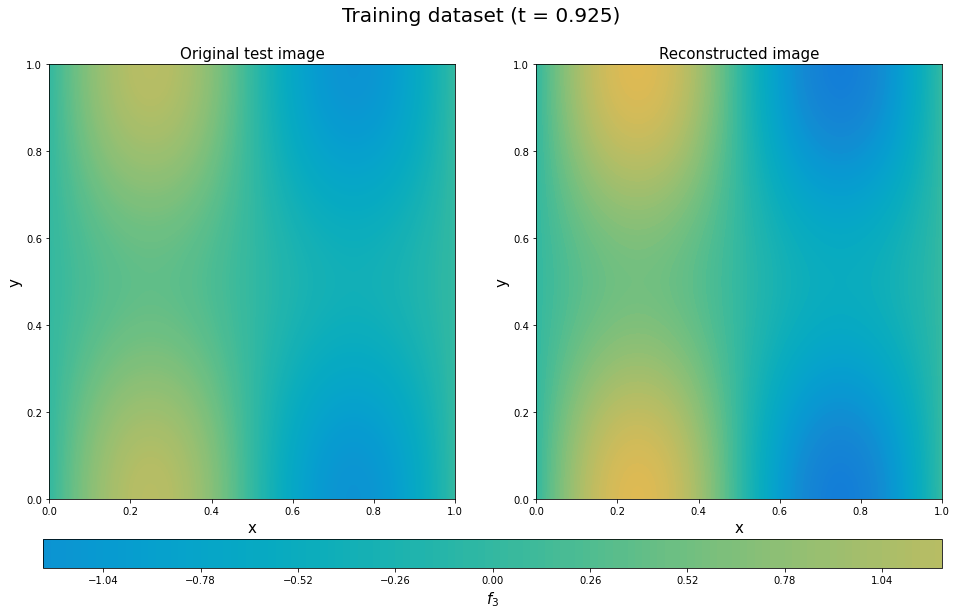

In [131]:
plt.figure(figsize=(16, 8))
y_train3_20_rotate = y_train3[20].T.reshape(101,101)
decoded_rotate3 = decoded_train3[20].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train3_20_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate3, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-3.0,3.0)
a2.set_clim(-3.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_3$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[37]),fontsize=20)
plt.show()

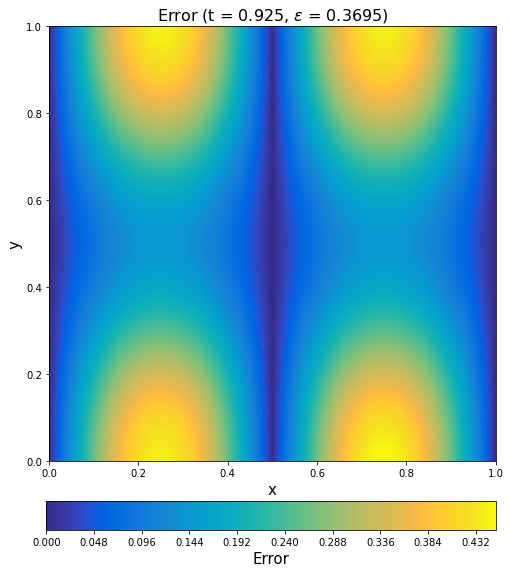

In [132]:
error_train_abs3_rotate20 = error_train_abs3[20].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs3_rotate20, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.925, $\epsilon$ = %.4f)' %(l2_error_train_list3[20]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

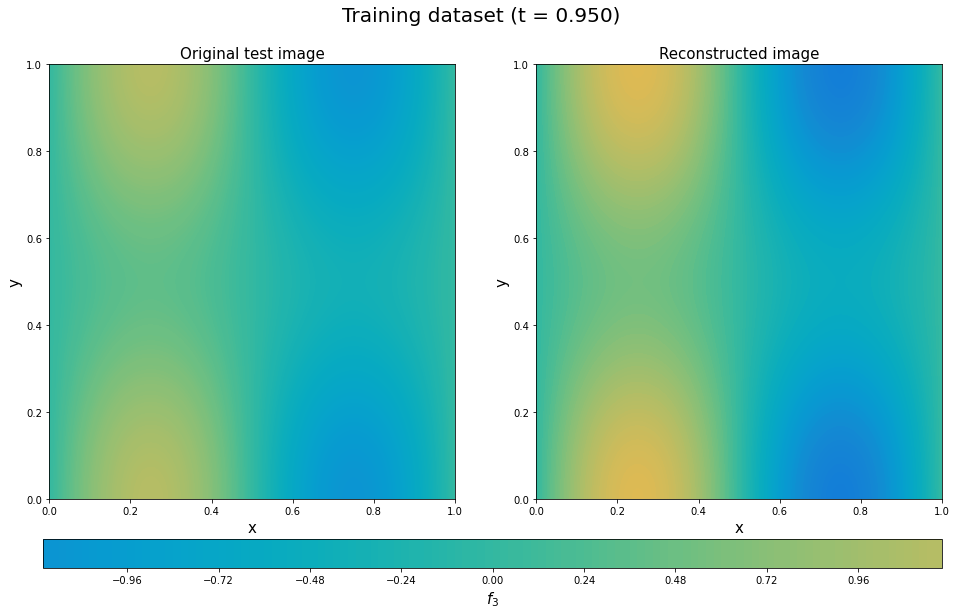

In [133]:
plt.figure(figsize=(16, 8))
y_train3_32_rotate = y_train3[32].T.reshape(101,101)
decoded_rotate3 = decoded_train3[32].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train3_32_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate3, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-3.0,3.0)
a2.set_clim(-3.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_3$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[38]), fontsize=20)
plt.show()

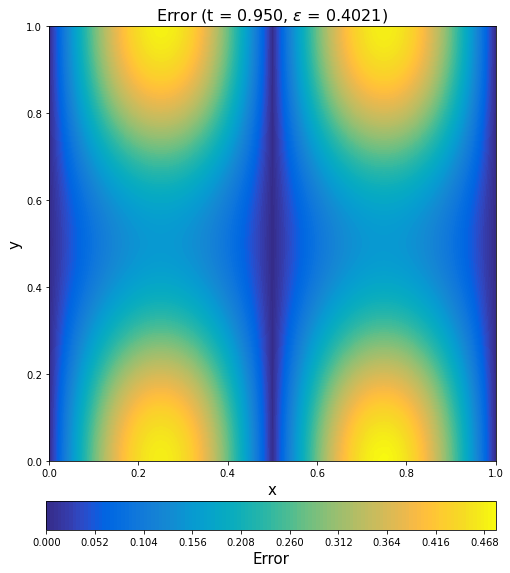

In [134]:
error_train_abs3_rotate32 = error_train_abs3[32].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs3_rotate32, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.950, $\epsilon$ = %.4f)' %(l2_error_train_list3[32]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

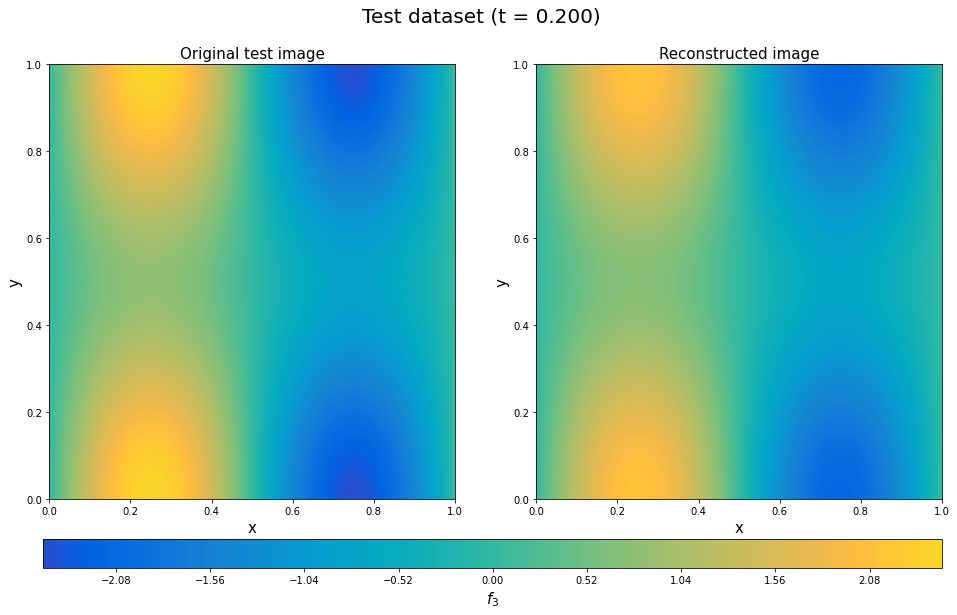

In [135]:
plt.figure(figsize=(16, 8))
y_test3_2_rotate = y_test3[2].T.reshape(101,101)
decoded_rotate3 = decoded_test3[2].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test3_2_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate3, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-3.0,3.0)
a2.set_clim(-3.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_3$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)' %(t[8]),fontsize=20)
plt.show()

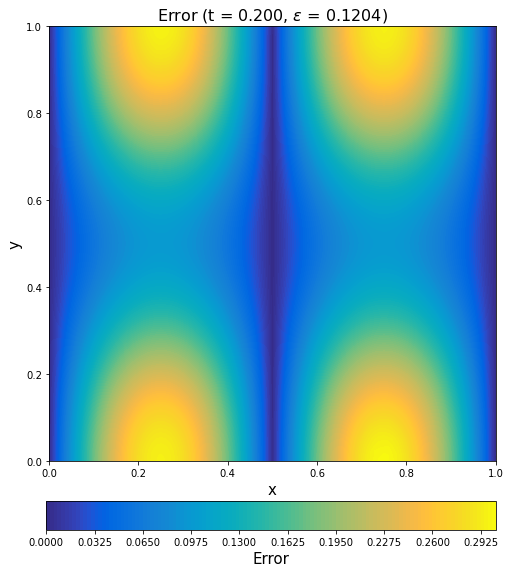

In [136]:
error_test_abs3_rotate2 = error_test_abs3[2].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate2, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.200, $\epsilon$ = %.4f)' %(l2_error_test_list3[2]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

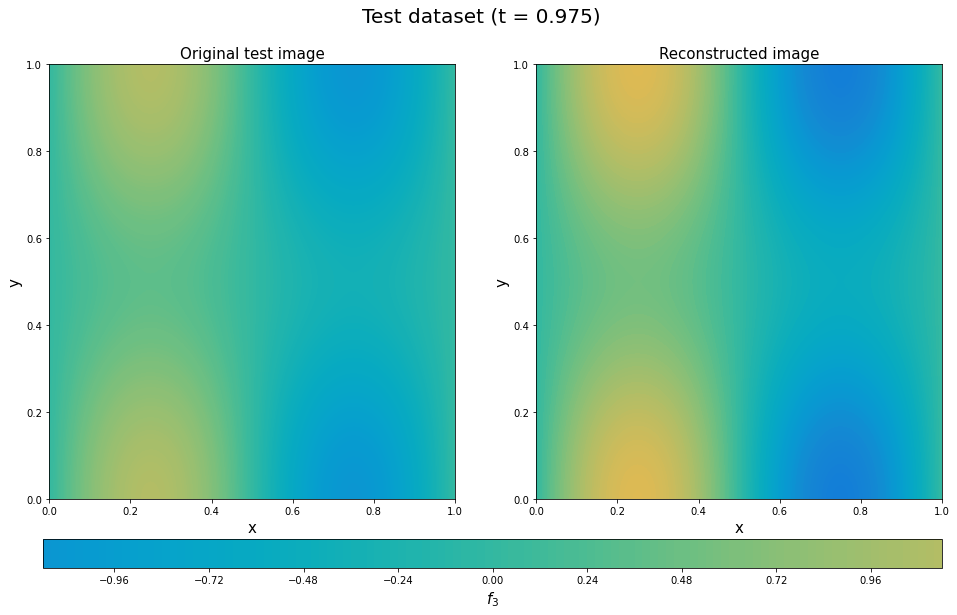

In [137]:
plt.figure(figsize=(16, 8))
y_test3_7_rotate = y_test3[7].T.reshape(101,101)
decoded_rotate3 = decoded_test3[7].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test3_7_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate3, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-3.0,3.0)
a2.set_clim(-3.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_3$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)' %(t[39]),fontsize=20)
plt.show()

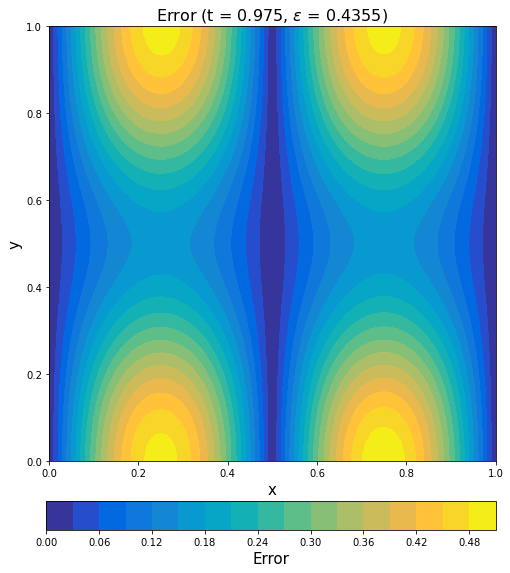

In [138]:
error_test_abs3_rotate7 = error_test_abs3[7].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate7, levels=16, cmap=parula_map)
ax5.set_title(r'Error (t = 0.975, $\epsilon$ = %.4f)' %(l2_error_test_list3[7]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()